In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt 

import xgboost as xgb

from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
xgb_model = xgb.XGBRegressor(n_jobs=1)

In [ ]:
bat = GridSearchCV(xgb_model,
                   {'max_depth': [7,8],
                    'n_estimators': [100, 150],
                    'learning_rate': [0.1, 0.2, 0.3],
                    'alpha': [1,2]}, verbose=1, n_jobs=1, cv=5)

In [ ]:
bat.fit(batterX_train, batterY_train, eval_set=[(batterX_test, batterY_test)])

In [ ]:
print(bat.best_score_)
print(bat.best_params_)

In [ ]:
best = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=1, learning_rate=0.2, max_depth=7, n_estimators=100)
best.fit(batterX_train, batterY_train, eval_set=[(batterX_test, batterY_test)])

xgb.plot_importance(best)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# EDA

In [3]:
all_data_clean = pd.read_csv('all_data_clean.csv')
all_data_clean.head()

YoB  %vote  HOFm  HOFs  Yrs    WAR  WAR7  JAWS  Jpos     G  ...     H   HR  \
0    1  0.934   354    73   19  121.8  67.9  94.9  53.4  2292  ...  2654  521   
1    2  0.652   146    43   18   42.0  35.0  38.5  44.2  1449  ...  1422  260   
2    7  0.619   200    47   17   54.4  39.2  46.8  53.4  1984  ...  2471  205   
3    6  0.381    89    34   15   63.2  48.9  56.0  55.4  1646  ...  1779   68   
4    9  0.361    71    24   19   16.4  11.2  13.8  44.2  1950  ...  1547   51   

    RBI  SB    BB     BA    OBP    SLG    OPS   OPS+  
0  1839  24  2021  0.344  0.482  0.634  1.116  191.0  
1  1019  38   609  0.283  0.363  0.496  0.859  125.0  
2  1383  42   437  0.324  0.362  0.505  0.867  134.0  
3   789  51   796  0.295  0.380  0.415  0.795  120.0  
4   652  46   556  0.261  0.326  0.337  0.663   83.0  

[5 rows x 22 columns]

Features are everything but the %vote, which is the target.

In [4]:
X = all_data_clean.drop(['%vote'], axis = 1)
y = all_data_clean.iloc[:, 1]

In [32]:
X.head()

YoB  HOFm  HOFs  Yrs    WAR  WAR7  JAWS  Jpos     G    AB  ...     H   HR  \
0    1   354    73   19  121.8  67.9  94.9  53.4  2292  7706  ...  2654  521   
1    2   146    43   18   42.0  35.0  38.5  44.2  1449  5030  ...  1422  260   
2    7   200    47   17   54.4  39.2  46.8  53.4  1984  7635  ...  2471  205   
3    6    89    34   15   63.2  48.9  56.0  55.4  1646  6029  ...  1779   68   
4    9    71    24   19   16.4  11.2  13.8  44.2  1950  5916  ...  1547   51   

    RBI  SB    BB     BA    OBP    SLG    OPS   OPS+  
0  1839  24  2021  0.344  0.482  0.634  1.116  191.0  
1  1019  38   609  0.283  0.363  0.496  0.859  125.0  
2  1383  42   437  0.324  0.362  0.505  0.867  134.0  
3   789  51   796  0.295  0.380  0.415  0.795  120.0  
4   652  46   556  0.261  0.326  0.337  0.663   83.0  

[5 rows x 21 columns]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(),
                                                    y.copy(),
                                                    test_size = 0.2,
                                                    random_state=420)

Note that in XGBoost I don't have to worry about correlated predictors.

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 131 to 945
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YoB     1114 non-null   int64  
 1   HOFm    1114 non-null   int64  
 2   HOFs    1114 non-null   int64  
 3   Yrs     1114 non-null   int64  
 4   WAR     1114 non-null   float64
 5   WAR7    1114 non-null   float64
 6   JAWS    1114 non-null   float64
 7   Jpos    1114 non-null   float64
 8   G       1114 non-null   int64  
 9   AB      1114 non-null   int64  
 10  R       1114 non-null   int64  
 11  H       1114 non-null   int64  
 12  HR      1114 non-null   int64  
 13  RBI     1114 non-null   int64  
 14  SB      1114 non-null   int64  
 15  BB      1114 non-null   int64  
 16  BA      1113 non-null   float64
 17  OBP     1113 non-null   float64
 18  SLG     1113 non-null   float64
 19  OPS     1113 non-null   float64
 20  OPS+    1113 non-null   float64
dtypes: float64(9), int64(12)
memory usage: 19

/Applications/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


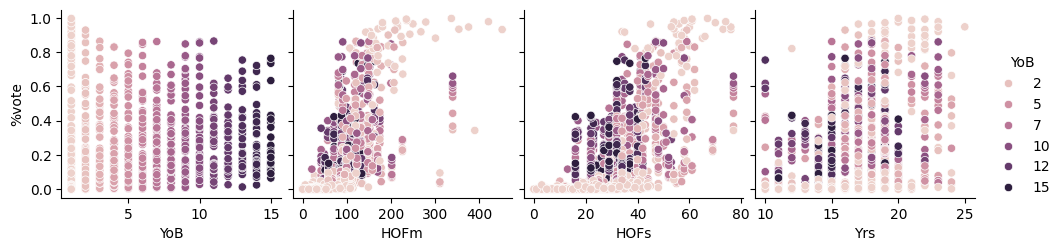

In [7]:
sns.pairplot(all_data_clean,
             #x_vars = ['YoB','HOFm','HOFs','Yrs','WAR','WAR7','JAWS','Jpos','G','AB','R','H','HR','RBI','SB','BB','OBP','SLG','OPS','OPS+'],
             x_vars = ['YoB','HOFm','HOFs','Yrs'],
             y_vars = ['%vote'],
             hue = 'YoB')
plt.show()

/Applications/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


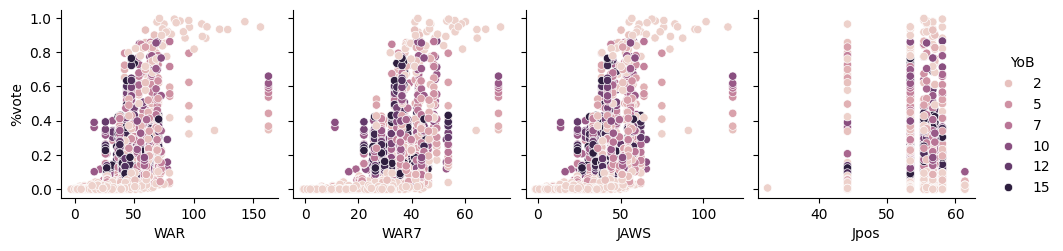

In [8]:
sns.pairplot(all_data_clean,
             #x_vars = ['YoB','HOFm','HOFs','Yrs','WAR','WAR7','JAWS','Jpos','G','AB','R','H','HR','RBI','SB','BB','OBP','SLG','OPS','OPS+'],
             x_vars = ['WAR','WAR7','JAWS','Jpos'],
             y_vars = ['%vote'],
             hue = 'YoB')
plt.show()

/Applications/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


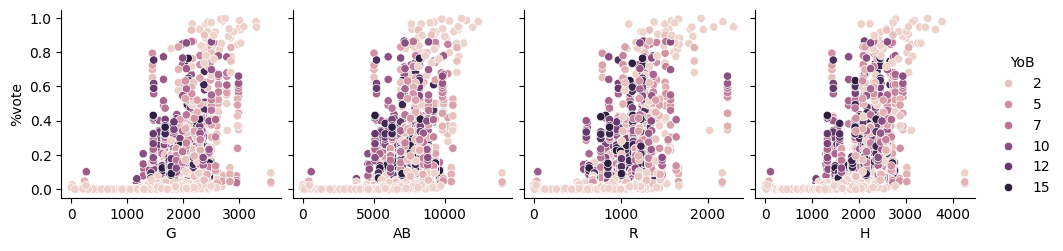

In [9]:
sns.pairplot(all_data_clean,
             #x_vars = ['YoB','HOFm','HOFs','Yrs','WAR','WAR7','JAWS','Jpos','G','AB','R','H','HR','RBI','SB','BB','OBP','SLG','OPS','OPS+'],
             x_vars = ['G','AB','R','H'],
             y_vars = ['%vote'],
             hue = 'YoB')
plt.show()

In [10]:
all_data_clean['WAR'].max(), all_data_clean['WAR'].mean(), all_data_clean['WAR'].min()

(162.8, 43.98377602297201, -2.9)

In [11]:
xgb_model = xgb.XGBRegressor()

In [12]:
bat = GridSearchCV(xgb_model,
                   {'max_depth': [3, 5, 6, 7, 8, 10],
                    'n_estimators': [25, 50, 75, 100, 150],
                    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
                    'reg_alpha': [1,0]}, verbose=1, n_jobs=1, cv=5)

In [13]:
bat.fit(X_train, y_train, eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[0]	validation_0-rmse:0.22717
[1]	validation_0-rmse:0.22604
[2]	validation_0-rmse:0.22492
[3]	validation_0-rmse:0.22382
[4]	validation_0-rmse:0.22274
[5]	validation_0-rmse:0.22168
[6]	validation_0-rmse:0.22065
[7]	validation_0-rmse:0.21958
[8]	validation_0-rmse:0.21857
[9]	validation_0-rmse:0.21754
[10]	validation_0-rmse:0.21657
[11]	validation_0-rmse:0.21557
[12]	validation_0-rmse:0.21459
[13]	validation_0-rmse:0.21366
[14]	validation_0-rmse:0.21273
[15]	validation_0-rmse:0.21178
[16]	validation_0-rmse:0.21086
[17]	validation_0-rmse:0.20998
[18]	validation_0-rmse:0.20908
[19]	validation_0-rmse:0.20820
[20]	validation_0-rmse:0.20731
[21]	validation_0-rmse:0.20648
[22]	validation_0-rmse:0.20572
[23]	validation_0-rmse:0.20495
[24]	validation_0-rmse:0.20411
[0]	validation_0-rmse:0.22712
[1]	validation_0-rmse:0.22589
[2]	validation_0-rmse:0.22468
[3]	validation_0-rmse:0.22349
[4]	validation_0-rmse:0.22232
[5]	validation_0-rmse

[16]	validation_0-rmse:0.21086
[17]	validation_0-rmse:0.20998
[18]	validation_0-rmse:0.20908
[19]	validation_0-rmse:0.20820
[20]	validation_0-rmse:0.20731
[21]	validation_0-rmse:0.20648
[22]	validation_0-rmse:0.20572
[23]	validation_0-rmse:0.20495
[24]	validation_0-rmse:0.20411
[25]	validation_0-rmse:0.20332
[26]	validation_0-rmse:0.20251
[27]	validation_0-rmse:0.20173
[28]	validation_0-rmse:0.20098
[29]	validation_0-rmse:0.20027
[30]	validation_0-rmse:0.19964
[31]	validation_0-rmse:0.19884
[32]	validation_0-rmse:0.19813
[33]	validation_0-rmse:0.19748
[34]	validation_0-rmse:0.19687
[35]	validation_0-rmse:0.19611
[36]	validation_0-rmse:0.19544
[37]	validation_0-rmse:0.19482
[38]	validation_0-rmse:0.19427
[39]	validation_0-rmse:0.19366
[40]	validation_0-rmse:0.19295
[41]	validation_0-rmse:0.19232
[42]	validation_0-rmse:0.19167
[43]	validation_0-rmse:0.19099
[44]	validation_0-rmse:0.19042
[45]	validation_0-rmse:0.18982
[46]	validation_0-rmse:0.18926
[47]	validation_0-rmse:0.18863
[48]	val

[32]	validation_0-rmse:0.19666
[33]	validation_0-rmse:0.19585
[34]	validation_0-rmse:0.19507
[35]	validation_0-rmse:0.19432
[36]	validation_0-rmse:0.19353
[37]	validation_0-rmse:0.19283
[38]	validation_0-rmse:0.19208
[39]	validation_0-rmse:0.19135
[40]	validation_0-rmse:0.19073
[41]	validation_0-rmse:0.19000
[42]	validation_0-rmse:0.18930
[43]	validation_0-rmse:0.18863
[44]	validation_0-rmse:0.18800
[45]	validation_0-rmse:0.18731
[46]	validation_0-rmse:0.18667
[47]	validation_0-rmse:0.18601
[48]	validation_0-rmse:0.18536
[49]	validation_0-rmse:0.18481
[0]	validation_0-rmse:0.22704
[1]	validation_0-rmse:0.22574
[2]	validation_0-rmse:0.22444
[3]	validation_0-rmse:0.22317
[4]	validation_0-rmse:0.22191
[5]	validation_0-rmse:0.22065
[6]	validation_0-rmse:0.21942
[7]	validation_0-rmse:0.21820
[8]	validation_0-rmse:0.21701
[9]	validation_0-rmse:0.21582
[10]	validation_0-rmse:0.21464
[11]	validation_0-rmse:0.21351
[12]	validation_0-rmse:0.21242
[13]	validation_0-rmse:0.21129
[14]	validation_0-

[48]	validation_0-rmse:0.18804
[49]	validation_0-rmse:0.18757
[50]	validation_0-rmse:0.18701
[51]	validation_0-rmse:0.18656
[52]	validation_0-rmse:0.18599
[53]	validation_0-rmse:0.18538
[54]	validation_0-rmse:0.18480
[55]	validation_0-rmse:0.18425
[56]	validation_0-rmse:0.18370
[57]	validation_0-rmse:0.18328
[58]	validation_0-rmse:0.18276
[59]	validation_0-rmse:0.18220
[60]	validation_0-rmse:0.18165
[61]	validation_0-rmse:0.18116
[62]	validation_0-rmse:0.18077
[63]	validation_0-rmse:0.18026
[64]	validation_0-rmse:0.17989
[65]	validation_0-rmse:0.17941
[66]	validation_0-rmse:0.17893
[67]	validation_0-rmse:0.17845
[68]	validation_0-rmse:0.17796
[69]	validation_0-rmse:0.17751
[70]	validation_0-rmse:0.17716
[71]	validation_0-rmse:0.17678
[72]	validation_0-rmse:0.17639
[73]	validation_0-rmse:0.17602
[74]	validation_0-rmse:0.17564
[0]	validation_0-rmse:0.22712
[1]	validation_0-rmse:0.22589
[2]	validation_0-rmse:0.22468
[3]	validation_0-rmse:0.22349
[4]	validation_0-rmse:0.22232
[5]	validatio

[14]	validation_0-rmse:0.21169
[15]	validation_0-rmse:0.21070
[16]	validation_0-rmse:0.20970
[17]	validation_0-rmse:0.20874
[18]	validation_0-rmse:0.20775
[19]	validation_0-rmse:0.20677
[20]	validation_0-rmse:0.20581
[21]	validation_0-rmse:0.20486
[22]	validation_0-rmse:0.20392
[23]	validation_0-rmse:0.20300
[24]	validation_0-rmse:0.20209
[25]	validation_0-rmse:0.20120
[26]	validation_0-rmse:0.20032
[27]	validation_0-rmse:0.19944
[28]	validation_0-rmse:0.19859
[29]	validation_0-rmse:0.19775
[30]	validation_0-rmse:0.19693
[31]	validation_0-rmse:0.19611
[32]	validation_0-rmse:0.19531
[33]	validation_0-rmse:0.19451
[34]	validation_0-rmse:0.19373
[35]	validation_0-rmse:0.19296
[36]	validation_0-rmse:0.19219
[37]	validation_0-rmse:0.19145
[38]	validation_0-rmse:0.19071
[39]	validation_0-rmse:0.18998
[40]	validation_0-rmse:0.18926
[41]	validation_0-rmse:0.18854
[42]	validation_0-rmse:0.18785
[43]	validation_0-rmse:0.18704
[44]	validation_0-rmse:0.18625
[45]	validation_0-rmse:0.18559
[46]	val

[55]	validation_0-rmse:0.17708
[56]	validation_0-rmse:0.17647
[57]	validation_0-rmse:0.17586
[58]	validation_0-rmse:0.17528
[59]	validation_0-rmse:0.17473
[60]	validation_0-rmse:0.17412
[61]	validation_0-rmse:0.17357
[62]	validation_0-rmse:0.17302
[63]	validation_0-rmse:0.17250
[64]	validation_0-rmse:0.17198
[65]	validation_0-rmse:0.17142
[66]	validation_0-rmse:0.17092
[67]	validation_0-rmse:0.17038
[68]	validation_0-rmse:0.16988
[69]	validation_0-rmse:0.16943
[70]	validation_0-rmse:0.16896
[71]	validation_0-rmse:0.16842
[72]	validation_0-rmse:0.16797
[73]	validation_0-rmse:0.16750
[74]	validation_0-rmse:0.16707
[0]	validation_0-rmse:0.22698
[1]	validation_0-rmse:0.22574
[2]	validation_0-rmse:0.22446
[3]	validation_0-rmse:0.22326
[4]	validation_0-rmse:0.22201
[5]	validation_0-rmse:0.22084
[6]	validation_0-rmse:0.21962
[7]	validation_0-rmse:0.21849
[8]	validation_0-rmse:0.21731
[9]	validation_0-rmse:0.21621
[10]	validation_0-rmse:0.21507
[11]	validation_0-rmse:0.21401
[12]	validation_0-

[96]	validation_0-rmse:0.16760
[97]	validation_0-rmse:0.16724
[98]	validation_0-rmse:0.16692
[99]	validation_0-rmse:0.16657
[0]	validation_0-rmse:0.22712
[1]	validation_0-rmse:0.22589
[2]	validation_0-rmse:0.22468
[3]	validation_0-rmse:0.22349
[4]	validation_0-rmse:0.22232
[5]	validation_0-rmse:0.22116
[6]	validation_0-rmse:0.22002
[7]	validation_0-rmse:0.21890
[8]	validation_0-rmse:0.21780
[9]	validation_0-rmse:0.21671
[10]	validation_0-rmse:0.21570
[11]	validation_0-rmse:0.21464
[12]	validation_0-rmse:0.21366
[13]	validation_0-rmse:0.21266
[14]	validation_0-rmse:0.21170
[15]	validation_0-rmse:0.21071
[16]	validation_0-rmse:0.20981
[17]	validation_0-rmse:0.20884
[18]	validation_0-rmse:0.20796
[19]	validation_0-rmse:0.20702
[20]	validation_0-rmse:0.20607
[21]	validation_0-rmse:0.20522
[22]	validation_0-rmse:0.20427
[23]	validation_0-rmse:0.20346
[24]	validation_0-rmse:0.20255
[25]	validation_0-rmse:0.20175
[26]	validation_0-rmse:0.20083
[27]	validation_0-rmse:0.19994
[28]	validation_0-

[62]	validation_0-rmse:0.17863
[63]	validation_0-rmse:0.17816
[64]	validation_0-rmse:0.17764
[65]	validation_0-rmse:0.17714
[66]	validation_0-rmse:0.17664
[67]	validation_0-rmse:0.17620
[68]	validation_0-rmse:0.17572
[69]	validation_0-rmse:0.17530
[70]	validation_0-rmse:0.17483
[71]	validation_0-rmse:0.17443
[72]	validation_0-rmse:0.17398
[73]	validation_0-rmse:0.17358
[74]	validation_0-rmse:0.17314
[75]	validation_0-rmse:0.17275
[76]	validation_0-rmse:0.17233
[77]	validation_0-rmse:0.17197
[78]	validation_0-rmse:0.17156
[79]	validation_0-rmse:0.17117
[80]	validation_0-rmse:0.17082
[81]	validation_0-rmse:0.17042
[82]	validation_0-rmse:0.17008
[83]	validation_0-rmse:0.16972
[84]	validation_0-rmse:0.16939
[85]	validation_0-rmse:0.16902
[86]	validation_0-rmse:0.16862
[87]	validation_0-rmse:0.16828
[88]	validation_0-rmse:0.16793
[89]	validation_0-rmse:0.16764
[90]	validation_0-rmse:0.16732
[91]	validation_0-rmse:0.16694
[92]	validation_0-rmse:0.16661
[93]	validation_0-rmse:0.16612
[94]	val

[28]	validation_0-rmse:0.19659
[29]	validation_0-rmse:0.19567
[30]	validation_0-rmse:0.19484
[31]	validation_0-rmse:0.19391
[32]	validation_0-rmse:0.19312
[33]	validation_0-rmse:0.19225
[34]	validation_0-rmse:0.19140
[35]	validation_0-rmse:0.19056
[36]	validation_0-rmse:0.18976
[37]	validation_0-rmse:0.18896
[38]	validation_0-rmse:0.18813
[39]	validation_0-rmse:0.18732
[40]	validation_0-rmse:0.18652
[41]	validation_0-rmse:0.18576
[42]	validation_0-rmse:0.18498
[43]	validation_0-rmse:0.18425
[44]	validation_0-rmse:0.18352
[45]	validation_0-rmse:0.18264
[46]	validation_0-rmse:0.18194
[47]	validation_0-rmse:0.18108
[48]	validation_0-rmse:0.18040
[49]	validation_0-rmse:0.17957
[50]	validation_0-rmse:0.17891
[51]	validation_0-rmse:0.17810
[52]	validation_0-rmse:0.17743
[53]	validation_0-rmse:0.17664
[54]	validation_0-rmse:0.17596
[55]	validation_0-rmse:0.17535
[56]	validation_0-rmse:0.17468
[57]	validation_0-rmse:0.17401
[58]	validation_0-rmse:0.17337
[59]	validation_0-rmse:0.17276
[60]	val

[93]	validation_0-rmse:0.15836
[94]	validation_0-rmse:0.15798
[95]	validation_0-rmse:0.15763
[96]	validation_0-rmse:0.15728
[97]	validation_0-rmse:0.15684
[98]	validation_0-rmse:0.15640
[99]	validation_0-rmse:0.15606
[0]	validation_0-rmse:0.22704
[1]	validation_0-rmse:0.22572
[2]	validation_0-rmse:0.22445
[3]	validation_0-rmse:0.22317
[4]	validation_0-rmse:0.22193
[5]	validation_0-rmse:0.22069
[6]	validation_0-rmse:0.21949
[7]	validation_0-rmse:0.21831
[8]	validation_0-rmse:0.21713
[9]	validation_0-rmse:0.21596
[10]	validation_0-rmse:0.21482
[11]	validation_0-rmse:0.21372
[12]	validation_0-rmse:0.21260
[13]	validation_0-rmse:0.21156
[14]	validation_0-rmse:0.21047
[15]	validation_0-rmse:0.20947
[16]	validation_0-rmse:0.20842
[17]	validation_0-rmse:0.20744
[18]	validation_0-rmse:0.20639
[19]	validation_0-rmse:0.20538
[20]	validation_0-rmse:0.20435
[21]	validation_0-rmse:0.20334
[22]	validation_0-rmse:0.20235
[23]	validation_0-rmse:0.20137
[24]	validation_0-rmse:0.20040
[25]	validation_0-

[7]	validation_0-rmse:0.21890
[8]	validation_0-rmse:0.21780
[9]	validation_0-rmse:0.21671
[10]	validation_0-rmse:0.21570
[11]	validation_0-rmse:0.21464
[12]	validation_0-rmse:0.21366
[13]	validation_0-rmse:0.21266
[14]	validation_0-rmse:0.21170
[15]	validation_0-rmse:0.21071
[16]	validation_0-rmse:0.20981
[17]	validation_0-rmse:0.20884
[18]	validation_0-rmse:0.20796
[19]	validation_0-rmse:0.20702
[20]	validation_0-rmse:0.20607
[21]	validation_0-rmse:0.20522
[22]	validation_0-rmse:0.20427
[23]	validation_0-rmse:0.20346
[24]	validation_0-rmse:0.20255
[25]	validation_0-rmse:0.20175
[26]	validation_0-rmse:0.20083
[27]	validation_0-rmse:0.19994
[28]	validation_0-rmse:0.19904
[29]	validation_0-rmse:0.19818
[30]	validation_0-rmse:0.19744
[31]	validation_0-rmse:0.19658
[32]	validation_0-rmse:0.19576
[33]	validation_0-rmse:0.19492
[34]	validation_0-rmse:0.19411
[35]	validation_0-rmse:0.19333
[36]	validation_0-rmse:0.19253
[37]	validation_0-rmse:0.19174
[38]	validation_0-rmse:0.19096
[39]	valida

[120]	validation_0-rmse:0.15233
[121]	validation_0-rmse:0.15197
[122]	validation_0-rmse:0.15168
[123]	validation_0-rmse:0.15137
[124]	validation_0-rmse:0.15103
[125]	validation_0-rmse:0.15078
[126]	validation_0-rmse:0.15047
[127]	validation_0-rmse:0.15020
[128]	validation_0-rmse:0.14992
[129]	validation_0-rmse:0.14965
[130]	validation_0-rmse:0.14939
[131]	validation_0-rmse:0.14906
[132]	validation_0-rmse:0.14877
[133]	validation_0-rmse:0.14845
[134]	validation_0-rmse:0.14820
[135]	validation_0-rmse:0.14795
[136]	validation_0-rmse:0.14773
[137]	validation_0-rmse:0.14745
[138]	validation_0-rmse:0.14722
[139]	validation_0-rmse:0.14698
[140]	validation_0-rmse:0.14674
[141]	validation_0-rmse:0.14647
[142]	validation_0-rmse:0.14621
[143]	validation_0-rmse:0.14598
[144]	validation_0-rmse:0.14575
[145]	validation_0-rmse:0.14551
[146]	validation_0-rmse:0.14529
[147]	validation_0-rmse:0.14501
[148]	validation_0-rmse:0.14473
[149]	validation_0-rmse:0.14454
[0]	validation_0-rmse:0.22711
[1]	valida

[82]	validation_0-rmse:0.16407
[83]	validation_0-rmse:0.16356
[84]	validation_0-rmse:0.16306
[85]	validation_0-rmse:0.16268
[86]	validation_0-rmse:0.16219
[87]	validation_0-rmse:0.16179
[88]	validation_0-rmse:0.16132
[89]	validation_0-rmse:0.16092
[90]	validation_0-rmse:0.16056
[91]	validation_0-rmse:0.16008
[92]	validation_0-rmse:0.15964
[93]	validation_0-rmse:0.15928
[94]	validation_0-rmse:0.15883
[95]	validation_0-rmse:0.15848
[96]	validation_0-rmse:0.15813
[97]	validation_0-rmse:0.15769
[98]	validation_0-rmse:0.15732
[99]	validation_0-rmse:0.15699
[100]	validation_0-rmse:0.15656
[101]	validation_0-rmse:0.15624
[102]	validation_0-rmse:0.15589
[103]	validation_0-rmse:0.15551
[104]	validation_0-rmse:0.15520
[105]	validation_0-rmse:0.15487
[106]	validation_0-rmse:0.15453
[107]	validation_0-rmse:0.15414
[108]	validation_0-rmse:0.15378
[109]	validation_0-rmse:0.15340
[110]	validation_0-rmse:0.15305
[111]	validation_0-rmse:0.15272
[112]	validation_0-rmse:0.15238
[113]	validation_0-rmse:0.

[44]	validation_0-rmse:0.18352
[45]	validation_0-rmse:0.18264
[46]	validation_0-rmse:0.18194
[47]	validation_0-rmse:0.18108
[48]	validation_0-rmse:0.18040
[49]	validation_0-rmse:0.17957
[50]	validation_0-rmse:0.17891
[51]	validation_0-rmse:0.17810
[52]	validation_0-rmse:0.17743
[53]	validation_0-rmse:0.17664
[54]	validation_0-rmse:0.17596
[55]	validation_0-rmse:0.17535
[56]	validation_0-rmse:0.17468
[57]	validation_0-rmse:0.17401
[58]	validation_0-rmse:0.17337
[59]	validation_0-rmse:0.17276
[60]	validation_0-rmse:0.17214
[61]	validation_0-rmse:0.17151
[62]	validation_0-rmse:0.17090
[63]	validation_0-rmse:0.17033
[64]	validation_0-rmse:0.16965
[65]	validation_0-rmse:0.16906
[66]	validation_0-rmse:0.16852
[67]	validation_0-rmse:0.16800
[68]	validation_0-rmse:0.16746
[69]	validation_0-rmse:0.16692
[70]	validation_0-rmse:0.16630
[71]	validation_0-rmse:0.16578
[72]	validation_0-rmse:0.16530
[73]	validation_0-rmse:0.16472
[74]	validation_0-rmse:0.16415
[75]	validation_0-rmse:0.16355
[76]	val

[6]	validation_0-rmse:0.21962
[7]	validation_0-rmse:0.21849
[8]	validation_0-rmse:0.21731
[9]	validation_0-rmse:0.21621
[10]	validation_0-rmse:0.21507
[11]	validation_0-rmse:0.21401
[12]	validation_0-rmse:0.21290
[13]	validation_0-rmse:0.21187
[14]	validation_0-rmse:0.21079
[15]	validation_0-rmse:0.20972
[16]	validation_0-rmse:0.20877
[17]	validation_0-rmse:0.20773
[18]	validation_0-rmse:0.20682
[19]	validation_0-rmse:0.20582
[20]	validation_0-rmse:0.20494
[21]	validation_0-rmse:0.20398
[22]	validation_0-rmse:0.20313
[23]	validation_0-rmse:0.20219
[24]	validation_0-rmse:0.20127
[25]	validation_0-rmse:0.20042
[26]	validation_0-rmse:0.19959
[27]	validation_0-rmse:0.19865
[28]	validation_0-rmse:0.19783
[29]	validation_0-rmse:0.19691
[30]	validation_0-rmse:0.19601
[31]	validation_0-rmse:0.19517
[32]	validation_0-rmse:0.19443
[33]	validation_0-rmse:0.19358
[34]	validation_0-rmse:0.19278
[35]	validation_0-rmse:0.19194
[36]	validation_0-rmse:0.19118
[37]	validation_0-rmse:0.19037
[38]	validat

[119]	validation_0-rmse:0.14722
[120]	validation_0-rmse:0.14696
[121]	validation_0-rmse:0.14666
[122]	validation_0-rmse:0.14643
[123]	validation_0-rmse:0.14613
[124]	validation_0-rmse:0.14586
[125]	validation_0-rmse:0.14561
[126]	validation_0-rmse:0.14531
[127]	validation_0-rmse:0.14503
[128]	validation_0-rmse:0.14476
[129]	validation_0-rmse:0.14452
[130]	validation_0-rmse:0.14423
[131]	validation_0-rmse:0.14392
[132]	validation_0-rmse:0.14362
[133]	validation_0-rmse:0.14339
[134]	validation_0-rmse:0.14315
[135]	validation_0-rmse:0.14288
[136]	validation_0-rmse:0.14265
[137]	validation_0-rmse:0.14236
[138]	validation_0-rmse:0.14213
[139]	validation_0-rmse:0.14192
[140]	validation_0-rmse:0.14170
[141]	validation_0-rmse:0.14142
[142]	validation_0-rmse:0.14120
[143]	validation_0-rmse:0.14101
[144]	validation_0-rmse:0.14075
[145]	validation_0-rmse:0.14053
[146]	validation_0-rmse:0.14036
[147]	validation_0-rmse:0.14015
[148]	validation_0-rmse:0.14000
[149]	validation_0-rmse:0.13978
[0]	vali

[11]	validation_0-rmse:0.21071
[12]	validation_0-rmse:0.20931
[13]	validation_0-rmse:0.20794
[14]	validation_0-rmse:0.20670
[15]	validation_0-rmse:0.20535
[16]	validation_0-rmse:0.20402
[17]	validation_0-rmse:0.20281
[18]	validation_0-rmse:0.20152
[19]	validation_0-rmse:0.20025
[20]	validation_0-rmse:0.19907
[21]	validation_0-rmse:0.19785
[22]	validation_0-rmse:0.19675
[23]	validation_0-rmse:0.19558
[24]	validation_0-rmse:0.19441
[0]	validation_0-rmse:0.22703
[1]	validation_0-rmse:0.22560
[2]	validation_0-rmse:0.22418
[3]	validation_0-rmse:0.22295
[4]	validation_0-rmse:0.22157
[5]	validation_0-rmse:0.22022
[6]	validation_0-rmse:0.21888
[7]	validation_0-rmse:0.21771
[8]	validation_0-rmse:0.21642
[9]	validation_0-rmse:0.21511
[10]	validation_0-rmse:0.21392
[11]	validation_0-rmse:0.21273
[12]	validation_0-rmse:0.21171
[13]	validation_0-rmse:0.21048
[14]	validation_0-rmse:0.20928
[15]	validation_0-rmse:0.20809
[16]	validation_0-rmse:0.20690
[17]	validation_0-rmse:0.20584
[18]	validation_0-

[2]	validation_0-rmse:0.22467
[3]	validation_0-rmse:0.22336
[4]	validation_0-rmse:0.22220
[5]	validation_0-rmse:0.22093
[6]	validation_0-rmse:0.21980
[7]	validation_0-rmse:0.21849
[8]	validation_0-rmse:0.21731
[9]	validation_0-rmse:0.21611
[10]	validation_0-rmse:0.21480
[11]	validation_0-rmse:0.21357
[12]	validation_0-rmse:0.21237
[13]	validation_0-rmse:0.21116
[14]	validation_0-rmse:0.20992
[15]	validation_0-rmse:0.20892
[16]	validation_0-rmse:0.20778
[17]	validation_0-rmse:0.20659
[18]	validation_0-rmse:0.20542
[19]	validation_0-rmse:0.20441
[20]	validation_0-rmse:0.20337
[21]	validation_0-rmse:0.20224
[22]	validation_0-rmse:0.20118
[23]	validation_0-rmse:0.20022
[24]	validation_0-rmse:0.19922
[25]	validation_0-rmse:0.19815
[26]	validation_0-rmse:0.19724
[27]	validation_0-rmse:0.19619
[28]	validation_0-rmse:0.19518
[29]	validation_0-rmse:0.19427
[30]	validation_0-rmse:0.19326
[31]	validation_0-rmse:0.19231
[32]	validation_0-rmse:0.19131
[33]	validation_0-rmse:0.19032
[34]	validation_

[19]	validation_0-rmse:0.20378
[20]	validation_0-rmse:0.20277
[21]	validation_0-rmse:0.20171
[22]	validation_0-rmse:0.20082
[23]	validation_0-rmse:0.19990
[24]	validation_0-rmse:0.19895
[25]	validation_0-rmse:0.19793
[26]	validation_0-rmse:0.19701
[27]	validation_0-rmse:0.19617
[28]	validation_0-rmse:0.19532
[29]	validation_0-rmse:0.19438
[30]	validation_0-rmse:0.19355
[31]	validation_0-rmse:0.19260
[32]	validation_0-rmse:0.19163
[33]	validation_0-rmse:0.19078
[34]	validation_0-rmse:0.18981
[35]	validation_0-rmse:0.18886
[36]	validation_0-rmse:0.18799
[37]	validation_0-rmse:0.18713
[38]	validation_0-rmse:0.18633
[39]	validation_0-rmse:0.18561
[40]	validation_0-rmse:0.18483
[41]	validation_0-rmse:0.18409
[42]	validation_0-rmse:0.18329
[43]	validation_0-rmse:0.18243
[44]	validation_0-rmse:0.18175
[45]	validation_0-rmse:0.18098
[46]	validation_0-rmse:0.18039
[47]	validation_0-rmse:0.17958
[48]	validation_0-rmse:0.17889
[49]	validation_0-rmse:0.17825
[50]	validation_0-rmse:0.17745
[51]	val

[60]	validation_0-rmse:0.16793
[61]	validation_0-rmse:0.16720
[62]	validation_0-rmse:0.16652
[63]	validation_0-rmse:0.16581
[64]	validation_0-rmse:0.16517
[65]	validation_0-rmse:0.16459
[66]	validation_0-rmse:0.16394
[67]	validation_0-rmse:0.16327
[68]	validation_0-rmse:0.16273
[69]	validation_0-rmse:0.16205
[70]	validation_0-rmse:0.16147
[71]	validation_0-rmse:0.16083
[72]	validation_0-rmse:0.16020
[73]	validation_0-rmse:0.15960
[74]	validation_0-rmse:0.15902
[0]	validation_0-rmse:0.22695
[1]	validation_0-rmse:0.22554
[2]	validation_0-rmse:0.22415
[3]	validation_0-rmse:0.22278
[4]	validation_0-rmse:0.22145
[5]	validation_0-rmse:0.22012
[6]	validation_0-rmse:0.21883
[7]	validation_0-rmse:0.21754
[8]	validation_0-rmse:0.21628
[9]	validation_0-rmse:0.21498
[10]	validation_0-rmse:0.21370
[11]	validation_0-rmse:0.21249
[12]	validation_0-rmse:0.21125
[13]	validation_0-rmse:0.21002
[14]	validation_0-rmse:0.20888
[15]	validation_0-rmse:0.20769
[16]	validation_0-rmse:0.20647
[17]	validation_0-

[26]	validation_0-rmse:0.19174
[27]	validation_0-rmse:0.19065
[28]	validation_0-rmse:0.18955
[29]	validation_0-rmse:0.18843
[30]	validation_0-rmse:0.18733
[31]	validation_0-rmse:0.18637
[32]	validation_0-rmse:0.18527
[33]	validation_0-rmse:0.18423
[34]	validation_0-rmse:0.18324
[35]	validation_0-rmse:0.18219
[36]	validation_0-rmse:0.18119
[37]	validation_0-rmse:0.18016
[38]	validation_0-rmse:0.17918
[39]	validation_0-rmse:0.17821
[40]	validation_0-rmse:0.17720
[41]	validation_0-rmse:0.17622
[42]	validation_0-rmse:0.17524
[43]	validation_0-rmse:0.17428
[44]	validation_0-rmse:0.17332
[45]	validation_0-rmse:0.17237
[46]	validation_0-rmse:0.17144
[47]	validation_0-rmse:0.17053
[48]	validation_0-rmse:0.16965
[49]	validation_0-rmse:0.16878
[50]	validation_0-rmse:0.16782
[51]	validation_0-rmse:0.16697
[52]	validation_0-rmse:0.16610
[53]	validation_0-rmse:0.16526
[54]	validation_0-rmse:0.16441
[55]	validation_0-rmse:0.16351
[56]	validation_0-rmse:0.16261
[57]	validation_0-rmse:0.16180
[58]	val

[67]	validation_0-rmse:0.16660
[68]	validation_0-rmse:0.16602
[69]	validation_0-rmse:0.16554
[70]	validation_0-rmse:0.16496
[71]	validation_0-rmse:0.16443
[72]	validation_0-rmse:0.16388
[73]	validation_0-rmse:0.16344
[74]	validation_0-rmse:0.16309
[75]	validation_0-rmse:0.16255
[76]	validation_0-rmse:0.16194
[77]	validation_0-rmse:0.16151
[78]	validation_0-rmse:0.16105
[79]	validation_0-rmse:0.16058
[80]	validation_0-rmse:0.16001
[81]	validation_0-rmse:0.15950
[82]	validation_0-rmse:0.15909
[83]	validation_0-rmse:0.15862
[84]	validation_0-rmse:0.15821
[85]	validation_0-rmse:0.15782
[86]	validation_0-rmse:0.15726
[87]	validation_0-rmse:0.15682
[88]	validation_0-rmse:0.15645
[89]	validation_0-rmse:0.15608
[90]	validation_0-rmse:0.15556
[91]	validation_0-rmse:0.15509
[92]	validation_0-rmse:0.15473
[93]	validation_0-rmse:0.15427
[94]	validation_0-rmse:0.15382
[95]	validation_0-rmse:0.15341
[96]	validation_0-rmse:0.15297
[97]	validation_0-rmse:0.15257
[98]	validation_0-rmse:0.15219
[99]	val

[33]	validation_0-rmse:0.19023
[34]	validation_0-rmse:0.18926
[35]	validation_0-rmse:0.18831
[36]	validation_0-rmse:0.18736
[37]	validation_0-rmse:0.18642
[38]	validation_0-rmse:0.18549
[39]	validation_0-rmse:0.18460
[40]	validation_0-rmse:0.18370
[41]	validation_0-rmse:0.18285
[42]	validation_0-rmse:0.18194
[43]	validation_0-rmse:0.18108
[44]	validation_0-rmse:0.18021
[45]	validation_0-rmse:0.17939
[46]	validation_0-rmse:0.17855
[47]	validation_0-rmse:0.17773
[48]	validation_0-rmse:0.17689
[49]	validation_0-rmse:0.17607
[50]	validation_0-rmse:0.17526
[51]	validation_0-rmse:0.17445
[52]	validation_0-rmse:0.17378
[53]	validation_0-rmse:0.17296
[54]	validation_0-rmse:0.17221
[55]	validation_0-rmse:0.17152
[56]	validation_0-rmse:0.17088
[57]	validation_0-rmse:0.17010
[58]	validation_0-rmse:0.16936
[59]	validation_0-rmse:0.16866
[60]	validation_0-rmse:0.16793
[61]	validation_0-rmse:0.16720
[62]	validation_0-rmse:0.16652
[63]	validation_0-rmse:0.16581
[64]	validation_0-rmse:0.16517
[65]	val

[98]	validation_0-rmse:0.14799
[99]	validation_0-rmse:0.14740
[0]	validation_0-rmse:0.22672
[1]	validation_0-rmse:0.22510
[2]	validation_0-rmse:0.22351
[3]	validation_0-rmse:0.22201
[4]	validation_0-rmse:0.22049
[5]	validation_0-rmse:0.21902
[6]	validation_0-rmse:0.21754
[7]	validation_0-rmse:0.21608
[8]	validation_0-rmse:0.21467
[9]	validation_0-rmse:0.21327
[10]	validation_0-rmse:0.21188
[11]	validation_0-rmse:0.21052
[12]	validation_0-rmse:0.20916
[13]	validation_0-rmse:0.20784
[14]	validation_0-rmse:0.20653
[15]	validation_0-rmse:0.20525
[16]	validation_0-rmse:0.20397
[17]	validation_0-rmse:0.20271
[18]	validation_0-rmse:0.20145
[19]	validation_0-rmse:0.20020
[20]	validation_0-rmse:0.19899
[21]	validation_0-rmse:0.19778
[22]	validation_0-rmse:0.19655
[23]	validation_0-rmse:0.19538
[24]	validation_0-rmse:0.19420
[25]	validation_0-rmse:0.19308
[26]	validation_0-rmse:0.19198
[27]	validation_0-rmse:0.19090
[28]	validation_0-rmse:0.18969
[29]	validation_0-rmse:0.18859
[30]	validation_0-

[64]	validation_0-rmse:0.16255
[65]	validation_0-rmse:0.16194
[66]	validation_0-rmse:0.16126
[67]	validation_0-rmse:0.16051
[68]	validation_0-rmse:0.15975
[69]	validation_0-rmse:0.15902
[70]	validation_0-rmse:0.15827
[71]	validation_0-rmse:0.15754
[72]	validation_0-rmse:0.15684
[73]	validation_0-rmse:0.15627
[74]	validation_0-rmse:0.15572
[75]	validation_0-rmse:0.15504
[76]	validation_0-rmse:0.15446
[77]	validation_0-rmse:0.15395
[78]	validation_0-rmse:0.15344
[79]	validation_0-rmse:0.15295
[80]	validation_0-rmse:0.15247
[81]	validation_0-rmse:0.15183
[82]	validation_0-rmse:0.15136
[83]	validation_0-rmse:0.15090
[84]	validation_0-rmse:0.15046
[85]	validation_0-rmse:0.15002
[86]	validation_0-rmse:0.14958
[87]	validation_0-rmse:0.14919
[88]	validation_0-rmse:0.14877
[89]	validation_0-rmse:0.14836
[90]	validation_0-rmse:0.14799
[91]	validation_0-rmse:0.14759
[92]	validation_0-rmse:0.14718
[93]	validation_0-rmse:0.14680
[94]	validation_0-rmse:0.14642
[95]	validation_0-rmse:0.14608
[96]	val

[129]	validation_0-rmse:0.14202
[130]	validation_0-rmse:0.14178
[131]	validation_0-rmse:0.14152
[132]	validation_0-rmse:0.14120
[133]	validation_0-rmse:0.14095
[134]	validation_0-rmse:0.14072
[135]	validation_0-rmse:0.14046
[136]	validation_0-rmse:0.14022
[137]	validation_0-rmse:0.13992
[138]	validation_0-rmse:0.13967
[139]	validation_0-rmse:0.13944
[140]	validation_0-rmse:0.13922
[141]	validation_0-rmse:0.13899
[142]	validation_0-rmse:0.13870
[143]	validation_0-rmse:0.13848
[144]	validation_0-rmse:0.13825
[145]	validation_0-rmse:0.13804
[146]	validation_0-rmse:0.13777
[147]	validation_0-rmse:0.13756
[148]	validation_0-rmse:0.13730
[149]	validation_0-rmse:0.13710
[0]	validation_0-rmse:0.22687
[1]	validation_0-rmse:0.22540
[2]	validation_0-rmse:0.22395
[3]	validation_0-rmse:0.22251
[4]	validation_0-rmse:0.22110
[5]	validation_0-rmse:0.21971
[6]	validation_0-rmse:0.21834
[7]	validation_0-rmse:0.21699
[8]	validation_0-rmse:0.21566
[9]	validation_0-rmse:0.21434
[10]	validation_0-rmse:0.213

[92]	validation_0-rmse:0.14910
[93]	validation_0-rmse:0.14863
[94]	validation_0-rmse:0.14815
[95]	validation_0-rmse:0.14770
[96]	validation_0-rmse:0.14728
[97]	validation_0-rmse:0.14681
[98]	validation_0-rmse:0.14637
[99]	validation_0-rmse:0.14593
[100]	validation_0-rmse:0.14549
[101]	validation_0-rmse:0.14505
[102]	validation_0-rmse:0.14462
[103]	validation_0-rmse:0.14418
[104]	validation_0-rmse:0.14376
[105]	validation_0-rmse:0.14338
[106]	validation_0-rmse:0.14299
[107]	validation_0-rmse:0.14255
[108]	validation_0-rmse:0.14215
[109]	validation_0-rmse:0.14178
[110]	validation_0-rmse:0.14136
[111]	validation_0-rmse:0.14102
[112]	validation_0-rmse:0.14066
[113]	validation_0-rmse:0.14032
[114]	validation_0-rmse:0.13990
[115]	validation_0-rmse:0.13954
[116]	validation_0-rmse:0.13923
[117]	validation_0-rmse:0.13893
[118]	validation_0-rmse:0.13851
[119]	validation_0-rmse:0.13816
[120]	validation_0-rmse:0.13785
[121]	validation_0-rmse:0.13750
[122]	validation_0-rmse:0.13713
[123]	validation

[54]	validation_0-rmse:0.16992
[55]	validation_0-rmse:0.16922
[56]	validation_0-rmse:0.16855
[57]	validation_0-rmse:0.16781
[58]	validation_0-rmse:0.16719
[59]	validation_0-rmse:0.16655
[60]	validation_0-rmse:0.16584
[61]	validation_0-rmse:0.16523
[62]	validation_0-rmse:0.16462
[63]	validation_0-rmse:0.16394
[64]	validation_0-rmse:0.16337
[65]	validation_0-rmse:0.16270
[66]	validation_0-rmse:0.16210
[67]	validation_0-rmse:0.16145
[68]	validation_0-rmse:0.16077
[69]	validation_0-rmse:0.16019
[70]	validation_0-rmse:0.15954
[71]	validation_0-rmse:0.15898
[72]	validation_0-rmse:0.15840
[73]	validation_0-rmse:0.15786
[74]	validation_0-rmse:0.15730
[75]	validation_0-rmse:0.15669
[76]	validation_0-rmse:0.15615
[77]	validation_0-rmse:0.15555
[78]	validation_0-rmse:0.15504
[79]	validation_0-rmse:0.15437
[80]	validation_0-rmse:0.15388
[81]	validation_0-rmse:0.15325
[82]	validation_0-rmse:0.15276
[83]	validation_0-rmse:0.15222
[84]	validation_0-rmse:0.15167
[85]	validation_0-rmse:0.15105
[86]	val

[16]	validation_0-rmse:0.20397
[17]	validation_0-rmse:0.20271
[18]	validation_0-rmse:0.20145
[19]	validation_0-rmse:0.20020
[20]	validation_0-rmse:0.19899
[21]	validation_0-rmse:0.19778
[22]	validation_0-rmse:0.19655
[23]	validation_0-rmse:0.19538
[24]	validation_0-rmse:0.19420
[25]	validation_0-rmse:0.19308
[26]	validation_0-rmse:0.19198
[27]	validation_0-rmse:0.19090
[28]	validation_0-rmse:0.18969
[29]	validation_0-rmse:0.18859
[30]	validation_0-rmse:0.18758
[31]	validation_0-rmse:0.18649
[32]	validation_0-rmse:0.18540
[33]	validation_0-rmse:0.18434
[34]	validation_0-rmse:0.18331
[35]	validation_0-rmse:0.18225
[36]	validation_0-rmse:0.18124
[37]	validation_0-rmse:0.18021
[38]	validation_0-rmse:0.17930
[39]	validation_0-rmse:0.17832
[40]	validation_0-rmse:0.17726
[41]	validation_0-rmse:0.17636
[42]	validation_0-rmse:0.17541
[43]	validation_0-rmse:0.17438
[44]	validation_0-rmse:0.17355
[45]	validation_0-rmse:0.17265
[46]	validation_0-rmse:0.17170
[47]	validation_0-rmse:0.17083
[48]	val

[129]	validation_0-rmse:0.12512
[130]	validation_0-rmse:0.12479
[131]	validation_0-rmse:0.12455
[132]	validation_0-rmse:0.12430
[133]	validation_0-rmse:0.12400
[134]	validation_0-rmse:0.12370
[135]	validation_0-rmse:0.12332
[136]	validation_0-rmse:0.12311
[137]	validation_0-rmse:0.12276
[138]	validation_0-rmse:0.12254
[139]	validation_0-rmse:0.12229
[140]	validation_0-rmse:0.12188
[141]	validation_0-rmse:0.12164
[142]	validation_0-rmse:0.12143
[143]	validation_0-rmse:0.12117
[144]	validation_0-rmse:0.12092
[145]	validation_0-rmse:0.12055
[146]	validation_0-rmse:0.12023
[147]	validation_0-rmse:0.11993
[148]	validation_0-rmse:0.11958
[149]	validation_0-rmse:0.11935
[0]	validation_0-rmse:0.22683
[1]	validation_0-rmse:0.22537
[2]	validation_0-rmse:0.22393
[3]	validation_0-rmse:0.22253
[4]	validation_0-rmse:0.22113
[5]	validation_0-rmse:0.21979
[6]	validation_0-rmse:0.21848
[7]	validation_0-rmse:0.21717
[8]	validation_0-rmse:0.21589
[9]	validation_0-rmse:0.21461
[10]	validation_0-rmse:0.213

[92]	validation_0-rmse:0.14256
[93]	validation_0-rmse:0.14200
[94]	validation_0-rmse:0.14158
[95]	validation_0-rmse:0.14121
[96]	validation_0-rmse:0.14080
[97]	validation_0-rmse:0.14043
[98]	validation_0-rmse:0.14003
[99]	validation_0-rmse:0.13967
[100]	validation_0-rmse:0.13922
[101]	validation_0-rmse:0.13889
[102]	validation_0-rmse:0.13845
[103]	validation_0-rmse:0.13802
[104]	validation_0-rmse:0.13767
[105]	validation_0-rmse:0.13729
[106]	validation_0-rmse:0.13694
[107]	validation_0-rmse:0.13654
[108]	validation_0-rmse:0.13624
[109]	validation_0-rmse:0.13591
[110]	validation_0-rmse:0.13557
[111]	validation_0-rmse:0.13529
[112]	validation_0-rmse:0.13498
[113]	validation_0-rmse:0.13470
[114]	validation_0-rmse:0.13434
[115]	validation_0-rmse:0.13404
[116]	validation_0-rmse:0.13367
[117]	validation_0-rmse:0.13330
[118]	validation_0-rmse:0.13298
[119]	validation_0-rmse:0.13262
[120]	validation_0-rmse:0.13232
[121]	validation_0-rmse:0.13192
[122]	validation_0-rmse:0.13157
[123]	validation

[8]	validation_0-rmse:0.21511
[9]	validation_0-rmse:0.21374
[10]	validation_0-rmse:0.21240
[11]	validation_0-rmse:0.21112
[12]	validation_0-rmse:0.20981
[13]	validation_0-rmse:0.20856
[14]	validation_0-rmse:0.20728
[15]	validation_0-rmse:0.20602
[16]	validation_0-rmse:0.20482
[17]	validation_0-rmse:0.20359
[18]	validation_0-rmse:0.20234
[19]	validation_0-rmse:0.20118
[20]	validation_0-rmse:0.20000
[21]	validation_0-rmse:0.19887
[22]	validation_0-rmse:0.19772
[23]	validation_0-rmse:0.19658
[24]	validation_0-rmse:0.19550
[0]	validation_0-rmse:0.22675
[1]	validation_0-rmse:0.22515
[2]	validation_0-rmse:0.22354
[3]	validation_0-rmse:0.22193
[4]	validation_0-rmse:0.22036
[5]	validation_0-rmse:0.21880
[6]	validation_0-rmse:0.21727
[7]	validation_0-rmse:0.21574
[8]	validation_0-rmse:0.21425
[9]	validation_0-rmse:0.21269
[10]	validation_0-rmse:0.21124
[11]	validation_0-rmse:0.20983
[12]	validation_0-rmse:0.20838
[13]	validation_0-rmse:0.20697
[14]	validation_0-rmse:0.20558
[15]	validation_0-rm

[25]	validation_0-rmse:0.19534
[26]	validation_0-rmse:0.19425
[27]	validation_0-rmse:0.19315
[28]	validation_0-rmse:0.19217
[29]	validation_0-rmse:0.19109
[30]	validation_0-rmse:0.19006
[31]	validation_0-rmse:0.18901
[32]	validation_0-rmse:0.18800
[33]	validation_0-rmse:0.18700
[34]	validation_0-rmse:0.18600
[35]	validation_0-rmse:0.18515
[36]	validation_0-rmse:0.18419
[37]	validation_0-rmse:0.18321
[38]	validation_0-rmse:0.18227
[39]	validation_0-rmse:0.18135
[40]	validation_0-rmse:0.18041
[41]	validation_0-rmse:0.17951
[42]	validation_0-rmse:0.17860
[43]	validation_0-rmse:0.17772
[44]	validation_0-rmse:0.17684
[45]	validation_0-rmse:0.17599
[46]	validation_0-rmse:0.17512
[47]	validation_0-rmse:0.17430
[48]	validation_0-rmse:0.17346
[49]	validation_0-rmse:0.17266
[0]	validation_0-rmse:0.22701
[1]	validation_0-rmse:0.22575
[2]	validation_0-rmse:0.22447
[3]	validation_0-rmse:0.22325
[4]	validation_0-rmse:0.22201
[5]	validation_0-rmse:0.22084
[6]	validation_0-rmse:0.21967
[7]	validation_

[41]	validation_0-rmse:0.17362
[42]	validation_0-rmse:0.17263
[43]	validation_0-rmse:0.17165
[44]	validation_0-rmse:0.17059
[45]	validation_0-rmse:0.16964
[46]	validation_0-rmse:0.16859
[47]	validation_0-rmse:0.16766
[48]	validation_0-rmse:0.16669
[49]	validation_0-rmse:0.16578
[0]	validation_0-rmse:0.22697
[1]	validation_0-rmse:0.22548
[2]	validation_0-rmse:0.22401
[3]	validation_0-rmse:0.22271
[4]	validation_0-rmse:0.22127
[5]	validation_0-rmse:0.21986
[6]	validation_0-rmse:0.21846
[7]	validation_0-rmse:0.21721
[8]	validation_0-rmse:0.21585
[9]	validation_0-rmse:0.21450
[10]	validation_0-rmse:0.21315
[11]	validation_0-rmse:0.21185
[12]	validation_0-rmse:0.21079
[13]	validation_0-rmse:0.20961
[14]	validation_0-rmse:0.20836
[15]	validation_0-rmse:0.20710
[16]	validation_0-rmse:0.20590
[17]	validation_0-rmse:0.20491
[18]	validation_0-rmse:0.20374
[19]	validation_0-rmse:0.20274
[20]	validation_0-rmse:0.20173
[21]	validation_0-rmse:0.20076
[22]	validation_0-rmse:0.19979
[23]	validation_0-

[32]	validation_0-rmse:0.19069
[33]	validation_0-rmse:0.18971
[34]	validation_0-rmse:0.18881
[35]	validation_0-rmse:0.18787
[36]	validation_0-rmse:0.18693
[37]	validation_0-rmse:0.18598
[38]	validation_0-rmse:0.18503
[39]	validation_0-rmse:0.18412
[40]	validation_0-rmse:0.18329
[41]	validation_0-rmse:0.18242
[42]	validation_0-rmse:0.18160
[43]	validation_0-rmse:0.18074
[44]	validation_0-rmse:0.17991
[45]	validation_0-rmse:0.17907
[46]	validation_0-rmse:0.17835
[47]	validation_0-rmse:0.17758
[48]	validation_0-rmse:0.17676
[49]	validation_0-rmse:0.17606
[50]	validation_0-rmse:0.17537
[51]	validation_0-rmse:0.17459
[52]	validation_0-rmse:0.17392
[53]	validation_0-rmse:0.17329
[54]	validation_0-rmse:0.17257
[55]	validation_0-rmse:0.17184
[56]	validation_0-rmse:0.17124
[57]	validation_0-rmse:0.17057
[58]	validation_0-rmse:0.16986
[59]	validation_0-rmse:0.16929
[60]	validation_0-rmse:0.16860
[61]	validation_0-rmse:0.16804
[62]	validation_0-rmse:0.16736
[63]	validation_0-rmse:0.16674
[64]	val

[73]	validation_0-rmse:0.14664
[74]	validation_0-rmse:0.14598
[0]	validation_0-rmse:0.22681
[1]	validation_0-rmse:0.22515
[2]	validation_0-rmse:0.22352
[3]	validation_0-rmse:0.22190
[4]	validation_0-rmse:0.22031
[5]	validation_0-rmse:0.21873
[6]	validation_0-rmse:0.21719
[7]	validation_0-rmse:0.21565
[8]	validation_0-rmse:0.21415
[9]	validation_0-rmse:0.21265
[10]	validation_0-rmse:0.21118
[11]	validation_0-rmse:0.20971
[12]	validation_0-rmse:0.20826
[13]	validation_0-rmse:0.20686
[14]	validation_0-rmse:0.20544
[15]	validation_0-rmse:0.20404
[16]	validation_0-rmse:0.20268
[17]	validation_0-rmse:0.20132
[18]	validation_0-rmse:0.19996
[19]	validation_0-rmse:0.19863
[20]	validation_0-rmse:0.19730
[21]	validation_0-rmse:0.19597
[22]	validation_0-rmse:0.19463
[23]	validation_0-rmse:0.19337
[24]	validation_0-rmse:0.19210
[25]	validation_0-rmse:0.19082
[26]	validation_0-rmse:0.18963
[27]	validation_0-rmse:0.18842
[28]	validation_0-rmse:0.18717
[29]	validation_0-rmse:0.18600
[30]	validation_0-

[39]	validation_0-rmse:0.18421
[40]	validation_0-rmse:0.18353
[41]	validation_0-rmse:0.18270
[42]	validation_0-rmse:0.18192
[43]	validation_0-rmse:0.18113
[44]	validation_0-rmse:0.18040
[45]	validation_0-rmse:0.17976
[46]	validation_0-rmse:0.17910
[47]	validation_0-rmse:0.17835
[48]	validation_0-rmse:0.17759
[49]	validation_0-rmse:0.17698
[50]	validation_0-rmse:0.17633
[51]	validation_0-rmse:0.17556
[52]	validation_0-rmse:0.17486
[53]	validation_0-rmse:0.17413
[54]	validation_0-rmse:0.17353
[55]	validation_0-rmse:0.17276
[56]	validation_0-rmse:0.17218
[57]	validation_0-rmse:0.17162
[58]	validation_0-rmse:0.17091
[59]	validation_0-rmse:0.17034
[60]	validation_0-rmse:0.16965
[61]	validation_0-rmse:0.16894
[62]	validation_0-rmse:0.16840
[63]	validation_0-rmse:0.16789
[64]	validation_0-rmse:0.16735
[65]	validation_0-rmse:0.16669
[66]	validation_0-rmse:0.16600
[67]	validation_0-rmse:0.16551
[68]	validation_0-rmse:0.16502
[69]	validation_0-rmse:0.16440
[70]	validation_0-rmse:0.16374
[71]	val

[5]	validation_0-rmse:0.22035
[6]	validation_0-rmse:0.21909
[7]	validation_0-rmse:0.21786
[8]	validation_0-rmse:0.21662
[9]	validation_0-rmse:0.21543
[10]	validation_0-rmse:0.21417
[11]	validation_0-rmse:0.21300
[12]	validation_0-rmse:0.21177
[13]	validation_0-rmse:0.21062
[14]	validation_0-rmse:0.20942
[15]	validation_0-rmse:0.20832
[16]	validation_0-rmse:0.20714
[17]	validation_0-rmse:0.20606
[18]	validation_0-rmse:0.20494
[19]	validation_0-rmse:0.20389
[20]	validation_0-rmse:0.20279
[21]	validation_0-rmse:0.20175
[22]	validation_0-rmse:0.20066
[23]	validation_0-rmse:0.19957
[24]	validation_0-rmse:0.19862
[25]	validation_0-rmse:0.19766
[26]	validation_0-rmse:0.19664
[27]	validation_0-rmse:0.19554
[28]	validation_0-rmse:0.19468
[29]	validation_0-rmse:0.19367
[30]	validation_0-rmse:0.19260
[31]	validation_0-rmse:0.19170
[32]	validation_0-rmse:0.19069
[33]	validation_0-rmse:0.18971
[34]	validation_0-rmse:0.18881
[35]	validation_0-rmse:0.18787
[36]	validation_0-rmse:0.18693
[37]	validati

[71]	validation_0-rmse:0.15996
[72]	validation_0-rmse:0.15932
[73]	validation_0-rmse:0.15873
[74]	validation_0-rmse:0.15811
[75]	validation_0-rmse:0.15758
[76]	validation_0-rmse:0.15706
[77]	validation_0-rmse:0.15653
[78]	validation_0-rmse:0.15601
[79]	validation_0-rmse:0.15550
[80]	validation_0-rmse:0.15501
[81]	validation_0-rmse:0.15450
[82]	validation_0-rmse:0.15395
[83]	validation_0-rmse:0.15333
[84]	validation_0-rmse:0.15283
[85]	validation_0-rmse:0.15242
[86]	validation_0-rmse:0.15196
[87]	validation_0-rmse:0.15149
[88]	validation_0-rmse:0.15095
[89]	validation_0-rmse:0.15041
[90]	validation_0-rmse:0.15008
[91]	validation_0-rmse:0.14971
[92]	validation_0-rmse:0.14931
[93]	validation_0-rmse:0.14876
[94]	validation_0-rmse:0.14827
[95]	validation_0-rmse:0.14774
[96]	validation_0-rmse:0.14722
[97]	validation_0-rmse:0.14685
[98]	validation_0-rmse:0.14633
[99]	validation_0-rmse:0.14583
[0]	validation_0-rmse:0.22660
[1]	validation_0-rmse:0.22488
[2]	validation_0-rmse:0.22317
[3]	validat

[36]	validation_0-rmse:0.18273
[37]	validation_0-rmse:0.18179
[38]	validation_0-rmse:0.18086
[39]	validation_0-rmse:0.17987
[40]	validation_0-rmse:0.17896
[41]	validation_0-rmse:0.17804
[42]	validation_0-rmse:0.17714
[43]	validation_0-rmse:0.17621
[44]	validation_0-rmse:0.17535
[45]	validation_0-rmse:0.17440
[46]	validation_0-rmse:0.17355
[47]	validation_0-rmse:0.17270
[48]	validation_0-rmse:0.17182
[49]	validation_0-rmse:0.17097
[50]	validation_0-rmse:0.17016
[51]	validation_0-rmse:0.16928
[52]	validation_0-rmse:0.16850
[53]	validation_0-rmse:0.16770
[54]	validation_0-rmse:0.16689
[55]	validation_0-rmse:0.16611
[56]	validation_0-rmse:0.16533
[57]	validation_0-rmse:0.16453
[58]	validation_0-rmse:0.16374
[59]	validation_0-rmse:0.16301
[60]	validation_0-rmse:0.16224
[61]	validation_0-rmse:0.16151
[62]	validation_0-rmse:0.16078
[63]	validation_0-rmse:0.16003
[64]	validation_0-rmse:0.15931
[65]	validation_0-rmse:0.15863
[66]	validation_0-rmse:0.15795
[67]	validation_0-rmse:0.15730
[68]	val

[101]	validation_0-rmse:0.14918
[102]	validation_0-rmse:0.14872
[103]	validation_0-rmse:0.14838
[104]	validation_0-rmse:0.14795
[105]	validation_0-rmse:0.14747
[106]	validation_0-rmse:0.14697
[107]	validation_0-rmse:0.14660
[108]	validation_0-rmse:0.14614
[109]	validation_0-rmse:0.14572
[110]	validation_0-rmse:0.14525
[111]	validation_0-rmse:0.14494
[112]	validation_0-rmse:0.14464
[113]	validation_0-rmse:0.14424
[114]	validation_0-rmse:0.14395
[115]	validation_0-rmse:0.14366
[116]	validation_0-rmse:0.14338
[117]	validation_0-rmse:0.14309
[118]	validation_0-rmse:0.14281
[119]	validation_0-rmse:0.14251
[120]	validation_0-rmse:0.14214
[121]	validation_0-rmse:0.14188
[122]	validation_0-rmse:0.14161
[123]	validation_0-rmse:0.14135
[124]	validation_0-rmse:0.14109
[125]	validation_0-rmse:0.14081
[126]	validation_0-rmse:0.14050
[127]	validation_0-rmse:0.14023
[128]	validation_0-rmse:0.13993
[129]	validation_0-rmse:0.13966
[130]	validation_0-rmse:0.13941
[131]	validation_0-rmse:0.13913
[132]	va

[63]	validation_0-rmse:0.16385
[64]	validation_0-rmse:0.16316
[65]	validation_0-rmse:0.16262
[66]	validation_0-rmse:0.16212
[67]	validation_0-rmse:0.16141
[68]	validation_0-rmse:0.16091
[69]	validation_0-rmse:0.16024
[70]	validation_0-rmse:0.15972
[71]	validation_0-rmse:0.15907
[72]	validation_0-rmse:0.15856
[73]	validation_0-rmse:0.15809
[74]	validation_0-rmse:0.15747
[75]	validation_0-rmse:0.15700
[76]	validation_0-rmse:0.15636
[77]	validation_0-rmse:0.15587
[78]	validation_0-rmse:0.15539
[79]	validation_0-rmse:0.15477
[80]	validation_0-rmse:0.15431
[81]	validation_0-rmse:0.15391
[82]	validation_0-rmse:0.15332
[83]	validation_0-rmse:0.15283
[84]	validation_0-rmse:0.15229
[85]	validation_0-rmse:0.15177
[86]	validation_0-rmse:0.15126
[87]	validation_0-rmse:0.15075
[88]	validation_0-rmse:0.15026
[89]	validation_0-rmse:0.14974
[90]	validation_0-rmse:0.14924
[91]	validation_0-rmse:0.14891
[92]	validation_0-rmse:0.14849
[93]	validation_0-rmse:0.14816
[94]	validation_0-rmse:0.14772
[95]	val

[24]	validation_0-rmse:0.19643
[25]	validation_0-rmse:0.19534
[26]	validation_0-rmse:0.19425
[27]	validation_0-rmse:0.19315
[28]	validation_0-rmse:0.19217
[29]	validation_0-rmse:0.19109
[30]	validation_0-rmse:0.19006
[31]	validation_0-rmse:0.18901
[32]	validation_0-rmse:0.18800
[33]	validation_0-rmse:0.18700
[34]	validation_0-rmse:0.18600
[35]	validation_0-rmse:0.18515
[36]	validation_0-rmse:0.18419
[37]	validation_0-rmse:0.18321
[38]	validation_0-rmse:0.18227
[39]	validation_0-rmse:0.18135
[40]	validation_0-rmse:0.18041
[41]	validation_0-rmse:0.17951
[42]	validation_0-rmse:0.17860
[43]	validation_0-rmse:0.17772
[44]	validation_0-rmse:0.17684
[45]	validation_0-rmse:0.17599
[46]	validation_0-rmse:0.17512
[47]	validation_0-rmse:0.17430
[48]	validation_0-rmse:0.17346
[49]	validation_0-rmse:0.17266
[50]	validation_0-rmse:0.17184
[51]	validation_0-rmse:0.17104
[52]	validation_0-rmse:0.17025
[53]	validation_0-rmse:0.16946
[54]	validation_0-rmse:0.16873
[55]	validation_0-rmse:0.16799
[56]	val

[136]	validation_0-rmse:0.13122
[137]	validation_0-rmse:0.13094
[138]	validation_0-rmse:0.13062
[139]	validation_0-rmse:0.13025
[140]	validation_0-rmse:0.13006
[141]	validation_0-rmse:0.12977
[142]	validation_0-rmse:0.12947
[143]	validation_0-rmse:0.12923
[144]	validation_0-rmse:0.12892
[145]	validation_0-rmse:0.12865
[146]	validation_0-rmse:0.12833
[147]	validation_0-rmse:0.12806
[148]	validation_0-rmse:0.12776
[149]	validation_0-rmse:0.12749
[0]	validation_0-rmse:0.22660
[1]	validation_0-rmse:0.22488
[2]	validation_0-rmse:0.22317
[3]	validation_0-rmse:0.22152
[4]	validation_0-rmse:0.21990
[5]	validation_0-rmse:0.21829
[6]	validation_0-rmse:0.21670
[7]	validation_0-rmse:0.21514
[8]	validation_0-rmse:0.21359
[9]	validation_0-rmse:0.21205
[10]	validation_0-rmse:0.21053
[11]	validation_0-rmse:0.20903
[12]	validation_0-rmse:0.20759
[13]	validation_0-rmse:0.20619
[14]	validation_0-rmse:0.20477
[15]	validation_0-rmse:0.20340
[16]	validation_0-rmse:0.20198
[17]	validation_0-rmse:0.20065
[18]

[99]	validation_0-rmse:0.13062
[100]	validation_0-rmse:0.13011
[101]	validation_0-rmse:0.12956
[102]	validation_0-rmse:0.12904
[103]	validation_0-rmse:0.12846
[104]	validation_0-rmse:0.12799
[105]	validation_0-rmse:0.12757
[106]	validation_0-rmse:0.12710
[107]	validation_0-rmse:0.12664
[108]	validation_0-rmse:0.12613
[109]	validation_0-rmse:0.12569
[110]	validation_0-rmse:0.12526
[111]	validation_0-rmse:0.12488
[112]	validation_0-rmse:0.12446
[113]	validation_0-rmse:0.12404
[114]	validation_0-rmse:0.12360
[115]	validation_0-rmse:0.12316
[116]	validation_0-rmse:0.12272
[117]	validation_0-rmse:0.12234
[118]	validation_0-rmse:0.12194
[119]	validation_0-rmse:0.12156
[120]	validation_0-rmse:0.12119
[121]	validation_0-rmse:0.12083
[122]	validation_0-rmse:0.12042
[123]	validation_0-rmse:0.11998
[124]	validation_0-rmse:0.11965
[125]	validation_0-rmse:0.11928
[126]	validation_0-rmse:0.11894
[127]	validation_0-rmse:0.11853
[128]	validation_0-rmse:0.11825
[129]	validation_0-rmse:0.11789
[130]	val

[61]	validation_0-rmse:0.15524
[62]	validation_0-rmse:0.15454
[63]	validation_0-rmse:0.15367
[64]	validation_0-rmse:0.15299
[65]	validation_0-rmse:0.15229
[66]	validation_0-rmse:0.15151
[67]	validation_0-rmse:0.15068
[68]	validation_0-rmse:0.14986
[69]	validation_0-rmse:0.14921
[70]	validation_0-rmse:0.14842
[71]	validation_0-rmse:0.14776
[72]	validation_0-rmse:0.14700
[73]	validation_0-rmse:0.14637
[74]	validation_0-rmse:0.14562
[75]	validation_0-rmse:0.14503
[76]	validation_0-rmse:0.14443
[77]	validation_0-rmse:0.14372
[78]	validation_0-rmse:0.14300
[79]	validation_0-rmse:0.14242
[80]	validation_0-rmse:0.14184
[81]	validation_0-rmse:0.14122
[82]	validation_0-rmse:0.14051
[83]	validation_0-rmse:0.13983
[84]	validation_0-rmse:0.13917
[85]	validation_0-rmse:0.13865
[86]	validation_0-rmse:0.13809
[87]	validation_0-rmse:0.13741
[88]	validation_0-rmse:0.13684
[89]	validation_0-rmse:0.13620
[90]	validation_0-rmse:0.13556
[91]	validation_0-rmse:0.13505
[92]	validation_0-rmse:0.13447
[93]	val

[1]	validation_0-rmse:0.22501
[2]	validation_0-rmse:0.22330
[3]	validation_0-rmse:0.22161
[4]	validation_0-rmse:0.21995
[5]	validation_0-rmse:0.21830
[6]	validation_0-rmse:0.21668
[7]	validation_0-rmse:0.21507
[8]	validation_0-rmse:0.21350
[9]	validation_0-rmse:0.21195
[10]	validation_0-rmse:0.21040
[11]	validation_0-rmse:0.20889
[12]	validation_0-rmse:0.20741
[13]	validation_0-rmse:0.20592
[14]	validation_0-rmse:0.20445
[15]	validation_0-rmse:0.20300
[16]	validation_0-rmse:0.20158
[17]	validation_0-rmse:0.20015
[18]	validation_0-rmse:0.19878
[19]	validation_0-rmse:0.19742
[20]	validation_0-rmse:0.19605
[21]	validation_0-rmse:0.19468
[22]	validation_0-rmse:0.19335
[23]	validation_0-rmse:0.19202
[24]	validation_0-rmse:0.19068
[0]	validation_0-rmse:0.22668
[1]	validation_0-rmse:0.22507
[2]	validation_0-rmse:0.22349
[3]	validation_0-rmse:0.22192
[4]	validation_0-rmse:0.22037
[5]	validation_0-rmse:0.21884
[6]	validation_0-rmse:0.21731
[7]	validation_0-rmse:0.21581
[8]	validation_0-rmse:0.2

[43]	validation_0-rmse:0.17984
[44]	validation_0-rmse:0.17892
[45]	validation_0-rmse:0.17819
[46]	validation_0-rmse:0.17740
[47]	validation_0-rmse:0.17660
[48]	validation_0-rmse:0.17583
[49]	validation_0-rmse:0.17506
[0]	validation_0-rmse:0.22700
[1]	validation_0-rmse:0.22564
[2]	validation_0-rmse:0.22430
[3]	validation_0-rmse:0.22298
[4]	validation_0-rmse:0.22169
[5]	validation_0-rmse:0.22041
[6]	validation_0-rmse:0.21915
[7]	validation_0-rmse:0.21791
[8]	validation_0-rmse:0.21669
[9]	validation_0-rmse:0.21549
[10]	validation_0-rmse:0.21430
[11]	validation_0-rmse:0.21313
[12]	validation_0-rmse:0.21198
[13]	validation_0-rmse:0.21084
[14]	validation_0-rmse:0.20972
[15]	validation_0-rmse:0.20862
[16]	validation_0-rmse:0.20731
[17]	validation_0-rmse:0.20623
[18]	validation_0-rmse:0.20495
[19]	validation_0-rmse:0.20391
[20]	validation_0-rmse:0.20281
[21]	validation_0-rmse:0.20164
[22]	validation_0-rmse:0.20057
[23]	validation_0-rmse:0.19953
[24]	validation_0-rmse:0.19838
[25]	validation_0-

[10]	validation_0-rmse:0.21119
[11]	validation_0-rmse:0.20973
[12]	validation_0-rmse:0.20828
[13]	validation_0-rmse:0.20684
[14]	validation_0-rmse:0.20540
[15]	validation_0-rmse:0.20404
[16]	validation_0-rmse:0.20262
[17]	validation_0-rmse:0.20123
[18]	validation_0-rmse:0.19985
[19]	validation_0-rmse:0.19848
[20]	validation_0-rmse:0.19713
[21]	validation_0-rmse:0.19581
[22]	validation_0-rmse:0.19452
[23]	validation_0-rmse:0.19323
[24]	validation_0-rmse:0.19194
[25]	validation_0-rmse:0.19065
[26]	validation_0-rmse:0.18937
[27]	validation_0-rmse:0.18811
[28]	validation_0-rmse:0.18691
[29]	validation_0-rmse:0.18566
[30]	validation_0-rmse:0.18443
[31]	validation_0-rmse:0.18322
[32]	validation_0-rmse:0.18201
[33]	validation_0-rmse:0.18082
[34]	validation_0-rmse:0.17965
[35]	validation_0-rmse:0.17860
[36]	validation_0-rmse:0.17755
[37]	validation_0-rmse:0.17653
[38]	validation_0-rmse:0.17551
[39]	validation_0-rmse:0.17451
[40]	validation_0-rmse:0.17353
[41]	validation_0-rmse:0.17256
[42]	val

[1]	validation_0-rmse:0.22553
[2]	validation_0-rmse:0.22416
[3]	validation_0-rmse:0.22281
[4]	validation_0-rmse:0.22148
[5]	validation_0-rmse:0.22016
[6]	validation_0-rmse:0.21888
[7]	validation_0-rmse:0.21762
[8]	validation_0-rmse:0.21636
[9]	validation_0-rmse:0.21513
[10]	validation_0-rmse:0.21381
[11]	validation_0-rmse:0.21262
[12]	validation_0-rmse:0.21135
[13]	validation_0-rmse:0.21018
[14]	validation_0-rmse:0.20896
[15]	validation_0-rmse:0.20781
[16]	validation_0-rmse:0.20661
[17]	validation_0-rmse:0.20551
[18]	validation_0-rmse:0.20434
[19]	validation_0-rmse:0.20318
[20]	validation_0-rmse:0.20212
[21]	validation_0-rmse:0.20107
[22]	validation_0-rmse:0.19995
[23]	validation_0-rmse:0.19893
[24]	validation_0-rmse:0.19784
[25]	validation_0-rmse:0.19670
[26]	validation_0-rmse:0.19573
[27]	validation_0-rmse:0.19469
[28]	validation_0-rmse:0.19372
[29]	validation_0-rmse:0.19270
[30]	validation_0-rmse:0.19176
[31]	validation_0-rmse:0.19085
[32]	validation_0-rmse:0.18987
[33]	validation_0

[42]	validation_0-rmse:0.16869
[43]	validation_0-rmse:0.16764
[44]	validation_0-rmse:0.16659
[45]	validation_0-rmse:0.16558
[46]	validation_0-rmse:0.16456
[47]	validation_0-rmse:0.16359
[48]	validation_0-rmse:0.16259
[49]	validation_0-rmse:0.16162
[50]	validation_0-rmse:0.16069
[51]	validation_0-rmse:0.15973
[52]	validation_0-rmse:0.15880
[53]	validation_0-rmse:0.15788
[54]	validation_0-rmse:0.15694
[55]	validation_0-rmse:0.15604
[56]	validation_0-rmse:0.15514
[57]	validation_0-rmse:0.15427
[58]	validation_0-rmse:0.15339
[59]	validation_0-rmse:0.15249
[60]	validation_0-rmse:0.15167
[61]	validation_0-rmse:0.15081
[62]	validation_0-rmse:0.14995
[63]	validation_0-rmse:0.14916
[64]	validation_0-rmse:0.14836
[65]	validation_0-rmse:0.14755
[66]	validation_0-rmse:0.14676
[67]	validation_0-rmse:0.14599
[68]	validation_0-rmse:0.14524
[69]	validation_0-rmse:0.14448
[70]	validation_0-rmse:0.14371
[71]	validation_0-rmse:0.14304
[72]	validation_0-rmse:0.14231
[73]	validation_0-rmse:0.14159
[74]	val

[8]	validation_0-rmse:0.21572
[9]	validation_0-rmse:0.21431
[10]	validation_0-rmse:0.21291
[11]	validation_0-rmse:0.21157
[12]	validation_0-rmse:0.21044
[13]	validation_0-rmse:0.20917
[14]	validation_0-rmse:0.20784
[15]	validation_0-rmse:0.20661
[16]	validation_0-rmse:0.20560
[17]	validation_0-rmse:0.20432
[18]	validation_0-rmse:0.20319
[19]	validation_0-rmse:0.20207
[20]	validation_0-rmse:0.20090
[21]	validation_0-rmse:0.19975
[22]	validation_0-rmse:0.19868
[23]	validation_0-rmse:0.19754
[24]	validation_0-rmse:0.19665
[25]	validation_0-rmse:0.19551
[26]	validation_0-rmse:0.19463
[27]	validation_0-rmse:0.19376
[28]	validation_0-rmse:0.19285
[29]	validation_0-rmse:0.19201
[30]	validation_0-rmse:0.19111
[31]	validation_0-rmse:0.19027
[32]	validation_0-rmse:0.18942
[33]	validation_0-rmse:0.18861
[34]	validation_0-rmse:0.18776
[35]	validation_0-rmse:0.18680
[36]	validation_0-rmse:0.18605
[37]	validation_0-rmse:0.18524
[38]	validation_0-rmse:0.18432
[39]	validation_0-rmse:0.18361
[40]	valid

[73]	validation_0-rmse:0.15636
[74]	validation_0-rmse:0.15590
[75]	validation_0-rmse:0.15528
[76]	validation_0-rmse:0.15469
[77]	validation_0-rmse:0.15423
[78]	validation_0-rmse:0.15369
[79]	validation_0-rmse:0.15303
[80]	validation_0-rmse:0.15239
[81]	validation_0-rmse:0.15186
[82]	validation_0-rmse:0.15146
[83]	validation_0-rmse:0.15091
[84]	validation_0-rmse:0.15034
[85]	validation_0-rmse:0.14980
[86]	validation_0-rmse:0.14929
[87]	validation_0-rmse:0.14875
[88]	validation_0-rmse:0.14824
[89]	validation_0-rmse:0.14784
[90]	validation_0-rmse:0.14739
[91]	validation_0-rmse:0.14689
[92]	validation_0-rmse:0.14641
[93]	validation_0-rmse:0.14593
[94]	validation_0-rmse:0.14555
[95]	validation_0-rmse:0.14512
[96]	validation_0-rmse:0.14467
[97]	validation_0-rmse:0.14436
[98]	validation_0-rmse:0.14396
[99]	validation_0-rmse:0.14350
[0]	validation_0-rmse:0.22691
[1]	validation_0-rmse:0.22553
[2]	validation_0-rmse:0.22416
[3]	validation_0-rmse:0.22281
[4]	validation_0-rmse:0.22148
[5]	validatio

[39]	validation_0-rmse:0.18204
[40]	validation_0-rmse:0.18123
[41]	validation_0-rmse:0.18029
[42]	validation_0-rmse:0.17951
[43]	validation_0-rmse:0.17858
[44]	validation_0-rmse:0.17780
[45]	validation_0-rmse:0.17694
[46]	validation_0-rmse:0.17611
[47]	validation_0-rmse:0.17536
[48]	validation_0-rmse:0.17452
[49]	validation_0-rmse:0.17371
[50]	validation_0-rmse:0.17287
[51]	validation_0-rmse:0.17209
[52]	validation_0-rmse:0.17130
[53]	validation_0-rmse:0.17055
[54]	validation_0-rmse:0.16987
[55]	validation_0-rmse:0.16910
[56]	validation_0-rmse:0.16834
[57]	validation_0-rmse:0.16764
[58]	validation_0-rmse:0.16691
[59]	validation_0-rmse:0.16620
[60]	validation_0-rmse:0.16549
[61]	validation_0-rmse:0.16482
[62]	validation_0-rmse:0.16414
[63]	validation_0-rmse:0.16345
[64]	validation_0-rmse:0.16268
[65]	validation_0-rmse:0.16193
[66]	validation_0-rmse:0.16128
[67]	validation_0-rmse:0.16062
[68]	validation_0-rmse:0.15990
[69]	validation_0-rmse:0.15919
[70]	validation_0-rmse:0.15857
[71]	val

[5]	validation_0-rmse:0.21884
[6]	validation_0-rmse:0.21731
[7]	validation_0-rmse:0.21581
[8]	validation_0-rmse:0.21432
[9]	validation_0-rmse:0.21285
[10]	validation_0-rmse:0.21140
[11]	validation_0-rmse:0.20997
[12]	validation_0-rmse:0.20856
[13]	validation_0-rmse:0.20716
[14]	validation_0-rmse:0.20577
[15]	validation_0-rmse:0.20442
[16]	validation_0-rmse:0.20307
[17]	validation_0-rmse:0.20173
[18]	validation_0-rmse:0.20042
[19]	validation_0-rmse:0.19911
[20]	validation_0-rmse:0.19783
[21]	validation_0-rmse:0.19654
[22]	validation_0-rmse:0.19528
[23]	validation_0-rmse:0.19404
[24]	validation_0-rmse:0.19279
[25]	validation_0-rmse:0.19157
[26]	validation_0-rmse:0.19036
[27]	validation_0-rmse:0.18917
[28]	validation_0-rmse:0.18798
[29]	validation_0-rmse:0.18682
[30]	validation_0-rmse:0.18569
[31]	validation_0-rmse:0.18457
[32]	validation_0-rmse:0.18344
[33]	validation_0-rmse:0.18233
[34]	validation_0-rmse:0.18127
[35]	validation_0-rmse:0.18018
[36]	validation_0-rmse:0.17912
[37]	validati

[71]	validation_0-rmse:0.16288
[72]	validation_0-rmse:0.16233
[73]	validation_0-rmse:0.16184
[74]	validation_0-rmse:0.16129
[75]	validation_0-rmse:0.16067
[76]	validation_0-rmse:0.16017
[77]	validation_0-rmse:0.15954
[78]	validation_0-rmse:0.15892
[79]	validation_0-rmse:0.15847
[80]	validation_0-rmse:0.15789
[81]	validation_0-rmse:0.15733
[82]	validation_0-rmse:0.15686
[83]	validation_0-rmse:0.15630
[84]	validation_0-rmse:0.15570
[85]	validation_0-rmse:0.15522
[86]	validation_0-rmse:0.15481
[87]	validation_0-rmse:0.15428
[88]	validation_0-rmse:0.15375
[89]	validation_0-rmse:0.15318
[90]	validation_0-rmse:0.15263
[91]	validation_0-rmse:0.15211
[92]	validation_0-rmse:0.15157
[93]	validation_0-rmse:0.15112
[94]	validation_0-rmse:0.15072
[95]	validation_0-rmse:0.15022
[96]	validation_0-rmse:0.14985
[97]	validation_0-rmse:0.14946
[98]	validation_0-rmse:0.14908
[99]	validation_0-rmse:0.14861
[100]	validation_0-rmse:0.14825
[101]	validation_0-rmse:0.14789
[102]	validation_0-rmse:0.14746
[103]

[33]	validation_0-rmse:0.18600
[34]	validation_0-rmse:0.18512
[35]	validation_0-rmse:0.18402
[36]	validation_0-rmse:0.18316
[37]	validation_0-rmse:0.18213
[38]	validation_0-rmse:0.18131
[39]	validation_0-rmse:0.18030
[40]	validation_0-rmse:0.17945
[41]	validation_0-rmse:0.17846
[42]	validation_0-rmse:0.17767
[43]	validation_0-rmse:0.17681
[44]	validation_0-rmse:0.17583
[45]	validation_0-rmse:0.17510
[46]	validation_0-rmse:0.17418
[47]	validation_0-rmse:0.17348
[48]	validation_0-rmse:0.17261
[49]	validation_0-rmse:0.17189
[50]	validation_0-rmse:0.17110
[51]	validation_0-rmse:0.17025
[52]	validation_0-rmse:0.16959
[53]	validation_0-rmse:0.16889
[54]	validation_0-rmse:0.16811
[55]	validation_0-rmse:0.16747
[56]	validation_0-rmse:0.16672
[57]	validation_0-rmse:0.16609
[58]	validation_0-rmse:0.16536
[59]	validation_0-rmse:0.16476
[60]	validation_0-rmse:0.16408
[61]	validation_0-rmse:0.16349
[62]	validation_0-rmse:0.16283
[63]	validation_0-rmse:0.16225
[64]	validation_0-rmse:0.16155
[65]	val

[145]	validation_0-rmse:0.12873
[146]	validation_0-rmse:0.12842
[147]	validation_0-rmse:0.12813
[148]	validation_0-rmse:0.12787
[149]	validation_0-rmse:0.12762
[0]	validation_0-rmse:0.22700
[1]	validation_0-rmse:0.22564
[2]	validation_0-rmse:0.22430
[3]	validation_0-rmse:0.22298
[4]	validation_0-rmse:0.22169
[5]	validation_0-rmse:0.22041
[6]	validation_0-rmse:0.21915
[7]	validation_0-rmse:0.21791
[8]	validation_0-rmse:0.21669
[9]	validation_0-rmse:0.21549
[10]	validation_0-rmse:0.21430
[11]	validation_0-rmse:0.21313
[12]	validation_0-rmse:0.21198
[13]	validation_0-rmse:0.21084
[14]	validation_0-rmse:0.20972
[15]	validation_0-rmse:0.20862
[16]	validation_0-rmse:0.20731
[17]	validation_0-rmse:0.20623
[18]	validation_0-rmse:0.20495
[19]	validation_0-rmse:0.20391
[20]	validation_0-rmse:0.20281
[21]	validation_0-rmse:0.20164
[22]	validation_0-rmse:0.20057
[23]	validation_0-rmse:0.19953
[24]	validation_0-rmse:0.19838
[25]	validation_0-rmse:0.19736
[26]	validation_0-rmse:0.19638
[27]	validati

[108]	validation_0-rmse:0.13897
[109]	validation_0-rmse:0.13852
[110]	validation_0-rmse:0.13819
[111]	validation_0-rmse:0.13783
[112]	validation_0-rmse:0.13743
[113]	validation_0-rmse:0.13698
[114]	validation_0-rmse:0.13661
[115]	validation_0-rmse:0.13628
[116]	validation_0-rmse:0.13591
[117]	validation_0-rmse:0.13550
[118]	validation_0-rmse:0.13516
[119]	validation_0-rmse:0.13487
[120]	validation_0-rmse:0.13455
[121]	validation_0-rmse:0.13422
[122]	validation_0-rmse:0.13389
[123]	validation_0-rmse:0.13359
[124]	validation_0-rmse:0.13328
[125]	validation_0-rmse:0.13299
[126]	validation_0-rmse:0.13270
[127]	validation_0-rmse:0.13238
[128]	validation_0-rmse:0.13207
[129]	validation_0-rmse:0.13183
[130]	validation_0-rmse:0.13150
[131]	validation_0-rmse:0.13121
[132]	validation_0-rmse:0.13092
[133]	validation_0-rmse:0.13062
[134]	validation_0-rmse:0.13033
[135]	validation_0-rmse:0.12997
[136]	validation_0-rmse:0.12969
[137]	validation_0-rmse:0.12934
[138]	validation_0-rmse:0.12907
[139]	va

[70]	validation_0-rmse:0.14506
[71]	validation_0-rmse:0.14432
[72]	validation_0-rmse:0.14360
[73]	validation_0-rmse:0.14282
[74]	validation_0-rmse:0.14205
[75]	validation_0-rmse:0.14139
[76]	validation_0-rmse:0.14066
[77]	validation_0-rmse:0.13991
[78]	validation_0-rmse:0.13920
[79]	validation_0-rmse:0.13851
[80]	validation_0-rmse:0.13778
[81]	validation_0-rmse:0.13716
[82]	validation_0-rmse:0.13649
[83]	validation_0-rmse:0.13580
[84]	validation_0-rmse:0.13513
[85]	validation_0-rmse:0.13446
[86]	validation_0-rmse:0.13380
[87]	validation_0-rmse:0.13319
[88]	validation_0-rmse:0.13253
[89]	validation_0-rmse:0.13199
[90]	validation_0-rmse:0.13144
[91]	validation_0-rmse:0.13083
[92]	validation_0-rmse:0.13026
[93]	validation_0-rmse:0.12973
[94]	validation_0-rmse:0.12919
[95]	validation_0-rmse:0.12868
[96]	validation_0-rmse:0.12814
[97]	validation_0-rmse:0.12762
[98]	validation_0-rmse:0.12710
[99]	validation_0-rmse:0.12652
[100]	validation_0-rmse:0.12600
[101]	validation_0-rmse:0.12552
[102]	

[32]	validation_0-rmse:0.18201
[33]	validation_0-rmse:0.18082
[34]	validation_0-rmse:0.17965
[35]	validation_0-rmse:0.17860
[36]	validation_0-rmse:0.17755
[37]	validation_0-rmse:0.17653
[38]	validation_0-rmse:0.17551
[39]	validation_0-rmse:0.17451
[40]	validation_0-rmse:0.17353
[41]	validation_0-rmse:0.17256
[42]	validation_0-rmse:0.17160
[43]	validation_0-rmse:0.17065
[44]	validation_0-rmse:0.16973
[45]	validation_0-rmse:0.16882
[46]	validation_0-rmse:0.16791
[47]	validation_0-rmse:0.16702
[48]	validation_0-rmse:0.16614
[49]	validation_0-rmse:0.16528
[50]	validation_0-rmse:0.16441
[51]	validation_0-rmse:0.16357
[52]	validation_0-rmse:0.16273
[53]	validation_0-rmse:0.16189
[54]	validation_0-rmse:0.16109
[55]	validation_0-rmse:0.16028
[56]	validation_0-rmse:0.15950
[57]	validation_0-rmse:0.15872
[58]	validation_0-rmse:0.15795
[59]	validation_0-rmse:0.15701
[60]	validation_0-rmse:0.15609
[61]	validation_0-rmse:0.15517
[62]	validation_0-rmse:0.15429
[63]	validation_0-rmse:0.15348
[64]	val

[22]	validation_0-rmse:0.19844
[23]	validation_0-rmse:0.19734
[24]	validation_0-rmse:0.19619
[0]	validation_0-rmse:0.22655
[1]	validation_0-rmse:0.22477
[2]	validation_0-rmse:0.22303
[3]	validation_0-rmse:0.22131
[4]	validation_0-rmse:0.21958
[5]	validation_0-rmse:0.21786
[6]	validation_0-rmse:0.21618
[7]	validation_0-rmse:0.21450
[8]	validation_0-rmse:0.21284
[9]	validation_0-rmse:0.21121
[10]	validation_0-rmse:0.20959
[11]	validation_0-rmse:0.20798
[12]	validation_0-rmse:0.20639
[13]	validation_0-rmse:0.20483
[14]	validation_0-rmse:0.20327
[15]	validation_0-rmse:0.20175
[16]	validation_0-rmse:0.20024
[17]	validation_0-rmse:0.19873
[18]	validation_0-rmse:0.19726
[19]	validation_0-rmse:0.19581
[20]	validation_0-rmse:0.19439
[21]	validation_0-rmse:0.19299
[22]	validation_0-rmse:0.19160
[23]	validation_0-rmse:0.19021
[24]	validation_0-rmse:0.18886
[0]	validation_0-rmse:0.22671
[1]	validation_0-rmse:0.22495
[2]	validation_0-rmse:0.22322
[3]	validation_0-rmse:0.22150
[4]	validation_0-rmse:

[14]	validation_0-rmse:0.20879
[15]	validation_0-rmse:0.20765
[16]	validation_0-rmse:0.20643
[17]	validation_0-rmse:0.20530
[18]	validation_0-rmse:0.20413
[19]	validation_0-rmse:0.20297
[20]	validation_0-rmse:0.20189
[21]	validation_0-rmse:0.20085
[22]	validation_0-rmse:0.19973
[23]	validation_0-rmse:0.19871
[24]	validation_0-rmse:0.19762
[25]	validation_0-rmse:0.19647
[26]	validation_0-rmse:0.19549
[27]	validation_0-rmse:0.19442
[28]	validation_0-rmse:0.19348
[29]	validation_0-rmse:0.19244
[30]	validation_0-rmse:0.19137
[31]	validation_0-rmse:0.19045
[32]	validation_0-rmse:0.18954
[33]	validation_0-rmse:0.18855
[34]	validation_0-rmse:0.18753
[35]	validation_0-rmse:0.18663
[36]	validation_0-rmse:0.18562
[37]	validation_0-rmse:0.18465
[38]	validation_0-rmse:0.18382
[39]	validation_0-rmse:0.18287
[40]	validation_0-rmse:0.18195
[41]	validation_0-rmse:0.18114
[42]	validation_0-rmse:0.18023
[43]	validation_0-rmse:0.17932
[44]	validation_0-rmse:0.17851
[45]	validation_0-rmse:0.17774
[46]	val

[30]	validation_0-rmse:0.18487
[31]	validation_0-rmse:0.18372
[32]	validation_0-rmse:0.18259
[33]	validation_0-rmse:0.18143
[34]	validation_0-rmse:0.18034
[35]	validation_0-rmse:0.17923
[36]	validation_0-rmse:0.17814
[37]	validation_0-rmse:0.17705
[38]	validation_0-rmse:0.17602
[39]	validation_0-rmse:0.17499
[40]	validation_0-rmse:0.17394
[41]	validation_0-rmse:0.17293
[42]	validation_0-rmse:0.17191
[43]	validation_0-rmse:0.17095
[44]	validation_0-rmse:0.16997
[45]	validation_0-rmse:0.16901
[46]	validation_0-rmse:0.16806
[47]	validation_0-rmse:0.16715
[48]	validation_0-rmse:0.16624
[49]	validation_0-rmse:0.16533
[0]	validation_0-rmse:0.22674
[1]	validation_0-rmse:0.22512
[2]	validation_0-rmse:0.22350
[3]	validation_0-rmse:0.22188
[4]	validation_0-rmse:0.22032
[5]	validation_0-rmse:0.21873
[6]	validation_0-rmse:0.21717
[7]	validation_0-rmse:0.21562
[8]	validation_0-rmse:0.21411
[9]	validation_0-rmse:0.21259
[10]	validation_0-rmse:0.21106
[11]	validation_0-rmse:0.20956
[12]	validation_0-

[46]	validation_0-rmse:0.17382
[47]	validation_0-rmse:0.17309
[48]	validation_0-rmse:0.17239
[49]	validation_0-rmse:0.17150
[50]	validation_0-rmse:0.17079
[51]	validation_0-rmse:0.17012
[52]	validation_0-rmse:0.16926
[53]	validation_0-rmse:0.16859
[54]	validation_0-rmse:0.16793
[55]	validation_0-rmse:0.16710
[56]	validation_0-rmse:0.16648
[57]	validation_0-rmse:0.16587
[58]	validation_0-rmse:0.16510
[59]	validation_0-rmse:0.16444
[60]	validation_0-rmse:0.16386
[61]	validation_0-rmse:0.16318
[62]	validation_0-rmse:0.16257
[63]	validation_0-rmse:0.16187
[64]	validation_0-rmse:0.16136
[65]	validation_0-rmse:0.16072
[66]	validation_0-rmse:0.16016
[67]	validation_0-rmse:0.15962
[68]	validation_0-rmse:0.15901
[69]	validation_0-rmse:0.15845
[70]	validation_0-rmse:0.15787
[71]	validation_0-rmse:0.15739
[72]	validation_0-rmse:0.15690
[73]	validation_0-rmse:0.15634
[74]	validation_0-rmse:0.15588
[0]	validation_0-rmse:0.22690
[1]	validation_0-rmse:0.22551
[2]	validation_0-rmse:0.22412
[3]	validat

[12]	validation_0-rmse:0.20639
[13]	validation_0-rmse:0.20483
[14]	validation_0-rmse:0.20327
[15]	validation_0-rmse:0.20175
[16]	validation_0-rmse:0.20024
[17]	validation_0-rmse:0.19873
[18]	validation_0-rmse:0.19726
[19]	validation_0-rmse:0.19581
[20]	validation_0-rmse:0.19439
[21]	validation_0-rmse:0.19299
[22]	validation_0-rmse:0.19160
[23]	validation_0-rmse:0.19021
[24]	validation_0-rmse:0.18886
[25]	validation_0-rmse:0.18753
[26]	validation_0-rmse:0.18619
[27]	validation_0-rmse:0.18487
[28]	validation_0-rmse:0.18359
[29]	validation_0-rmse:0.18229
[30]	validation_0-rmse:0.18102
[31]	validation_0-rmse:0.17976
[32]	validation_0-rmse:0.17851
[33]	validation_0-rmse:0.17727
[34]	validation_0-rmse:0.17605
[35]	validation_0-rmse:0.17484
[36]	validation_0-rmse:0.17364
[37]	validation_0-rmse:0.17245
[38]	validation_0-rmse:0.17127
[39]	validation_0-rmse:0.17013
[40]	validation_0-rmse:0.16898
[41]	validation_0-rmse:0.16786
[42]	validation_0-rmse:0.16673
[43]	validation_0-rmse:0.16563
[44]	val

[53]	validation_0-rmse:0.16058
[54]	validation_0-rmse:0.15972
[55]	validation_0-rmse:0.15890
[56]	validation_0-rmse:0.15804
[57]	validation_0-rmse:0.15725
[58]	validation_0-rmse:0.15641
[59]	validation_0-rmse:0.15563
[60]	validation_0-rmse:0.15485
[61]	validation_0-rmse:0.15404
[62]	validation_0-rmse:0.15329
[63]	validation_0-rmse:0.15250
[64]	validation_0-rmse:0.15176
[65]	validation_0-rmse:0.15103
[66]	validation_0-rmse:0.15029
[67]	validation_0-rmse:0.14957
[68]	validation_0-rmse:0.14886
[69]	validation_0-rmse:0.14817
[70]	validation_0-rmse:0.14748
[71]	validation_0-rmse:0.14679
[72]	validation_0-rmse:0.14613
[73]	validation_0-rmse:0.14548
[74]	validation_0-rmse:0.14482
[0]	validation_0-rmse:0.22693
[1]	validation_0-rmse:0.22557
[2]	validation_0-rmse:0.22407
[3]	validation_0-rmse:0.22258
[4]	validation_0-rmse:0.22112
[5]	validation_0-rmse:0.21983
[6]	validation_0-rmse:0.21840
[7]	validation_0-rmse:0.21699
[8]	validation_0-rmse:0.21561
[9]	validation_0-rmse:0.21439
[10]	validation_0-

[44]	validation_0-rmse:0.17547
[45]	validation_0-rmse:0.17474
[46]	validation_0-rmse:0.17382
[47]	validation_0-rmse:0.17309
[48]	validation_0-rmse:0.17239
[49]	validation_0-rmse:0.17150
[50]	validation_0-rmse:0.17079
[51]	validation_0-rmse:0.17012
[52]	validation_0-rmse:0.16926
[53]	validation_0-rmse:0.16859
[54]	validation_0-rmse:0.16793
[55]	validation_0-rmse:0.16710
[56]	validation_0-rmse:0.16648
[57]	validation_0-rmse:0.16587
[58]	validation_0-rmse:0.16510
[59]	validation_0-rmse:0.16444
[60]	validation_0-rmse:0.16386
[61]	validation_0-rmse:0.16318
[62]	validation_0-rmse:0.16257
[63]	validation_0-rmse:0.16187
[64]	validation_0-rmse:0.16136
[65]	validation_0-rmse:0.16072
[66]	validation_0-rmse:0.16016
[67]	validation_0-rmse:0.15962
[68]	validation_0-rmse:0.15901
[69]	validation_0-rmse:0.15845
[70]	validation_0-rmse:0.15787
[71]	validation_0-rmse:0.15739
[72]	validation_0-rmse:0.15690
[73]	validation_0-rmse:0.15634
[74]	validation_0-rmse:0.15588
[75]	validation_0-rmse:0.15529
[76]	val

[10]	validation_0-rmse:0.21318
[11]	validation_0-rmse:0.21189
[12]	validation_0-rmse:0.21065
[13]	validation_0-rmse:0.20935
[14]	validation_0-rmse:0.20811
[15]	validation_0-rmse:0.20682
[16]	validation_0-rmse:0.20558
[17]	validation_0-rmse:0.20436
[18]	validation_0-rmse:0.20312
[19]	validation_0-rmse:0.20193
[20]	validation_0-rmse:0.20072
[21]	validation_0-rmse:0.19961
[22]	validation_0-rmse:0.19844
[23]	validation_0-rmse:0.19734
[24]	validation_0-rmse:0.19619
[25]	validation_0-rmse:0.19515
[26]	validation_0-rmse:0.19403
[27]	validation_0-rmse:0.19301
[28]	validation_0-rmse:0.19199
[29]	validation_0-rmse:0.19094
[30]	validation_0-rmse:0.18992
[31]	validation_0-rmse:0.18897
[32]	validation_0-rmse:0.18794
[33]	validation_0-rmse:0.18699
[34]	validation_0-rmse:0.18598
[35]	validation_0-rmse:0.18499
[36]	validation_0-rmse:0.18409
[37]	validation_0-rmse:0.18312
[38]	validation_0-rmse:0.18225
[39]	validation_0-rmse:0.18129
[40]	validation_0-rmse:0.18037
[41]	validation_0-rmse:0.17952
[42]	val

[75]	validation_0-rmse:0.13868
[76]	validation_0-rmse:0.13787
[77]	validation_0-rmse:0.13720
[78]	validation_0-rmse:0.13654
[79]	validation_0-rmse:0.13588
[80]	validation_0-rmse:0.13527
[81]	validation_0-rmse:0.13462
[82]	validation_0-rmse:0.13396
[83]	validation_0-rmse:0.13336
[84]	validation_0-rmse:0.13278
[85]	validation_0-rmse:0.13221
[86]	validation_0-rmse:0.13158
[87]	validation_0-rmse:0.13100
[88]	validation_0-rmse:0.13039
[89]	validation_0-rmse:0.12986
[90]	validation_0-rmse:0.12928
[91]	validation_0-rmse:0.12875
[92]	validation_0-rmse:0.12816
[93]	validation_0-rmse:0.12769
[94]	validation_0-rmse:0.12720
[95]	validation_0-rmse:0.12664
[96]	validation_0-rmse:0.12613
[97]	validation_0-rmse:0.12564
[98]	validation_0-rmse:0.12512
[99]	validation_0-rmse:0.12464
[0]	validation_0-rmse:0.22666
[1]	validation_0-rmse:0.22504
[2]	validation_0-rmse:0.22344
[3]	validation_0-rmse:0.22185
[4]	validation_0-rmse:0.22029
[5]	validation_0-rmse:0.21873
[6]	validation_0-rmse:0.21718
[7]	validation_

[41]	validation_0-rmse:0.18120
[42]	validation_0-rmse:0.18051
[43]	validation_0-rmse:0.17973
[44]	validation_0-rmse:0.17898
[45]	validation_0-rmse:0.17823
[46]	validation_0-rmse:0.17748
[47]	validation_0-rmse:0.17673
[48]	validation_0-rmse:0.17589
[49]	validation_0-rmse:0.17517
[50]	validation_0-rmse:0.17447
[51]	validation_0-rmse:0.17376
[52]	validation_0-rmse:0.17311
[53]	validation_0-rmse:0.17243
[54]	validation_0-rmse:0.17180
[55]	validation_0-rmse:0.17116
[56]	validation_0-rmse:0.17050
[57]	validation_0-rmse:0.16984
[58]	validation_0-rmse:0.16909
[59]	validation_0-rmse:0.16846
[60]	validation_0-rmse:0.16784
[61]	validation_0-rmse:0.16712
[62]	validation_0-rmse:0.16653
[63]	validation_0-rmse:0.16594
[64]	validation_0-rmse:0.16521
[65]	validation_0-rmse:0.16448
[66]	validation_0-rmse:0.16380
[67]	validation_0-rmse:0.16311
[68]	validation_0-rmse:0.16243
[69]	validation_0-rmse:0.16189
[70]	validation_0-rmse:0.16135
[71]	validation_0-rmse:0.16066
[72]	validation_0-rmse:0.16014
[73]	val

[3]	validation_0-rmse:0.22240
[4]	validation_0-rmse:0.22089
[5]	validation_0-rmse:0.21943
[6]	validation_0-rmse:0.21797
[7]	validation_0-rmse:0.21655
[8]	validation_0-rmse:0.21512
[9]	validation_0-rmse:0.21373
[10]	validation_0-rmse:0.21235
[11]	validation_0-rmse:0.21100
[12]	validation_0-rmse:0.20967
[13]	validation_0-rmse:0.20833
[14]	validation_0-rmse:0.20704
[15]	validation_0-rmse:0.20580
[16]	validation_0-rmse:0.20452
[17]	validation_0-rmse:0.20332
[18]	validation_0-rmse:0.20206
[19]	validation_0-rmse:0.20089
[20]	validation_0-rmse:0.19975
[21]	validation_0-rmse:0.19853
[22]	validation_0-rmse:0.19741
[23]	validation_0-rmse:0.19624
[24]	validation_0-rmse:0.19511
[25]	validation_0-rmse:0.19404
[26]	validation_0-rmse:0.19290
[27]	validation_0-rmse:0.19189
[28]	validation_0-rmse:0.19082
[29]	validation_0-rmse:0.18983
[30]	validation_0-rmse:0.18875
[31]	validation_0-rmse:0.18782
[32]	validation_0-rmse:0.18669
[33]	validation_0-rmse:0.18579
[34]	validation_0-rmse:0.18469
[35]	validation

[116]	validation_0-rmse:0.13802
[117]	validation_0-rmse:0.13757
[118]	validation_0-rmse:0.13713
[119]	validation_0-rmse:0.13676
[120]	validation_0-rmse:0.13633
[121]	validation_0-rmse:0.13593
[122]	validation_0-rmse:0.13556
[123]	validation_0-rmse:0.13523
[124]	validation_0-rmse:0.13482
[125]	validation_0-rmse:0.13442
[126]	validation_0-rmse:0.13407
[127]	validation_0-rmse:0.13368
[128]	validation_0-rmse:0.13337
[129]	validation_0-rmse:0.13304
[130]	validation_0-rmse:0.13266
[131]	validation_0-rmse:0.13227
[132]	validation_0-rmse:0.13197
[133]	validation_0-rmse:0.13166
[134]	validation_0-rmse:0.13130
[135]	validation_0-rmse:0.13101
[136]	validation_0-rmse:0.13063
[137]	validation_0-rmse:0.13032
[138]	validation_0-rmse:0.12997
[139]	validation_0-rmse:0.12970
[140]	validation_0-rmse:0.12934
[141]	validation_0-rmse:0.12906
[142]	validation_0-rmse:0.12879
[143]	validation_0-rmse:0.12845
[144]	validation_0-rmse:0.12817
[145]	validation_0-rmse:0.12781
[146]	validation_0-rmse:0.12756
[147]	va

[79]	validation_0-rmse:0.15322
[80]	validation_0-rmse:0.15272
[81]	validation_0-rmse:0.15221
[82]	validation_0-rmse:0.15172
[83]	validation_0-rmse:0.15121
[84]	validation_0-rmse:0.15068
[85]	validation_0-rmse:0.15020
[86]	validation_0-rmse:0.14969
[87]	validation_0-rmse:0.14925
[88]	validation_0-rmse:0.14877
[89]	validation_0-rmse:0.14831
[90]	validation_0-rmse:0.14785
[91]	validation_0-rmse:0.14737
[92]	validation_0-rmse:0.14693
[93]	validation_0-rmse:0.14648
[94]	validation_0-rmse:0.14600
[95]	validation_0-rmse:0.14560
[96]	validation_0-rmse:0.14518
[97]	validation_0-rmse:0.14477
[98]	validation_0-rmse:0.14433
[99]	validation_0-rmse:0.14392
[100]	validation_0-rmse:0.14354
[101]	validation_0-rmse:0.14311
[102]	validation_0-rmse:0.14274
[103]	validation_0-rmse:0.14236
[104]	validation_0-rmse:0.14198
[105]	validation_0-rmse:0.14163
[106]	validation_0-rmse:0.14125
[107]	validation_0-rmse:0.14089
[108]	validation_0-rmse:0.14055
[109]	validation_0-rmse:0.14020
[110]	validation_0-rmse:0.139

[41]	validation_0-rmse:0.16928
[42]	validation_0-rmse:0.16819
[43]	validation_0-rmse:0.16715
[44]	validation_0-rmse:0.16607
[45]	validation_0-rmse:0.16500
[46]	validation_0-rmse:0.16400
[47]	validation_0-rmse:0.16296
[48]	validation_0-rmse:0.16193
[49]	validation_0-rmse:0.16097
[50]	validation_0-rmse:0.15996
[51]	validation_0-rmse:0.15896
[52]	validation_0-rmse:0.15804
[53]	validation_0-rmse:0.15705
[54]	validation_0-rmse:0.15609
[55]	validation_0-rmse:0.15520
[56]	validation_0-rmse:0.15428
[57]	validation_0-rmse:0.15336
[58]	validation_0-rmse:0.15244
[59]	validation_0-rmse:0.15159
[60]	validation_0-rmse:0.15068
[61]	validation_0-rmse:0.14978
[62]	validation_0-rmse:0.14890
[63]	validation_0-rmse:0.14802
[64]	validation_0-rmse:0.14716
[65]	validation_0-rmse:0.14637
[66]	validation_0-rmse:0.14553
[67]	validation_0-rmse:0.14470
[68]	validation_0-rmse:0.14388
[69]	validation_0-rmse:0.14313
[70]	validation_0-rmse:0.14232
[71]	validation_0-rmse:0.14159
[72]	validation_0-rmse:0.14087
[73]	val

[3]	validation_0-rmse:0.22188
[4]	validation_0-rmse:0.22032
[5]	validation_0-rmse:0.21873
[6]	validation_0-rmse:0.21717
[7]	validation_0-rmse:0.21562
[8]	validation_0-rmse:0.21411
[9]	validation_0-rmse:0.21259
[10]	validation_0-rmse:0.21106
[11]	validation_0-rmse:0.20956
[12]	validation_0-rmse:0.20812
[13]	validation_0-rmse:0.20665
[14]	validation_0-rmse:0.20520
[15]	validation_0-rmse:0.20375
[16]	validation_0-rmse:0.20234
[17]	validation_0-rmse:0.20096
[18]	validation_0-rmse:0.19957
[19]	validation_0-rmse:0.19821
[20]	validation_0-rmse:0.19683
[21]	validation_0-rmse:0.19552
[22]	validation_0-rmse:0.19422
[23]	validation_0-rmse:0.19290
[24]	validation_0-rmse:0.19162
[25]	validation_0-rmse:0.19030
[26]	validation_0-rmse:0.18899
[27]	validation_0-rmse:0.18773
[28]	validation_0-rmse:0.18646
[29]	validation_0-rmse:0.18524
[30]	validation_0-rmse:0.18400
[31]	validation_0-rmse:0.18276
[32]	validation_0-rmse:0.18155
[33]	validation_0-rmse:0.18035
[34]	validation_0-rmse:0.17917
[35]	validation

[18]	validation_0-rmse:0.20466
[19]	validation_0-rmse:0.20362
[20]	validation_0-rmse:0.20252
[21]	validation_0-rmse:0.20134
[22]	validation_0-rmse:0.20027
[23]	validation_0-rmse:0.19922
[24]	validation_0-rmse:0.19807
[0]	validation_0-rmse:0.22678
[1]	validation_0-rmse:0.22527
[2]	validation_0-rmse:0.22382
[3]	validation_0-rmse:0.22234
[4]	validation_0-rmse:0.22092
[5]	validation_0-rmse:0.21952
[6]	validation_0-rmse:0.21814
[7]	validation_0-rmse:0.21677
[8]	validation_0-rmse:0.21538
[9]	validation_0-rmse:0.21405
[10]	validation_0-rmse:0.21273
[11]	validation_0-rmse:0.21143
[12]	validation_0-rmse:0.21011
[13]	validation_0-rmse:0.20884
[14]	validation_0-rmse:0.20756
[15]	validation_0-rmse:0.20631
[16]	validation_0-rmse:0.20508
[17]	validation_0-rmse:0.20387
[18]	validation_0-rmse:0.20263
[19]	validation_0-rmse:0.20144
[20]	validation_0-rmse:0.20026
[21]	validation_0-rmse:0.19907
[22]	validation_0-rmse:0.19794
[23]	validation_0-rmse:0.19681
[24]	validation_0-rmse:0.19564
[0]	validation_0-r

[35]	validation_0-rmse:0.18378
[36]	validation_0-rmse:0.18270
[37]	validation_0-rmse:0.18186
[38]	validation_0-rmse:0.18083
[39]	validation_0-rmse:0.17998
[40]	validation_0-rmse:0.17898
[41]	validation_0-rmse:0.17817
[42]	validation_0-rmse:0.17721
[43]	validation_0-rmse:0.17640
[44]	validation_0-rmse:0.17544
[45]	validation_0-rmse:0.17473
[46]	validation_0-rmse:0.17382
[47]	validation_0-rmse:0.17309
[48]	validation_0-rmse:0.17237
[49]	validation_0-rmse:0.17148
[0]	validation_0-rmse:0.22689
[1]	validation_0-rmse:0.22550
[2]	validation_0-rmse:0.22411
[3]	validation_0-rmse:0.22275
[4]	validation_0-rmse:0.22142
[5]	validation_0-rmse:0.22009
[6]	validation_0-rmse:0.21880
[7]	validation_0-rmse:0.21753
[8]	validation_0-rmse:0.21626
[9]	validation_0-rmse:0.21502
[10]	validation_0-rmse:0.21369
[11]	validation_0-rmse:0.21249
[12]	validation_0-rmse:0.21121
[13]	validation_0-rmse:0.21003
[14]	validation_0-rmse:0.20878
[15]	validation_0-rmse:0.20763
[16]	validation_0-rmse:0.20641
[17]	validation_0-

[1]	validation_0-rmse:0.22503
[2]	validation_0-rmse:0.22340
[3]	validation_0-rmse:0.22180
[4]	validation_0-rmse:0.22022
[5]	validation_0-rmse:0.21865
[6]	validation_0-rmse:0.21707
[7]	validation_0-rmse:0.21552
[8]	validation_0-rmse:0.21399
[9]	validation_0-rmse:0.21246
[10]	validation_0-rmse:0.21095
[11]	validation_0-rmse:0.20947
[12]	validation_0-rmse:0.20802
[13]	validation_0-rmse:0.20656
[14]	validation_0-rmse:0.20515
[15]	validation_0-rmse:0.20372
[16]	validation_0-rmse:0.20231
[17]	validation_0-rmse:0.20091
[18]	validation_0-rmse:0.19954
[19]	validation_0-rmse:0.19819
[20]	validation_0-rmse:0.19683
[21]	validation_0-rmse:0.19551
[22]	validation_0-rmse:0.19420
[23]	validation_0-rmse:0.19291
[24]	validation_0-rmse:0.19163
[25]	validation_0-rmse:0.19036
[26]	validation_0-rmse:0.18914
[27]	validation_0-rmse:0.18789
[28]	validation_0-rmse:0.18666
[29]	validation_0-rmse:0.18545
[30]	validation_0-rmse:0.18429
[31]	validation_0-rmse:0.18311
[32]	validation_0-rmse:0.18196
[33]	validation_0

[17]	validation_0-rmse:0.20332
[18]	validation_0-rmse:0.20206
[19]	validation_0-rmse:0.20089
[20]	validation_0-rmse:0.19974
[21]	validation_0-rmse:0.19853
[22]	validation_0-rmse:0.19741
[23]	validation_0-rmse:0.19623
[24]	validation_0-rmse:0.19510
[25]	validation_0-rmse:0.19402
[26]	validation_0-rmse:0.19288
[27]	validation_0-rmse:0.19187
[28]	validation_0-rmse:0.19080
[29]	validation_0-rmse:0.18981
[30]	validation_0-rmse:0.18876
[31]	validation_0-rmse:0.18781
[32]	validation_0-rmse:0.18666
[33]	validation_0-rmse:0.18576
[34]	validation_0-rmse:0.18466
[35]	validation_0-rmse:0.18378
[36]	validation_0-rmse:0.18270
[37]	validation_0-rmse:0.18186
[38]	validation_0-rmse:0.18083
[39]	validation_0-rmse:0.17998
[40]	validation_0-rmse:0.17898
[41]	validation_0-rmse:0.17817
[42]	validation_0-rmse:0.17721
[43]	validation_0-rmse:0.17640
[44]	validation_0-rmse:0.17544
[45]	validation_0-rmse:0.17473
[46]	validation_0-rmse:0.17382
[47]	validation_0-rmse:0.17309
[48]	validation_0-rmse:0.17237
[49]	val

[58]	validation_0-rmse:0.16396
[59]	validation_0-rmse:0.16321
[60]	validation_0-rmse:0.16252
[61]	validation_0-rmse:0.16177
[62]	validation_0-rmse:0.16112
[63]	validation_0-rmse:0.16042
[64]	validation_0-rmse:0.15976
[65]	validation_0-rmse:0.15912
[66]	validation_0-rmse:0.15843
[67]	validation_0-rmse:0.15780
[68]	validation_0-rmse:0.15715
[69]	validation_0-rmse:0.15654
[70]	validation_0-rmse:0.15591
[71]	validation_0-rmse:0.15531
[72]	validation_0-rmse:0.15470
[73]	validation_0-rmse:0.15412
[74]	validation_0-rmse:0.15355
[0]	validation_0-rmse:0.22653
[1]	validation_0-rmse:0.22473
[2]	validation_0-rmse:0.22298
[3]	validation_0-rmse:0.22123
[4]	validation_0-rmse:0.21948
[5]	validation_0-rmse:0.21776
[6]	validation_0-rmse:0.21605
[7]	validation_0-rmse:0.21436
[8]	validation_0-rmse:0.21269
[9]	validation_0-rmse:0.21105
[10]	validation_0-rmse:0.20941
[11]	validation_0-rmse:0.20779
[12]	validation_0-rmse:0.20618
[13]	validation_0-rmse:0.20464
[14]	validation_0-rmse:0.20308
[15]	validation_0-

[24]	validation_0-rmse:0.19106
[25]	validation_0-rmse:0.18976
[26]	validation_0-rmse:0.18843
[27]	validation_0-rmse:0.18714
[28]	validation_0-rmse:0.18587
[29]	validation_0-rmse:0.18461
[30]	validation_0-rmse:0.18334
[31]	validation_0-rmse:0.18210
[32]	validation_0-rmse:0.18088
[33]	validation_0-rmse:0.17968
[34]	validation_0-rmse:0.17849
[35]	validation_0-rmse:0.17730
[36]	validation_0-rmse:0.17614
[37]	validation_0-rmse:0.17498
[38]	validation_0-rmse:0.17382
[39]	validation_0-rmse:0.17268
[40]	validation_0-rmse:0.17159
[41]	validation_0-rmse:0.17046
[42]	validation_0-rmse:0.16937
[43]	validation_0-rmse:0.16836
[44]	validation_0-rmse:0.16729
[45]	validation_0-rmse:0.16624
[46]	validation_0-rmse:0.16520
[47]	validation_0-rmse:0.16415
[48]	validation_0-rmse:0.16314
[49]	validation_0-rmse:0.16222
[50]	validation_0-rmse:0.16133
[51]	validation_0-rmse:0.16044
[52]	validation_0-rmse:0.15958
[53]	validation_0-rmse:0.15873
[54]	validation_0-rmse:0.15789
[55]	validation_0-rmse:0.15705
[56]	val

[15]	validation_0-rmse:0.20581
[16]	validation_0-rmse:0.20452
[17]	validation_0-rmse:0.20332
[18]	validation_0-rmse:0.20206
[19]	validation_0-rmse:0.20089
[20]	validation_0-rmse:0.19974
[21]	validation_0-rmse:0.19853
[22]	validation_0-rmse:0.19741
[23]	validation_0-rmse:0.19623
[24]	validation_0-rmse:0.19510
[25]	validation_0-rmse:0.19402
[26]	validation_0-rmse:0.19288
[27]	validation_0-rmse:0.19187
[28]	validation_0-rmse:0.19080
[29]	validation_0-rmse:0.18981
[30]	validation_0-rmse:0.18876
[31]	validation_0-rmse:0.18781
[32]	validation_0-rmse:0.18666
[33]	validation_0-rmse:0.18576
[34]	validation_0-rmse:0.18466
[35]	validation_0-rmse:0.18378
[36]	validation_0-rmse:0.18270
[37]	validation_0-rmse:0.18186
[38]	validation_0-rmse:0.18083
[39]	validation_0-rmse:0.17998
[40]	validation_0-rmse:0.17898
[41]	validation_0-rmse:0.17817
[42]	validation_0-rmse:0.17721
[43]	validation_0-rmse:0.17640
[44]	validation_0-rmse:0.17544
[45]	validation_0-rmse:0.17473
[46]	validation_0-rmse:0.17382
[47]	val

[80]	validation_0-rmse:0.15324
[81]	validation_0-rmse:0.15271
[82]	validation_0-rmse:0.15207
[83]	validation_0-rmse:0.15144
[84]	validation_0-rmse:0.15091
[85]	validation_0-rmse:0.15044
[86]	validation_0-rmse:0.14999
[87]	validation_0-rmse:0.14947
[88]	validation_0-rmse:0.14904
[89]	validation_0-rmse:0.14861
[90]	validation_0-rmse:0.14810
[91]	validation_0-rmse:0.14763
[92]	validation_0-rmse:0.14716
[93]	validation_0-rmse:0.14668
[94]	validation_0-rmse:0.14621
[95]	validation_0-rmse:0.14558
[96]	validation_0-rmse:0.14521
[97]	validation_0-rmse:0.14478
[98]	validation_0-rmse:0.14429
[99]	validation_0-rmse:0.14390
[0]	validation_0-rmse:0.22678
[1]	validation_0-rmse:0.22527
[2]	validation_0-rmse:0.22382
[3]	validation_0-rmse:0.22234
[4]	validation_0-rmse:0.22092
[5]	validation_0-rmse:0.21952
[6]	validation_0-rmse:0.21814
[7]	validation_0-rmse:0.21677
[8]	validation_0-rmse:0.21538
[9]	validation_0-rmse:0.21405
[10]	validation_0-rmse:0.21273
[11]	validation_0-rmse:0.21143
[12]	validation_0-

[46]	validation_0-rmse:0.16767
[47]	validation_0-rmse:0.16672
[48]	validation_0-rmse:0.16582
[49]	validation_0-rmse:0.16490
[50]	validation_0-rmse:0.16400
[51]	validation_0-rmse:0.16312
[52]	validation_0-rmse:0.16225
[53]	validation_0-rmse:0.16137
[54]	validation_0-rmse:0.16051
[55]	validation_0-rmse:0.15969
[56]	validation_0-rmse:0.15886
[57]	validation_0-rmse:0.15805
[58]	validation_0-rmse:0.15727
[59]	validation_0-rmse:0.15649
[60]	validation_0-rmse:0.15569
[61]	validation_0-rmse:0.15493
[62]	validation_0-rmse:0.15419
[63]	validation_0-rmse:0.15337
[64]	validation_0-rmse:0.15257
[65]	validation_0-rmse:0.15177
[66]	validation_0-rmse:0.15099
[67]	validation_0-rmse:0.15020
[68]	validation_0-rmse:0.14944
[69]	validation_0-rmse:0.14872
[70]	validation_0-rmse:0.14806
[71]	validation_0-rmse:0.14740
[72]	validation_0-rmse:0.14666
[73]	validation_0-rmse:0.14594
[74]	validation_0-rmse:0.14523
[75]	validation_0-rmse:0.14454
[76]	validation_0-rmse:0.14384
[77]	validation_0-rmse:0.14316
[78]	val

[12]	validation_0-rmse:0.21038
[13]	validation_0-rmse:0.20906
[14]	validation_0-rmse:0.20789
[15]	validation_0-rmse:0.20664
[16]	validation_0-rmse:0.20536
[17]	validation_0-rmse:0.20425
[18]	validation_0-rmse:0.20317
[19]	validation_0-rmse:0.20198
[20]	validation_0-rmse:0.20077
[21]	validation_0-rmse:0.19971
[22]	validation_0-rmse:0.19866
[23]	validation_0-rmse:0.19754
[24]	validation_0-rmse:0.19655
[25]	validation_0-rmse:0.19561
[26]	validation_0-rmse:0.19452
[27]	validation_0-rmse:0.19349
[28]	validation_0-rmse:0.19245
[29]	validation_0-rmse:0.19146
[30]	validation_0-rmse:0.19050
[31]	validation_0-rmse:0.18956
[32]	validation_0-rmse:0.18873
[33]	validation_0-rmse:0.18792
[34]	validation_0-rmse:0.18711
[35]	validation_0-rmse:0.18622
[36]	validation_0-rmse:0.18538
[37]	validation_0-rmse:0.18461
[38]	validation_0-rmse:0.18385
[39]	validation_0-rmse:0.18306
[40]	validation_0-rmse:0.18215
[41]	validation_0-rmse:0.18141
[42]	validation_0-rmse:0.18057
[43]	validation_0-rmse:0.17974
[44]	val

[125]	validation_0-rmse:0.13143
[126]	validation_0-rmse:0.13112
[127]	validation_0-rmse:0.13073
[128]	validation_0-rmse:0.13045
[129]	validation_0-rmse:0.13010
[130]	validation_0-rmse:0.12980
[131]	validation_0-rmse:0.12943
[132]	validation_0-rmse:0.12917
[133]	validation_0-rmse:0.12885
[134]	validation_0-rmse:0.12850
[135]	validation_0-rmse:0.12825
[136]	validation_0-rmse:0.12789
[137]	validation_0-rmse:0.12757
[138]	validation_0-rmse:0.12722
[139]	validation_0-rmse:0.12688
[140]	validation_0-rmse:0.12654
[141]	validation_0-rmse:0.12622
[142]	validation_0-rmse:0.12590
[143]	validation_0-rmse:0.12567
[144]	validation_0-rmse:0.12542
[145]	validation_0-rmse:0.12510
[146]	validation_0-rmse:0.12488
[147]	validation_0-rmse:0.12457
[148]	validation_0-rmse:0.12429
[149]	validation_0-rmse:0.12399
[0]	validation_0-rmse:0.22694
[1]	validation_0-rmse:0.22541
[2]	validation_0-rmse:0.22389
[3]	validation_0-rmse:0.22240
[4]	validation_0-rmse:0.22090
[5]	validation_0-rmse:0.21944
[6]	validation_0-rms

[88]	validation_0-rmse:0.15016
[89]	validation_0-rmse:0.14963
[90]	validation_0-rmse:0.14911
[91]	validation_0-rmse:0.14859
[92]	validation_0-rmse:0.14818
[93]	validation_0-rmse:0.14768
[94]	validation_0-rmse:0.14728
[95]	validation_0-rmse:0.14678
[96]	validation_0-rmse:0.14634
[97]	validation_0-rmse:0.14587
[98]	validation_0-rmse:0.14539
[99]	validation_0-rmse:0.14501
[100]	validation_0-rmse:0.14456
[101]	validation_0-rmse:0.14421
[102]	validation_0-rmse:0.14375
[103]	validation_0-rmse:0.14331
[104]	validation_0-rmse:0.14292
[105]	validation_0-rmse:0.14248
[106]	validation_0-rmse:0.14211
[107]	validation_0-rmse:0.14167
[108]	validation_0-rmse:0.14131
[109]	validation_0-rmse:0.14089
[110]	validation_0-rmse:0.14046
[111]	validation_0-rmse:0.14006
[112]	validation_0-rmse:0.13964
[113]	validation_0-rmse:0.13926
[114]	validation_0-rmse:0.13885
[115]	validation_0-rmse:0.13847
[116]	validation_0-rmse:0.13808
[117]	validation_0-rmse:0.13771
[118]	validation_0-rmse:0.13725
[119]	validation_0-r

[50]	validation_0-rmse:0.17012
[51]	validation_0-rmse:0.16930
[52]	validation_0-rmse:0.16852
[53]	validation_0-rmse:0.16773
[54]	validation_0-rmse:0.16697
[55]	validation_0-rmse:0.16617
[56]	validation_0-rmse:0.16544
[57]	validation_0-rmse:0.16466
[58]	validation_0-rmse:0.16396
[59]	validation_0-rmse:0.16321
[60]	validation_0-rmse:0.16252
[61]	validation_0-rmse:0.16177
[62]	validation_0-rmse:0.16112
[63]	validation_0-rmse:0.16042
[64]	validation_0-rmse:0.15976
[65]	validation_0-rmse:0.15912
[66]	validation_0-rmse:0.15843
[67]	validation_0-rmse:0.15780
[68]	validation_0-rmse:0.15715
[69]	validation_0-rmse:0.15654
[70]	validation_0-rmse:0.15591
[71]	validation_0-rmse:0.15531
[72]	validation_0-rmse:0.15470
[73]	validation_0-rmse:0.15412
[74]	validation_0-rmse:0.15355
[75]	validation_0-rmse:0.15296
[76]	validation_0-rmse:0.15242
[77]	validation_0-rmse:0.15187
[78]	validation_0-rmse:0.15132
[79]	validation_0-rmse:0.15079
[80]	validation_0-rmse:0.15028
[81]	validation_0-rmse:0.14976
[82]	val

[12]	validation_0-rmse:0.20684
[13]	validation_0-rmse:0.20529
[14]	validation_0-rmse:0.20392
[15]	validation_0-rmse:0.20255
[16]	validation_0-rmse:0.20122
[17]	validation_0-rmse:0.19989
[18]	validation_0-rmse:0.19859
[19]	validation_0-rmse:0.19729
[20]	validation_0-rmse:0.19604
[21]	validation_0-rmse:0.19478
[22]	validation_0-rmse:0.19354
[23]	validation_0-rmse:0.19231
[24]	validation_0-rmse:0.19112
[25]	validation_0-rmse:0.18993
[26]	validation_0-rmse:0.18876
[27]	validation_0-rmse:0.18761
[28]	validation_0-rmse:0.18645
[29]	validation_0-rmse:0.18534
[30]	validation_0-rmse:0.18417
[31]	validation_0-rmse:0.18309
[32]	validation_0-rmse:0.18197
[33]	validation_0-rmse:0.18088
[34]	validation_0-rmse:0.17980
[35]	validation_0-rmse:0.17874
[36]	validation_0-rmse:0.17765
[37]	validation_0-rmse:0.17663
[38]	validation_0-rmse:0.17557
[39]	validation_0-rmse:0.17453
[40]	validation_0-rmse:0.17354
[41]	validation_0-rmse:0.17253
[42]	validation_0-rmse:0.17152
[43]	validation_0-rmse:0.17056
[44]	val

[125]	validation_0-rmse:0.12074
[126]	validation_0-rmse:0.12037
[127]	validation_0-rmse:0.12004
[128]	validation_0-rmse:0.11970
[129]	validation_0-rmse:0.11936
[130]	validation_0-rmse:0.11903
[131]	validation_0-rmse:0.11869
[132]	validation_0-rmse:0.11838
[133]	validation_0-rmse:0.11807
[134]	validation_0-rmse:0.11777
[135]	validation_0-rmse:0.11746
[136]	validation_0-rmse:0.11716
[137]	validation_0-rmse:0.11685
[138]	validation_0-rmse:0.11655
[139]	validation_0-rmse:0.11626
[140]	validation_0-rmse:0.11597
[141]	validation_0-rmse:0.11568
[142]	validation_0-rmse:0.11540
[143]	validation_0-rmse:0.11512
[144]	validation_0-rmse:0.11487
[145]	validation_0-rmse:0.11461
[146]	validation_0-rmse:0.11433
[147]	validation_0-rmse:0.11408
[148]	validation_0-rmse:0.11383
[149]	validation_0-rmse:0.11358
[0]	validation_0-rmse:0.22668
[1]	validation_0-rmse:0.22501
[2]	validation_0-rmse:0.22337
[3]	validation_0-rmse:0.22174
[4]	validation_0-rmse:0.22013
[5]	validation_0-rmse:0.21854
[6]	validation_0-rms

[14]	validation_0-rmse:0.14919
[15]	validation_0-rmse:0.14692
[16]	validation_0-rmse:0.14549
[17]	validation_0-rmse:0.14362
[18]	validation_0-rmse:0.14139
[19]	validation_0-rmse:0.13959
[20]	validation_0-rmse:0.13818
[21]	validation_0-rmse:0.13713
[22]	validation_0-rmse:0.13605
[23]	validation_0-rmse:0.13487
[24]	validation_0-rmse:0.13342
[0]	validation_0-rmse:0.21619
[1]	validation_0-rmse:0.20626
[2]	validation_0-rmse:0.19692
[3]	validation_0-rmse:0.18887
[4]	validation_0-rmse:0.18207
[5]	validation_0-rmse:0.17498
[6]	validation_0-rmse:0.16898
[7]	validation_0-rmse:0.16475
[8]	validation_0-rmse:0.16080
[9]	validation_0-rmse:0.15709
[10]	validation_0-rmse:0.15370
[11]	validation_0-rmse:0.15005
[12]	validation_0-rmse:0.14717
[13]	validation_0-rmse:0.14539
[14]	validation_0-rmse:0.14276
[15]	validation_0-rmse:0.14126
[16]	validation_0-rmse:0.13897
[17]	validation_0-rmse:0.13707
[18]	validation_0-rmse:0.13582
[19]	validation_0-rmse:0.13391
[20]	validation_0-rmse:0.13201
[21]	validation_0-

[7]	validation_0-rmse:0.16693
[8]	validation_0-rmse:0.16303
[9]	validation_0-rmse:0.15880
[10]	validation_0-rmse:0.15581
[11]	validation_0-rmse:0.15189
[12]	validation_0-rmse:0.14886
[13]	validation_0-rmse:0.14581
[14]	validation_0-rmse:0.14364
[15]	validation_0-rmse:0.14198
[16]	validation_0-rmse:0.14007
[17]	validation_0-rmse:0.13839
[18]	validation_0-rmse:0.13693
[19]	validation_0-rmse:0.13560
[20]	validation_0-rmse:0.13453
[21]	validation_0-rmse:0.13351
[22]	validation_0-rmse:0.13267
[23]	validation_0-rmse:0.13142
[24]	validation_0-rmse:0.12988
[25]	validation_0-rmse:0.12868
[26]	validation_0-rmse:0.12766
[27]	validation_0-rmse:0.12672
[28]	validation_0-rmse:0.12586
[29]	validation_0-rmse:0.12457
[30]	validation_0-rmse:0.12423
[31]	validation_0-rmse:0.12297
[32]	validation_0-rmse:0.12242
[33]	validation_0-rmse:0.12143
[34]	validation_0-rmse:0.12071
[35]	validation_0-rmse:0.11969
[36]	validation_0-rmse:0.11936
[37]	validation_0-rmse:0.11872
[38]	validation_0-rmse:0.11805
[39]	valida

[23]	validation_0-rmse:0.12762
[24]	validation_0-rmse:0.12663
[25]	validation_0-rmse:0.12484
[26]	validation_0-rmse:0.12395
[27]	validation_0-rmse:0.12266
[28]	validation_0-rmse:0.12212
[29]	validation_0-rmse:0.12143
[30]	validation_0-rmse:0.12083
[31]	validation_0-rmse:0.12004
[32]	validation_0-rmse:0.11879
[33]	validation_0-rmse:0.11805
[34]	validation_0-rmse:0.11733
[35]	validation_0-rmse:0.11653
[36]	validation_0-rmse:0.11510
[37]	validation_0-rmse:0.11496
[38]	validation_0-rmse:0.11487
[39]	validation_0-rmse:0.11494
[40]	validation_0-rmse:0.11361
[41]	validation_0-rmse:0.11296
[42]	validation_0-rmse:0.11241
[43]	validation_0-rmse:0.11215
[44]	validation_0-rmse:0.11116
[45]	validation_0-rmse:0.11063
[46]	validation_0-rmse:0.11059
[47]	validation_0-rmse:0.11006
[48]	validation_0-rmse:0.10954
[49]	validation_0-rmse:0.10928
[0]	validation_0-rmse:0.21537
[1]	validation_0-rmse:0.20501
[2]	validation_0-rmse:0.19586
[3]	validation_0-rmse:0.18853
[4]	validation_0-rmse:0.18100
[5]	validatio

[64]	validation_0-rmse:0.10975
[65]	validation_0-rmse:0.10933
[66]	validation_0-rmse:0.10909
[67]	validation_0-rmse:0.10860
[68]	validation_0-rmse:0.10865
[69]	validation_0-rmse:0.10842
[70]	validation_0-rmse:0.10799
[71]	validation_0-rmse:0.10758
[72]	validation_0-rmse:0.10730
[73]	validation_0-rmse:0.10692
[74]	validation_0-rmse:0.10663
[0]	validation_0-rmse:0.21630
[1]	validation_0-rmse:0.20621
[2]	validation_0-rmse:0.19699
[3]	validation_0-rmse:0.18947
[4]	validation_0-rmse:0.18225
[5]	validation_0-rmse:0.17682
[6]	validation_0-rmse:0.17139
[7]	validation_0-rmse:0.16693
[8]	validation_0-rmse:0.16303
[9]	validation_0-rmse:0.15880
[10]	validation_0-rmse:0.15581
[11]	validation_0-rmse:0.15189
[12]	validation_0-rmse:0.14886
[13]	validation_0-rmse:0.14581
[14]	validation_0-rmse:0.14364
[15]	validation_0-rmse:0.14198
[16]	validation_0-rmse:0.14007
[17]	validation_0-rmse:0.13839
[18]	validation_0-rmse:0.13693
[19]	validation_0-rmse:0.13560
[20]	validation_0-rmse:0.13453
[21]	validation_0-

[30]	validation_0-rmse:0.12679
[31]	validation_0-rmse:0.12605
[32]	validation_0-rmse:0.12599
[33]	validation_0-rmse:0.12616
[34]	validation_0-rmse:0.12575
[35]	validation_0-rmse:0.12543
[36]	validation_0-rmse:0.12430
[37]	validation_0-rmse:0.12343
[38]	validation_0-rmse:0.12278
[39]	validation_0-rmse:0.12301
[40]	validation_0-rmse:0.12207
[41]	validation_0-rmse:0.12169
[42]	validation_0-rmse:0.12114
[43]	validation_0-rmse:0.12059
[44]	validation_0-rmse:0.12038
[45]	validation_0-rmse:0.12003
[46]	validation_0-rmse:0.11957
[47]	validation_0-rmse:0.11985
[48]	validation_0-rmse:0.11943
[49]	validation_0-rmse:0.11902
[50]	validation_0-rmse:0.11828
[51]	validation_0-rmse:0.11764
[52]	validation_0-rmse:0.11740
[53]	validation_0-rmse:0.11693
[54]	validation_0-rmse:0.11646
[55]	validation_0-rmse:0.11611
[56]	validation_0-rmse:0.11606
[57]	validation_0-rmse:0.11575
[58]	validation_0-rmse:0.11502
[59]	validation_0-rmse:0.11451
[60]	validation_0-rmse:0.11441
[61]	validation_0-rmse:0.11408
[62]	val

[71]	validation_0-rmse:0.10013
[72]	validation_0-rmse:0.09992
[73]	validation_0-rmse:0.09982
[74]	validation_0-rmse:0.09943
[0]	validation_0-rmse:0.21539
[1]	validation_0-rmse:0.20426
[2]	validation_0-rmse:0.19439
[3]	validation_0-rmse:0.18588
[4]	validation_0-rmse:0.17884
[5]	validation_0-rmse:0.17202
[6]	validation_0-rmse:0.16646
[7]	validation_0-rmse:0.16140
[8]	validation_0-rmse:0.15729
[9]	validation_0-rmse:0.15319
[10]	validation_0-rmse:0.14983
[11]	validation_0-rmse:0.14685
[12]	validation_0-rmse:0.14449
[13]	validation_0-rmse:0.14144
[14]	validation_0-rmse:0.13880
[15]	validation_0-rmse:0.13693
[16]	validation_0-rmse:0.13525
[17]	validation_0-rmse:0.13373
[18]	validation_0-rmse:0.13225
[19]	validation_0-rmse:0.13109
[20]	validation_0-rmse:0.12920
[21]	validation_0-rmse:0.12815
[22]	validation_0-rmse:0.12727
[23]	validation_0-rmse:0.12547
[24]	validation_0-rmse:0.12405
[25]	validation_0-rmse:0.12326
[26]	validation_0-rmse:0.12295
[27]	validation_0-rmse:0.12167
[28]	validation_0-

[87]	validation_0-rmse:0.10263
[88]	validation_0-rmse:0.10228
[89]	validation_0-rmse:0.10209
[90]	validation_0-rmse:0.10167
[91]	validation_0-rmse:0.10152
[92]	validation_0-rmse:0.10116
[93]	validation_0-rmse:0.10116
[94]	validation_0-rmse:0.10093
[95]	validation_0-rmse:0.10074
[96]	validation_0-rmse:0.10062
[97]	validation_0-rmse:0.10048
[98]	validation_0-rmse:0.10026
[99]	validation_0-rmse:0.09999
[0]	validation_0-rmse:0.21630
[1]	validation_0-rmse:0.20621
[2]	validation_0-rmse:0.19699
[3]	validation_0-rmse:0.18947
[4]	validation_0-rmse:0.18225
[5]	validation_0-rmse:0.17682
[6]	validation_0-rmse:0.17139
[7]	validation_0-rmse:0.16693
[8]	validation_0-rmse:0.16303
[9]	validation_0-rmse:0.15880
[10]	validation_0-rmse:0.15581
[11]	validation_0-rmse:0.15189
[12]	validation_0-rmse:0.14886
[13]	validation_0-rmse:0.14581
[14]	validation_0-rmse:0.14364
[15]	validation_0-rmse:0.14198
[16]	validation_0-rmse:0.14007
[17]	validation_0-rmse:0.13839
[18]	validation_0-rmse:0.13693
[19]	validation_0-

[53]	validation_0-rmse:0.11034
[54]	validation_0-rmse:0.11010
[55]	validation_0-rmse:0.10924
[56]	validation_0-rmse:0.10854
[57]	validation_0-rmse:0.10841
[58]	validation_0-rmse:0.10798
[59]	validation_0-rmse:0.10769
[60]	validation_0-rmse:0.10746
[61]	validation_0-rmse:0.10681
[62]	validation_0-rmse:0.10645
[63]	validation_0-rmse:0.10637
[64]	validation_0-rmse:0.10585
[65]	validation_0-rmse:0.10531
[66]	validation_0-rmse:0.10518
[67]	validation_0-rmse:0.10487
[68]	validation_0-rmse:0.10446
[69]	validation_0-rmse:0.10415
[70]	validation_0-rmse:0.10380
[71]	validation_0-rmse:0.10359
[72]	validation_0-rmse:0.10317
[73]	validation_0-rmse:0.10298
[74]	validation_0-rmse:0.10268
[75]	validation_0-rmse:0.10260
[76]	validation_0-rmse:0.10243
[77]	validation_0-rmse:0.10222
[78]	validation_0-rmse:0.10214
[79]	validation_0-rmse:0.10210
[80]	validation_0-rmse:0.10164
[81]	validation_0-rmse:0.10147
[82]	validation_0-rmse:0.10136
[83]	validation_0-rmse:0.10134
[84]	validation_0-rmse:0.10100
[85]	val

[19]	validation_0-rmse:0.13346
[20]	validation_0-rmse:0.13182
[21]	validation_0-rmse:0.12996
[22]	validation_0-rmse:0.12907
[23]	validation_0-rmse:0.12762
[24]	validation_0-rmse:0.12663
[25]	validation_0-rmse:0.12484
[26]	validation_0-rmse:0.12395
[27]	validation_0-rmse:0.12266
[28]	validation_0-rmse:0.12212
[29]	validation_0-rmse:0.12143
[30]	validation_0-rmse:0.12083
[31]	validation_0-rmse:0.12004
[32]	validation_0-rmse:0.11879
[33]	validation_0-rmse:0.11805
[34]	validation_0-rmse:0.11733
[35]	validation_0-rmse:0.11653
[36]	validation_0-rmse:0.11510
[37]	validation_0-rmse:0.11496
[38]	validation_0-rmse:0.11487
[39]	validation_0-rmse:0.11494
[40]	validation_0-rmse:0.11361
[41]	validation_0-rmse:0.11296
[42]	validation_0-rmse:0.11241
[43]	validation_0-rmse:0.11215
[44]	validation_0-rmse:0.11116
[45]	validation_0-rmse:0.11063
[46]	validation_0-rmse:0.11059
[47]	validation_0-rmse:0.11006
[48]	validation_0-rmse:0.10954
[49]	validation_0-rmse:0.10928
[50]	validation_0-rmse:0.10926
[51]	val

[84]	validation_0-rmse:0.10106
[85]	validation_0-rmse:0.10079
[86]	validation_0-rmse:0.10078
[87]	validation_0-rmse:0.10074
[88]	validation_0-rmse:0.10040
[89]	validation_0-rmse:0.10008
[90]	validation_0-rmse:0.09958
[91]	validation_0-rmse:0.09972
[92]	validation_0-rmse:0.09951
[93]	validation_0-rmse:0.09976
[94]	validation_0-rmse:0.09973
[95]	validation_0-rmse:0.09943
[96]	validation_0-rmse:0.09916
[97]	validation_0-rmse:0.09941
[98]	validation_0-rmse:0.09931
[99]	validation_0-rmse:0.09892
[0]	validation_0-rmse:0.21707
[1]	validation_0-rmse:0.20728
[2]	validation_0-rmse:0.19897
[3]	validation_0-rmse:0.19261
[4]	validation_0-rmse:0.18573
[5]	validation_0-rmse:0.18035
[6]	validation_0-rmse:0.17624
[7]	validation_0-rmse:0.17271
[8]	validation_0-rmse:0.16952
[9]	validation_0-rmse:0.16642
[10]	validation_0-rmse:0.16359
[11]	validation_0-rmse:0.16157
[12]	validation_0-rmse:0.15905
[13]	validation_0-rmse:0.15595
[14]	validation_0-rmse:0.15301
[15]	validation_0-rmse:0.15084
[16]	validation_0-

[98]	validation_0-rmse:0.10026
[99]	validation_0-rmse:0.09999
[100]	validation_0-rmse:0.09973
[101]	validation_0-rmse:0.09976
[102]	validation_0-rmse:0.09957
[103]	validation_0-rmse:0.09929
[104]	validation_0-rmse:0.09917
[105]	validation_0-rmse:0.09906
[106]	validation_0-rmse:0.09901
[107]	validation_0-rmse:0.09903
[108]	validation_0-rmse:0.09880
[109]	validation_0-rmse:0.09870
[110]	validation_0-rmse:0.09867
[111]	validation_0-rmse:0.09857
[112]	validation_0-rmse:0.09852
[113]	validation_0-rmse:0.09847
[114]	validation_0-rmse:0.09839
[115]	validation_0-rmse:0.09827
[116]	validation_0-rmse:0.09807
[117]	validation_0-rmse:0.09802
[118]	validation_0-rmse:0.09797
[119]	validation_0-rmse:0.09781
[120]	validation_0-rmse:0.09747
[121]	validation_0-rmse:0.09741
[122]	validation_0-rmse:0.09739
[123]	validation_0-rmse:0.09734
[124]	validation_0-rmse:0.09728
[125]	validation_0-rmse:0.09711
[126]	validation_0-rmse:0.09701
[127]	validation_0-rmse:0.09693
[128]	validation_0-rmse:0.09687
[129]	vali

[60]	validation_0-rmse:0.11134
[61]	validation_0-rmse:0.11082
[62]	validation_0-rmse:0.11047
[63]	validation_0-rmse:0.11028
[64]	validation_0-rmse:0.10991
[65]	validation_0-rmse:0.10954
[66]	validation_0-rmse:0.10925
[67]	validation_0-rmse:0.10902
[68]	validation_0-rmse:0.10873
[69]	validation_0-rmse:0.10836
[70]	validation_0-rmse:0.10818
[71]	validation_0-rmse:0.10797
[72]	validation_0-rmse:0.10765
[73]	validation_0-rmse:0.10755
[74]	validation_0-rmse:0.10731
[75]	validation_0-rmse:0.10714
[76]	validation_0-rmse:0.10695
[77]	validation_0-rmse:0.10665
[78]	validation_0-rmse:0.10644
[79]	validation_0-rmse:0.10626
[80]	validation_0-rmse:0.10612
[81]	validation_0-rmse:0.10561
[82]	validation_0-rmse:0.10543
[83]	validation_0-rmse:0.10524
[84]	validation_0-rmse:0.10509
[85]	validation_0-rmse:0.10486
[86]	validation_0-rmse:0.10480
[87]	validation_0-rmse:0.10467
[88]	validation_0-rmse:0.10451
[89]	validation_0-rmse:0.10437
[90]	validation_0-rmse:0.10422
[91]	validation_0-rmse:0.10414
[92]	val

[22]	validation_0-rmse:0.13410
[23]	validation_0-rmse:0.13334
[24]	validation_0-rmse:0.13149
[25]	validation_0-rmse:0.13044
[26]	validation_0-rmse:0.12962
[27]	validation_0-rmse:0.12892
[28]	validation_0-rmse:0.12903
[29]	validation_0-rmse:0.12823
[30]	validation_0-rmse:0.12679
[31]	validation_0-rmse:0.12605
[32]	validation_0-rmse:0.12599
[33]	validation_0-rmse:0.12616
[34]	validation_0-rmse:0.12575
[35]	validation_0-rmse:0.12543
[36]	validation_0-rmse:0.12430
[37]	validation_0-rmse:0.12343
[38]	validation_0-rmse:0.12278
[39]	validation_0-rmse:0.12301
[40]	validation_0-rmse:0.12207
[41]	validation_0-rmse:0.12169
[42]	validation_0-rmse:0.12114
[43]	validation_0-rmse:0.12059
[44]	validation_0-rmse:0.12038
[45]	validation_0-rmse:0.12003
[46]	validation_0-rmse:0.11957
[47]	validation_0-rmse:0.11985
[48]	validation_0-rmse:0.11943
[49]	validation_0-rmse:0.11902
[50]	validation_0-rmse:0.11828
[51]	validation_0-rmse:0.11764
[52]	validation_0-rmse:0.11740
[53]	validation_0-rmse:0.11693
[54]	val

[134]	validation_0-rmse:0.08829
[135]	validation_0-rmse:0.08829
[136]	validation_0-rmse:0.08825
[137]	validation_0-rmse:0.08814
[138]	validation_0-rmse:0.08806
[139]	validation_0-rmse:0.08789
[140]	validation_0-rmse:0.08742
[141]	validation_0-rmse:0.08746
[142]	validation_0-rmse:0.08757
[143]	validation_0-rmse:0.08774
[144]	validation_0-rmse:0.08770
[145]	validation_0-rmse:0.08762
[146]	validation_0-rmse:0.08725
[147]	validation_0-rmse:0.08715
[148]	validation_0-rmse:0.08706
[149]	validation_0-rmse:0.08700
[0]	validation_0-rmse:0.21584
[1]	validation_0-rmse:0.20527
[2]	validation_0-rmse:0.19502
[3]	validation_0-rmse:0.18684
[4]	validation_0-rmse:0.17961
[5]	validation_0-rmse:0.17293
[6]	validation_0-rmse:0.16785
[7]	validation_0-rmse:0.16314
[8]	validation_0-rmse:0.15835
[9]	validation_0-rmse:0.15502
[10]	validation_0-rmse:0.15114
[11]	validation_0-rmse:0.14840
[12]	validation_0-rmse:0.14548
[13]	validation_0-rmse:0.14295
[14]	validation_0-rmse:0.14110
[15]	validation_0-rmse:0.13908
[1

[97]	validation_0-rmse:0.09472
[98]	validation_0-rmse:0.09471
[99]	validation_0-rmse:0.09432
[100]	validation_0-rmse:0.09419
[101]	validation_0-rmse:0.09414
[102]	validation_0-rmse:0.09400
[103]	validation_0-rmse:0.09395
[104]	validation_0-rmse:0.09383
[105]	validation_0-rmse:0.09380
[106]	validation_0-rmse:0.09362
[107]	validation_0-rmse:0.09358
[108]	validation_0-rmse:0.09350
[109]	validation_0-rmse:0.09324
[110]	validation_0-rmse:0.09280
[111]	validation_0-rmse:0.09278
[112]	validation_0-rmse:0.09292
[113]	validation_0-rmse:0.09300
[114]	validation_0-rmse:0.09300
[115]	validation_0-rmse:0.09280
[116]	validation_0-rmse:0.09278
[117]	validation_0-rmse:0.09266
[118]	validation_0-rmse:0.09261
[119]	validation_0-rmse:0.09244
[120]	validation_0-rmse:0.09213
[121]	validation_0-rmse:0.09220
[122]	validation_0-rmse:0.09206
[123]	validation_0-rmse:0.09180
[124]	validation_0-rmse:0.09190
[125]	validation_0-rmse:0.09183
[126]	validation_0-rmse:0.09179
[127]	validation_0-rmse:0.09176
[128]	valid

[10]	validation_0-rmse:0.14018
[11]	validation_0-rmse:0.13667
[12]	validation_0-rmse:0.13427
[13]	validation_0-rmse:0.13116
[14]	validation_0-rmse:0.12952
[15]	validation_0-rmse:0.12683
[16]	validation_0-rmse:0.12528
[17]	validation_0-rmse:0.12319
[18]	validation_0-rmse:0.12140
[19]	validation_0-rmse:0.12014
[20]	validation_0-rmse:0.11889
[21]	validation_0-rmse:0.11794
[22]	validation_0-rmse:0.11662
[23]	validation_0-rmse:0.11529
[24]	validation_0-rmse:0.11434
[0]	validation_0-rmse:0.21534
[1]	validation_0-rmse:0.20384
[2]	validation_0-rmse:0.19292
[3]	validation_0-rmse:0.18284
[4]	validation_0-rmse:0.17453
[5]	validation_0-rmse:0.16732
[6]	validation_0-rmse:0.16135
[7]	validation_0-rmse:0.15624
[8]	validation_0-rmse:0.15197
[9]	validation_0-rmse:0.14721
[10]	validation_0-rmse:0.14330
[11]	validation_0-rmse:0.13924
[12]	validation_0-rmse:0.13598
[13]	validation_0-rmse:0.13285
[14]	validation_0-rmse:0.13006
[15]	validation_0-rmse:0.12742
[16]	validation_0-rmse:0.12524
[17]	validation_0-

[28]	validation_0-rmse:0.10689
[29]	validation_0-rmse:0.10587
[30]	validation_0-rmse:0.10531
[31]	validation_0-rmse:0.10449
[32]	validation_0-rmse:0.10383
[33]	validation_0-rmse:0.10290
[34]	validation_0-rmse:0.10213
[35]	validation_0-rmse:0.10137
[36]	validation_0-rmse:0.10080
[37]	validation_0-rmse:0.10012
[38]	validation_0-rmse:0.09956
[39]	validation_0-rmse:0.09925
[40]	validation_0-rmse:0.09866
[41]	validation_0-rmse:0.09794
[42]	validation_0-rmse:0.09771
[43]	validation_0-rmse:0.09746
[44]	validation_0-rmse:0.09685
[45]	validation_0-rmse:0.09660
[46]	validation_0-rmse:0.09610
[47]	validation_0-rmse:0.09577
[48]	validation_0-rmse:0.09530
[49]	validation_0-rmse:0.09518
[0]	validation_0-rmse:0.21389
[1]	validation_0-rmse:0.20302
[2]	validation_0-rmse:0.19137
[3]	validation_0-rmse:0.18296
[4]	validation_0-rmse:0.17407
[5]	validation_0-rmse:0.16626
[6]	validation_0-rmse:0.15966
[7]	validation_0-rmse:0.15376
[8]	validation_0-rmse:0.14846
[9]	validation_0-rmse:0.14370
[10]	validation_0-

[44]	validation_0-rmse:0.08935
[45]	validation_0-rmse:0.08912
[46]	validation_0-rmse:0.08873
[47]	validation_0-rmse:0.08848
[48]	validation_0-rmse:0.08825
[49]	validation_0-rmse:0.08835
[0]	validation_0-rmse:0.21242
[1]	validation_0-rmse:0.19834
[2]	validation_0-rmse:0.18726
[3]	validation_0-rmse:0.17753
[4]	validation_0-rmse:0.16765
[5]	validation_0-rmse:0.15920
[6]	validation_0-rmse:0.15171
[7]	validation_0-rmse:0.14581
[8]	validation_0-rmse:0.14012
[9]	validation_0-rmse:0.13509
[10]	validation_0-rmse:0.13075
[11]	validation_0-rmse:0.12644
[12]	validation_0-rmse:0.12254
[13]	validation_0-rmse:0.11835
[14]	validation_0-rmse:0.11575
[15]	validation_0-rmse:0.11219
[16]	validation_0-rmse:0.11040
[17]	validation_0-rmse:0.10777
[18]	validation_0-rmse:0.10562
[19]	validation_0-rmse:0.10345
[20]	validation_0-rmse:0.10152
[21]	validation_0-rmse:0.10003
[22]	validation_0-rmse:0.09845
[23]	validation_0-rmse:0.09707
[24]	validation_0-rmse:0.09570
[25]	validation_0-rmse:0.09478
[26]	validation_0-

[35]	validation_0-rmse:0.10137
[36]	validation_0-rmse:0.10080
[37]	validation_0-rmse:0.10012
[38]	validation_0-rmse:0.09956
[39]	validation_0-rmse:0.09925
[40]	validation_0-rmse:0.09866
[41]	validation_0-rmse:0.09794
[42]	validation_0-rmse:0.09771
[43]	validation_0-rmse:0.09746
[44]	validation_0-rmse:0.09685
[45]	validation_0-rmse:0.09660
[46]	validation_0-rmse:0.09610
[47]	validation_0-rmse:0.09577
[48]	validation_0-rmse:0.09530
[49]	validation_0-rmse:0.09518
[50]	validation_0-rmse:0.09487
[51]	validation_0-rmse:0.09452
[52]	validation_0-rmse:0.09407
[53]	validation_0-rmse:0.09366
[54]	validation_0-rmse:0.09349
[55]	validation_0-rmse:0.09310
[56]	validation_0-rmse:0.09268
[57]	validation_0-rmse:0.09250
[58]	validation_0-rmse:0.09212
[59]	validation_0-rmse:0.09202
[60]	validation_0-rmse:0.09169
[61]	validation_0-rmse:0.09140
[62]	validation_0-rmse:0.09126
[63]	validation_0-rmse:0.09104
[64]	validation_0-rmse:0.09069
[65]	validation_0-rmse:0.09049
[66]	validation_0-rmse:0.09036
[67]	val

[1]	validation_0-rmse:0.20336
[2]	validation_0-rmse:0.19210
[3]	validation_0-rmse:0.18341
[4]	validation_0-rmse:0.17613
[5]	validation_0-rmse:0.16904
[6]	validation_0-rmse:0.16208
[7]	validation_0-rmse:0.15572
[8]	validation_0-rmse:0.15236
[9]	validation_0-rmse:0.14771
[10]	validation_0-rmse:0.14238
[11]	validation_0-rmse:0.13911
[12]	validation_0-rmse:0.13539
[13]	validation_0-rmse:0.13328
[14]	validation_0-rmse:0.13132
[15]	validation_0-rmse:0.12819
[16]	validation_0-rmse:0.12496
[17]	validation_0-rmse:0.12188
[18]	validation_0-rmse:0.11963
[19]	validation_0-rmse:0.11687
[20]	validation_0-rmse:0.11517
[21]	validation_0-rmse:0.11372
[22]	validation_0-rmse:0.11191
[23]	validation_0-rmse:0.11079
[24]	validation_0-rmse:0.11053
[25]	validation_0-rmse:0.10865
[26]	validation_0-rmse:0.10850
[27]	validation_0-rmse:0.10780
[28]	validation_0-rmse:0.10747
[29]	validation_0-rmse:0.10705
[30]	validation_0-rmse:0.10608
[31]	validation_0-rmse:0.10576
[32]	validation_0-rmse:0.10481
[33]	validation_0

[42]	validation_0-rmse:0.09597
[43]	validation_0-rmse:0.09574
[44]	validation_0-rmse:0.09583
[45]	validation_0-rmse:0.09564
[46]	validation_0-rmse:0.09558
[47]	validation_0-rmse:0.09554
[48]	validation_0-rmse:0.09537
[49]	validation_0-rmse:0.09543
[50]	validation_0-rmse:0.09515
[51]	validation_0-rmse:0.09486
[52]	validation_0-rmse:0.09469
[53]	validation_0-rmse:0.09457
[54]	validation_0-rmse:0.09431
[55]	validation_0-rmse:0.09443
[56]	validation_0-rmse:0.09436
[57]	validation_0-rmse:0.09420
[58]	validation_0-rmse:0.09408
[59]	validation_0-rmse:0.09386
[60]	validation_0-rmse:0.09350
[61]	validation_0-rmse:0.09330
[62]	validation_0-rmse:0.09331
[63]	validation_0-rmse:0.09318
[64]	validation_0-rmse:0.09318
[65]	validation_0-rmse:0.09308
[66]	validation_0-rmse:0.09296
[67]	validation_0-rmse:0.09280
[68]	validation_0-rmse:0.09281
[69]	validation_0-rmse:0.09276
[70]	validation_0-rmse:0.09271
[71]	validation_0-rmse:0.09267
[72]	validation_0-rmse:0.09235
[73]	validation_0-rmse:0.09231
[74]	val

[58]	validation_0-rmse:0.09212
[59]	validation_0-rmse:0.09202
[60]	validation_0-rmse:0.09169
[61]	validation_0-rmse:0.09140
[62]	validation_0-rmse:0.09126
[63]	validation_0-rmse:0.09104
[64]	validation_0-rmse:0.09069
[65]	validation_0-rmse:0.09049
[66]	validation_0-rmse:0.09036
[67]	validation_0-rmse:0.09026
[68]	validation_0-rmse:0.09027
[69]	validation_0-rmse:0.09010
[70]	validation_0-rmse:0.08998
[71]	validation_0-rmse:0.08979
[72]	validation_0-rmse:0.08970
[73]	validation_0-rmse:0.08951
[74]	validation_0-rmse:0.08939
[75]	validation_0-rmse:0.08935
[76]	validation_0-rmse:0.08933
[77]	validation_0-rmse:0.08914
[78]	validation_0-rmse:0.08911
[79]	validation_0-rmse:0.08907
[80]	validation_0-rmse:0.08883
[81]	validation_0-rmse:0.08883
[82]	validation_0-rmse:0.08883
[83]	validation_0-rmse:0.08883
[84]	validation_0-rmse:0.08883
[85]	validation_0-rmse:0.08883
[86]	validation_0-rmse:0.08883
[87]	validation_0-rmse:0.08883
[88]	validation_0-rmse:0.08883
[89]	validation_0-rmse:0.08883
[90]	val

[24]	validation_0-rmse:0.10996
[25]	validation_0-rmse:0.10909
[26]	validation_0-rmse:0.10811
[27]	validation_0-rmse:0.10713
[28]	validation_0-rmse:0.10609
[29]	validation_0-rmse:0.10483
[30]	validation_0-rmse:0.10422
[31]	validation_0-rmse:0.10345
[32]	validation_0-rmse:0.10249
[33]	validation_0-rmse:0.10156
[34]	validation_0-rmse:0.10087
[35]	validation_0-rmse:0.10012
[36]	validation_0-rmse:0.09960
[37]	validation_0-rmse:0.09926
[38]	validation_0-rmse:0.09871
[39]	validation_0-rmse:0.09830
[40]	validation_0-rmse:0.09787
[41]	validation_0-rmse:0.09757
[42]	validation_0-rmse:0.09734
[43]	validation_0-rmse:0.09707
[44]	validation_0-rmse:0.09678
[45]	validation_0-rmse:0.09646
[46]	validation_0-rmse:0.09623
[47]	validation_0-rmse:0.09604
[48]	validation_0-rmse:0.09581
[49]	validation_0-rmse:0.09558
[50]	validation_0-rmse:0.09521
[51]	validation_0-rmse:0.09491
[52]	validation_0-rmse:0.09482
[53]	validation_0-rmse:0.09460
[54]	validation_0-rmse:0.09422
[55]	validation_0-rmse:0.09410
[56]	val

[89]	validation_0-rmse:0.08421
[90]	validation_0-rmse:0.08413
[91]	validation_0-rmse:0.08414
[92]	validation_0-rmse:0.08406
[93]	validation_0-rmse:0.08421
[94]	validation_0-rmse:0.08426
[95]	validation_0-rmse:0.08425
[96]	validation_0-rmse:0.08417
[97]	validation_0-rmse:0.08419
[98]	validation_0-rmse:0.08411
[99]	validation_0-rmse:0.08413
[0]	validation_0-rmse:0.21242
[1]	validation_0-rmse:0.19834
[2]	validation_0-rmse:0.18726
[3]	validation_0-rmse:0.17753
[4]	validation_0-rmse:0.16765
[5]	validation_0-rmse:0.15920
[6]	validation_0-rmse:0.15171
[7]	validation_0-rmse:0.14581
[8]	validation_0-rmse:0.14012
[9]	validation_0-rmse:0.13509
[10]	validation_0-rmse:0.13075
[11]	validation_0-rmse:0.12644
[12]	validation_0-rmse:0.12254
[13]	validation_0-rmse:0.11835
[14]	validation_0-rmse:0.11575
[15]	validation_0-rmse:0.11219
[16]	validation_0-rmse:0.11040
[17]	validation_0-rmse:0.10777
[18]	validation_0-rmse:0.10562
[19]	validation_0-rmse:0.10345
[20]	validation_0-rmse:0.10152
[21]	validation_0-

[55]	validation_0-rmse:0.09232
[56]	validation_0-rmse:0.09238
[57]	validation_0-rmse:0.09232
[58]	validation_0-rmse:0.09238
[59]	validation_0-rmse:0.09242
[60]	validation_0-rmse:0.09225
[61]	validation_0-rmse:0.09228
[62]	validation_0-rmse:0.09224
[63]	validation_0-rmse:0.09220
[64]	validation_0-rmse:0.09212
[65]	validation_0-rmse:0.09224
[66]	validation_0-rmse:0.09223
[67]	validation_0-rmse:0.09204
[68]	validation_0-rmse:0.09206
[69]	validation_0-rmse:0.09217
[70]	validation_0-rmse:0.09205
[71]	validation_0-rmse:0.09209
[72]	validation_0-rmse:0.09209
[73]	validation_0-rmse:0.09192
[74]	validation_0-rmse:0.09170
[75]	validation_0-rmse:0.09176
[76]	validation_0-rmse:0.09168
[77]	validation_0-rmse:0.09163
[78]	validation_0-rmse:0.09170
[79]	validation_0-rmse:0.09186
[80]	validation_0-rmse:0.09190
[81]	validation_0-rmse:0.09197
[82]	validation_0-rmse:0.09179
[83]	validation_0-rmse:0.09153
[84]	validation_0-rmse:0.09158
[85]	validation_0-rmse:0.09165
[86]	validation_0-rmse:0.09161
[87]	val

[69]	validation_0-rmse:0.09010
[70]	validation_0-rmse:0.08998
[71]	validation_0-rmse:0.08979
[72]	validation_0-rmse:0.08970
[73]	validation_0-rmse:0.08951
[74]	validation_0-rmse:0.08939
[75]	validation_0-rmse:0.08935
[76]	validation_0-rmse:0.08933
[77]	validation_0-rmse:0.08914
[78]	validation_0-rmse:0.08911
[79]	validation_0-rmse:0.08907
[80]	validation_0-rmse:0.08883
[81]	validation_0-rmse:0.08883
[82]	validation_0-rmse:0.08883
[83]	validation_0-rmse:0.08883
[84]	validation_0-rmse:0.08883
[85]	validation_0-rmse:0.08883
[86]	validation_0-rmse:0.08883
[87]	validation_0-rmse:0.08883
[88]	validation_0-rmse:0.08883
[89]	validation_0-rmse:0.08883
[90]	validation_0-rmse:0.08883
[91]	validation_0-rmse:0.08883
[92]	validation_0-rmse:0.08883
[93]	validation_0-rmse:0.08883
[94]	validation_0-rmse:0.08883
[95]	validation_0-rmse:0.08883
[96]	validation_0-rmse:0.08883
[97]	validation_0-rmse:0.08883
[98]	validation_0-rmse:0.08883
[99]	validation_0-rmse:0.08883
[100]	validation_0-rmse:0.08883
[101]	v

[31]	validation_0-rmse:0.10706
[32]	validation_0-rmse:0.10674
[33]	validation_0-rmse:0.10608
[34]	validation_0-rmse:0.10536
[35]	validation_0-rmse:0.10470
[36]	validation_0-rmse:0.10391
[37]	validation_0-rmse:0.10303
[38]	validation_0-rmse:0.10223
[39]	validation_0-rmse:0.10213
[40]	validation_0-rmse:0.10203
[41]	validation_0-rmse:0.10189
[42]	validation_0-rmse:0.10146
[43]	validation_0-rmse:0.10097
[44]	validation_0-rmse:0.10072
[45]	validation_0-rmse:0.10038
[46]	validation_0-rmse:0.10020
[47]	validation_0-rmse:0.09995
[48]	validation_0-rmse:0.09977
[49]	validation_0-rmse:0.09959
[50]	validation_0-rmse:0.09916
[51]	validation_0-rmse:0.09896
[52]	validation_0-rmse:0.09872
[53]	validation_0-rmse:0.09836
[54]	validation_0-rmse:0.09833
[55]	validation_0-rmse:0.09803
[56]	validation_0-rmse:0.09805
[57]	validation_0-rmse:0.09800
[58]	validation_0-rmse:0.09780
[59]	validation_0-rmse:0.09782
[60]	validation_0-rmse:0.09757
[61]	validation_0-rmse:0.09741
[62]	validation_0-rmse:0.09735
[63]	val

[143]	validation_0-rmse:0.09069
[144]	validation_0-rmse:0.09069
[145]	validation_0-rmse:0.09069
[146]	validation_0-rmse:0.09069
[147]	validation_0-rmse:0.09069
[148]	validation_0-rmse:0.09069
[149]	validation_0-rmse:0.09069
[0]	validation_0-rmse:0.21629
[1]	validation_0-rmse:0.20336
[2]	validation_0-rmse:0.19210
[3]	validation_0-rmse:0.18341
[4]	validation_0-rmse:0.17613
[5]	validation_0-rmse:0.16904
[6]	validation_0-rmse:0.16208
[7]	validation_0-rmse:0.15572
[8]	validation_0-rmse:0.15236
[9]	validation_0-rmse:0.14771
[10]	validation_0-rmse:0.14238
[11]	validation_0-rmse:0.13911
[12]	validation_0-rmse:0.13539
[13]	validation_0-rmse:0.13328
[14]	validation_0-rmse:0.13132
[15]	validation_0-rmse:0.12819
[16]	validation_0-rmse:0.12496
[17]	validation_0-rmse:0.12188
[18]	validation_0-rmse:0.11963
[19]	validation_0-rmse:0.11687
[20]	validation_0-rmse:0.11517
[21]	validation_0-rmse:0.11372
[22]	validation_0-rmse:0.11191
[23]	validation_0-rmse:0.11079
[24]	validation_0-rmse:0.11053
[25]	valida

[106]	validation_0-rmse:0.08372
[107]	validation_0-rmse:0.08369
[108]	validation_0-rmse:0.08368
[109]	validation_0-rmse:0.08375
[110]	validation_0-rmse:0.08367
[111]	validation_0-rmse:0.08370
[112]	validation_0-rmse:0.08365
[113]	validation_0-rmse:0.08360
[114]	validation_0-rmse:0.08363
[115]	validation_0-rmse:0.08350
[116]	validation_0-rmse:0.08342
[117]	validation_0-rmse:0.08340
[118]	validation_0-rmse:0.08331
[119]	validation_0-rmse:0.08317
[120]	validation_0-rmse:0.08312
[121]	validation_0-rmse:0.08307
[122]	validation_0-rmse:0.08309
[123]	validation_0-rmse:0.08310
[124]	validation_0-rmse:0.08301
[125]	validation_0-rmse:0.08295
[126]	validation_0-rmse:0.08290
[127]	validation_0-rmse:0.08295
[128]	validation_0-rmse:0.08290
[129]	validation_0-rmse:0.08280
[130]	validation_0-rmse:0.08278
[131]	validation_0-rmse:0.08272
[132]	validation_0-rmse:0.08271
[133]	validation_0-rmse:0.08264
[134]	validation_0-rmse:0.08265
[135]	validation_0-rmse:0.08267
[136]	validation_0-rmse:0.08267
[137]	va

[68]	validation_0-rmse:0.09281
[69]	validation_0-rmse:0.09276
[70]	validation_0-rmse:0.09271
[71]	validation_0-rmse:0.09267
[72]	validation_0-rmse:0.09235
[73]	validation_0-rmse:0.09231
[74]	validation_0-rmse:0.09221
[75]	validation_0-rmse:0.09198
[76]	validation_0-rmse:0.09195
[77]	validation_0-rmse:0.09197
[78]	validation_0-rmse:0.09196
[79]	validation_0-rmse:0.09190
[80]	validation_0-rmse:0.09177
[81]	validation_0-rmse:0.09162
[82]	validation_0-rmse:0.09145
[83]	validation_0-rmse:0.09144
[84]	validation_0-rmse:0.09133
[85]	validation_0-rmse:0.09128
[86]	validation_0-rmse:0.09131
[87]	validation_0-rmse:0.09114
[88]	validation_0-rmse:0.09114
[89]	validation_0-rmse:0.09109
[90]	validation_0-rmse:0.09115
[91]	validation_0-rmse:0.09114
[92]	validation_0-rmse:0.09112
[93]	validation_0-rmse:0.09112
[94]	validation_0-rmse:0.09098
[95]	validation_0-rmse:0.09102
[96]	validation_0-rmse:0.09097
[97]	validation_0-rmse:0.09095
[98]	validation_0-rmse:0.09082
[99]	validation_0-rmse:0.09074
[100]	va

[5]	validation_0-rmse:0.16284
[6]	validation_0-rmse:0.15533
[7]	validation_0-rmse:0.14868
[8]	validation_0-rmse:0.14276
[9]	validation_0-rmse:0.13752
[10]	validation_0-rmse:0.13430
[11]	validation_0-rmse:0.12961
[12]	validation_0-rmse:0.12617
[13]	validation_0-rmse:0.12297
[14]	validation_0-rmse:0.11969
[15]	validation_0-rmse:0.11795
[16]	validation_0-rmse:0.11599
[17]	validation_0-rmse:0.11401
[18]	validation_0-rmse:0.11205
[19]	validation_0-rmse:0.11028
[20]	validation_0-rmse:0.10883
[21]	validation_0-rmse:0.10778
[22]	validation_0-rmse:0.10683
[23]	validation_0-rmse:0.10559
[24]	validation_0-rmse:0.10413
[0]	validation_0-rmse:0.21319
[1]	validation_0-rmse:0.19995
[2]	validation_0-rmse:0.18994
[3]	validation_0-rmse:0.17894
[4]	validation_0-rmse:0.17133
[5]	validation_0-rmse:0.16337
[6]	validation_0-rmse:0.15799
[7]	validation_0-rmse:0.15151
[8]	validation_0-rmse:0.14599
[9]	validation_0-rmse:0.14221
[10]	validation_0-rmse:0.13875
[11]	validation_0-rmse:0.13516
[12]	validation_0-rmse:

[48]	validation_0-rmse:0.10227
[49]	validation_0-rmse:0.10198
[0]	validation_0-rmse:0.21350
[1]	validation_0-rmse:0.20081
[2]	validation_0-rmse:0.18959
[3]	validation_0-rmse:0.17994
[4]	validation_0-rmse:0.17084
[5]	validation_0-rmse:0.16284
[6]	validation_0-rmse:0.15533
[7]	validation_0-rmse:0.14868
[8]	validation_0-rmse:0.14276
[9]	validation_0-rmse:0.13752
[10]	validation_0-rmse:0.13430
[11]	validation_0-rmse:0.12961
[12]	validation_0-rmse:0.12617
[13]	validation_0-rmse:0.12297
[14]	validation_0-rmse:0.11969
[15]	validation_0-rmse:0.11795
[16]	validation_0-rmse:0.11599
[17]	validation_0-rmse:0.11401
[18]	validation_0-rmse:0.11205
[19]	validation_0-rmse:0.11028
[20]	validation_0-rmse:0.10883
[21]	validation_0-rmse:0.10778
[22]	validation_0-rmse:0.10683
[23]	validation_0-rmse:0.10559
[24]	validation_0-rmse:0.10413
[25]	validation_0-rmse:0.10341
[26]	validation_0-rmse:0.10219
[27]	validation_0-rmse:0.10140
[28]	validation_0-rmse:0.10097
[29]	validation_0-rmse:0.10027
[30]	validation_0-

[15]	validation_0-rmse:0.10839
[16]	validation_0-rmse:0.10643
[17]	validation_0-rmse:0.10500
[18]	validation_0-rmse:0.10366
[19]	validation_0-rmse:0.10165
[20]	validation_0-rmse:0.09992
[21]	validation_0-rmse:0.09836
[22]	validation_0-rmse:0.09728
[23]	validation_0-rmse:0.09609
[24]	validation_0-rmse:0.09498
[25]	validation_0-rmse:0.09425
[26]	validation_0-rmse:0.09352
[27]	validation_0-rmse:0.09233
[28]	validation_0-rmse:0.09186
[29]	validation_0-rmse:0.09145
[30]	validation_0-rmse:0.09099
[31]	validation_0-rmse:0.09059
[32]	validation_0-rmse:0.09024
[33]	validation_0-rmse:0.08982
[34]	validation_0-rmse:0.08930
[35]	validation_0-rmse:0.08902
[36]	validation_0-rmse:0.08871
[37]	validation_0-rmse:0.08874
[38]	validation_0-rmse:0.08845
[39]	validation_0-rmse:0.08840
[40]	validation_0-rmse:0.08840
[41]	validation_0-rmse:0.08821
[42]	validation_0-rmse:0.08798
[43]	validation_0-rmse:0.08779
[44]	validation_0-rmse:0.08773
[45]	validation_0-rmse:0.08743
[46]	validation_0-rmse:0.08713
[47]	val

[6]	validation_0-rmse:0.15533
[7]	validation_0-rmse:0.14868
[8]	validation_0-rmse:0.14276
[9]	validation_0-rmse:0.13752
[10]	validation_0-rmse:0.13430
[11]	validation_0-rmse:0.12961
[12]	validation_0-rmse:0.12617
[13]	validation_0-rmse:0.12297
[14]	validation_0-rmse:0.11969
[15]	validation_0-rmse:0.11795
[16]	validation_0-rmse:0.11599
[17]	validation_0-rmse:0.11401
[18]	validation_0-rmse:0.11205
[19]	validation_0-rmse:0.11028
[20]	validation_0-rmse:0.10883
[21]	validation_0-rmse:0.10778
[22]	validation_0-rmse:0.10683
[23]	validation_0-rmse:0.10559
[24]	validation_0-rmse:0.10413
[25]	validation_0-rmse:0.10341
[26]	validation_0-rmse:0.10219
[27]	validation_0-rmse:0.10140
[28]	validation_0-rmse:0.10097
[29]	validation_0-rmse:0.10027
[30]	validation_0-rmse:0.09977
[31]	validation_0-rmse:0.09923
[32]	validation_0-rmse:0.09839
[33]	validation_0-rmse:0.09765
[34]	validation_0-rmse:0.09706
[35]	validation_0-rmse:0.09621
[36]	validation_0-rmse:0.09581
[37]	validation_0-rmse:0.09531
[38]	validat

[47]	validation_0-rmse:0.10159
[48]	validation_0-rmse:0.10137
[49]	validation_0-rmse:0.10104
[50]	validation_0-rmse:0.10075
[51]	validation_0-rmse:0.10073
[52]	validation_0-rmse:0.10072
[53]	validation_0-rmse:0.10049
[54]	validation_0-rmse:0.10049
[55]	validation_0-rmse:0.10027
[56]	validation_0-rmse:0.10020
[57]	validation_0-rmse:0.09987
[58]	validation_0-rmse:0.09985
[59]	validation_0-rmse:0.09968
[60]	validation_0-rmse:0.09941
[61]	validation_0-rmse:0.09927
[62]	validation_0-rmse:0.09904
[63]	validation_0-rmse:0.09890
[64]	validation_0-rmse:0.09864
[65]	validation_0-rmse:0.09859
[66]	validation_0-rmse:0.09847
[67]	validation_0-rmse:0.09841
[68]	validation_0-rmse:0.09830
[69]	validation_0-rmse:0.09811
[70]	validation_0-rmse:0.09799
[71]	validation_0-rmse:0.09778
[72]	validation_0-rmse:0.09764
[73]	validation_0-rmse:0.09755
[74]	validation_0-rmse:0.09745
[0]	validation_0-rmse:0.21547
[1]	validation_0-rmse:0.20323
[2]	validation_0-rmse:0.19254
[3]	validation_0-rmse:0.18260
[4]	validati

[13]	validation_0-rmse:0.12021
[14]	validation_0-rmse:0.11691
[15]	validation_0-rmse:0.11389
[16]	validation_0-rmse:0.11095
[17]	validation_0-rmse:0.10873
[18]	validation_0-rmse:0.10706
[19]	validation_0-rmse:0.10566
[20]	validation_0-rmse:0.10434
[21]	validation_0-rmse:0.10330
[22]	validation_0-rmse:0.10223
[23]	validation_0-rmse:0.10135
[24]	validation_0-rmse:0.10062
[25]	validation_0-rmse:0.09944
[26]	validation_0-rmse:0.09833
[27]	validation_0-rmse:0.09765
[28]	validation_0-rmse:0.09705
[29]	validation_0-rmse:0.09633
[30]	validation_0-rmse:0.09550
[31]	validation_0-rmse:0.09501
[32]	validation_0-rmse:0.09454
[33]	validation_0-rmse:0.09399
[34]	validation_0-rmse:0.09417
[35]	validation_0-rmse:0.09424
[36]	validation_0-rmse:0.09393
[37]	validation_0-rmse:0.09355
[38]	validation_0-rmse:0.09294
[39]	validation_0-rmse:0.09250
[40]	validation_0-rmse:0.09180
[41]	validation_0-rmse:0.09163
[42]	validation_0-rmse:0.09186
[43]	validation_0-rmse:0.09203
[44]	validation_0-rmse:0.09181
[45]	val

[29]	validation_0-rmse:0.10027
[30]	validation_0-rmse:0.09977
[31]	validation_0-rmse:0.09923
[32]	validation_0-rmse:0.09839
[33]	validation_0-rmse:0.09765
[34]	validation_0-rmse:0.09706
[35]	validation_0-rmse:0.09621
[36]	validation_0-rmse:0.09581
[37]	validation_0-rmse:0.09531
[38]	validation_0-rmse:0.09449
[39]	validation_0-rmse:0.09390
[40]	validation_0-rmse:0.09335
[41]	validation_0-rmse:0.09309
[42]	validation_0-rmse:0.09263
[43]	validation_0-rmse:0.09242
[44]	validation_0-rmse:0.09194
[45]	validation_0-rmse:0.09148
[46]	validation_0-rmse:0.09127
[47]	validation_0-rmse:0.09084
[48]	validation_0-rmse:0.09060
[49]	validation_0-rmse:0.09027
[50]	validation_0-rmse:0.08998
[51]	validation_0-rmse:0.08965
[52]	validation_0-rmse:0.08933
[53]	validation_0-rmse:0.08919
[54]	validation_0-rmse:0.08890
[55]	validation_0-rmse:0.08861
[56]	validation_0-rmse:0.08852
[57]	validation_0-rmse:0.08827
[58]	validation_0-rmse:0.08805
[59]	validation_0-rmse:0.08802
[60]	validation_0-rmse:0.08792
[61]	val

[94]	validation_0-rmse:0.09583
[95]	validation_0-rmse:0.09583
[96]	validation_0-rmse:0.09583
[97]	validation_0-rmse:0.09583
[98]	validation_0-rmse:0.09583
[99]	validation_0-rmse:0.09583
[0]	validation_0-rmse:0.21395
[1]	validation_0-rmse:0.20146
[2]	validation_0-rmse:0.18942
[3]	validation_0-rmse:0.17987
[4]	validation_0-rmse:0.17065
[5]	validation_0-rmse:0.16275
[6]	validation_0-rmse:0.15721
[7]	validation_0-rmse:0.15192
[8]	validation_0-rmse:0.14650
[9]	validation_0-rmse:0.14218
[10]	validation_0-rmse:0.13892
[11]	validation_0-rmse:0.13536
[12]	validation_0-rmse:0.13307
[13]	validation_0-rmse:0.13050
[14]	validation_0-rmse:0.12820
[15]	validation_0-rmse:0.12559
[16]	validation_0-rmse:0.12415
[17]	validation_0-rmse:0.12171
[18]	validation_0-rmse:0.12015
[19]	validation_0-rmse:0.11848
[20]	validation_0-rmse:0.11769
[21]	validation_0-rmse:0.11628
[22]	validation_0-rmse:0.11512
[23]	validation_0-rmse:0.11396
[24]	validation_0-rmse:0.11311
[25]	validation_0-rmse:0.11188
[26]	validation_0-

[60]	validation_0-rmse:0.08575
[61]	validation_0-rmse:0.08539
[62]	validation_0-rmse:0.08533
[63]	validation_0-rmse:0.08511
[64]	validation_0-rmse:0.08500
[65]	validation_0-rmse:0.08494
[66]	validation_0-rmse:0.08482
[67]	validation_0-rmse:0.08486
[68]	validation_0-rmse:0.08472
[69]	validation_0-rmse:0.08474
[70]	validation_0-rmse:0.08475
[71]	validation_0-rmse:0.08467
[72]	validation_0-rmse:0.08461
[73]	validation_0-rmse:0.08465
[74]	validation_0-rmse:0.08463
[75]	validation_0-rmse:0.08452
[76]	validation_0-rmse:0.08452
[77]	validation_0-rmse:0.08430
[78]	validation_0-rmse:0.08424
[79]	validation_0-rmse:0.08411
[80]	validation_0-rmse:0.08398
[81]	validation_0-rmse:0.08390
[82]	validation_0-rmse:0.08390
[83]	validation_0-rmse:0.08388
[84]	validation_0-rmse:0.08382
[85]	validation_0-rmse:0.08376
[86]	validation_0-rmse:0.08369
[87]	validation_0-rmse:0.08360
[88]	validation_0-rmse:0.08357
[89]	validation_0-rmse:0.08354
[90]	validation_0-rmse:0.08348
[91]	validation_0-rmse:0.08348
[92]	val

[26]	validation_0-rmse:0.09614
[27]	validation_0-rmse:0.09569
[28]	validation_0-rmse:0.09502
[29]	validation_0-rmse:0.09415
[30]	validation_0-rmse:0.09345
[31]	validation_0-rmse:0.09284
[32]	validation_0-rmse:0.09258
[33]	validation_0-rmse:0.09197
[34]	validation_0-rmse:0.09129
[35]	validation_0-rmse:0.09103
[36]	validation_0-rmse:0.09060
[37]	validation_0-rmse:0.09009
[38]	validation_0-rmse:0.08970
[39]	validation_0-rmse:0.08986
[40]	validation_0-rmse:0.08949
[41]	validation_0-rmse:0.08954
[42]	validation_0-rmse:0.08929
[43]	validation_0-rmse:0.08916
[44]	validation_0-rmse:0.08887
[45]	validation_0-rmse:0.08901
[46]	validation_0-rmse:0.08870
[47]	validation_0-rmse:0.08858
[48]	validation_0-rmse:0.08837
[49]	validation_0-rmse:0.08833
[50]	validation_0-rmse:0.08833
[51]	validation_0-rmse:0.08840
[52]	validation_0-rmse:0.08846
[53]	validation_0-rmse:0.08828
[54]	validation_0-rmse:0.08818
[55]	validation_0-rmse:0.08818
[56]	validation_0-rmse:0.08823
[57]	validation_0-rmse:0.08807
[58]	val

[40]	validation_0-rmse:0.09335
[41]	validation_0-rmse:0.09309
[42]	validation_0-rmse:0.09263
[43]	validation_0-rmse:0.09242
[44]	validation_0-rmse:0.09194
[45]	validation_0-rmse:0.09148
[46]	validation_0-rmse:0.09127
[47]	validation_0-rmse:0.09084
[48]	validation_0-rmse:0.09060
[49]	validation_0-rmse:0.09027
[50]	validation_0-rmse:0.08998
[51]	validation_0-rmse:0.08965
[52]	validation_0-rmse:0.08933
[53]	validation_0-rmse:0.08919
[54]	validation_0-rmse:0.08890
[55]	validation_0-rmse:0.08861
[56]	validation_0-rmse:0.08852
[57]	validation_0-rmse:0.08827
[58]	validation_0-rmse:0.08805
[59]	validation_0-rmse:0.08802
[60]	validation_0-rmse:0.08792
[61]	validation_0-rmse:0.08785
[62]	validation_0-rmse:0.08773
[63]	validation_0-rmse:0.08762
[64]	validation_0-rmse:0.08758
[65]	validation_0-rmse:0.08751
[66]	validation_0-rmse:0.08738
[67]	validation_0-rmse:0.08728
[68]	validation_0-rmse:0.08713
[69]	validation_0-rmse:0.08702
[70]	validation_0-rmse:0.08693
[71]	validation_0-rmse:0.08682
[72]	val

[2]	validation_0-rmse:0.19169
[3]	validation_0-rmse:0.18372
[4]	validation_0-rmse:0.17466
[5]	validation_0-rmse:0.16807
[6]	validation_0-rmse:0.16160
[7]	validation_0-rmse:0.15638
[8]	validation_0-rmse:0.15109
[9]	validation_0-rmse:0.14597
[10]	validation_0-rmse:0.14217
[11]	validation_0-rmse:0.13937
[12]	validation_0-rmse:0.13549
[13]	validation_0-rmse:0.13237
[14]	validation_0-rmse:0.12976
[15]	validation_0-rmse:0.12612
[16]	validation_0-rmse:0.12391
[17]	validation_0-rmse:0.12196
[18]	validation_0-rmse:0.11981
[19]	validation_0-rmse:0.11833
[20]	validation_0-rmse:0.11638
[21]	validation_0-rmse:0.11498
[22]	validation_0-rmse:0.11349
[23]	validation_0-rmse:0.11212
[24]	validation_0-rmse:0.11160
[25]	validation_0-rmse:0.11093
[26]	validation_0-rmse:0.11019
[27]	validation_0-rmse:0.10934
[28]	validation_0-rmse:0.10807
[29]	validation_0-rmse:0.10771
[30]	validation_0-rmse:0.10687
[31]	validation_0-rmse:0.10599
[32]	validation_0-rmse:0.10574
[33]	validation_0-rmse:0.10498
[34]	validation_

[115]	validation_0-rmse:0.09625
[116]	validation_0-rmse:0.09625
[117]	validation_0-rmse:0.09625
[118]	validation_0-rmse:0.09625
[119]	validation_0-rmse:0.09625
[120]	validation_0-rmse:0.09625
[121]	validation_0-rmse:0.09625
[122]	validation_0-rmse:0.09625
[123]	validation_0-rmse:0.09625
[124]	validation_0-rmse:0.09625
[125]	validation_0-rmse:0.09625
[126]	validation_0-rmse:0.09625
[127]	validation_0-rmse:0.09625
[128]	validation_0-rmse:0.09625
[129]	validation_0-rmse:0.09625
[130]	validation_0-rmse:0.09625
[131]	validation_0-rmse:0.09625
[132]	validation_0-rmse:0.09625
[133]	validation_0-rmse:0.09625
[134]	validation_0-rmse:0.09625
[135]	validation_0-rmse:0.09625
[136]	validation_0-rmse:0.09625
[137]	validation_0-rmse:0.09625
[138]	validation_0-rmse:0.09625
[139]	validation_0-rmse:0.09625
[140]	validation_0-rmse:0.09625
[141]	validation_0-rmse:0.09625
[142]	validation_0-rmse:0.09625
[143]	validation_0-rmse:0.09625
[144]	validation_0-rmse:0.09625
[145]	validation_0-rmse:0.09625
[146]	va

[78]	validation_0-rmse:0.08424
[79]	validation_0-rmse:0.08411
[80]	validation_0-rmse:0.08398
[81]	validation_0-rmse:0.08390
[82]	validation_0-rmse:0.08390
[83]	validation_0-rmse:0.08388
[84]	validation_0-rmse:0.08382
[85]	validation_0-rmse:0.08376
[86]	validation_0-rmse:0.08369
[87]	validation_0-rmse:0.08360
[88]	validation_0-rmse:0.08357
[89]	validation_0-rmse:0.08354
[90]	validation_0-rmse:0.08348
[91]	validation_0-rmse:0.08348
[92]	validation_0-rmse:0.08344
[93]	validation_0-rmse:0.08343
[94]	validation_0-rmse:0.08334
[95]	validation_0-rmse:0.08331
[96]	validation_0-rmse:0.08327
[97]	validation_0-rmse:0.08321
[98]	validation_0-rmse:0.08321
[99]	validation_0-rmse:0.08318
[100]	validation_0-rmse:0.08312
[101]	validation_0-rmse:0.08315
[102]	validation_0-rmse:0.08312
[103]	validation_0-rmse:0.08312
[104]	validation_0-rmse:0.08313
[105]	validation_0-rmse:0.08312
[106]	validation_0-rmse:0.08316
[107]	validation_0-rmse:0.08315
[108]	validation_0-rmse:0.08315
[109]	validation_0-rmse:0.0830

[40]	validation_0-rmse:0.09180
[41]	validation_0-rmse:0.09163
[42]	validation_0-rmse:0.09186
[43]	validation_0-rmse:0.09203
[44]	validation_0-rmse:0.09181
[45]	validation_0-rmse:0.09144
[46]	validation_0-rmse:0.09152
[47]	validation_0-rmse:0.09139
[48]	validation_0-rmse:0.09121
[49]	validation_0-rmse:0.09101
[50]	validation_0-rmse:0.09086
[51]	validation_0-rmse:0.09084
[52]	validation_0-rmse:0.09070
[53]	validation_0-rmse:0.09061
[54]	validation_0-rmse:0.09076
[55]	validation_0-rmse:0.09085
[56]	validation_0-rmse:0.09084
[57]	validation_0-rmse:0.09100
[58]	validation_0-rmse:0.09098
[59]	validation_0-rmse:0.09094
[60]	validation_0-rmse:0.09089
[61]	validation_0-rmse:0.09079
[62]	validation_0-rmse:0.09064
[63]	validation_0-rmse:0.09057
[64]	validation_0-rmse:0.09050
[65]	validation_0-rmse:0.09056
[66]	validation_0-rmse:0.09050
[67]	validation_0-rmse:0.09048
[68]	validation_0-rmse:0.09048
[69]	validation_0-rmse:0.09037
[70]	validation_0-rmse:0.09073
[71]	validation_0-rmse:0.09076
[72]	val

[2]	validation_0-rmse:0.18969
[3]	validation_0-rmse:0.18145
[4]	validation_0-rmse:0.17410
[5]	validation_0-rmse:0.16604
[6]	validation_0-rmse:0.16057
[7]	validation_0-rmse:0.15587
[8]	validation_0-rmse:0.15158
[9]	validation_0-rmse:0.14805
[10]	validation_0-rmse:0.14441
[11]	validation_0-rmse:0.14142
[12]	validation_0-rmse:0.13735
[13]	validation_0-rmse:0.13383
[14]	validation_0-rmse:0.13179
[15]	validation_0-rmse:0.12935
[16]	validation_0-rmse:0.12729
[17]	validation_0-rmse:0.12535
[18]	validation_0-rmse:0.12385
[19]	validation_0-rmse:0.12231
[20]	validation_0-rmse:0.12085
[21]	validation_0-rmse:0.11957
[22]	validation_0-rmse:0.11851
[23]	validation_0-rmse:0.11764
[24]	validation_0-rmse:0.11654
[0]	validation_0-rmse:0.21333
[1]	validation_0-rmse:0.20027
[2]	validation_0-rmse:0.18900
[3]	validation_0-rmse:0.17902
[4]	validation_0-rmse:0.16958
[5]	validation_0-rmse:0.16196
[6]	validation_0-rmse:0.15501
[7]	validation_0-rmse:0.14856
[8]	validation_0-rmse:0.14287
[9]	validation_0-rmse:0.1

[20]	validation_0-rmse:0.12085
[21]	validation_0-rmse:0.11957
[22]	validation_0-rmse:0.11851
[23]	validation_0-rmse:0.11764
[24]	validation_0-rmse:0.11654
[25]	validation_0-rmse:0.11546
[26]	validation_0-rmse:0.11484
[27]	validation_0-rmse:0.11412
[28]	validation_0-rmse:0.11355
[29]	validation_0-rmse:0.11278
[30]	validation_0-rmse:0.11198
[31]	validation_0-rmse:0.11142
[32]	validation_0-rmse:0.11043
[33]	validation_0-rmse:0.10965
[34]	validation_0-rmse:0.10916
[35]	validation_0-rmse:0.10851
[36]	validation_0-rmse:0.10790
[37]	validation_0-rmse:0.10739
[38]	validation_0-rmse:0.10702
[39]	validation_0-rmse:0.10680
[40]	validation_0-rmse:0.10646
[41]	validation_0-rmse:0.10588
[42]	validation_0-rmse:0.10552
[43]	validation_0-rmse:0.10516
[44]	validation_0-rmse:0.10475
[45]	validation_0-rmse:0.10456
[46]	validation_0-rmse:0.10417
[47]	validation_0-rmse:0.10400
[48]	validation_0-rmse:0.10357
[49]	validation_0-rmse:0.10340
[0]	validation_0-rmse:0.21333
[1]	validation_0-rmse:0.20027
[2]	valida

[36]	validation_0-rmse:0.10442
[37]	validation_0-rmse:0.10382
[38]	validation_0-rmse:0.10382
[39]	validation_0-rmse:0.10334
[40]	validation_0-rmse:0.10329
[41]	validation_0-rmse:0.10305
[42]	validation_0-rmse:0.10286
[43]	validation_0-rmse:0.10252
[44]	validation_0-rmse:0.10220
[45]	validation_0-rmse:0.10191
[46]	validation_0-rmse:0.10167
[47]	validation_0-rmse:0.10150
[48]	validation_0-rmse:0.10123
[49]	validation_0-rmse:0.10118
[0]	validation_0-rmse:0.21081
[1]	validation_0-rmse:0.19529
[2]	validation_0-rmse:0.18168
[3]	validation_0-rmse:0.16961
[4]	validation_0-rmse:0.15907
[5]	validation_0-rmse:0.15053
[6]	validation_0-rmse:0.14253
[7]	validation_0-rmse:0.13555
[8]	validation_0-rmse:0.12945
[9]	validation_0-rmse:0.12401
[10]	validation_0-rmse:0.11932
[11]	validation_0-rmse:0.11542
[12]	validation_0-rmse:0.11184
[13]	validation_0-rmse:0.10873
[14]	validation_0-rmse:0.10531
[15]	validation_0-rmse:0.10257
[16]	validation_0-rmse:0.09970
[17]	validation_0-rmse:0.09735
[18]	validation_0-

[52]	validation_0-rmse:0.10276
[53]	validation_0-rmse:0.10236
[54]	validation_0-rmse:0.10227
[55]	validation_0-rmse:0.10219
[56]	validation_0-rmse:0.10201
[57]	validation_0-rmse:0.10188
[58]	validation_0-rmse:0.10180
[59]	validation_0-rmse:0.10160
[60]	validation_0-rmse:0.10147
[61]	validation_0-rmse:0.10132
[62]	validation_0-rmse:0.10124
[63]	validation_0-rmse:0.10111
[64]	validation_0-rmse:0.10098
[65]	validation_0-rmse:0.10082
[66]	validation_0-rmse:0.10052
[67]	validation_0-rmse:0.10055
[68]	validation_0-rmse:0.10057
[69]	validation_0-rmse:0.10042
[70]	validation_0-rmse:0.10043
[71]	validation_0-rmse:0.10036
[72]	validation_0-rmse:0.10021
[73]	validation_0-rmse:0.10004
[74]	validation_0-rmse:0.09996
[0]	validation_0-rmse:0.21333
[1]	validation_0-rmse:0.20027
[2]	validation_0-rmse:0.18900
[3]	validation_0-rmse:0.17902
[4]	validation_0-rmse:0.16958
[5]	validation_0-rmse:0.16196
[6]	validation_0-rmse:0.15501
[7]	validation_0-rmse:0.14856
[8]	validation_0-rmse:0.14287
[9]	validation_0-

[18]	validation_0-rmse:0.11763
[19]	validation_0-rmse:0.11643
[20]	validation_0-rmse:0.11515
[21]	validation_0-rmse:0.11378
[22]	validation_0-rmse:0.11273
[23]	validation_0-rmse:0.11178
[24]	validation_0-rmse:0.11105
[25]	validation_0-rmse:0.11016
[26]	validation_0-rmse:0.10949
[27]	validation_0-rmse:0.10896
[28]	validation_0-rmse:0.10832
[29]	validation_0-rmse:0.10769
[30]	validation_0-rmse:0.10709
[31]	validation_0-rmse:0.10654
[32]	validation_0-rmse:0.10584
[33]	validation_0-rmse:0.10533
[34]	validation_0-rmse:0.10488
[35]	validation_0-rmse:0.10450
[36]	validation_0-rmse:0.10374
[37]	validation_0-rmse:0.10308
[38]	validation_0-rmse:0.10260
[39]	validation_0-rmse:0.10233
[40]	validation_0-rmse:0.10185
[41]	validation_0-rmse:0.10143
[42]	validation_0-rmse:0.10085
[43]	validation_0-rmse:0.10045
[44]	validation_0-rmse:0.10004
[45]	validation_0-rmse:0.09957
[46]	validation_0-rmse:0.09935
[47]	validation_0-rmse:0.09921
[48]	validation_0-rmse:0.09886
[49]	validation_0-rmse:0.09860
[50]	val

[59]	validation_0-rmse:0.08381
[60]	validation_0-rmse:0.08378
[61]	validation_0-rmse:0.08370
[62]	validation_0-rmse:0.08368
[63]	validation_0-rmse:0.08364
[64]	validation_0-rmse:0.08362
[65]	validation_0-rmse:0.08360
[66]	validation_0-rmse:0.08356
[67]	validation_0-rmse:0.08355
[68]	validation_0-rmse:0.08348
[69]	validation_0-rmse:0.08341
[70]	validation_0-rmse:0.08335
[71]	validation_0-rmse:0.08335
[72]	validation_0-rmse:0.08335
[73]	validation_0-rmse:0.08336
[74]	validation_0-rmse:0.08335
[0]	validation_0-rmse:0.21225
[1]	validation_0-rmse:0.19806
[2]	validation_0-rmse:0.18541
[3]	validation_0-rmse:0.17424
[4]	validation_0-rmse:0.16488
[5]	validation_0-rmse:0.15643
[6]	validation_0-rmse:0.14936
[7]	validation_0-rmse:0.14268
[8]	validation_0-rmse:0.13698
[9]	validation_0-rmse:0.13174
[10]	validation_0-rmse:0.12788
[11]	validation_0-rmse:0.12366
[12]	validation_0-rmse:0.12052
[13]	validation_0-rmse:0.11777
[14]	validation_0-rmse:0.11476
[15]	validation_0-rmse:0.11268
[16]	validation_0-

[0]	validation_0-rmse:0.21333
[1]	validation_0-rmse:0.20027
[2]	validation_0-rmse:0.18900
[3]	validation_0-rmse:0.17902
[4]	validation_0-rmse:0.16958
[5]	validation_0-rmse:0.16196
[6]	validation_0-rmse:0.15501
[7]	validation_0-rmse:0.14856
[8]	validation_0-rmse:0.14287
[9]	validation_0-rmse:0.13901
[10]	validation_0-rmse:0.13404
[11]	validation_0-rmse:0.12985
[12]	validation_0-rmse:0.12681
[13]	validation_0-rmse:0.12376
[14]	validation_0-rmse:0.12142
[15]	validation_0-rmse:0.11886
[16]	validation_0-rmse:0.11660
[17]	validation_0-rmse:0.11461
[18]	validation_0-rmse:0.11307
[19]	validation_0-rmse:0.11142
[20]	validation_0-rmse:0.11035
[21]	validation_0-rmse:0.10929
[22]	validation_0-rmse:0.10847
[23]	validation_0-rmse:0.10743
[24]	validation_0-rmse:0.10620
[25]	validation_0-rmse:0.10507
[26]	validation_0-rmse:0.10398
[27]	validation_0-rmse:0.10369
[28]	validation_0-rmse:0.10272
[29]	validation_0-rmse:0.10207
[30]	validation_0-rmse:0.10130
[31]	validation_0-rmse:0.10021
[32]	validation_0-

[66]	validation_0-rmse:0.09433
[67]	validation_0-rmse:0.09407
[68]	validation_0-rmse:0.09406
[69]	validation_0-rmse:0.09403
[70]	validation_0-rmse:0.09385
[71]	validation_0-rmse:0.09382
[72]	validation_0-rmse:0.09371
[73]	validation_0-rmse:0.09361
[74]	validation_0-rmse:0.09347
[75]	validation_0-rmse:0.09338
[76]	validation_0-rmse:0.09332
[77]	validation_0-rmse:0.09331
[78]	validation_0-rmse:0.09329
[79]	validation_0-rmse:0.09330
[80]	validation_0-rmse:0.09320
[81]	validation_0-rmse:0.09307
[82]	validation_0-rmse:0.09305
[83]	validation_0-rmse:0.09293
[84]	validation_0-rmse:0.09286
[85]	validation_0-rmse:0.09266
[86]	validation_0-rmse:0.09263
[87]	validation_0-rmse:0.09249
[88]	validation_0-rmse:0.09248
[89]	validation_0-rmse:0.09249
[90]	validation_0-rmse:0.09238
[91]	validation_0-rmse:0.09233
[92]	validation_0-rmse:0.09233
[93]	validation_0-rmse:0.09233
[94]	validation_0-rmse:0.09233
[95]	validation_0-rmse:0.09233
[96]	validation_0-rmse:0.09233
[97]	validation_0-rmse:0.09233
[98]	val

[32]	validation_0-rmse:0.08574
[33]	validation_0-rmse:0.08561
[34]	validation_0-rmse:0.08524
[35]	validation_0-rmse:0.08511
[36]	validation_0-rmse:0.08509
[37]	validation_0-rmse:0.08501
[38]	validation_0-rmse:0.08487
[39]	validation_0-rmse:0.08453
[40]	validation_0-rmse:0.08444
[41]	validation_0-rmse:0.08433
[42]	validation_0-rmse:0.08420
[43]	validation_0-rmse:0.08419
[44]	validation_0-rmse:0.08409
[45]	validation_0-rmse:0.08402
[46]	validation_0-rmse:0.08382
[47]	validation_0-rmse:0.08381
[48]	validation_0-rmse:0.08381
[49]	validation_0-rmse:0.08357
[50]	validation_0-rmse:0.08348
[51]	validation_0-rmse:0.08344
[52]	validation_0-rmse:0.08335
[53]	validation_0-rmse:0.08332
[54]	validation_0-rmse:0.08314
[55]	validation_0-rmse:0.08300
[56]	validation_0-rmse:0.08292
[57]	validation_0-rmse:0.08267
[58]	validation_0-rmse:0.08266
[59]	validation_0-rmse:0.08263
[60]	validation_0-rmse:0.08256
[61]	validation_0-rmse:0.08255
[62]	validation_0-rmse:0.08243
[63]	validation_0-rmse:0.08244
[64]	val

[97]	validation_0-rmse:0.09200
[98]	validation_0-rmse:0.09200
[99]	validation_0-rmse:0.09198
[0]	validation_0-rmse:0.21232
[1]	validation_0-rmse:0.19767
[2]	validation_0-rmse:0.18454
[3]	validation_0-rmse:0.17265
[4]	validation_0-rmse:0.16318
[5]	validation_0-rmse:0.15509
[6]	validation_0-rmse:0.14819
[7]	validation_0-rmse:0.14151
[8]	validation_0-rmse:0.13507
[9]	validation_0-rmse:0.12973
[10]	validation_0-rmse:0.12514
[11]	validation_0-rmse:0.12055
[12]	validation_0-rmse:0.11763
[13]	validation_0-rmse:0.11443
[14]	validation_0-rmse:0.11155
[15]	validation_0-rmse:0.10942
[16]	validation_0-rmse:0.10722
[17]	validation_0-rmse:0.10538
[18]	validation_0-rmse:0.10372
[19]	validation_0-rmse:0.10233
[20]	validation_0-rmse:0.10108
[21]	validation_0-rmse:0.09998
[22]	validation_0-rmse:0.09907
[23]	validation_0-rmse:0.09808
[24]	validation_0-rmse:0.09748
[25]	validation_0-rmse:0.09664
[26]	validation_0-rmse:0.09580
[27]	validation_0-rmse:0.09552
[28]	validation_0-rmse:0.09507
[29]	validation_0-

[10]	validation_0-rmse:0.13404
[11]	validation_0-rmse:0.12985
[12]	validation_0-rmse:0.12681
[13]	validation_0-rmse:0.12376
[14]	validation_0-rmse:0.12142
[15]	validation_0-rmse:0.11886
[16]	validation_0-rmse:0.11660
[17]	validation_0-rmse:0.11461
[18]	validation_0-rmse:0.11307
[19]	validation_0-rmse:0.11142
[20]	validation_0-rmse:0.11035
[21]	validation_0-rmse:0.10929
[22]	validation_0-rmse:0.10847
[23]	validation_0-rmse:0.10743
[24]	validation_0-rmse:0.10620
[25]	validation_0-rmse:0.10507
[26]	validation_0-rmse:0.10398
[27]	validation_0-rmse:0.10369
[28]	validation_0-rmse:0.10272
[29]	validation_0-rmse:0.10207
[30]	validation_0-rmse:0.10130
[31]	validation_0-rmse:0.10021
[32]	validation_0-rmse:0.09945
[33]	validation_0-rmse:0.09876
[34]	validation_0-rmse:0.09846
[35]	validation_0-rmse:0.09787
[36]	validation_0-rmse:0.09738
[37]	validation_0-rmse:0.09675
[38]	validation_0-rmse:0.09610
[39]	validation_0-rmse:0.09548
[40]	validation_0-rmse:0.09499
[41]	validation_0-rmse:0.09457
[42]	val

[123]	validation_0-rmse:0.09093
[124]	validation_0-rmse:0.09093
[125]	validation_0-rmse:0.09093
[126]	validation_0-rmse:0.09093
[127]	validation_0-rmse:0.09093
[128]	validation_0-rmse:0.09093
[129]	validation_0-rmse:0.09093
[130]	validation_0-rmse:0.09093
[131]	validation_0-rmse:0.09093
[132]	validation_0-rmse:0.09093
[133]	validation_0-rmse:0.09093
[134]	validation_0-rmse:0.09093
[135]	validation_0-rmse:0.09093
[136]	validation_0-rmse:0.09093
[137]	validation_0-rmse:0.09093
[138]	validation_0-rmse:0.09093
[139]	validation_0-rmse:0.09093
[140]	validation_0-rmse:0.09093
[141]	validation_0-rmse:0.09093
[142]	validation_0-rmse:0.09093
[143]	validation_0-rmse:0.09093
[144]	validation_0-rmse:0.09093
[145]	validation_0-rmse:0.09093
[146]	validation_0-rmse:0.09093
[147]	validation_0-rmse:0.09093
[148]	validation_0-rmse:0.09093
[149]	validation_0-rmse:0.09093
[0]	validation_0-rmse:0.21465
[1]	validation_0-rmse:0.20206
[2]	validation_0-rmse:0.19088
[3]	validation_0-rmse:0.18192
[4]	validation_0

[86]	validation_0-rmse:0.09370
[87]	validation_0-rmse:0.09360
[88]	validation_0-rmse:0.09361
[89]	validation_0-rmse:0.09362
[90]	validation_0-rmse:0.09362
[91]	validation_0-rmse:0.09362
[92]	validation_0-rmse:0.09362
[93]	validation_0-rmse:0.09362
[94]	validation_0-rmse:0.09362
[95]	validation_0-rmse:0.09362
[96]	validation_0-rmse:0.09362
[97]	validation_0-rmse:0.09362
[98]	validation_0-rmse:0.09362
[99]	validation_0-rmse:0.09362
[100]	validation_0-rmse:0.09362
[101]	validation_0-rmse:0.09362
[102]	validation_0-rmse:0.09362
[103]	validation_0-rmse:0.09362
[104]	validation_0-rmse:0.09362
[105]	validation_0-rmse:0.09362
[106]	validation_0-rmse:0.09362
[107]	validation_0-rmse:0.09362
[108]	validation_0-rmse:0.09362
[109]	validation_0-rmse:0.09362
[110]	validation_0-rmse:0.09362
[111]	validation_0-rmse:0.09362
[112]	validation_0-rmse:0.09362
[113]	validation_0-rmse:0.09362
[114]	validation_0-rmse:0.09362
[115]	validation_0-rmse:0.09362
[116]	validation_0-rmse:0.09362
[117]	validation_0-rms

[48]	validation_0-rmse:0.08381
[49]	validation_0-rmse:0.08357
[50]	validation_0-rmse:0.08348
[51]	validation_0-rmse:0.08344
[52]	validation_0-rmse:0.08335
[53]	validation_0-rmse:0.08332
[54]	validation_0-rmse:0.08314
[55]	validation_0-rmse:0.08300
[56]	validation_0-rmse:0.08292
[57]	validation_0-rmse:0.08267
[58]	validation_0-rmse:0.08266
[59]	validation_0-rmse:0.08263
[60]	validation_0-rmse:0.08256
[61]	validation_0-rmse:0.08255
[62]	validation_0-rmse:0.08243
[63]	validation_0-rmse:0.08244
[64]	validation_0-rmse:0.08244
[65]	validation_0-rmse:0.08228
[66]	validation_0-rmse:0.08218
[67]	validation_0-rmse:0.08211
[68]	validation_0-rmse:0.08208
[69]	validation_0-rmse:0.08195
[70]	validation_0-rmse:0.08190
[71]	validation_0-rmse:0.08188
[72]	validation_0-rmse:0.08185
[73]	validation_0-rmse:0.08184
[74]	validation_0-rmse:0.08185
[75]	validation_0-rmse:0.08185
[76]	validation_0-rmse:0.08181
[77]	validation_0-rmse:0.08177
[78]	validation_0-rmse:0.08182
[79]	validation_0-rmse:0.08180
[80]	val

[10]	validation_0-rmse:0.12788
[11]	validation_0-rmse:0.12366
[12]	validation_0-rmse:0.12052
[13]	validation_0-rmse:0.11777
[14]	validation_0-rmse:0.11476
[15]	validation_0-rmse:0.11268
[16]	validation_0-rmse:0.11084
[17]	validation_0-rmse:0.10894
[18]	validation_0-rmse:0.10739
[19]	validation_0-rmse:0.10619
[20]	validation_0-rmse:0.10548
[21]	validation_0-rmse:0.10471
[22]	validation_0-rmse:0.10339
[23]	validation_0-rmse:0.10269
[24]	validation_0-rmse:0.10216
[25]	validation_0-rmse:0.10174
[26]	validation_0-rmse:0.10094
[27]	validation_0-rmse:0.10051
[28]	validation_0-rmse:0.09944
[29]	validation_0-rmse:0.09892
[30]	validation_0-rmse:0.09835
[31]	validation_0-rmse:0.09747
[32]	validation_0-rmse:0.09662
[33]	validation_0-rmse:0.09602
[34]	validation_0-rmse:0.09524
[35]	validation_0-rmse:0.09482
[36]	validation_0-rmse:0.09457
[37]	validation_0-rmse:0.09469
[38]	validation_0-rmse:0.09459
[39]	validation_0-rmse:0.09449
[40]	validation_0-rmse:0.09431
[41]	validation_0-rmse:0.09412
[42]	val

[122]	validation_0-rmse:0.08939
[123]	validation_0-rmse:0.08937
[124]	validation_0-rmse:0.08937
[125]	validation_0-rmse:0.08936
[126]	validation_0-rmse:0.08934
[127]	validation_0-rmse:0.08933
[128]	validation_0-rmse:0.08932
[129]	validation_0-rmse:0.08930
[130]	validation_0-rmse:0.08929
[131]	validation_0-rmse:0.08926
[132]	validation_0-rmse:0.08924
[133]	validation_0-rmse:0.08922
[134]	validation_0-rmse:0.08921
[135]	validation_0-rmse:0.08920
[136]	validation_0-rmse:0.08917
[137]	validation_0-rmse:0.08917
[138]	validation_0-rmse:0.08917
[139]	validation_0-rmse:0.08917
[140]	validation_0-rmse:0.08917
[141]	validation_0-rmse:0.08917
[142]	validation_0-rmse:0.08916
[143]	validation_0-rmse:0.08916
[144]	validation_0-rmse:0.08915
[145]	validation_0-rmse:0.08916
[146]	validation_0-rmse:0.08915
[147]	validation_0-rmse:0.08919
[148]	validation_0-rmse:0.08920
[149]	validation_0-rmse:0.08921
[0]	validation_0-rmse:0.21471
[1]	validation_0-rmse:0.20132
[2]	validation_0-rmse:0.18982
[3]	validation

[14]	validation_0-rmse:0.11394
[15]	validation_0-rmse:0.11191
[16]	validation_0-rmse:0.11028
[17]	validation_0-rmse:0.10872
[18]	validation_0-rmse:0.10728
[19]	validation_0-rmse:0.10606
[20]	validation_0-rmse:0.10516
[21]	validation_0-rmse:0.10429
[22]	validation_0-rmse:0.10372
[23]	validation_0-rmse:0.10324
[24]	validation_0-rmse:0.10285
[0]	validation_0-rmse:0.21471
[1]	validation_0-rmse:0.20132
[2]	validation_0-rmse:0.18982
[3]	validation_0-rmse:0.18161
[4]	validation_0-rmse:0.17423
[5]	validation_0-rmse:0.16586
[6]	validation_0-rmse:0.16060
[7]	validation_0-rmse:0.15553
[8]	validation_0-rmse:0.14981
[9]	validation_0-rmse:0.14621
[10]	validation_0-rmse:0.14189
[11]	validation_0-rmse:0.13729
[12]	validation_0-rmse:0.13333
[13]	validation_0-rmse:0.13059
[14]	validation_0-rmse:0.12791
[15]	validation_0-rmse:0.12492
[16]	validation_0-rmse:0.12303
[17]	validation_0-rmse:0.12069
[18]	validation_0-rmse:0.11884
[19]	validation_0-rmse:0.11772
[20]	validation_0-rmse:0.11628
[21]	validation_0-

[6]	validation_0-rmse:0.15537
[7]	validation_0-rmse:0.14967
[8]	validation_0-rmse:0.14494
[9]	validation_0-rmse:0.13993
[10]	validation_0-rmse:0.13567
[11]	validation_0-rmse:0.13145
[12]	validation_0-rmse:0.12839
[13]	validation_0-rmse:0.12452
[14]	validation_0-rmse:0.12173
[15]	validation_0-rmse:0.11982
[16]	validation_0-rmse:0.11814
[17]	validation_0-rmse:0.11724
[18]	validation_0-rmse:0.11618
[19]	validation_0-rmse:0.11490
[20]	validation_0-rmse:0.11385
[21]	validation_0-rmse:0.11296
[22]	validation_0-rmse:0.11216
[23]	validation_0-rmse:0.11155
[24]	validation_0-rmse:0.11070
[25]	validation_0-rmse:0.11038
[26]	validation_0-rmse:0.10983
[27]	validation_0-rmse:0.10925
[28]	validation_0-rmse:0.10879
[29]	validation_0-rmse:0.10828
[30]	validation_0-rmse:0.10765
[31]	validation_0-rmse:0.10727
[32]	validation_0-rmse:0.10710
[33]	validation_0-rmse:0.10662
[34]	validation_0-rmse:0.10641
[35]	validation_0-rmse:0.10585
[36]	validation_0-rmse:0.10548
[37]	validation_0-rmse:0.10527
[38]	validat

[23]	validation_0-rmse:0.11322
[24]	validation_0-rmse:0.11213
[25]	validation_0-rmse:0.11055
[26]	validation_0-rmse:0.10962
[27]	validation_0-rmse:0.10829
[28]	validation_0-rmse:0.10748
[29]	validation_0-rmse:0.10639
[30]	validation_0-rmse:0.10555
[31]	validation_0-rmse:0.10473
[32]	validation_0-rmse:0.10393
[33]	validation_0-rmse:0.10333
[34]	validation_0-rmse:0.10244
[35]	validation_0-rmse:0.10204
[36]	validation_0-rmse:0.10123
[37]	validation_0-rmse:0.10068
[38]	validation_0-rmse:0.10012
[39]	validation_0-rmse:0.09971
[40]	validation_0-rmse:0.09956
[41]	validation_0-rmse:0.09907
[42]	validation_0-rmse:0.09888
[43]	validation_0-rmse:0.09852
[44]	validation_0-rmse:0.09830
[45]	validation_0-rmse:0.09802
[46]	validation_0-rmse:0.09795
[47]	validation_0-rmse:0.09755
[48]	validation_0-rmse:0.09731
[49]	validation_0-rmse:0.09687
[50]	validation_0-rmse:0.09671
[51]	validation_0-rmse:0.09643
[52]	validation_0-rmse:0.09614
[53]	validation_0-rmse:0.09609
[54]	validation_0-rmse:0.09591
[55]	val

[64]	validation_0-rmse:0.09802
[65]	validation_0-rmse:0.09793
[66]	validation_0-rmse:0.09778
[67]	validation_0-rmse:0.09750
[68]	validation_0-rmse:0.09754
[69]	validation_0-rmse:0.09721
[70]	validation_0-rmse:0.09714
[71]	validation_0-rmse:0.09718
[72]	validation_0-rmse:0.09708
[73]	validation_0-rmse:0.09691
[74]	validation_0-rmse:0.09667
[0]	validation_0-rmse:0.21486
[1]	validation_0-rmse:0.20323
[2]	validation_0-rmse:0.19105
[3]	validation_0-rmse:0.18101
[4]	validation_0-rmse:0.17201
[5]	validation_0-rmse:0.16509
[6]	validation_0-rmse:0.15796
[7]	validation_0-rmse:0.15192
[8]	validation_0-rmse:0.14668
[9]	validation_0-rmse:0.14103
[10]	validation_0-rmse:0.13775
[11]	validation_0-rmse:0.13282
[12]	validation_0-rmse:0.13023
[13]	validation_0-rmse:0.12710
[14]	validation_0-rmse:0.12377
[15]	validation_0-rmse:0.12179
[16]	validation_0-rmse:0.12016
[17]	validation_0-rmse:0.11804
[18]	validation_0-rmse:0.11628
[19]	validation_0-rmse:0.11526
[20]	validation_0-rmse:0.11393
[21]	validation_0-

[30]	validation_0-rmse:0.09558
[31]	validation_0-rmse:0.09543
[32]	validation_0-rmse:0.09523
[33]	validation_0-rmse:0.09481
[34]	validation_0-rmse:0.09422
[35]	validation_0-rmse:0.09406
[36]	validation_0-rmse:0.09390
[37]	validation_0-rmse:0.09395
[38]	validation_0-rmse:0.09362
[39]	validation_0-rmse:0.09354
[40]	validation_0-rmse:0.09338
[41]	validation_0-rmse:0.09331
[42]	validation_0-rmse:0.09319
[43]	validation_0-rmse:0.09310
[44]	validation_0-rmse:0.09301
[45]	validation_0-rmse:0.09300
[46]	validation_0-rmse:0.09286
[47]	validation_0-rmse:0.09272
[48]	validation_0-rmse:0.09264
[49]	validation_0-rmse:0.09255
[50]	validation_0-rmse:0.09249
[51]	validation_0-rmse:0.09237
[52]	validation_0-rmse:0.09215
[53]	validation_0-rmse:0.09193
[54]	validation_0-rmse:0.09180
[55]	validation_0-rmse:0.09176
[56]	validation_0-rmse:0.09160
[57]	validation_0-rmse:0.09150
[58]	validation_0-rmse:0.09149
[59]	validation_0-rmse:0.09150
[60]	validation_0-rmse:0.09150
[61]	validation_0-rmse:0.09147
[62]	val

[71]	validation_0-rmse:0.09412
[72]	validation_0-rmse:0.09402
[73]	validation_0-rmse:0.09390
[74]	validation_0-rmse:0.09374
[75]	validation_0-rmse:0.09363
[76]	validation_0-rmse:0.09362
[77]	validation_0-rmse:0.09345
[78]	validation_0-rmse:0.09339
[79]	validation_0-rmse:0.09331
[80]	validation_0-rmse:0.09325
[81]	validation_0-rmse:0.09322
[82]	validation_0-rmse:0.09322
[83]	validation_0-rmse:0.09322
[84]	validation_0-rmse:0.09322
[85]	validation_0-rmse:0.09322
[86]	validation_0-rmse:0.09322
[87]	validation_0-rmse:0.09322
[88]	validation_0-rmse:0.09322
[89]	validation_0-rmse:0.09322
[90]	validation_0-rmse:0.09322
[91]	validation_0-rmse:0.09322
[92]	validation_0-rmse:0.09322
[93]	validation_0-rmse:0.09322
[94]	validation_0-rmse:0.09322
[95]	validation_0-rmse:0.09322
[96]	validation_0-rmse:0.09322
[97]	validation_0-rmse:0.09322
[98]	validation_0-rmse:0.09322
[99]	validation_0-rmse:0.09322
[0]	validation_0-rmse:0.21468
[1]	validation_0-rmse:0.20281
[2]	validation_0-rmse:0.19142
[3]	validat

[37]	validation_0-rmse:0.10390
[38]	validation_0-rmse:0.10360
[39]	validation_0-rmse:0.10318
[40]	validation_0-rmse:0.10287
[41]	validation_0-rmse:0.10246
[42]	validation_0-rmse:0.10190
[43]	validation_0-rmse:0.10195
[44]	validation_0-rmse:0.10177
[45]	validation_0-rmse:0.10149
[46]	validation_0-rmse:0.10143
[47]	validation_0-rmse:0.10068
[48]	validation_0-rmse:0.10041
[49]	validation_0-rmse:0.10024
[50]	validation_0-rmse:0.10032
[51]	validation_0-rmse:0.10016
[52]	validation_0-rmse:0.09990
[53]	validation_0-rmse:0.09951
[54]	validation_0-rmse:0.09915
[55]	validation_0-rmse:0.09921
[56]	validation_0-rmse:0.09887
[57]	validation_0-rmse:0.09882
[58]	validation_0-rmse:0.09890
[59]	validation_0-rmse:0.09869
[60]	validation_0-rmse:0.09878
[61]	validation_0-rmse:0.09857
[62]	validation_0-rmse:0.09850
[63]	validation_0-rmse:0.09851
[64]	validation_0-rmse:0.09802
[65]	validation_0-rmse:0.09793
[66]	validation_0-rmse:0.09778
[67]	validation_0-rmse:0.09750
[68]	validation_0-rmse:0.09754
[69]	val

[2]	validation_0-rmse:0.18017
[3]	validation_0-rmse:0.16773
[4]	validation_0-rmse:0.15664
[5]	validation_0-rmse:0.14711
[6]	validation_0-rmse:0.13899
[7]	validation_0-rmse:0.13183
[8]	validation_0-rmse:0.12558
[9]	validation_0-rmse:0.12065
[10]	validation_0-rmse:0.11584
[11]	validation_0-rmse:0.11134
[12]	validation_0-rmse:0.10806
[13]	validation_0-rmse:0.10457
[14]	validation_0-rmse:0.10160
[15]	validation_0-rmse:0.09949
[16]	validation_0-rmse:0.09750
[17]	validation_0-rmse:0.09561
[18]	validation_0-rmse:0.09387
[19]	validation_0-rmse:0.09219
[20]	validation_0-rmse:0.09104
[21]	validation_0-rmse:0.08954
[22]	validation_0-rmse:0.08888
[23]	validation_0-rmse:0.08755
[24]	validation_0-rmse:0.08666
[25]	validation_0-rmse:0.08589
[26]	validation_0-rmse:0.08523
[27]	validation_0-rmse:0.08463
[28]	validation_0-rmse:0.08398
[29]	validation_0-rmse:0.08360
[30]	validation_0-rmse:0.08318
[31]	validation_0-rmse:0.08287
[32]	validation_0-rmse:0.08256
[33]	validation_0-rmse:0.08235
[34]	validation_

[68]	validation_0-rmse:0.09332
[69]	validation_0-rmse:0.09327
[70]	validation_0-rmse:0.09330
[71]	validation_0-rmse:0.09331
[72]	validation_0-rmse:0.09330
[73]	validation_0-rmse:0.09323
[74]	validation_0-rmse:0.09319
[75]	validation_0-rmse:0.09319
[76]	validation_0-rmse:0.09316
[77]	validation_0-rmse:0.09315
[78]	validation_0-rmse:0.09313
[79]	validation_0-rmse:0.09313
[80]	validation_0-rmse:0.09310
[81]	validation_0-rmse:0.09303
[82]	validation_0-rmse:0.09303
[83]	validation_0-rmse:0.09301
[84]	validation_0-rmse:0.09302
[85]	validation_0-rmse:0.09301
[86]	validation_0-rmse:0.09301
[87]	validation_0-rmse:0.09300
[88]	validation_0-rmse:0.09300
[89]	validation_0-rmse:0.09300
[90]	validation_0-rmse:0.09296
[91]	validation_0-rmse:0.09301
[92]	validation_0-rmse:0.09301
[93]	validation_0-rmse:0.09302
[94]	validation_0-rmse:0.09300
[95]	validation_0-rmse:0.09302
[96]	validation_0-rmse:0.09301
[97]	validation_0-rmse:0.09300
[98]	validation_0-rmse:0.09299
[99]	validation_0-rmse:0.09300
[0]	vali

[132]	validation_0-rmse:0.09322
[133]	validation_0-rmse:0.09322
[134]	validation_0-rmse:0.09322
[135]	validation_0-rmse:0.09322
[136]	validation_0-rmse:0.09322
[137]	validation_0-rmse:0.09322
[138]	validation_0-rmse:0.09322
[139]	validation_0-rmse:0.09322
[140]	validation_0-rmse:0.09322
[141]	validation_0-rmse:0.09322
[142]	validation_0-rmse:0.09322
[143]	validation_0-rmse:0.09322
[144]	validation_0-rmse:0.09322
[145]	validation_0-rmse:0.09322
[146]	validation_0-rmse:0.09322
[147]	validation_0-rmse:0.09322
[148]	validation_0-rmse:0.09322
[149]	validation_0-rmse:0.09322
[0]	validation_0-rmse:0.21468
[1]	validation_0-rmse:0.20281
[2]	validation_0-rmse:0.19142
[3]	validation_0-rmse:0.18090
[4]	validation_0-rmse:0.17136
[5]	validation_0-rmse:0.16413
[6]	validation_0-rmse:0.15644
[7]	validation_0-rmse:0.15046
[8]	validation_0-rmse:0.14494
[9]	validation_0-rmse:0.13954
[10]	validation_0-rmse:0.13589
[11]	validation_0-rmse:0.13124
[12]	validation_0-rmse:0.12716
[13]	validation_0-rmse:0.12353


[95]	validation_0-rmse:0.09271
[96]	validation_0-rmse:0.09253
[97]	validation_0-rmse:0.09253
[98]	validation_0-rmse:0.09257
[99]	validation_0-rmse:0.09256
[100]	validation_0-rmse:0.09256
[101]	validation_0-rmse:0.09256
[102]	validation_0-rmse:0.09256
[103]	validation_0-rmse:0.09256
[104]	validation_0-rmse:0.09256
[105]	validation_0-rmse:0.09256
[106]	validation_0-rmse:0.09256
[107]	validation_0-rmse:0.09256
[108]	validation_0-rmse:0.09256
[109]	validation_0-rmse:0.09256
[110]	validation_0-rmse:0.09256
[111]	validation_0-rmse:0.09256
[112]	validation_0-rmse:0.09256
[113]	validation_0-rmse:0.09256
[114]	validation_0-rmse:0.09256
[115]	validation_0-rmse:0.09256
[116]	validation_0-rmse:0.09256
[117]	validation_0-rmse:0.09256
[118]	validation_0-rmse:0.09256
[119]	validation_0-rmse:0.09256
[120]	validation_0-rmse:0.09256
[121]	validation_0-rmse:0.09256
[122]	validation_0-rmse:0.09256
[123]	validation_0-rmse:0.09256
[124]	validation_0-rmse:0.09256
[125]	validation_0-rmse:0.09256
[126]	validat

[57]	validation_0-rmse:0.09489
[58]	validation_0-rmse:0.09484
[59]	validation_0-rmse:0.09469
[60]	validation_0-rmse:0.09447
[61]	validation_0-rmse:0.09439
[62]	validation_0-rmse:0.09439
[63]	validation_0-rmse:0.09402
[64]	validation_0-rmse:0.09360
[65]	validation_0-rmse:0.09357
[66]	validation_0-rmse:0.09342
[67]	validation_0-rmse:0.09342
[68]	validation_0-rmse:0.09335
[69]	validation_0-rmse:0.09317
[70]	validation_0-rmse:0.09311
[71]	validation_0-rmse:0.09307
[72]	validation_0-rmse:0.09296
[73]	validation_0-rmse:0.09297
[74]	validation_0-rmse:0.09290
[75]	validation_0-rmse:0.09270
[76]	validation_0-rmse:0.09267
[77]	validation_0-rmse:0.09262
[78]	validation_0-rmse:0.09248
[79]	validation_0-rmse:0.09241
[80]	validation_0-rmse:0.09230
[81]	validation_0-rmse:0.09228
[82]	validation_0-rmse:0.09223
[83]	validation_0-rmse:0.09208
[84]	validation_0-rmse:0.09197
[85]	validation_0-rmse:0.09193
[86]	validation_0-rmse:0.09190
[87]	validation_0-rmse:0.09188
[88]	validation_0-rmse:0.09180
[89]	val

[19]	validation_0-rmse:0.09219
[20]	validation_0-rmse:0.09104
[21]	validation_0-rmse:0.08954
[22]	validation_0-rmse:0.08888
[23]	validation_0-rmse:0.08755
[24]	validation_0-rmse:0.08666
[25]	validation_0-rmse:0.08589
[26]	validation_0-rmse:0.08523
[27]	validation_0-rmse:0.08463
[28]	validation_0-rmse:0.08398
[29]	validation_0-rmse:0.08360
[30]	validation_0-rmse:0.08318
[31]	validation_0-rmse:0.08287
[32]	validation_0-rmse:0.08256
[33]	validation_0-rmse:0.08235
[34]	validation_0-rmse:0.08211
[35]	validation_0-rmse:0.08193
[36]	validation_0-rmse:0.08178
[37]	validation_0-rmse:0.08161
[38]	validation_0-rmse:0.08150
[39]	validation_0-rmse:0.08123
[40]	validation_0-rmse:0.08109
[41]	validation_0-rmse:0.08102
[42]	validation_0-rmse:0.08092
[43]	validation_0-rmse:0.08080
[44]	validation_0-rmse:0.08063
[45]	validation_0-rmse:0.08052
[46]	validation_0-rmse:0.08050
[47]	validation_0-rmse:0.08044
[48]	validation_0-rmse:0.08038
[49]	validation_0-rmse:0.08031
[50]	validation_0-rmse:0.08020
[51]	val

[131]	validation_0-rmse:0.09071
[132]	validation_0-rmse:0.09070
[133]	validation_0-rmse:0.09069
[134]	validation_0-rmse:0.09068
[135]	validation_0-rmse:0.09070
[136]	validation_0-rmse:0.09070
[137]	validation_0-rmse:0.09070
[138]	validation_0-rmse:0.09069
[139]	validation_0-rmse:0.09071
[140]	validation_0-rmse:0.09070
[141]	validation_0-rmse:0.09068
[142]	validation_0-rmse:0.09068
[143]	validation_0-rmse:0.09067
[144]	validation_0-rmse:0.09067
[145]	validation_0-rmse:0.09067
[146]	validation_0-rmse:0.09067
[147]	validation_0-rmse:0.09068
[148]	validation_0-rmse:0.09068
[149]	validation_0-rmse:0.09067
[0]	validation_0-rmse:0.21211
[1]	validation_0-rmse:0.19753
[2]	validation_0-rmse:0.18450
[3]	validation_0-rmse:0.17331
[4]	validation_0-rmse:0.16361
[5]	validation_0-rmse:0.15501
[6]	validation_0-rmse:0.14774
[7]	validation_0-rmse:0.14099
[8]	validation_0-rmse:0.13491
[9]	validation_0-rmse:0.12977
[10]	validation_0-rmse:0.12506
[11]	validation_0-rmse:0.12126
[12]	validation_0-rmse:0.11755

[94]	validation_0-rmse:0.09671
[95]	validation_0-rmse:0.09671
[96]	validation_0-rmse:0.09670
[97]	validation_0-rmse:0.09667
[98]	validation_0-rmse:0.09667
[99]	validation_0-rmse:0.09666
[100]	validation_0-rmse:0.09666
[101]	validation_0-rmse:0.09660
[102]	validation_0-rmse:0.09656
[103]	validation_0-rmse:0.09658
[104]	validation_0-rmse:0.09658
[105]	validation_0-rmse:0.09658
[106]	validation_0-rmse:0.09656
[107]	validation_0-rmse:0.09655
[108]	validation_0-rmse:0.09654
[109]	validation_0-rmse:0.09653
[110]	validation_0-rmse:0.09650
[111]	validation_0-rmse:0.09649
[112]	validation_0-rmse:0.09648
[113]	validation_0-rmse:0.09646
[114]	validation_0-rmse:0.09646
[115]	validation_0-rmse:0.09645
[116]	validation_0-rmse:0.09644
[117]	validation_0-rmse:0.09644
[118]	validation_0-rmse:0.09643
[119]	validation_0-rmse:0.09643
[120]	validation_0-rmse:0.09643
[121]	validation_0-rmse:0.09641
[122]	validation_0-rmse:0.09642
[123]	validation_0-rmse:0.09643
[124]	validation_0-rmse:0.09642
[125]	validati

[10]	validation_0-rmse:0.12440
[11]	validation_0-rmse:0.12021
[12]	validation_0-rmse:0.11674
[13]	validation_0-rmse:0.11366
[14]	validation_0-rmse:0.11117
[15]	validation_0-rmse:0.10901
[16]	validation_0-rmse:0.10718
[17]	validation_0-rmse:0.10550
[18]	validation_0-rmse:0.10400
[19]	validation_0-rmse:0.10289
[20]	validation_0-rmse:0.10164
[21]	validation_0-rmse:0.10076
[22]	validation_0-rmse:0.09940
[23]	validation_0-rmse:0.09819
[24]	validation_0-rmse:0.09713
[0]	validation_0-rmse:0.21168
[1]	validation_0-rmse:0.19544
[2]	validation_0-rmse:0.18243
[3]	validation_0-rmse:0.17104
[4]	validation_0-rmse:0.16104
[5]	validation_0-rmse:0.15275
[6]	validation_0-rmse:0.14490
[7]	validation_0-rmse:0.13813
[8]	validation_0-rmse:0.13252
[9]	validation_0-rmse:0.12796
[10]	validation_0-rmse:0.12413
[11]	validation_0-rmse:0.12059
[12]	validation_0-rmse:0.11764
[13]	validation_0-rmse:0.11560
[14]	validation_0-rmse:0.11320
[15]	validation_0-rmse:0.11103
[16]	validation_0-rmse:0.10923
[17]	validation_0-

[27]	validation_0-rmse:0.10679
[28]	validation_0-rmse:0.10623
[29]	validation_0-rmse:0.10560
[30]	validation_0-rmse:0.10482
[31]	validation_0-rmse:0.10425
[32]	validation_0-rmse:0.10371
[33]	validation_0-rmse:0.10322
[34]	validation_0-rmse:0.10266
[35]	validation_0-rmse:0.10199
[36]	validation_0-rmse:0.10164
[37]	validation_0-rmse:0.10147
[38]	validation_0-rmse:0.10123
[39]	validation_0-rmse:0.10081
[40]	validation_0-rmse:0.10036
[41]	validation_0-rmse:0.10005
[42]	validation_0-rmse:0.09975
[43]	validation_0-rmse:0.09925
[44]	validation_0-rmse:0.09893
[45]	validation_0-rmse:0.09879
[46]	validation_0-rmse:0.09853
[47]	validation_0-rmse:0.09794
[48]	validation_0-rmse:0.09761
[49]	validation_0-rmse:0.09729
[0]	validation_0-rmse:0.21320
[1]	validation_0-rmse:0.20034
[2]	validation_0-rmse:0.18825
[3]	validation_0-rmse:0.17799
[4]	validation_0-rmse:0.16953
[5]	validation_0-rmse:0.16236
[6]	validation_0-rmse:0.15527
[7]	validation_0-rmse:0.14909
[8]	validation_0-rmse:0.14439
[9]	validation_0-

[43]	validation_0-rmse:0.09825
[44]	validation_0-rmse:0.09820
[45]	validation_0-rmse:0.09822
[46]	validation_0-rmse:0.09811
[47]	validation_0-rmse:0.09814
[48]	validation_0-rmse:0.09817
[49]	validation_0-rmse:0.09812
[0]	validation_0-rmse:0.21451
[1]	validation_0-rmse:0.20115
[2]	validation_0-rmse:0.18946
[3]	validation_0-rmse:0.18128
[4]	validation_0-rmse:0.17432
[5]	validation_0-rmse:0.16646
[6]	validation_0-rmse:0.16081
[7]	validation_0-rmse:0.15569
[8]	validation_0-rmse:0.15001
[9]	validation_0-rmse:0.14487
[10]	validation_0-rmse:0.14039
[11]	validation_0-rmse:0.13679
[12]	validation_0-rmse:0.13399
[13]	validation_0-rmse:0.13053
[14]	validation_0-rmse:0.12746
[15]	validation_0-rmse:0.12489
[16]	validation_0-rmse:0.12320
[17]	validation_0-rmse:0.12143
[18]	validation_0-rmse:0.11973
[19]	validation_0-rmse:0.11821
[20]	validation_0-rmse:0.11742
[21]	validation_0-rmse:0.11615
[22]	validation_0-rmse:0.11507
[23]	validation_0-rmse:0.11393
[24]	validation_0-rmse:0.11197
[25]	validation_0-

[34]	validation_0-rmse:0.10472
[35]	validation_0-rmse:0.10426
[36]	validation_0-rmse:0.10379
[37]	validation_0-rmse:0.10325
[38]	validation_0-rmse:0.10302
[39]	validation_0-rmse:0.10210
[40]	validation_0-rmse:0.10164
[41]	validation_0-rmse:0.10118
[42]	validation_0-rmse:0.10085
[43]	validation_0-rmse:0.10008
[44]	validation_0-rmse:0.09943
[45]	validation_0-rmse:0.09936
[46]	validation_0-rmse:0.09912
[47]	validation_0-rmse:0.09857
[48]	validation_0-rmse:0.09823
[49]	validation_0-rmse:0.09817
[50]	validation_0-rmse:0.09751
[51]	validation_0-rmse:0.09728
[52]	validation_0-rmse:0.09671
[53]	validation_0-rmse:0.09680
[54]	validation_0-rmse:0.09637
[55]	validation_0-rmse:0.09635
[56]	validation_0-rmse:0.09621
[57]	validation_0-rmse:0.09585
[58]	validation_0-rmse:0.09545
[59]	validation_0-rmse:0.09548
[60]	validation_0-rmse:0.09532
[61]	validation_0-rmse:0.09538
[62]	validation_0-rmse:0.09524
[63]	validation_0-rmse:0.09502
[64]	validation_0-rmse:0.09496
[65]	validation_0-rmse:0.09484
[66]	val

[0]	validation_0-rmse:0.21079
[1]	validation_0-rmse:0.19527
[2]	validation_0-rmse:0.18285
[3]	validation_0-rmse:0.17160
[4]	validation_0-rmse:0.16165
[5]	validation_0-rmse:0.15310
[6]	validation_0-rmse:0.14502
[7]	validation_0-rmse:0.13866
[8]	validation_0-rmse:0.13329
[9]	validation_0-rmse:0.12793
[10]	validation_0-rmse:0.12317
[11]	validation_0-rmse:0.11930
[12]	validation_0-rmse:0.11574
[13]	validation_0-rmse:0.11318
[14]	validation_0-rmse:0.11094
[15]	validation_0-rmse:0.10885
[16]	validation_0-rmse:0.10715
[17]	validation_0-rmse:0.10590
[18]	validation_0-rmse:0.10434
[19]	validation_0-rmse:0.10314
[20]	validation_0-rmse:0.10221
[21]	validation_0-rmse:0.10126
[22]	validation_0-rmse:0.10043
[23]	validation_0-rmse:0.09993
[24]	validation_0-rmse:0.09947
[25]	validation_0-rmse:0.09916
[26]	validation_0-rmse:0.09893
[27]	validation_0-rmse:0.09838
[28]	validation_0-rmse:0.09788
[29]	validation_0-rmse:0.09744
[30]	validation_0-rmse:0.09718
[31]	validation_0-rmse:0.09697
[32]	validation_0-

[41]	validation_0-rmse:0.10045
[42]	validation_0-rmse:0.09982
[43]	validation_0-rmse:0.09960
[44]	validation_0-rmse:0.09917
[45]	validation_0-rmse:0.09875
[46]	validation_0-rmse:0.09846
[47]	validation_0-rmse:0.09817
[48]	validation_0-rmse:0.09786
[49]	validation_0-rmse:0.09766
[50]	validation_0-rmse:0.09742
[51]	validation_0-rmse:0.09711
[52]	validation_0-rmse:0.09685
[53]	validation_0-rmse:0.09645
[54]	validation_0-rmse:0.09616
[55]	validation_0-rmse:0.09606
[56]	validation_0-rmse:0.09594
[57]	validation_0-rmse:0.09586
[58]	validation_0-rmse:0.09572
[59]	validation_0-rmse:0.09558
[60]	validation_0-rmse:0.09556
[61]	validation_0-rmse:0.09528
[62]	validation_0-rmse:0.09521
[63]	validation_0-rmse:0.09510
[64]	validation_0-rmse:0.09497
[65]	validation_0-rmse:0.09495
[66]	validation_0-rmse:0.09471
[67]	validation_0-rmse:0.09467
[68]	validation_0-rmse:0.09447
[69]	validation_0-rmse:0.09446
[70]	validation_0-rmse:0.09445
[71]	validation_0-rmse:0.09432
[72]	validation_0-rmse:0.09413
[73]	val

[7]	validation_0-rmse:0.15297
[8]	validation_0-rmse:0.14778
[9]	validation_0-rmse:0.14274
[10]	validation_0-rmse:0.13851
[11]	validation_0-rmse:0.13494
[12]	validation_0-rmse:0.13196
[13]	validation_0-rmse:0.12934
[14]	validation_0-rmse:0.12699
[15]	validation_0-rmse:0.12483
[16]	validation_0-rmse:0.12319
[17]	validation_0-rmse:0.12132
[18]	validation_0-rmse:0.11920
[19]	validation_0-rmse:0.11789
[20]	validation_0-rmse:0.11623
[21]	validation_0-rmse:0.11518
[22]	validation_0-rmse:0.11389
[23]	validation_0-rmse:0.11312
[24]	validation_0-rmse:0.11191
[25]	validation_0-rmse:0.11068
[26]	validation_0-rmse:0.10976
[27]	validation_0-rmse:0.10919
[28]	validation_0-rmse:0.10846
[29]	validation_0-rmse:0.10761
[30]	validation_0-rmse:0.10683
[31]	validation_0-rmse:0.10611
[32]	validation_0-rmse:0.10545
[33]	validation_0-rmse:0.10506
[34]	validation_0-rmse:0.10472
[35]	validation_0-rmse:0.10426
[36]	validation_0-rmse:0.10379
[37]	validation_0-rmse:0.10325
[38]	validation_0-rmse:0.10302
[39]	valida

[73]	validation_0-rmse:0.10790
[74]	validation_0-rmse:0.10789
[75]	validation_0-rmse:0.10787
[76]	validation_0-rmse:0.10786
[77]	validation_0-rmse:0.10784
[78]	validation_0-rmse:0.10782
[79]	validation_0-rmse:0.10781
[80]	validation_0-rmse:0.10782
[81]	validation_0-rmse:0.10782
[82]	validation_0-rmse:0.10781
[83]	validation_0-rmse:0.10780
[84]	validation_0-rmse:0.10778
[85]	validation_0-rmse:0.10778
[86]	validation_0-rmse:0.10778
[87]	validation_0-rmse:0.10776
[88]	validation_0-rmse:0.10774
[89]	validation_0-rmse:0.10774
[90]	validation_0-rmse:0.10772
[91]	validation_0-rmse:0.10771
[92]	validation_0-rmse:0.10769
[93]	validation_0-rmse:0.10766
[94]	validation_0-rmse:0.10766
[95]	validation_0-rmse:0.10765
[96]	validation_0-rmse:0.10765
[97]	validation_0-rmse:0.10764
[98]	validation_0-rmse:0.10764
[99]	validation_0-rmse:0.10764
[0]	validation_0-rmse:0.21022
[1]	validation_0-rmse:0.19406
[2]	validation_0-rmse:0.17962
[3]	validation_0-rmse:0.16684
[4]	validation_0-rmse:0.15559
[5]	validatio

[38]	validation_0-rmse:0.09390
[39]	validation_0-rmse:0.09392
[40]	validation_0-rmse:0.09384
[41]	validation_0-rmse:0.09374
[42]	validation_0-rmse:0.09366
[43]	validation_0-rmse:0.09360
[44]	validation_0-rmse:0.09359
[45]	validation_0-rmse:0.09356
[46]	validation_0-rmse:0.09350
[47]	validation_0-rmse:0.09343
[48]	validation_0-rmse:0.09338
[49]	validation_0-rmse:0.09336
[50]	validation_0-rmse:0.09334
[51]	validation_0-rmse:0.09327
[52]	validation_0-rmse:0.09323
[53]	validation_0-rmse:0.09320
[54]	validation_0-rmse:0.09315
[55]	validation_0-rmse:0.09311
[56]	validation_0-rmse:0.09305
[57]	validation_0-rmse:0.09299
[58]	validation_0-rmse:0.09292
[59]	validation_0-rmse:0.09290
[60]	validation_0-rmse:0.09288
[61]	validation_0-rmse:0.09290
[62]	validation_0-rmse:0.09289
[63]	validation_0-rmse:0.09291
[64]	validation_0-rmse:0.09291
[65]	validation_0-rmse:0.09289
[66]	validation_0-rmse:0.09288
[67]	validation_0-rmse:0.09287
[68]	validation_0-rmse:0.09287
[69]	validation_0-rmse:0.09281
[70]	val

[103]	validation_0-rmse:0.09314
[104]	validation_0-rmse:0.09314
[105]	validation_0-rmse:0.09314
[106]	validation_0-rmse:0.09314
[107]	validation_0-rmse:0.09314
[108]	validation_0-rmse:0.09314
[109]	validation_0-rmse:0.09314
[110]	validation_0-rmse:0.09314
[111]	validation_0-rmse:0.09314
[112]	validation_0-rmse:0.09314
[113]	validation_0-rmse:0.09314
[114]	validation_0-rmse:0.09314
[115]	validation_0-rmse:0.09314
[116]	validation_0-rmse:0.09314
[117]	validation_0-rmse:0.09314
[118]	validation_0-rmse:0.09314
[119]	validation_0-rmse:0.09314
[120]	validation_0-rmse:0.09314
[121]	validation_0-rmse:0.09314
[122]	validation_0-rmse:0.09314
[123]	validation_0-rmse:0.09314
[124]	validation_0-rmse:0.09314
[125]	validation_0-rmse:0.09314
[126]	validation_0-rmse:0.09314
[127]	validation_0-rmse:0.09314
[128]	validation_0-rmse:0.09314
[129]	validation_0-rmse:0.09314
[130]	validation_0-rmse:0.09314
[131]	validation_0-rmse:0.09314
[132]	validation_0-rmse:0.09314
[133]	validation_0-rmse:0.09314
[134]	va

[65]	validation_0-rmse:0.09573
[66]	validation_0-rmse:0.09560
[67]	validation_0-rmse:0.09562
[68]	validation_0-rmse:0.09553
[69]	validation_0-rmse:0.09547
[70]	validation_0-rmse:0.09526
[71]	validation_0-rmse:0.09527
[72]	validation_0-rmse:0.09518
[73]	validation_0-rmse:0.09485
[74]	validation_0-rmse:0.09480
[75]	validation_0-rmse:0.09472
[76]	validation_0-rmse:0.09466
[77]	validation_0-rmse:0.09449
[78]	validation_0-rmse:0.09448
[79]	validation_0-rmse:0.09444
[80]	validation_0-rmse:0.09444
[81]	validation_0-rmse:0.09425
[82]	validation_0-rmse:0.09414
[83]	validation_0-rmse:0.09414
[84]	validation_0-rmse:0.09416
[85]	validation_0-rmse:0.09419
[86]	validation_0-rmse:0.09413
[87]	validation_0-rmse:0.09404
[88]	validation_0-rmse:0.09400
[89]	validation_0-rmse:0.09400
[90]	validation_0-rmse:0.09400
[91]	validation_0-rmse:0.09400
[92]	validation_0-rmse:0.09400
[93]	validation_0-rmse:0.09400
[94]	validation_0-rmse:0.09400
[95]	validation_0-rmse:0.09400
[96]	validation_0-rmse:0.09400
[97]	val

[27]	validation_0-rmse:0.10679
[28]	validation_0-rmse:0.10623
[29]	validation_0-rmse:0.10560
[30]	validation_0-rmse:0.10482
[31]	validation_0-rmse:0.10425
[32]	validation_0-rmse:0.10371
[33]	validation_0-rmse:0.10322
[34]	validation_0-rmse:0.10266
[35]	validation_0-rmse:0.10199
[36]	validation_0-rmse:0.10164
[37]	validation_0-rmse:0.10147
[38]	validation_0-rmse:0.10123
[39]	validation_0-rmse:0.10081
[40]	validation_0-rmse:0.10036
[41]	validation_0-rmse:0.10005
[42]	validation_0-rmse:0.09975
[43]	validation_0-rmse:0.09925
[44]	validation_0-rmse:0.09893
[45]	validation_0-rmse:0.09879
[46]	validation_0-rmse:0.09853
[47]	validation_0-rmse:0.09794
[48]	validation_0-rmse:0.09761
[49]	validation_0-rmse:0.09729
[50]	validation_0-rmse:0.09722
[51]	validation_0-rmse:0.09702
[52]	validation_0-rmse:0.09692
[53]	validation_0-rmse:0.09678
[54]	validation_0-rmse:0.09662
[55]	validation_0-rmse:0.09647
[56]	validation_0-rmse:0.09629
[57]	validation_0-rmse:0.09613
[58]	validation_0-rmse:0.09600
[59]	val

[139]	validation_0-rmse:0.10760
[140]	validation_0-rmse:0.10760
[141]	validation_0-rmse:0.10760
[142]	validation_0-rmse:0.10760
[143]	validation_0-rmse:0.10760
[144]	validation_0-rmse:0.10760
[145]	validation_0-rmse:0.10760
[146]	validation_0-rmse:0.10760
[147]	validation_0-rmse:0.10760
[148]	validation_0-rmse:0.10760
[149]	validation_0-rmse:0.10760
[0]	validation_0-rmse:0.21022
[1]	validation_0-rmse:0.19406
[2]	validation_0-rmse:0.17962
[3]	validation_0-rmse:0.16684
[4]	validation_0-rmse:0.15559
[5]	validation_0-rmse:0.14596
[6]	validation_0-rmse:0.13746
[7]	validation_0-rmse:0.12975
[8]	validation_0-rmse:0.12364
[9]	validation_0-rmse:0.11785
[10]	validation_0-rmse:0.11288
[11]	validation_0-rmse:0.10878
[12]	validation_0-rmse:0.10517
[13]	validation_0-rmse:0.10231
[14]	validation_0-rmse:0.09979
[15]	validation_0-rmse:0.09766
[16]	validation_0-rmse:0.09586
[17]	validation_0-rmse:0.09443
[18]	validation_0-rmse:0.09314
[19]	validation_0-rmse:0.09178
[20]	validation_0-rmse:0.09098
[21]	va

[102]	validation_0-rmse:0.09454
[103]	validation_0-rmse:0.09453
[104]	validation_0-rmse:0.09453
[105]	validation_0-rmse:0.09453
[106]	validation_0-rmse:0.09452
[107]	validation_0-rmse:0.09452
[108]	validation_0-rmse:0.09451
[109]	validation_0-rmse:0.09450
[110]	validation_0-rmse:0.09450
[111]	validation_0-rmse:0.09450
[112]	validation_0-rmse:0.09450
[113]	validation_0-rmse:0.09450
[114]	validation_0-rmse:0.09450
[115]	validation_0-rmse:0.09450
[116]	validation_0-rmse:0.09450
[117]	validation_0-rmse:0.09450
[118]	validation_0-rmse:0.09450
[119]	validation_0-rmse:0.09450
[120]	validation_0-rmse:0.09450
[121]	validation_0-rmse:0.09450
[122]	validation_0-rmse:0.09450
[123]	validation_0-rmse:0.09450
[124]	validation_0-rmse:0.09450
[125]	validation_0-rmse:0.09450
[126]	validation_0-rmse:0.09450
[127]	validation_0-rmse:0.09450
[128]	validation_0-rmse:0.09450
[129]	validation_0-rmse:0.09450
[130]	validation_0-rmse:0.09450
[131]	validation_0-rmse:0.09450
[132]	validation_0-rmse:0.09450
[133]	va

[64]	validation_0-rmse:0.09829
[65]	validation_0-rmse:0.09829
[66]	validation_0-rmse:0.09827
[67]	validation_0-rmse:0.09828
[68]	validation_0-rmse:0.09827
[69]	validation_0-rmse:0.09827
[70]	validation_0-rmse:0.09827
[71]	validation_0-rmse:0.09828
[72]	validation_0-rmse:0.09827
[73]	validation_0-rmse:0.09825
[74]	validation_0-rmse:0.09823
[75]	validation_0-rmse:0.09822
[76]	validation_0-rmse:0.09825
[77]	validation_0-rmse:0.09823
[78]	validation_0-rmse:0.09821
[79]	validation_0-rmse:0.09821
[80]	validation_0-rmse:0.09821
[81]	validation_0-rmse:0.09821
[82]	validation_0-rmse:0.09820
[83]	validation_0-rmse:0.09819
[84]	validation_0-rmse:0.09818
[85]	validation_0-rmse:0.09817
[86]	validation_0-rmse:0.09817
[87]	validation_0-rmse:0.09817
[88]	validation_0-rmse:0.09815
[89]	validation_0-rmse:0.09816
[90]	validation_0-rmse:0.09816
[91]	validation_0-rmse:0.09817
[92]	validation_0-rmse:0.09816
[93]	validation_0-rmse:0.09817
[94]	validation_0-rmse:0.09817
[95]	validation_0-rmse:0.09817
[96]	val

[5]	validation_0-rmse:0.14640
[6]	validation_0-rmse:0.14241
[7]	validation_0-rmse:0.14009
[8]	validation_0-rmse:0.13649
[9]	validation_0-rmse:0.13205
[10]	validation_0-rmse:0.12951
[11]	validation_0-rmse:0.12620
[12]	validation_0-rmse:0.12319
[13]	validation_0-rmse:0.12155
[14]	validation_0-rmse:0.11870
[15]	validation_0-rmse:0.11749
[16]	validation_0-rmse:0.11681
[17]	validation_0-rmse:0.11612
[18]	validation_0-rmse:0.11490
[19]	validation_0-rmse:0.11241
[20]	validation_0-rmse:0.11150
[21]	validation_0-rmse:0.10869
[22]	validation_0-rmse:0.10679
[23]	validation_0-rmse:0.10590
[24]	validation_0-rmse:0.10640
[0]	validation_0-rmse:0.20312
[1]	validation_0-rmse:0.18712
[2]	validation_0-rmse:0.17392
[3]	validation_0-rmse:0.16262
[4]	validation_0-rmse:0.15704
[5]	validation_0-rmse:0.15147
[6]	validation_0-rmse:0.14478
[7]	validation_0-rmse:0.14089
[8]	validation_0-rmse:0.13708
[9]	validation_0-rmse:0.13334
[10]	validation_0-rmse:0.13013
[11]	validation_0-rmse:0.12659
[12]	validation_0-rmse:

[47]	validation_0-rmse:0.10641
[48]	validation_0-rmse:0.10607
[49]	validation_0-rmse:0.10584
[0]	validation_0-rmse:0.20481
[1]	validation_0-rmse:0.18685
[2]	validation_0-rmse:0.17432
[3]	validation_0-rmse:0.16286
[4]	validation_0-rmse:0.15528
[5]	validation_0-rmse:0.14815
[6]	validation_0-rmse:0.14463
[7]	validation_0-rmse:0.14062
[8]	validation_0-rmse:0.13666
[9]	validation_0-rmse:0.13342
[10]	validation_0-rmse:0.13040
[11]	validation_0-rmse:0.12949
[12]	validation_0-rmse:0.12725
[13]	validation_0-rmse:0.12558
[14]	validation_0-rmse:0.12424
[15]	validation_0-rmse:0.12256
[16]	validation_0-rmse:0.12074
[17]	validation_0-rmse:0.12069
[18]	validation_0-rmse:0.11922
[19]	validation_0-rmse:0.11954
[20]	validation_0-rmse:0.11840
[21]	validation_0-rmse:0.11775
[22]	validation_0-rmse:0.11761
[23]	validation_0-rmse:0.11692
[24]	validation_0-rmse:0.11489
[25]	validation_0-rmse:0.11392
[26]	validation_0-rmse:0.11323
[27]	validation_0-rmse:0.11187
[28]	validation_0-rmse:0.11131
[29]	validation_0-

[14]	validation_0-rmse:0.11536
[15]	validation_0-rmse:0.11525
[16]	validation_0-rmse:0.11580
[17]	validation_0-rmse:0.11449
[18]	validation_0-rmse:0.11400
[19]	validation_0-rmse:0.11237
[20]	validation_0-rmse:0.11147
[21]	validation_0-rmse:0.10970
[22]	validation_0-rmse:0.10878
[23]	validation_0-rmse:0.10668
[24]	validation_0-rmse:0.10602
[25]	validation_0-rmse:0.10548
[26]	validation_0-rmse:0.10473
[27]	validation_0-rmse:0.10471
[28]	validation_0-rmse:0.10456
[29]	validation_0-rmse:0.10417
[30]	validation_0-rmse:0.10376
[31]	validation_0-rmse:0.10275
[32]	validation_0-rmse:0.10283
[33]	validation_0-rmse:0.10266
[34]	validation_0-rmse:0.10202
[35]	validation_0-rmse:0.10132
[36]	validation_0-rmse:0.10070
[37]	validation_0-rmse:0.09937
[38]	validation_0-rmse:0.09930
[39]	validation_0-rmse:0.09841
[40]	validation_0-rmse:0.09756
[41]	validation_0-rmse:0.09628
[42]	validation_0-rmse:0.09582
[43]	validation_0-rmse:0.09546
[44]	validation_0-rmse:0.09494
[45]	validation_0-rmse:0.09462
[46]	val

[5]	validation_0-rmse:0.15615
[6]	validation_0-rmse:0.15200
[7]	validation_0-rmse:0.14649
[8]	validation_0-rmse:0.14217
[9]	validation_0-rmse:0.13818
[10]	validation_0-rmse:0.13580
[11]	validation_0-rmse:0.13391
[12]	validation_0-rmse:0.13197
[13]	validation_0-rmse:0.13044
[14]	validation_0-rmse:0.12840
[15]	validation_0-rmse:0.12681
[16]	validation_0-rmse:0.12610
[17]	validation_0-rmse:0.12427
[18]	validation_0-rmse:0.12263
[19]	validation_0-rmse:0.12150
[20]	validation_0-rmse:0.11978
[21]	validation_0-rmse:0.11905
[22]	validation_0-rmse:0.11742
[23]	validation_0-rmse:0.11608
[24]	validation_0-rmse:0.11544
[25]	validation_0-rmse:0.11548
[26]	validation_0-rmse:0.11368
[27]	validation_0-rmse:0.11293
[28]	validation_0-rmse:0.11201
[29]	validation_0-rmse:0.11166
[30]	validation_0-rmse:0.11161
[31]	validation_0-rmse:0.11141
[32]	validation_0-rmse:0.11147
[33]	validation_0-rmse:0.11067
[34]	validation_0-rmse:0.11006
[35]	validation_0-rmse:0.10980
[36]	validation_0-rmse:0.10933
[37]	validati

[46]	validation_0-rmse:0.09617
[47]	validation_0-rmse:0.09532
[48]	validation_0-rmse:0.09461
[49]	validation_0-rmse:0.09341
[50]	validation_0-rmse:0.09264
[51]	validation_0-rmse:0.09254
[52]	validation_0-rmse:0.09226
[53]	validation_0-rmse:0.09140
[54]	validation_0-rmse:0.09078
[55]	validation_0-rmse:0.09088
[56]	validation_0-rmse:0.09042
[57]	validation_0-rmse:0.09012
[58]	validation_0-rmse:0.08969
[59]	validation_0-rmse:0.08915
[60]	validation_0-rmse:0.08903
[61]	validation_0-rmse:0.08893
[62]	validation_0-rmse:0.08845
[63]	validation_0-rmse:0.08841
[64]	validation_0-rmse:0.08840
[65]	validation_0-rmse:0.08842
[66]	validation_0-rmse:0.08819
[67]	validation_0-rmse:0.08797
[68]	validation_0-rmse:0.08770
[69]	validation_0-rmse:0.08784
[70]	validation_0-rmse:0.08743
[71]	validation_0-rmse:0.08702
[72]	validation_0-rmse:0.08706
[73]	validation_0-rmse:0.08707
[74]	validation_0-rmse:0.08674
[0]	validation_0-rmse:0.20401
[1]	validation_0-rmse:0.18497
[2]	validation_0-rmse:0.17104
[3]	validat

[12]	validation_0-rmse:0.13384
[13]	validation_0-rmse:0.13283
[14]	validation_0-rmse:0.13124
[15]	validation_0-rmse:0.12948
[16]	validation_0-rmse:0.12929
[17]	validation_0-rmse:0.12775
[18]	validation_0-rmse:0.12609
[19]	validation_0-rmse:0.12504
[20]	validation_0-rmse:0.12513
[21]	validation_0-rmse:0.12303
[22]	validation_0-rmse:0.12148
[23]	validation_0-rmse:0.12053
[24]	validation_0-rmse:0.11970
[25]	validation_0-rmse:0.11843
[26]	validation_0-rmse:0.11845
[27]	validation_0-rmse:0.11778
[28]	validation_0-rmse:0.11686
[29]	validation_0-rmse:0.11659
[30]	validation_0-rmse:0.11580
[31]	validation_0-rmse:0.11615
[32]	validation_0-rmse:0.11544
[33]	validation_0-rmse:0.11481
[34]	validation_0-rmse:0.11357
[35]	validation_0-rmse:0.11289
[36]	validation_0-rmse:0.11242
[37]	validation_0-rmse:0.11199
[38]	validation_0-rmse:0.11236
[39]	validation_0-rmse:0.11210
[40]	validation_0-rmse:0.11146
[41]	validation_0-rmse:0.11115
[42]	validation_0-rmse:0.11078
[43]	validation_0-rmse:0.11017
[44]	val

[77]	validation_0-rmse:0.09129
[78]	validation_0-rmse:0.09129
[79]	validation_0-rmse:0.09129
[80]	validation_0-rmse:0.09129
[81]	validation_0-rmse:0.09129
[82]	validation_0-rmse:0.09129
[83]	validation_0-rmse:0.09129
[84]	validation_0-rmse:0.09129
[85]	validation_0-rmse:0.09129
[86]	validation_0-rmse:0.09129
[87]	validation_0-rmse:0.09129
[88]	validation_0-rmse:0.09129
[89]	validation_0-rmse:0.09129
[90]	validation_0-rmse:0.09129
[91]	validation_0-rmse:0.09129
[92]	validation_0-rmse:0.09129
[93]	validation_0-rmse:0.09129
[94]	validation_0-rmse:0.09129
[95]	validation_0-rmse:0.09129
[96]	validation_0-rmse:0.09129
[97]	validation_0-rmse:0.09129
[98]	validation_0-rmse:0.09129
[99]	validation_0-rmse:0.09129
[0]	validation_0-rmse:0.20589
[1]	validation_0-rmse:0.19007
[2]	validation_0-rmse:0.17774
[3]	validation_0-rmse:0.16868
[4]	validation_0-rmse:0.16085
[5]	validation_0-rmse:0.15615
[6]	validation_0-rmse:0.15200
[7]	validation_0-rmse:0.14649
[8]	validation_0-rmse:0.14217
[9]	validation_0-

[43]	validation_0-rmse:0.10359
[44]	validation_0-rmse:0.10336
[45]	validation_0-rmse:0.10318
[46]	validation_0-rmse:0.10304
[47]	validation_0-rmse:0.10221
[48]	validation_0-rmse:0.10218
[49]	validation_0-rmse:0.10123
[50]	validation_0-rmse:0.10128
[51]	validation_0-rmse:0.10081
[52]	validation_0-rmse:0.10099
[53]	validation_0-rmse:0.10081
[54]	validation_0-rmse:0.10059
[55]	validation_0-rmse:0.10031
[56]	validation_0-rmse:0.10023
[57]	validation_0-rmse:0.09995
[58]	validation_0-rmse:0.09979
[59]	validation_0-rmse:0.09936
[60]	validation_0-rmse:0.09889
[61]	validation_0-rmse:0.09879
[62]	validation_0-rmse:0.09902
[63]	validation_0-rmse:0.09838
[64]	validation_0-rmse:0.09803
[65]	validation_0-rmse:0.09781
[66]	validation_0-rmse:0.09741
[67]	validation_0-rmse:0.09764
[68]	validation_0-rmse:0.09767
[69]	validation_0-rmse:0.09764
[70]	validation_0-rmse:0.09757
[71]	validation_0-rmse:0.09764
[72]	validation_0-rmse:0.09748
[73]	validation_0-rmse:0.09733
[74]	validation_0-rmse:0.09713
[75]	val

[9]	validation_0-rmse:0.13334
[10]	validation_0-rmse:0.13013
[11]	validation_0-rmse:0.12659
[12]	validation_0-rmse:0.12336
[13]	validation_0-rmse:0.12205
[14]	validation_0-rmse:0.12046
[15]	validation_0-rmse:0.12038
[16]	validation_0-rmse:0.11926
[17]	validation_0-rmse:0.11711
[18]	validation_0-rmse:0.11701
[19]	validation_0-rmse:0.11502
[20]	validation_0-rmse:0.11327
[21]	validation_0-rmse:0.11212
[22]	validation_0-rmse:0.11120
[23]	validation_0-rmse:0.11038
[24]	validation_0-rmse:0.10997
[25]	validation_0-rmse:0.10964
[26]	validation_0-rmse:0.11005
[27]	validation_0-rmse:0.10999
[28]	validation_0-rmse:0.10811
[29]	validation_0-rmse:0.10756
[30]	validation_0-rmse:0.10621
[31]	validation_0-rmse:0.10507
[32]	validation_0-rmse:0.10346
[33]	validation_0-rmse:0.10246
[34]	validation_0-rmse:0.10240
[35]	validation_0-rmse:0.10192
[36]	validation_0-rmse:0.10062
[37]	validation_0-rmse:0.09991
[38]	validation_0-rmse:0.09943
[39]	validation_0-rmse:0.09913
[40]	validation_0-rmse:0.09899
[41]	vali

[74]	validation_0-rmse:0.10356
[75]	validation_0-rmse:0.10356
[76]	validation_0-rmse:0.10356
[77]	validation_0-rmse:0.10356
[78]	validation_0-rmse:0.10356
[79]	validation_0-rmse:0.10356
[80]	validation_0-rmse:0.10356
[81]	validation_0-rmse:0.10356
[82]	validation_0-rmse:0.10356
[83]	validation_0-rmse:0.10356
[84]	validation_0-rmse:0.10356
[85]	validation_0-rmse:0.10356
[86]	validation_0-rmse:0.10356
[87]	validation_0-rmse:0.10356
[88]	validation_0-rmse:0.10356
[89]	validation_0-rmse:0.10356
[90]	validation_0-rmse:0.10356
[91]	validation_0-rmse:0.10356
[92]	validation_0-rmse:0.10356
[93]	validation_0-rmse:0.10356
[94]	validation_0-rmse:0.10356
[95]	validation_0-rmse:0.10356
[96]	validation_0-rmse:0.10356
[97]	validation_0-rmse:0.10356
[98]	validation_0-rmse:0.10356
[99]	validation_0-rmse:0.10356
[100]	validation_0-rmse:0.10356
[101]	validation_0-rmse:0.10356
[102]	validation_0-rmse:0.10356
[103]	validation_0-rmse:0.10356
[104]	validation_0-rmse:0.10356
[105]	validation_0-rmse:0.10356
[1

[37]	validation_0-rmse:0.10061
[38]	validation_0-rmse:0.10063
[39]	validation_0-rmse:0.10095
[40]	validation_0-rmse:0.10036
[41]	validation_0-rmse:0.09993
[42]	validation_0-rmse:0.09955
[43]	validation_0-rmse:0.09900
[44]	validation_0-rmse:0.09832
[45]	validation_0-rmse:0.09821
[46]	validation_0-rmse:0.09773
[47]	validation_0-rmse:0.09737
[48]	validation_0-rmse:0.09714
[49]	validation_0-rmse:0.09671
[50]	validation_0-rmse:0.09640
[51]	validation_0-rmse:0.09595
[52]	validation_0-rmse:0.09532
[53]	validation_0-rmse:0.09505
[54]	validation_0-rmse:0.09472
[55]	validation_0-rmse:0.09457
[56]	validation_0-rmse:0.09442
[57]	validation_0-rmse:0.09380
[58]	validation_0-rmse:0.09362
[59]	validation_0-rmse:0.09364
[60]	validation_0-rmse:0.09353
[61]	validation_0-rmse:0.09308
[62]	validation_0-rmse:0.09303
[63]	validation_0-rmse:0.09311
[64]	validation_0-rmse:0.09285
[65]	validation_0-rmse:0.09278
[66]	validation_0-rmse:0.09251
[67]	validation_0-rmse:0.09237
[68]	validation_0-rmse:0.09267
[69]	val

[149]	validation_0-rmse:0.10155
[0]	validation_0-rmse:0.20481
[1]	validation_0-rmse:0.18685
[2]	validation_0-rmse:0.17432
[3]	validation_0-rmse:0.16286
[4]	validation_0-rmse:0.15528
[5]	validation_0-rmse:0.14815
[6]	validation_0-rmse:0.14463
[7]	validation_0-rmse:0.14062
[8]	validation_0-rmse:0.13666
[9]	validation_0-rmse:0.13342
[10]	validation_0-rmse:0.13040
[11]	validation_0-rmse:0.12949
[12]	validation_0-rmse:0.12725
[13]	validation_0-rmse:0.12558
[14]	validation_0-rmse:0.12424
[15]	validation_0-rmse:0.12256
[16]	validation_0-rmse:0.12074
[17]	validation_0-rmse:0.12069
[18]	validation_0-rmse:0.11922
[19]	validation_0-rmse:0.11954
[20]	validation_0-rmse:0.11840
[21]	validation_0-rmse:0.11775
[22]	validation_0-rmse:0.11761
[23]	validation_0-rmse:0.11692
[24]	validation_0-rmse:0.11489
[25]	validation_0-rmse:0.11392
[26]	validation_0-rmse:0.11323
[27]	validation_0-rmse:0.11187
[28]	validation_0-rmse:0.11131
[29]	validation_0-rmse:0.11018
[30]	validation_0-rmse:0.10976
[31]	validation_0

[112]	validation_0-rmse:0.09300
[113]	validation_0-rmse:0.09313
[114]	validation_0-rmse:0.09319
[115]	validation_0-rmse:0.09305
[116]	validation_0-rmse:0.09275
[117]	validation_0-rmse:0.09272
[118]	validation_0-rmse:0.09262
[119]	validation_0-rmse:0.09246
[120]	validation_0-rmse:0.09242
[121]	validation_0-rmse:0.09219
[122]	validation_0-rmse:0.09221
[123]	validation_0-rmse:0.09220
[124]	validation_0-rmse:0.09221
[125]	validation_0-rmse:0.09199
[126]	validation_0-rmse:0.09192
[127]	validation_0-rmse:0.09190
[128]	validation_0-rmse:0.09165
[129]	validation_0-rmse:0.09178
[130]	validation_0-rmse:0.09177
[131]	validation_0-rmse:0.09118
[132]	validation_0-rmse:0.09136
[133]	validation_0-rmse:0.09122
[134]	validation_0-rmse:0.09121
[135]	validation_0-rmse:0.09109
[136]	validation_0-rmse:0.09086
[137]	validation_0-rmse:0.09086
[138]	validation_0-rmse:0.09081
[139]	validation_0-rmse:0.09099
[140]	validation_0-rmse:0.09097
[141]	validation_0-rmse:0.09105
[142]	validation_0-rmse:0.09097
[143]	va

[75]	validation_0-rmse:0.09007
[76]	validation_0-rmse:0.09027
[77]	validation_0-rmse:0.09018
[78]	validation_0-rmse:0.08996
[79]	validation_0-rmse:0.08981
[80]	validation_0-rmse:0.08969
[81]	validation_0-rmse:0.08946
[82]	validation_0-rmse:0.08957
[83]	validation_0-rmse:0.08942
[84]	validation_0-rmse:0.08922
[85]	validation_0-rmse:0.08913
[86]	validation_0-rmse:0.08872
[87]	validation_0-rmse:0.08880
[88]	validation_0-rmse:0.08883
[89]	validation_0-rmse:0.08883
[90]	validation_0-rmse:0.08878
[91]	validation_0-rmse:0.08877
[92]	validation_0-rmse:0.08864
[93]	validation_0-rmse:0.08886
[94]	validation_0-rmse:0.08885
[95]	validation_0-rmse:0.08883
[96]	validation_0-rmse:0.08889
[97]	validation_0-rmse:0.08873
[98]	validation_0-rmse:0.08866
[99]	validation_0-rmse:0.08833
[100]	validation_0-rmse:0.08815
[101]	validation_0-rmse:0.08809
[102]	validation_0-rmse:0.08801
[103]	validation_0-rmse:0.08792
[104]	validation_0-rmse:0.08769
[105]	validation_0-rmse:0.08763
[106]	validation_0-rmse:0.08745
[

[37]	validation_0-rmse:0.09937
[38]	validation_0-rmse:0.09930
[39]	validation_0-rmse:0.09841
[40]	validation_0-rmse:0.09756
[41]	validation_0-rmse:0.09628
[42]	validation_0-rmse:0.09582
[43]	validation_0-rmse:0.09546
[44]	validation_0-rmse:0.09494
[45]	validation_0-rmse:0.09462
[46]	validation_0-rmse:0.09397
[47]	validation_0-rmse:0.09402
[48]	validation_0-rmse:0.09405
[49]	validation_0-rmse:0.09371
[50]	validation_0-rmse:0.09349
[51]	validation_0-rmse:0.09330
[52]	validation_0-rmse:0.09303
[53]	validation_0-rmse:0.09319
[54]	validation_0-rmse:0.09263
[55]	validation_0-rmse:0.09236
[56]	validation_0-rmse:0.09195
[57]	validation_0-rmse:0.09227
[58]	validation_0-rmse:0.09212
[59]	validation_0-rmse:0.09223
[60]	validation_0-rmse:0.09229
[61]	validation_0-rmse:0.09197
[62]	validation_0-rmse:0.09160
[63]	validation_0-rmse:0.09148
[64]	validation_0-rmse:0.09139
[65]	validation_0-rmse:0.09065
[66]	validation_0-rmse:0.09102
[67]	validation_0-rmse:0.09101
[68]	validation_0-rmse:0.09097
[69]	val

[2]	validation_0-rmse:0.15625
[3]	validation_0-rmse:0.14220
[4]	validation_0-rmse:0.13392
[5]	validation_0-rmse:0.12640
[6]	validation_0-rmse:0.11937
[7]	validation_0-rmse:0.11224
[8]	validation_0-rmse:0.10945
[9]	validation_0-rmse:0.10652
[10]	validation_0-rmse:0.10446
[11]	validation_0-rmse:0.10146
[12]	validation_0-rmse:0.09933
[13]	validation_0-rmse:0.09658
[14]	validation_0-rmse:0.09561
[15]	validation_0-rmse:0.09275
[16]	validation_0-rmse:0.09121
[17]	validation_0-rmse:0.09037
[18]	validation_0-rmse:0.08953
[19]	validation_0-rmse:0.08850
[20]	validation_0-rmse:0.08768
[21]	validation_0-rmse:0.08703
[22]	validation_0-rmse:0.08648
[23]	validation_0-rmse:0.08601
[24]	validation_0-rmse:0.08602
[0]	validation_0-rmse:0.19704
[1]	validation_0-rmse:0.17658
[2]	validation_0-rmse:0.15884
[3]	validation_0-rmse:0.14395
[4]	validation_0-rmse:0.13327
[5]	validation_0-rmse:0.12233
[6]	validation_0-rmse:0.11689
[7]	validation_0-rmse:0.11037
[8]	validation_0-rmse:0.10621
[9]	validation_0-rmse:0.1

[19]	validation_0-rmse:0.10412
[20]	validation_0-rmse:0.10307
[21]	validation_0-rmse:0.10199
[22]	validation_0-rmse:0.10180
[23]	validation_0-rmse:0.10087
[24]	validation_0-rmse:0.10041
[25]	validation_0-rmse:0.09937
[26]	validation_0-rmse:0.09864
[27]	validation_0-rmse:0.09826
[28]	validation_0-rmse:0.09767
[29]	validation_0-rmse:0.09773
[30]	validation_0-rmse:0.09751
[31]	validation_0-rmse:0.09722
[32]	validation_0-rmse:0.09705
[33]	validation_0-rmse:0.09700
[34]	validation_0-rmse:0.09690
[35]	validation_0-rmse:0.09680
[36]	validation_0-rmse:0.09640
[37]	validation_0-rmse:0.09634
[38]	validation_0-rmse:0.09589
[39]	validation_0-rmse:0.09582
[40]	validation_0-rmse:0.09572
[41]	validation_0-rmse:0.09542
[42]	validation_0-rmse:0.09530
[43]	validation_0-rmse:0.09530
[44]	validation_0-rmse:0.09530
[45]	validation_0-rmse:0.09530
[46]	validation_0-rmse:0.09530
[47]	validation_0-rmse:0.09530
[48]	validation_0-rmse:0.09530
[49]	validation_0-rmse:0.09530
[0]	validation_0-rmse:0.20101
[1]	valid

[35]	validation_0-rmse:0.09096
[36]	validation_0-rmse:0.09086
[37]	validation_0-rmse:0.09084
[38]	validation_0-rmse:0.09082
[39]	validation_0-rmse:0.09084
[40]	validation_0-rmse:0.09077
[41]	validation_0-rmse:0.09049
[42]	validation_0-rmse:0.09041
[43]	validation_0-rmse:0.09041
[44]	validation_0-rmse:0.09010
[45]	validation_0-rmse:0.09004
[46]	validation_0-rmse:0.08980
[47]	validation_0-rmse:0.08971
[48]	validation_0-rmse:0.08901
[49]	validation_0-rmse:0.08902
[0]	validation_0-rmse:0.19966
[1]	validation_0-rmse:0.17717
[2]	validation_0-rmse:0.15755
[3]	validation_0-rmse:0.14534
[4]	validation_0-rmse:0.13477
[5]	validation_0-rmse:0.12880
[6]	validation_0-rmse:0.12429
[7]	validation_0-rmse:0.11975
[8]	validation_0-rmse:0.11572
[9]	validation_0-rmse:0.11164
[10]	validation_0-rmse:0.10759
[11]	validation_0-rmse:0.10542
[12]	validation_0-rmse:0.10332
[13]	validation_0-rmse:0.10226
[14]	validation_0-rmse:0.10074
[15]	validation_0-rmse:0.09931
[16]	validation_0-rmse:0.09807
[17]	validation_0-

[52]	validation_0-rmse:0.09445
[53]	validation_0-rmse:0.09445
[54]	validation_0-rmse:0.09445
[55]	validation_0-rmse:0.09445
[56]	validation_0-rmse:0.09445
[57]	validation_0-rmse:0.09445
[58]	validation_0-rmse:0.09445
[59]	validation_0-rmse:0.09445
[60]	validation_0-rmse:0.09445
[61]	validation_0-rmse:0.09445
[62]	validation_0-rmse:0.09445
[63]	validation_0-rmse:0.09445
[64]	validation_0-rmse:0.09445
[65]	validation_0-rmse:0.09445
[66]	validation_0-rmse:0.09445
[67]	validation_0-rmse:0.09445
[68]	validation_0-rmse:0.09445
[69]	validation_0-rmse:0.09445
[70]	validation_0-rmse:0.09445
[71]	validation_0-rmse:0.09445
[72]	validation_0-rmse:0.09445
[73]	validation_0-rmse:0.09445
[74]	validation_0-rmse:0.09445
[0]	validation_0-rmse:0.20317
[1]	validation_0-rmse:0.18234
[2]	validation_0-rmse:0.16497
[3]	validation_0-rmse:0.15280
[4]	validation_0-rmse:0.14273
[5]	validation_0-rmse:0.13695
[6]	validation_0-rmse:0.13262
[7]	validation_0-rmse:0.12684
[8]	validation_0-rmse:0.12273
[9]	validation_0-

[18]	validation_0-rmse:0.08953
[19]	validation_0-rmse:0.08850
[20]	validation_0-rmse:0.08768
[21]	validation_0-rmse:0.08703
[22]	validation_0-rmse:0.08648
[23]	validation_0-rmse:0.08601
[24]	validation_0-rmse:0.08602
[25]	validation_0-rmse:0.08560
[26]	validation_0-rmse:0.08544
[27]	validation_0-rmse:0.08494
[28]	validation_0-rmse:0.08443
[29]	validation_0-rmse:0.08429
[30]	validation_0-rmse:0.08401
[31]	validation_0-rmse:0.08346
[32]	validation_0-rmse:0.08349
[33]	validation_0-rmse:0.08339
[34]	validation_0-rmse:0.08326
[35]	validation_0-rmse:0.08291
[36]	validation_0-rmse:0.08280
[37]	validation_0-rmse:0.08234
[38]	validation_0-rmse:0.08231
[39]	validation_0-rmse:0.08220
[40]	validation_0-rmse:0.08189
[41]	validation_0-rmse:0.08192
[42]	validation_0-rmse:0.08121
[43]	validation_0-rmse:0.08103
[44]	validation_0-rmse:0.08103
[45]	validation_0-rmse:0.08109
[46]	validation_0-rmse:0.08113
[47]	validation_0-rmse:0.08100
[48]	validation_0-rmse:0.08112
[49]	validation_0-rmse:0.08122
[50]	val

[59]	validation_0-rmse:0.09125
[60]	validation_0-rmse:0.09112
[61]	validation_0-rmse:0.09118
[62]	validation_0-rmse:0.09132
[63]	validation_0-rmse:0.09084
[64]	validation_0-rmse:0.09074
[65]	validation_0-rmse:0.09079
[66]	validation_0-rmse:0.09079
[67]	validation_0-rmse:0.09066
[68]	validation_0-rmse:0.09057
[69]	validation_0-rmse:0.09090
[70]	validation_0-rmse:0.09086
[71]	validation_0-rmse:0.09082
[72]	validation_0-rmse:0.09073
[73]	validation_0-rmse:0.09080
[74]	validation_0-rmse:0.09031
[0]	validation_0-rmse:0.20393
[1]	validation_0-rmse:0.18343
[2]	validation_0-rmse:0.16996
[3]	validation_0-rmse:0.15789
[4]	validation_0-rmse:0.14908
[5]	validation_0-rmse:0.14269
[6]	validation_0-rmse:0.13537
[7]	validation_0-rmse:0.13212
[8]	validation_0-rmse:0.12803
[9]	validation_0-rmse:0.12305
[10]	validation_0-rmse:0.12245
[11]	validation_0-rmse:0.12024
[12]	validation_0-rmse:0.11815
[13]	validation_0-rmse:0.11694
[14]	validation_0-rmse:0.11496
[15]	validation_0-rmse:0.11379
[16]	validation_0-

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
print(bat.best_score_)
print(bat.best_params_)

0.8652122860847191
{'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 150, 'reg_alpha': 0}


In [16]:
bat2 = GridSearchCV(xgb_model,
                   {'max_depth': [9, 10, 11, 12],
                    'n_estimators': [125, 150, 175],
                    'learning_rate': [0.25, 0.3, 0.35],
                    'reg_alpha': [1,0]}, verbose=1, n_jobs=1, cv=5)

In [18]:
bat2.fit(X_train, y_train, eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[0]	validation_0-rmse:0.19515
[1]	validation_0-rmse:0.16930
[2]	validation_0-rmse:0.15288
[3]	validation_0-rmse:0.14067
[4]	validation_0-rmse:0.13168
[5]	validation_0-rmse:0.12586
[6]	validation_0-rmse:0.12194
[7]	validation_0-rmse:0.11850
[8]	validation_0-rmse:0.11479
[9]	validation_0-rmse:0.11186
[10]	validation_0-rmse:0.10772
[11]	validation_0-rmse:0.10571
[12]	validation_0-rmse:0.10481
[13]	validation_0-rmse:0.10394
[14]	validation_0-rmse:0.10205
[15]	validation_0-rmse:0.10139
[16]	validation_0-rmse:0.10098
[17]	validation_0-rmse:0.10026
[18]	validation_0-rmse:0.09945
[19]	validation_0-rmse:0.09911
[20]	validation_0-rmse:0.09862
[21]	validation_0-rmse:0.09792
[22]	validation_0-rmse:0.09743
[23]	validation_0-rmse:0.09718
[24]	validation_0-rmse:0.09698
[25]	validation_0-rmse:0.09643
[26]	validation_0-rmse:0.09618
[27]	validation_0-rmse:0.09568
[28]	validation_0-rmse:0.09541
[29]	validation_0-rmse:0.09517
[30]	validation_0-

[12]	validation_0-rmse:0.09896
[13]	validation_0-rmse:0.09701
[14]	validation_0-rmse:0.09642
[15]	validation_0-rmse:0.09450
[16]	validation_0-rmse:0.09332
[17]	validation_0-rmse:0.09280
[18]	validation_0-rmse:0.09243
[19]	validation_0-rmse:0.09210
[20]	validation_0-rmse:0.09111
[21]	validation_0-rmse:0.09109
[22]	validation_0-rmse:0.09103
[23]	validation_0-rmse:0.09059
[24]	validation_0-rmse:0.09049
[25]	validation_0-rmse:0.08986
[26]	validation_0-rmse:0.08978
[27]	validation_0-rmse:0.08932
[28]	validation_0-rmse:0.08911
[29]	validation_0-rmse:0.08908
[30]	validation_0-rmse:0.08903
[31]	validation_0-rmse:0.08851
[32]	validation_0-rmse:0.08831
[33]	validation_0-rmse:0.08822
[34]	validation_0-rmse:0.08793
[35]	validation_0-rmse:0.08785
[36]	validation_0-rmse:0.08765
[37]	validation_0-rmse:0.08768
[38]	validation_0-rmse:0.08769
[39]	validation_0-rmse:0.08779
[40]	validation_0-rmse:0.08782
[41]	validation_0-rmse:0.08782
[42]	validation_0-rmse:0.08782
[43]	validation_0-rmse:0.08782
[44]	val

[26]	validation_0-rmse:0.09129
[27]	validation_0-rmse:0.09059
[28]	validation_0-rmse:0.09051
[29]	validation_0-rmse:0.09083
[30]	validation_0-rmse:0.09093
[31]	validation_0-rmse:0.09089
[32]	validation_0-rmse:0.09065
[33]	validation_0-rmse:0.09070
[34]	validation_0-rmse:0.09070
[35]	validation_0-rmse:0.09055
[36]	validation_0-rmse:0.09028
[37]	validation_0-rmse:0.09026
[38]	validation_0-rmse:0.09026
[39]	validation_0-rmse:0.09026
[40]	validation_0-rmse:0.09026
[41]	validation_0-rmse:0.09026
[42]	validation_0-rmse:0.09026
[43]	validation_0-rmse:0.09026
[44]	validation_0-rmse:0.09026
[45]	validation_0-rmse:0.09026
[46]	validation_0-rmse:0.09026
[47]	validation_0-rmse:0.09026
[48]	validation_0-rmse:0.09026
[49]	validation_0-rmse:0.09026
[50]	validation_0-rmse:0.09026
[51]	validation_0-rmse:0.09026
[52]	validation_0-rmse:0.09026
[53]	validation_0-rmse:0.09026
[54]	validation_0-rmse:0.09026
[55]	validation_0-rmse:0.09026
[56]	validation_0-rmse:0.09026
[57]	validation_0-rmse:0.09026
[58]	val

[40]	validation_0-rmse:0.08553
[41]	validation_0-rmse:0.08549
[42]	validation_0-rmse:0.08547
[43]	validation_0-rmse:0.08545
[44]	validation_0-rmse:0.08541
[45]	validation_0-rmse:0.08540
[46]	validation_0-rmse:0.08543
[47]	validation_0-rmse:0.08543
[48]	validation_0-rmse:0.08539
[49]	validation_0-rmse:0.08542
[50]	validation_0-rmse:0.08543
[51]	validation_0-rmse:0.08545
[52]	validation_0-rmse:0.08549
[53]	validation_0-rmse:0.08551
[54]	validation_0-rmse:0.08553
[55]	validation_0-rmse:0.08551
[56]	validation_0-rmse:0.08554
[57]	validation_0-rmse:0.08554
[58]	validation_0-rmse:0.08554
[59]	validation_0-rmse:0.08554
[60]	validation_0-rmse:0.08554
[61]	validation_0-rmse:0.08554
[62]	validation_0-rmse:0.08554
[63]	validation_0-rmse:0.08554
[64]	validation_0-rmse:0.08554
[65]	validation_0-rmse:0.08554
[66]	validation_0-rmse:0.08554
[67]	validation_0-rmse:0.08554
[68]	validation_0-rmse:0.08554
[69]	validation_0-rmse:0.08554
[70]	validation_0-rmse:0.08554
[71]	validation_0-rmse:0.08554
[72]	val

[54]	validation_0-rmse:0.09103
[55]	validation_0-rmse:0.09103
[56]	validation_0-rmse:0.09103
[57]	validation_0-rmse:0.09103
[58]	validation_0-rmse:0.09103
[59]	validation_0-rmse:0.09103
[60]	validation_0-rmse:0.09103
[61]	validation_0-rmse:0.09103
[62]	validation_0-rmse:0.09103
[63]	validation_0-rmse:0.09103
[64]	validation_0-rmse:0.09103
[65]	validation_0-rmse:0.09103
[66]	validation_0-rmse:0.09103
[67]	validation_0-rmse:0.09103
[68]	validation_0-rmse:0.09103
[69]	validation_0-rmse:0.09103
[70]	validation_0-rmse:0.09103
[71]	validation_0-rmse:0.09103
[72]	validation_0-rmse:0.09103
[73]	validation_0-rmse:0.09103
[74]	validation_0-rmse:0.09103
[75]	validation_0-rmse:0.09103
[76]	validation_0-rmse:0.09103
[77]	validation_0-rmse:0.09103
[78]	validation_0-rmse:0.09103
[79]	validation_0-rmse:0.09103
[80]	validation_0-rmse:0.09103
[81]	validation_0-rmse:0.09103
[82]	validation_0-rmse:0.09103
[83]	validation_0-rmse:0.09103
[84]	validation_0-rmse:0.09103
[85]	validation_0-rmse:0.09103
[86]	val

[68]	validation_0-rmse:0.09392
[69]	validation_0-rmse:0.09392
[70]	validation_0-rmse:0.09392
[71]	validation_0-rmse:0.09392
[72]	validation_0-rmse:0.09392
[73]	validation_0-rmse:0.09392
[74]	validation_0-rmse:0.09392
[75]	validation_0-rmse:0.09392
[76]	validation_0-rmse:0.09392
[77]	validation_0-rmse:0.09392
[78]	validation_0-rmse:0.09392
[79]	validation_0-rmse:0.09392
[80]	validation_0-rmse:0.09392
[81]	validation_0-rmse:0.09392
[82]	validation_0-rmse:0.09392
[83]	validation_0-rmse:0.09392
[84]	validation_0-rmse:0.09392
[85]	validation_0-rmse:0.09392
[86]	validation_0-rmse:0.09392
[87]	validation_0-rmse:0.09392
[88]	validation_0-rmse:0.09392
[89]	validation_0-rmse:0.09392
[90]	validation_0-rmse:0.09392
[91]	validation_0-rmse:0.09392
[92]	validation_0-rmse:0.09392
[93]	validation_0-rmse:0.09392
[94]	validation_0-rmse:0.09392
[95]	validation_0-rmse:0.09392
[96]	validation_0-rmse:0.09392
[97]	validation_0-rmse:0.09392
[98]	validation_0-rmse:0.09392
[99]	validation_0-rmse:0.09392
[100]	va

[30]	validation_0-rmse:0.08903
[31]	validation_0-rmse:0.08851
[32]	validation_0-rmse:0.08831
[33]	validation_0-rmse:0.08822
[34]	validation_0-rmse:0.08793
[35]	validation_0-rmse:0.08785
[36]	validation_0-rmse:0.08765
[37]	validation_0-rmse:0.08768
[38]	validation_0-rmse:0.08769
[39]	validation_0-rmse:0.08779
[40]	validation_0-rmse:0.08782
[41]	validation_0-rmse:0.08782
[42]	validation_0-rmse:0.08782
[43]	validation_0-rmse:0.08782
[44]	validation_0-rmse:0.08782
[45]	validation_0-rmse:0.08782
[46]	validation_0-rmse:0.08782
[47]	validation_0-rmse:0.08782
[48]	validation_0-rmse:0.08782
[49]	validation_0-rmse:0.08782
[50]	validation_0-rmse:0.08782
[51]	validation_0-rmse:0.08782
[52]	validation_0-rmse:0.08782
[53]	validation_0-rmse:0.08782
[54]	validation_0-rmse:0.08782
[55]	validation_0-rmse:0.08782
[56]	validation_0-rmse:0.08782
[57]	validation_0-rmse:0.08782
[58]	validation_0-rmse:0.08782
[59]	validation_0-rmse:0.08782
[60]	validation_0-rmse:0.08782
[61]	validation_0-rmse:0.08782
[62]	val

[142]	validation_0-rmse:0.09553
[143]	validation_0-rmse:0.09553
[144]	validation_0-rmse:0.09553
[145]	validation_0-rmse:0.09553
[146]	validation_0-rmse:0.09553
[147]	validation_0-rmse:0.09553
[148]	validation_0-rmse:0.09553
[149]	validation_0-rmse:0.09553
[0]	validation_0-rmse:0.19599
[1]	validation_0-rmse:0.16971
[2]	validation_0-rmse:0.15174
[3]	validation_0-rmse:0.13839
[4]	validation_0-rmse:0.12844
[5]	validation_0-rmse:0.12109
[6]	validation_0-rmse:0.11395
[7]	validation_0-rmse:0.10990
[8]	validation_0-rmse:0.10680
[9]	validation_0-rmse:0.10329
[10]	validation_0-rmse:0.10153
[11]	validation_0-rmse:0.10095
[12]	validation_0-rmse:0.10010
[13]	validation_0-rmse:0.09916
[14]	validation_0-rmse:0.09790
[15]	validation_0-rmse:0.09650
[16]	validation_0-rmse:0.09554
[17]	validation_0-rmse:0.09514
[18]	validation_0-rmse:0.09349
[19]	validation_0-rmse:0.09309
[20]	validation_0-rmse:0.09246
[21]	validation_0-rmse:0.09194
[22]	validation_0-rmse:0.09195
[23]	validation_0-rmse:0.09154
[24]	valid

[105]	validation_0-rmse:0.10376
[106]	validation_0-rmse:0.10376
[107]	validation_0-rmse:0.10376
[108]	validation_0-rmse:0.10376
[109]	validation_0-rmse:0.10376
[110]	validation_0-rmse:0.10376
[111]	validation_0-rmse:0.10376
[112]	validation_0-rmse:0.10376
[113]	validation_0-rmse:0.10376
[114]	validation_0-rmse:0.10376
[115]	validation_0-rmse:0.10376
[116]	validation_0-rmse:0.10376
[117]	validation_0-rmse:0.10376
[118]	validation_0-rmse:0.10376
[119]	validation_0-rmse:0.10376
[120]	validation_0-rmse:0.10376
[121]	validation_0-rmse:0.10376
[122]	validation_0-rmse:0.10376
[123]	validation_0-rmse:0.10376
[124]	validation_0-rmse:0.10376
[125]	validation_0-rmse:0.10376
[126]	validation_0-rmse:0.10376
[127]	validation_0-rmse:0.10376
[128]	validation_0-rmse:0.10376
[129]	validation_0-rmse:0.10376
[130]	validation_0-rmse:0.10376
[131]	validation_0-rmse:0.10376
[132]	validation_0-rmse:0.10376
[133]	validation_0-rmse:0.10376
[134]	validation_0-rmse:0.10376
[135]	validation_0-rmse:0.10376
[136]	va

[67]	validation_0-rmse:0.09040
[68]	validation_0-rmse:0.09040
[69]	validation_0-rmse:0.09040
[70]	validation_0-rmse:0.09040
[71]	validation_0-rmse:0.09040
[72]	validation_0-rmse:0.09040
[73]	validation_0-rmse:0.09040
[74]	validation_0-rmse:0.09040
[75]	validation_0-rmse:0.09040
[76]	validation_0-rmse:0.09040
[77]	validation_0-rmse:0.09040
[78]	validation_0-rmse:0.09040
[79]	validation_0-rmse:0.09040
[80]	validation_0-rmse:0.09040
[81]	validation_0-rmse:0.09040
[82]	validation_0-rmse:0.09040
[83]	validation_0-rmse:0.09040
[84]	validation_0-rmse:0.09040
[85]	validation_0-rmse:0.09040
[86]	validation_0-rmse:0.09040
[87]	validation_0-rmse:0.09040
[88]	validation_0-rmse:0.09040
[89]	validation_0-rmse:0.09040
[90]	validation_0-rmse:0.09040
[91]	validation_0-rmse:0.09040
[92]	validation_0-rmse:0.09040
[93]	validation_0-rmse:0.09040
[94]	validation_0-rmse:0.09040
[95]	validation_0-rmse:0.09040
[96]	validation_0-rmse:0.09040
[97]	validation_0-rmse:0.09040
[98]	validation_0-rmse:0.09040
[99]	val

[29]	validation_0-rmse:0.10158
[30]	validation_0-rmse:0.10146
[31]	validation_0-rmse:0.10155
[32]	validation_0-rmse:0.10143
[33]	validation_0-rmse:0.10140
[34]	validation_0-rmse:0.10138
[35]	validation_0-rmse:0.10138
[36]	validation_0-rmse:0.10134
[37]	validation_0-rmse:0.10133
[38]	validation_0-rmse:0.10128
[39]	validation_0-rmse:0.10131
[40]	validation_0-rmse:0.10127
[41]	validation_0-rmse:0.10123
[42]	validation_0-rmse:0.10123
[43]	validation_0-rmse:0.10123
[44]	validation_0-rmse:0.10121
[45]	validation_0-rmse:0.10121
[46]	validation_0-rmse:0.10121
[47]	validation_0-rmse:0.10120
[48]	validation_0-rmse:0.10119
[49]	validation_0-rmse:0.10119
[50]	validation_0-rmse:0.10119
[51]	validation_0-rmse:0.10115
[52]	validation_0-rmse:0.10115
[53]	validation_0-rmse:0.10115
[54]	validation_0-rmse:0.10118
[55]	validation_0-rmse:0.10118
[56]	validation_0-rmse:0.10118
[57]	validation_0-rmse:0.10118
[58]	validation_0-rmse:0.10118
[59]	validation_0-rmse:0.10118
[60]	validation_0-rmse:0.10118
[61]	val

[141]	validation_0-rmse:0.09392
[142]	validation_0-rmse:0.09392
[143]	validation_0-rmse:0.09392
[144]	validation_0-rmse:0.09392
[145]	validation_0-rmse:0.09392
[146]	validation_0-rmse:0.09392
[147]	validation_0-rmse:0.09392
[148]	validation_0-rmse:0.09392
[149]	validation_0-rmse:0.09392
[150]	validation_0-rmse:0.09392
[151]	validation_0-rmse:0.09392
[152]	validation_0-rmse:0.09392
[153]	validation_0-rmse:0.09392
[154]	validation_0-rmse:0.09392
[155]	validation_0-rmse:0.09392
[156]	validation_0-rmse:0.09392
[157]	validation_0-rmse:0.09392
[158]	validation_0-rmse:0.09392
[159]	validation_0-rmse:0.09392
[160]	validation_0-rmse:0.09392
[161]	validation_0-rmse:0.09392
[162]	validation_0-rmse:0.09392
[163]	validation_0-rmse:0.09392
[164]	validation_0-rmse:0.09392
[165]	validation_0-rmse:0.09392
[166]	validation_0-rmse:0.09392
[167]	validation_0-rmse:0.09392
[168]	validation_0-rmse:0.09392
[169]	validation_0-rmse:0.09392
[170]	validation_0-rmse:0.09392
[171]	validation_0-rmse:0.09392
[172]	va

[53]	validation_0-rmse:0.08782
[54]	validation_0-rmse:0.08782
[55]	validation_0-rmse:0.08782
[56]	validation_0-rmse:0.08782
[57]	validation_0-rmse:0.08782
[58]	validation_0-rmse:0.08782
[59]	validation_0-rmse:0.08782
[60]	validation_0-rmse:0.08782
[61]	validation_0-rmse:0.08782
[62]	validation_0-rmse:0.08782
[63]	validation_0-rmse:0.08782
[64]	validation_0-rmse:0.08782
[65]	validation_0-rmse:0.08782
[66]	validation_0-rmse:0.08782
[67]	validation_0-rmse:0.08782
[68]	validation_0-rmse:0.08782
[69]	validation_0-rmse:0.08782
[70]	validation_0-rmse:0.08782
[71]	validation_0-rmse:0.08782
[72]	validation_0-rmse:0.08782
[73]	validation_0-rmse:0.08782
[74]	validation_0-rmse:0.08782
[75]	validation_0-rmse:0.08782
[76]	validation_0-rmse:0.08782
[77]	validation_0-rmse:0.08782
[78]	validation_0-rmse:0.08782
[79]	validation_0-rmse:0.08782
[80]	validation_0-rmse:0.08782
[81]	validation_0-rmse:0.08782
[82]	validation_0-rmse:0.08782
[83]	validation_0-rmse:0.08782
[84]	validation_0-rmse:0.08782
[85]	val

[139]	validation_0-rmse:0.09553
[140]	validation_0-rmse:0.09553
[141]	validation_0-rmse:0.09553
[142]	validation_0-rmse:0.09553
[143]	validation_0-rmse:0.09553
[144]	validation_0-rmse:0.09553
[145]	validation_0-rmse:0.09553
[146]	validation_0-rmse:0.09553
[147]	validation_0-rmse:0.09553
[148]	validation_0-rmse:0.09553
[149]	validation_0-rmse:0.09553
[150]	validation_0-rmse:0.09553
[151]	validation_0-rmse:0.09553
[152]	validation_0-rmse:0.09553
[153]	validation_0-rmse:0.09553
[154]	validation_0-rmse:0.09553
[155]	validation_0-rmse:0.09553
[156]	validation_0-rmse:0.09553
[157]	validation_0-rmse:0.09553
[158]	validation_0-rmse:0.09553
[159]	validation_0-rmse:0.09553
[160]	validation_0-rmse:0.09553
[161]	validation_0-rmse:0.09553
[162]	validation_0-rmse:0.09553
[163]	validation_0-rmse:0.09553
[164]	validation_0-rmse:0.09553
[165]	validation_0-rmse:0.09553
[166]	validation_0-rmse:0.09553
[167]	validation_0-rmse:0.09553
[168]	validation_0-rmse:0.09553
[169]	validation_0-rmse:0.09553
[170]	va

[51]	validation_0-rmse:0.10375
[52]	validation_0-rmse:0.10376
[53]	validation_0-rmse:0.10376
[54]	validation_0-rmse:0.10376
[55]	validation_0-rmse:0.10376
[56]	validation_0-rmse:0.10376
[57]	validation_0-rmse:0.10376
[58]	validation_0-rmse:0.10376
[59]	validation_0-rmse:0.10376
[60]	validation_0-rmse:0.10376
[61]	validation_0-rmse:0.10376
[62]	validation_0-rmse:0.10376
[63]	validation_0-rmse:0.10376
[64]	validation_0-rmse:0.10376
[65]	validation_0-rmse:0.10376
[66]	validation_0-rmse:0.10376
[67]	validation_0-rmse:0.10376
[68]	validation_0-rmse:0.10376
[69]	validation_0-rmse:0.10376
[70]	validation_0-rmse:0.10376
[71]	validation_0-rmse:0.10376
[72]	validation_0-rmse:0.10376
[73]	validation_0-rmse:0.10376
[74]	validation_0-rmse:0.10376
[75]	validation_0-rmse:0.10376
[76]	validation_0-rmse:0.10376
[77]	validation_0-rmse:0.10376
[78]	validation_0-rmse:0.10376
[79]	validation_0-rmse:0.10376
[80]	validation_0-rmse:0.10376
[81]	validation_0-rmse:0.10376
[82]	validation_0-rmse:0.10376
[83]	val

[137]	validation_0-rmse:0.08554
[138]	validation_0-rmse:0.08554
[139]	validation_0-rmse:0.08554
[140]	validation_0-rmse:0.08554
[141]	validation_0-rmse:0.08554
[142]	validation_0-rmse:0.08554
[143]	validation_0-rmse:0.08554
[144]	validation_0-rmse:0.08554
[145]	validation_0-rmse:0.08554
[146]	validation_0-rmse:0.08554
[147]	validation_0-rmse:0.08554
[148]	validation_0-rmse:0.08554
[149]	validation_0-rmse:0.08554
[150]	validation_0-rmse:0.08554
[151]	validation_0-rmse:0.08554
[152]	validation_0-rmse:0.08554
[153]	validation_0-rmse:0.08554
[154]	validation_0-rmse:0.08554
[155]	validation_0-rmse:0.08554
[156]	validation_0-rmse:0.08554
[157]	validation_0-rmse:0.08554
[158]	validation_0-rmse:0.08554
[159]	validation_0-rmse:0.08554
[160]	validation_0-rmse:0.08554
[161]	validation_0-rmse:0.08554
[162]	validation_0-rmse:0.08554
[163]	validation_0-rmse:0.08554
[164]	validation_0-rmse:0.08554
[165]	validation_0-rmse:0.08554
[166]	validation_0-rmse:0.08554
[167]	validation_0-rmse:0.08554
[168]	va

[49]	validation_0-rmse:0.09104
[50]	validation_0-rmse:0.09103
[51]	validation_0-rmse:0.09106
[52]	validation_0-rmse:0.09107
[53]	validation_0-rmse:0.09103
[54]	validation_0-rmse:0.09103
[55]	validation_0-rmse:0.09103
[56]	validation_0-rmse:0.09103
[57]	validation_0-rmse:0.09103
[58]	validation_0-rmse:0.09103
[59]	validation_0-rmse:0.09103
[60]	validation_0-rmse:0.09103
[61]	validation_0-rmse:0.09103
[62]	validation_0-rmse:0.09103
[63]	validation_0-rmse:0.09103
[64]	validation_0-rmse:0.09103
[65]	validation_0-rmse:0.09103
[66]	validation_0-rmse:0.09103
[67]	validation_0-rmse:0.09103
[68]	validation_0-rmse:0.09103
[69]	validation_0-rmse:0.09103
[70]	validation_0-rmse:0.09103
[71]	validation_0-rmse:0.09103
[72]	validation_0-rmse:0.09103
[73]	validation_0-rmse:0.09103
[74]	validation_0-rmse:0.09103
[75]	validation_0-rmse:0.09103
[76]	validation_0-rmse:0.09103
[77]	validation_0-rmse:0.09103
[78]	validation_0-rmse:0.09103
[79]	validation_0-rmse:0.09103
[80]	validation_0-rmse:0.09103
[81]	val

[136]	validation_0-rmse:0.10118
[137]	validation_0-rmse:0.10118
[138]	validation_0-rmse:0.10118
[139]	validation_0-rmse:0.10118
[140]	validation_0-rmse:0.10118
[141]	validation_0-rmse:0.10118
[142]	validation_0-rmse:0.10118
[143]	validation_0-rmse:0.10118
[144]	validation_0-rmse:0.10118
[145]	validation_0-rmse:0.10118
[146]	validation_0-rmse:0.10118
[147]	validation_0-rmse:0.10118
[148]	validation_0-rmse:0.10118
[149]	validation_0-rmse:0.10118
[150]	validation_0-rmse:0.10118
[151]	validation_0-rmse:0.10118
[152]	validation_0-rmse:0.10118
[153]	validation_0-rmse:0.10118
[154]	validation_0-rmse:0.10118
[155]	validation_0-rmse:0.10118
[156]	validation_0-rmse:0.10118
[157]	validation_0-rmse:0.10118
[158]	validation_0-rmse:0.10118
[159]	validation_0-rmse:0.10118
[160]	validation_0-rmse:0.10118
[161]	validation_0-rmse:0.10118
[162]	validation_0-rmse:0.10118
[163]	validation_0-rmse:0.10118
[164]	validation_0-rmse:0.10118
[165]	validation_0-rmse:0.10118
[166]	validation_0-rmse:0.10118
[167]	va

[99]	validation_0-rmse:0.08409
[100]	validation_0-rmse:0.08409
[101]	validation_0-rmse:0.08409
[102]	validation_0-rmse:0.08409
[103]	validation_0-rmse:0.08409
[104]	validation_0-rmse:0.08409
[105]	validation_0-rmse:0.08409
[106]	validation_0-rmse:0.08409
[107]	validation_0-rmse:0.08409
[108]	validation_0-rmse:0.08409
[109]	validation_0-rmse:0.08409
[110]	validation_0-rmse:0.08409
[111]	validation_0-rmse:0.08409
[112]	validation_0-rmse:0.08409
[113]	validation_0-rmse:0.08409
[114]	validation_0-rmse:0.08409
[115]	validation_0-rmse:0.08409
[116]	validation_0-rmse:0.08409
[117]	validation_0-rmse:0.08409
[118]	validation_0-rmse:0.08409
[119]	validation_0-rmse:0.08409
[120]	validation_0-rmse:0.08409
[121]	validation_0-rmse:0.08409
[122]	validation_0-rmse:0.08409
[123]	validation_0-rmse:0.08409
[124]	validation_0-rmse:0.08409
[0]	validation_0-rmse:0.19168
[1]	validation_0-rmse:0.16875
[2]	validation_0-rmse:0.15007
[3]	validation_0-rmse:0.13567
[4]	validation_0-rmse:0.12580
[5]	validation_0-rm

[112]	validation_0-rmse:0.09306
[113]	validation_0-rmse:0.09306
[114]	validation_0-rmse:0.09306
[115]	validation_0-rmse:0.09306
[116]	validation_0-rmse:0.09306
[117]	validation_0-rmse:0.09306
[118]	validation_0-rmse:0.09306
[119]	validation_0-rmse:0.09306
[120]	validation_0-rmse:0.09306
[121]	validation_0-rmse:0.09306
[122]	validation_0-rmse:0.09306
[123]	validation_0-rmse:0.09306
[124]	validation_0-rmse:0.09306
[0]	validation_0-rmse:0.19599
[1]	validation_0-rmse:0.16971
[2]	validation_0-rmse:0.15174
[3]	validation_0-rmse:0.13839
[4]	validation_0-rmse:0.12833
[5]	validation_0-rmse:0.12115
[6]	validation_0-rmse:0.11419
[7]	validation_0-rmse:0.11034
[8]	validation_0-rmse:0.10769
[9]	validation_0-rmse:0.10545
[10]	validation_0-rmse:0.10373
[11]	validation_0-rmse:0.10263
[12]	validation_0-rmse:0.10124
[13]	validation_0-rmse:0.10011
[14]	validation_0-rmse:0.09927
[15]	validation_0-rmse:0.09743
[16]	validation_0-rmse:0.09607
[17]	validation_0-rmse:0.09512
[18]	validation_0-rmse:0.09469
[19]	

[0]	validation_0-rmse:0.18402
[1]	validation_0-rmse:0.15112
[2]	validation_0-rmse:0.12843
[3]	validation_0-rmse:0.11297
[4]	validation_0-rmse:0.10290
[5]	validation_0-rmse:0.09577
[6]	validation_0-rmse:0.09244
[7]	validation_0-rmse:0.08880
[8]	validation_0-rmse:0.08607
[9]	validation_0-rmse:0.08391
[10]	validation_0-rmse:0.08256
[11]	validation_0-rmse:0.08166
[12]	validation_0-rmse:0.08102
[13]	validation_0-rmse:0.08037
[14]	validation_0-rmse:0.07989
[15]	validation_0-rmse:0.07974
[16]	validation_0-rmse:0.07938
[17]	validation_0-rmse:0.07910
[18]	validation_0-rmse:0.07894
[19]	validation_0-rmse:0.07887
[20]	validation_0-rmse:0.07890
[21]	validation_0-rmse:0.07891
[22]	validation_0-rmse:0.07886
[23]	validation_0-rmse:0.07882
[24]	validation_0-rmse:0.07869
[25]	validation_0-rmse:0.07873
[26]	validation_0-rmse:0.07886
[27]	validation_0-rmse:0.07887
[28]	validation_0-rmse:0.07881
[29]	validation_0-rmse:0.07880
[30]	validation_0-rmse:0.07881
[31]	validation_0-rmse:0.07876
[32]	validation_0-

[14]	validation_0-rmse:0.09837
[15]	validation_0-rmse:0.09802
[16]	validation_0-rmse:0.09792
[17]	validation_0-rmse:0.09783
[18]	validation_0-rmse:0.09774
[19]	validation_0-rmse:0.09757
[20]	validation_0-rmse:0.09756
[21]	validation_0-rmse:0.09757
[22]	validation_0-rmse:0.09740
[23]	validation_0-rmse:0.09735
[24]	validation_0-rmse:0.09721
[25]	validation_0-rmse:0.09715
[26]	validation_0-rmse:0.09709
[27]	validation_0-rmse:0.09702
[28]	validation_0-rmse:0.09699
[29]	validation_0-rmse:0.09699
[30]	validation_0-rmse:0.09697
[31]	validation_0-rmse:0.09694
[32]	validation_0-rmse:0.09694
[33]	validation_0-rmse:0.09694
[34]	validation_0-rmse:0.09691
[35]	validation_0-rmse:0.09689
[36]	validation_0-rmse:0.09686
[37]	validation_0-rmse:0.09688
[38]	validation_0-rmse:0.09690
[39]	validation_0-rmse:0.09686
[40]	validation_0-rmse:0.09686
[41]	validation_0-rmse:0.09685
[42]	validation_0-rmse:0.09683
[43]	validation_0-rmse:0.09685
[44]	validation_0-rmse:0.09684
[45]	validation_0-rmse:0.09682
[46]	val

[28]	validation_0-rmse:0.09667
[29]	validation_0-rmse:0.09652
[30]	validation_0-rmse:0.09660
[31]	validation_0-rmse:0.09602
[32]	validation_0-rmse:0.09513
[33]	validation_0-rmse:0.09488
[34]	validation_0-rmse:0.09487
[35]	validation_0-rmse:0.09466
[36]	validation_0-rmse:0.09466
[37]	validation_0-rmse:0.09466
[38]	validation_0-rmse:0.09466
[39]	validation_0-rmse:0.09466
[40]	validation_0-rmse:0.09466
[41]	validation_0-rmse:0.09466
[42]	validation_0-rmse:0.09466
[43]	validation_0-rmse:0.09466
[44]	validation_0-rmse:0.09466
[45]	validation_0-rmse:0.09466
[46]	validation_0-rmse:0.09466
[47]	validation_0-rmse:0.09466
[48]	validation_0-rmse:0.09466
[49]	validation_0-rmse:0.09466
[50]	validation_0-rmse:0.09466
[51]	validation_0-rmse:0.09466
[52]	validation_0-rmse:0.09466
[53]	validation_0-rmse:0.09466
[54]	validation_0-rmse:0.09466
[55]	validation_0-rmse:0.09466
[56]	validation_0-rmse:0.09466
[57]	validation_0-rmse:0.09466
[58]	validation_0-rmse:0.09466
[59]	validation_0-rmse:0.09466
[60]	val

[140]	validation_0-rmse:0.08409
[141]	validation_0-rmse:0.08409
[142]	validation_0-rmse:0.08409
[143]	validation_0-rmse:0.08409
[144]	validation_0-rmse:0.08409
[145]	validation_0-rmse:0.08409
[146]	validation_0-rmse:0.08409
[147]	validation_0-rmse:0.08409
[148]	validation_0-rmse:0.08409
[149]	validation_0-rmse:0.08409
[0]	validation_0-rmse:0.19168
[1]	validation_0-rmse:0.16875
[2]	validation_0-rmse:0.15007
[3]	validation_0-rmse:0.13567
[4]	validation_0-rmse:0.12580
[5]	validation_0-rmse:0.11811
[6]	validation_0-rmse:0.11252
[7]	validation_0-rmse:0.10788
[8]	validation_0-rmse:0.10577
[9]	validation_0-rmse:0.10210
[10]	validation_0-rmse:0.09970
[11]	validation_0-rmse:0.09914
[12]	validation_0-rmse:0.09772
[13]	validation_0-rmse:0.09585
[14]	validation_0-rmse:0.09408
[15]	validation_0-rmse:0.09405
[16]	validation_0-rmse:0.09282
[17]	validation_0-rmse:0.09290
[18]	validation_0-rmse:0.09210
[19]	validation_0-rmse:0.09141
[20]	validation_0-rmse:0.09160
[21]	validation_0-rmse:0.09104
[22]	val

[103]	validation_0-rmse:0.09306
[104]	validation_0-rmse:0.09306
[105]	validation_0-rmse:0.09306
[106]	validation_0-rmse:0.09306
[107]	validation_0-rmse:0.09306
[108]	validation_0-rmse:0.09306
[109]	validation_0-rmse:0.09306
[110]	validation_0-rmse:0.09306
[111]	validation_0-rmse:0.09306
[112]	validation_0-rmse:0.09306
[113]	validation_0-rmse:0.09306
[114]	validation_0-rmse:0.09306
[115]	validation_0-rmse:0.09306
[116]	validation_0-rmse:0.09306
[117]	validation_0-rmse:0.09306
[118]	validation_0-rmse:0.09306
[119]	validation_0-rmse:0.09306
[120]	validation_0-rmse:0.09306
[121]	validation_0-rmse:0.09306
[122]	validation_0-rmse:0.09306
[123]	validation_0-rmse:0.09306
[124]	validation_0-rmse:0.09306
[125]	validation_0-rmse:0.09306
[126]	validation_0-rmse:0.09306
[127]	validation_0-rmse:0.09306
[128]	validation_0-rmse:0.09306
[129]	validation_0-rmse:0.09306
[130]	validation_0-rmse:0.09306
[131]	validation_0-rmse:0.09306
[132]	validation_0-rmse:0.09306
[133]	validation_0-rmse:0.09306
[134]	va

[65]	validation_0-rmse:0.10735
[66]	validation_0-rmse:0.10735
[67]	validation_0-rmse:0.10735
[68]	validation_0-rmse:0.10735
[69]	validation_0-rmse:0.10735
[70]	validation_0-rmse:0.10735
[71]	validation_0-rmse:0.10735
[72]	validation_0-rmse:0.10735
[73]	validation_0-rmse:0.10735
[74]	validation_0-rmse:0.10735
[75]	validation_0-rmse:0.10735
[76]	validation_0-rmse:0.10735
[77]	validation_0-rmse:0.10735
[78]	validation_0-rmse:0.10735
[79]	validation_0-rmse:0.10735
[80]	validation_0-rmse:0.10735
[81]	validation_0-rmse:0.10735
[82]	validation_0-rmse:0.10735
[83]	validation_0-rmse:0.10735
[84]	validation_0-rmse:0.10735
[85]	validation_0-rmse:0.10735
[86]	validation_0-rmse:0.10735
[87]	validation_0-rmse:0.10735
[88]	validation_0-rmse:0.10735
[89]	validation_0-rmse:0.10735
[90]	validation_0-rmse:0.10735
[91]	validation_0-rmse:0.10735
[92]	validation_0-rmse:0.10735
[93]	validation_0-rmse:0.10735
[94]	validation_0-rmse:0.10735
[95]	validation_0-rmse:0.10735
[96]	validation_0-rmse:0.10735
[97]	val

[27]	validation_0-rmse:0.09365
[28]	validation_0-rmse:0.09366
[29]	validation_0-rmse:0.09365
[30]	validation_0-rmse:0.09364
[31]	validation_0-rmse:0.09365
[32]	validation_0-rmse:0.09361
[33]	validation_0-rmse:0.09361
[34]	validation_0-rmse:0.09364
[35]	validation_0-rmse:0.09364
[36]	validation_0-rmse:0.09364
[37]	validation_0-rmse:0.09366
[38]	validation_0-rmse:0.09366
[39]	validation_0-rmse:0.09361
[40]	validation_0-rmse:0.09356
[41]	validation_0-rmse:0.09356
[42]	validation_0-rmse:0.09357
[43]	validation_0-rmse:0.09358
[44]	validation_0-rmse:0.09356
[45]	validation_0-rmse:0.09360
[46]	validation_0-rmse:0.09359
[47]	validation_0-rmse:0.09361
[48]	validation_0-rmse:0.09361
[49]	validation_0-rmse:0.09361
[50]	validation_0-rmse:0.09361
[51]	validation_0-rmse:0.09361
[52]	validation_0-rmse:0.09361
[53]	validation_0-rmse:0.09361
[54]	validation_0-rmse:0.09361
[55]	validation_0-rmse:0.09361
[56]	validation_0-rmse:0.09361
[57]	validation_0-rmse:0.09361
[58]	validation_0-rmse:0.09361
[59]	val

[139]	validation_0-rmse:0.09683
[140]	validation_0-rmse:0.09683
[141]	validation_0-rmse:0.09683
[142]	validation_0-rmse:0.09683
[143]	validation_0-rmse:0.09683
[144]	validation_0-rmse:0.09683
[145]	validation_0-rmse:0.09683
[146]	validation_0-rmse:0.09683
[147]	validation_0-rmse:0.09683
[148]	validation_0-rmse:0.09683
[149]	validation_0-rmse:0.09683
[0]	validation_0-rmse:0.18777
[1]	validation_0-rmse:0.15800
[2]	validation_0-rmse:0.13759
[3]	validation_0-rmse:0.12331
[4]	validation_0-rmse:0.11557
[5]	validation_0-rmse:0.10976
[6]	validation_0-rmse:0.10468
[7]	validation_0-rmse:0.10147
[8]	validation_0-rmse:0.09988
[9]	validation_0-rmse:0.09840
[10]	validation_0-rmse:0.09699
[11]	validation_0-rmse:0.09604
[12]	validation_0-rmse:0.09556
[13]	validation_0-rmse:0.09558
[14]	validation_0-rmse:0.09530
[15]	validation_0-rmse:0.09506
[16]	validation_0-rmse:0.09517
[17]	validation_0-rmse:0.09474
[18]	validation_0-rmse:0.09451
[19]	validation_0-rmse:0.09432
[20]	validation_0-rmse:0.09421
[21]	va

[102]	validation_0-rmse:0.09466
[103]	validation_0-rmse:0.09466
[104]	validation_0-rmse:0.09466
[105]	validation_0-rmse:0.09466
[106]	validation_0-rmse:0.09466
[107]	validation_0-rmse:0.09466
[108]	validation_0-rmse:0.09466
[109]	validation_0-rmse:0.09466
[110]	validation_0-rmse:0.09466
[111]	validation_0-rmse:0.09466
[112]	validation_0-rmse:0.09466
[113]	validation_0-rmse:0.09466
[114]	validation_0-rmse:0.09466
[115]	validation_0-rmse:0.09466
[116]	validation_0-rmse:0.09466
[117]	validation_0-rmse:0.09466
[118]	validation_0-rmse:0.09466
[119]	validation_0-rmse:0.09466
[120]	validation_0-rmse:0.09466
[121]	validation_0-rmse:0.09466
[122]	validation_0-rmse:0.09466
[123]	validation_0-rmse:0.09466
[124]	validation_0-rmse:0.09466
[125]	validation_0-rmse:0.09466
[126]	validation_0-rmse:0.09466
[127]	validation_0-rmse:0.09466
[128]	validation_0-rmse:0.09466
[129]	validation_0-rmse:0.09466
[130]	validation_0-rmse:0.09466
[131]	validation_0-rmse:0.09466
[132]	validation_0-rmse:0.09466
[133]	va

[13]	validation_0-rmse:0.09585
[14]	validation_0-rmse:0.09408
[15]	validation_0-rmse:0.09405
[16]	validation_0-rmse:0.09282
[17]	validation_0-rmse:0.09290
[18]	validation_0-rmse:0.09210
[19]	validation_0-rmse:0.09141
[20]	validation_0-rmse:0.09160
[21]	validation_0-rmse:0.09104
[22]	validation_0-rmse:0.09080
[23]	validation_0-rmse:0.09030
[24]	validation_0-rmse:0.09003
[25]	validation_0-rmse:0.09017
[26]	validation_0-rmse:0.08976
[27]	validation_0-rmse:0.08963
[28]	validation_0-rmse:0.08954
[29]	validation_0-rmse:0.08920
[30]	validation_0-rmse:0.08920
[31]	validation_0-rmse:0.08882
[32]	validation_0-rmse:0.08847
[33]	validation_0-rmse:0.08847
[34]	validation_0-rmse:0.08847
[35]	validation_0-rmse:0.08847
[36]	validation_0-rmse:0.08847
[37]	validation_0-rmse:0.08847
[38]	validation_0-rmse:0.08847
[39]	validation_0-rmse:0.08847
[40]	validation_0-rmse:0.08847
[41]	validation_0-rmse:0.08847
[42]	validation_0-rmse:0.08847
[43]	validation_0-rmse:0.08847
[44]	validation_0-rmse:0.08847
[45]	val

[101]	validation_0-rmse:0.09306
[102]	validation_0-rmse:0.09306
[103]	validation_0-rmse:0.09306
[104]	validation_0-rmse:0.09306
[105]	validation_0-rmse:0.09306
[106]	validation_0-rmse:0.09306
[107]	validation_0-rmse:0.09306
[108]	validation_0-rmse:0.09306
[109]	validation_0-rmse:0.09306
[110]	validation_0-rmse:0.09306
[111]	validation_0-rmse:0.09306
[112]	validation_0-rmse:0.09306
[113]	validation_0-rmse:0.09306
[114]	validation_0-rmse:0.09306
[115]	validation_0-rmse:0.09306
[116]	validation_0-rmse:0.09306
[117]	validation_0-rmse:0.09306
[118]	validation_0-rmse:0.09306
[119]	validation_0-rmse:0.09306
[120]	validation_0-rmse:0.09306
[121]	validation_0-rmse:0.09306
[122]	validation_0-rmse:0.09306
[123]	validation_0-rmse:0.09306
[124]	validation_0-rmse:0.09306
[125]	validation_0-rmse:0.09306
[126]	validation_0-rmse:0.09306
[127]	validation_0-rmse:0.09306
[128]	validation_0-rmse:0.09306
[129]	validation_0-rmse:0.09306
[130]	validation_0-rmse:0.09306
[131]	validation_0-rmse:0.09306
[132]	va

[12]	validation_0-rmse:0.11039
[13]	validation_0-rmse:0.10964
[14]	validation_0-rmse:0.10920
[15]	validation_0-rmse:0.10908
[16]	validation_0-rmse:0.10888
[17]	validation_0-rmse:0.10859
[18]	validation_0-rmse:0.10849
[19]	validation_0-rmse:0.10831
[20]	validation_0-rmse:0.10826
[21]	validation_0-rmse:0.10814
[22]	validation_0-rmse:0.10796
[23]	validation_0-rmse:0.10784
[24]	validation_0-rmse:0.10770
[25]	validation_0-rmse:0.10769
[26]	validation_0-rmse:0.10762
[27]	validation_0-rmse:0.10753
[28]	validation_0-rmse:0.10750
[29]	validation_0-rmse:0.10745
[30]	validation_0-rmse:0.10743
[31]	validation_0-rmse:0.10744
[32]	validation_0-rmse:0.10744
[33]	validation_0-rmse:0.10742
[34]	validation_0-rmse:0.10741
[35]	validation_0-rmse:0.10740
[36]	validation_0-rmse:0.10737
[37]	validation_0-rmse:0.10737
[38]	validation_0-rmse:0.10736
[39]	validation_0-rmse:0.10734
[40]	validation_0-rmse:0.10734
[41]	validation_0-rmse:0.10735
[42]	validation_0-rmse:0.10737
[43]	validation_0-rmse:0.10738
[44]	val

[100]	validation_0-rmse:0.07875
[101]	validation_0-rmse:0.07875
[102]	validation_0-rmse:0.07875
[103]	validation_0-rmse:0.07875
[104]	validation_0-rmse:0.07875
[105]	validation_0-rmse:0.07875
[106]	validation_0-rmse:0.07875
[107]	validation_0-rmse:0.07875
[108]	validation_0-rmse:0.07875
[109]	validation_0-rmse:0.07875
[110]	validation_0-rmse:0.07875
[111]	validation_0-rmse:0.07875
[112]	validation_0-rmse:0.07875
[113]	validation_0-rmse:0.07875
[114]	validation_0-rmse:0.07875
[115]	validation_0-rmse:0.07875
[116]	validation_0-rmse:0.07875
[117]	validation_0-rmse:0.07875
[118]	validation_0-rmse:0.07875
[119]	validation_0-rmse:0.07875
[120]	validation_0-rmse:0.07875
[121]	validation_0-rmse:0.07875
[122]	validation_0-rmse:0.07875
[123]	validation_0-rmse:0.07875
[124]	validation_0-rmse:0.07875
[125]	validation_0-rmse:0.07875
[126]	validation_0-rmse:0.07875
[127]	validation_0-rmse:0.07875
[128]	validation_0-rmse:0.07875
[129]	validation_0-rmse:0.07875
[130]	validation_0-rmse:0.07875
[131]	va

[11]	validation_0-rmse:0.09963
[12]	validation_0-rmse:0.09912
[13]	validation_0-rmse:0.09863
[14]	validation_0-rmse:0.09837
[15]	validation_0-rmse:0.09802
[16]	validation_0-rmse:0.09792
[17]	validation_0-rmse:0.09783
[18]	validation_0-rmse:0.09774
[19]	validation_0-rmse:0.09757
[20]	validation_0-rmse:0.09756
[21]	validation_0-rmse:0.09757
[22]	validation_0-rmse:0.09740
[23]	validation_0-rmse:0.09735
[24]	validation_0-rmse:0.09721
[25]	validation_0-rmse:0.09715
[26]	validation_0-rmse:0.09709
[27]	validation_0-rmse:0.09702
[28]	validation_0-rmse:0.09699
[29]	validation_0-rmse:0.09699
[30]	validation_0-rmse:0.09697
[31]	validation_0-rmse:0.09694
[32]	validation_0-rmse:0.09694
[33]	validation_0-rmse:0.09694
[34]	validation_0-rmse:0.09691
[35]	validation_0-rmse:0.09689
[36]	validation_0-rmse:0.09686
[37]	validation_0-rmse:0.09688
[38]	validation_0-rmse:0.09690
[39]	validation_0-rmse:0.09686
[40]	validation_0-rmse:0.09686
[41]	validation_0-rmse:0.09685
[42]	validation_0-rmse:0.09683
[43]	val

[99]	validation_0-rmse:0.09400
[100]	validation_0-rmse:0.09400
[101]	validation_0-rmse:0.09400
[102]	validation_0-rmse:0.09400
[103]	validation_0-rmse:0.09400
[104]	validation_0-rmse:0.09400
[105]	validation_0-rmse:0.09400
[106]	validation_0-rmse:0.09400
[107]	validation_0-rmse:0.09400
[108]	validation_0-rmse:0.09400
[109]	validation_0-rmse:0.09400
[110]	validation_0-rmse:0.09400
[111]	validation_0-rmse:0.09400
[112]	validation_0-rmse:0.09400
[113]	validation_0-rmse:0.09400
[114]	validation_0-rmse:0.09400
[115]	validation_0-rmse:0.09400
[116]	validation_0-rmse:0.09400
[117]	validation_0-rmse:0.09400
[118]	validation_0-rmse:0.09400
[119]	validation_0-rmse:0.09400
[120]	validation_0-rmse:0.09400
[121]	validation_0-rmse:0.09400
[122]	validation_0-rmse:0.09400
[123]	validation_0-rmse:0.09400
[124]	validation_0-rmse:0.09400
[125]	validation_0-rmse:0.09400
[126]	validation_0-rmse:0.09400
[127]	validation_0-rmse:0.09400
[128]	validation_0-rmse:0.09400
[129]	validation_0-rmse:0.09400
[130]	val

[61]	validation_0-rmse:0.08571
[62]	validation_0-rmse:0.08571
[63]	validation_0-rmse:0.08571
[64]	validation_0-rmse:0.08571
[65]	validation_0-rmse:0.08571
[66]	validation_0-rmse:0.08571
[67]	validation_0-rmse:0.08571
[68]	validation_0-rmse:0.08571
[69]	validation_0-rmse:0.08571
[70]	validation_0-rmse:0.08571
[71]	validation_0-rmse:0.08571
[72]	validation_0-rmse:0.08571
[73]	validation_0-rmse:0.08571
[74]	validation_0-rmse:0.08571
[75]	validation_0-rmse:0.08571
[76]	validation_0-rmse:0.08571
[77]	validation_0-rmse:0.08571
[78]	validation_0-rmse:0.08571
[79]	validation_0-rmse:0.08571
[80]	validation_0-rmse:0.08571
[81]	validation_0-rmse:0.08571
[82]	validation_0-rmse:0.08571
[83]	validation_0-rmse:0.08571
[84]	validation_0-rmse:0.08571
[85]	validation_0-rmse:0.08571
[86]	validation_0-rmse:0.08571
[87]	validation_0-rmse:0.08571
[88]	validation_0-rmse:0.08571
[89]	validation_0-rmse:0.08571
[90]	validation_0-rmse:0.08571
[91]	validation_0-rmse:0.08571
[92]	validation_0-rmse:0.08571
[93]	val

[75]	validation_0-rmse:0.09209
[76]	validation_0-rmse:0.09209
[77]	validation_0-rmse:0.09209
[78]	validation_0-rmse:0.09209
[79]	validation_0-rmse:0.09209
[80]	validation_0-rmse:0.09209
[81]	validation_0-rmse:0.09209
[82]	validation_0-rmse:0.09209
[83]	validation_0-rmse:0.09209
[84]	validation_0-rmse:0.09209
[85]	validation_0-rmse:0.09209
[86]	validation_0-rmse:0.09209
[87]	validation_0-rmse:0.09209
[88]	validation_0-rmse:0.09209
[89]	validation_0-rmse:0.09209
[90]	validation_0-rmse:0.09209
[91]	validation_0-rmse:0.09209
[92]	validation_0-rmse:0.09209
[93]	validation_0-rmse:0.09209
[94]	validation_0-rmse:0.09209
[95]	validation_0-rmse:0.09209
[96]	validation_0-rmse:0.09209
[97]	validation_0-rmse:0.09209
[98]	validation_0-rmse:0.09209
[99]	validation_0-rmse:0.09209
[100]	validation_0-rmse:0.09209
[101]	validation_0-rmse:0.09209
[102]	validation_0-rmse:0.09209
[103]	validation_0-rmse:0.09209
[104]	validation_0-rmse:0.09209
[105]	validation_0-rmse:0.09209
[106]	validation_0-rmse:0.09209
[

[89]	validation_0-rmse:0.10174
[90]	validation_0-rmse:0.10174
[91]	validation_0-rmse:0.10174
[92]	validation_0-rmse:0.10174
[93]	validation_0-rmse:0.10174
[94]	validation_0-rmse:0.10174
[95]	validation_0-rmse:0.10174
[96]	validation_0-rmse:0.10174
[97]	validation_0-rmse:0.10174
[98]	validation_0-rmse:0.10174
[99]	validation_0-rmse:0.10174
[100]	validation_0-rmse:0.10174
[101]	validation_0-rmse:0.10174
[102]	validation_0-rmse:0.10174
[103]	validation_0-rmse:0.10174
[104]	validation_0-rmse:0.10174
[105]	validation_0-rmse:0.10174
[106]	validation_0-rmse:0.10174
[107]	validation_0-rmse:0.10174
[108]	validation_0-rmse:0.10174
[109]	validation_0-rmse:0.10174
[110]	validation_0-rmse:0.10174
[111]	validation_0-rmse:0.10174
[112]	validation_0-rmse:0.10174
[113]	validation_0-rmse:0.10174
[114]	validation_0-rmse:0.10174
[115]	validation_0-rmse:0.10174
[116]	validation_0-rmse:0.10174
[117]	validation_0-rmse:0.10174
[118]	validation_0-rmse:0.10174
[119]	validation_0-rmse:0.10174
[120]	validation_0-

[103]	validation_0-rmse:0.09107
[104]	validation_0-rmse:0.09107
[105]	validation_0-rmse:0.09107
[106]	validation_0-rmse:0.09107
[107]	validation_0-rmse:0.09107
[108]	validation_0-rmse:0.09107
[109]	validation_0-rmse:0.09107
[110]	validation_0-rmse:0.09107
[111]	validation_0-rmse:0.09107
[112]	validation_0-rmse:0.09107
[113]	validation_0-rmse:0.09107
[114]	validation_0-rmse:0.09107
[115]	validation_0-rmse:0.09107
[116]	validation_0-rmse:0.09107
[117]	validation_0-rmse:0.09107
[118]	validation_0-rmse:0.09107
[119]	validation_0-rmse:0.09107
[120]	validation_0-rmse:0.09107
[121]	validation_0-rmse:0.09107
[122]	validation_0-rmse:0.09107
[123]	validation_0-rmse:0.09107
[124]	validation_0-rmse:0.09107
[0]	validation_0-rmse:0.18873
[1]	validation_0-rmse:0.16004
[2]	validation_0-rmse:0.14070
[3]	validation_0-rmse:0.12628
[4]	validation_0-rmse:0.11657
[5]	validation_0-rmse:0.10998
[6]	validation_0-rmse:0.10587
[7]	validation_0-rmse:0.10330
[8]	validation_0-rmse:0.10103
[9]	validation_0-rmse:0.10

[116]	validation_0-rmse:0.09766
[117]	validation_0-rmse:0.09766
[118]	validation_0-rmse:0.09766
[119]	validation_0-rmse:0.09766
[120]	validation_0-rmse:0.09766
[121]	validation_0-rmse:0.09766
[122]	validation_0-rmse:0.09766
[123]	validation_0-rmse:0.09766
[124]	validation_0-rmse:0.09766
[0]	validation_0-rmse:0.19497
[1]	validation_0-rmse:0.16938
[2]	validation_0-rmse:0.15294
[3]	validation_0-rmse:0.14328
[4]	validation_0-rmse:0.13308
[5]	validation_0-rmse:0.12625
[6]	validation_0-rmse:0.12253
[7]	validation_0-rmse:0.11926
[8]	validation_0-rmse:0.11603
[9]	validation_0-rmse:0.11280
[10]	validation_0-rmse:0.11081
[11]	validation_0-rmse:0.10838
[12]	validation_0-rmse:0.10831
[13]	validation_0-rmse:0.10678
[14]	validation_0-rmse:0.10427
[15]	validation_0-rmse:0.10321
[16]	validation_0-rmse:0.10162
[17]	validation_0-rmse:0.10041
[18]	validation_0-rmse:0.09924
[19]	validation_0-rmse:0.09882
[20]	validation_0-rmse:0.09803
[21]	validation_0-rmse:0.09722
[22]	validation_0-rmse:0.09688
[23]	vali

[104]	validation_0-rmse:0.08571
[105]	validation_0-rmse:0.08571
[106]	validation_0-rmse:0.08571
[107]	validation_0-rmse:0.08571
[108]	validation_0-rmse:0.08571
[109]	validation_0-rmse:0.08571
[110]	validation_0-rmse:0.08571
[111]	validation_0-rmse:0.08571
[112]	validation_0-rmse:0.08571
[113]	validation_0-rmse:0.08571
[114]	validation_0-rmse:0.08571
[115]	validation_0-rmse:0.08571
[116]	validation_0-rmse:0.08571
[117]	validation_0-rmse:0.08571
[118]	validation_0-rmse:0.08571
[119]	validation_0-rmse:0.08571
[120]	validation_0-rmse:0.08571
[121]	validation_0-rmse:0.08571
[122]	validation_0-rmse:0.08571
[123]	validation_0-rmse:0.08571
[124]	validation_0-rmse:0.08571
[125]	validation_0-rmse:0.08571
[126]	validation_0-rmse:0.08571
[127]	validation_0-rmse:0.08571
[128]	validation_0-rmse:0.08571
[129]	validation_0-rmse:0.08571
[130]	validation_0-rmse:0.08571
[131]	validation_0-rmse:0.08571
[132]	validation_0-rmse:0.08571
[133]	validation_0-rmse:0.08571
[134]	validation_0-rmse:0.08571
[135]	va

[66]	validation_0-rmse:0.09209
[67]	validation_0-rmse:0.09209
[68]	validation_0-rmse:0.09209
[69]	validation_0-rmse:0.09209
[70]	validation_0-rmse:0.09209
[71]	validation_0-rmse:0.09209
[72]	validation_0-rmse:0.09209
[73]	validation_0-rmse:0.09209
[74]	validation_0-rmse:0.09209
[75]	validation_0-rmse:0.09209
[76]	validation_0-rmse:0.09209
[77]	validation_0-rmse:0.09209
[78]	validation_0-rmse:0.09209
[79]	validation_0-rmse:0.09209
[80]	validation_0-rmse:0.09209
[81]	validation_0-rmse:0.09209
[82]	validation_0-rmse:0.09209
[83]	validation_0-rmse:0.09209
[84]	validation_0-rmse:0.09209
[85]	validation_0-rmse:0.09209
[86]	validation_0-rmse:0.09209
[87]	validation_0-rmse:0.09209
[88]	validation_0-rmse:0.09209
[89]	validation_0-rmse:0.09209
[90]	validation_0-rmse:0.09209
[91]	validation_0-rmse:0.09209
[92]	validation_0-rmse:0.09209
[93]	validation_0-rmse:0.09209
[94]	validation_0-rmse:0.09209
[95]	validation_0-rmse:0.09209
[96]	validation_0-rmse:0.09209
[97]	validation_0-rmse:0.09209
[98]	val

[28]	validation_0-rmse:0.10189
[29]	validation_0-rmse:0.10189
[30]	validation_0-rmse:0.10185
[31]	validation_0-rmse:0.10181
[32]	validation_0-rmse:0.10181
[33]	validation_0-rmse:0.10177
[34]	validation_0-rmse:0.10176
[35]	validation_0-rmse:0.10175
[36]	validation_0-rmse:0.10174
[37]	validation_0-rmse:0.10174
[38]	validation_0-rmse:0.10177
[39]	validation_0-rmse:0.10176
[40]	validation_0-rmse:0.10175
[41]	validation_0-rmse:0.10175
[42]	validation_0-rmse:0.10175
[43]	validation_0-rmse:0.10175
[44]	validation_0-rmse:0.10174
[45]	validation_0-rmse:0.10174
[46]	validation_0-rmse:0.10174
[47]	validation_0-rmse:0.10174
[48]	validation_0-rmse:0.10174
[49]	validation_0-rmse:0.10174
[50]	validation_0-rmse:0.10174
[51]	validation_0-rmse:0.10174
[52]	validation_0-rmse:0.10174
[53]	validation_0-rmse:0.10174
[54]	validation_0-rmse:0.10174
[55]	validation_0-rmse:0.10174
[56]	validation_0-rmse:0.10174
[57]	validation_0-rmse:0.10174
[58]	validation_0-rmse:0.10174
[59]	validation_0-rmse:0.10174
[60]	val

[140]	validation_0-rmse:0.08070
[141]	validation_0-rmse:0.08070
[142]	validation_0-rmse:0.08070
[143]	validation_0-rmse:0.08070
[144]	validation_0-rmse:0.08070
[145]	validation_0-rmse:0.08070
[146]	validation_0-rmse:0.08070
[147]	validation_0-rmse:0.08070
[148]	validation_0-rmse:0.08070
[149]	validation_0-rmse:0.08070
[0]	validation_0-rmse:0.18525
[1]	validation_0-rmse:0.15684
[2]	validation_0-rmse:0.13684
[3]	validation_0-rmse:0.12226
[4]	validation_0-rmse:0.11144
[5]	validation_0-rmse:0.10494
[6]	validation_0-rmse:0.10164
[7]	validation_0-rmse:0.09850
[8]	validation_0-rmse:0.09588
[9]	validation_0-rmse:0.09482
[10]	validation_0-rmse:0.09403
[11]	validation_0-rmse:0.09282
[12]	validation_0-rmse:0.09254
[13]	validation_0-rmse:0.09229
[14]	validation_0-rmse:0.09175
[15]	validation_0-rmse:0.09137
[16]	validation_0-rmse:0.09114
[17]	validation_0-rmse:0.09117
[18]	validation_0-rmse:0.09125
[19]	validation_0-rmse:0.09119
[20]	validation_0-rmse:0.09117
[21]	validation_0-rmse:0.09123
[22]	val

[103]	validation_0-rmse:0.09670
[104]	validation_0-rmse:0.09670
[105]	validation_0-rmse:0.09670
[106]	validation_0-rmse:0.09670
[107]	validation_0-rmse:0.09670
[108]	validation_0-rmse:0.09670
[109]	validation_0-rmse:0.09670
[110]	validation_0-rmse:0.09670
[111]	validation_0-rmse:0.09670
[112]	validation_0-rmse:0.09670
[113]	validation_0-rmse:0.09670
[114]	validation_0-rmse:0.09670
[115]	validation_0-rmse:0.09670
[116]	validation_0-rmse:0.09670
[117]	validation_0-rmse:0.09670
[118]	validation_0-rmse:0.09670
[119]	validation_0-rmse:0.09670
[120]	validation_0-rmse:0.09670
[121]	validation_0-rmse:0.09670
[122]	validation_0-rmse:0.09670
[123]	validation_0-rmse:0.09670
[124]	validation_0-rmse:0.09670
[125]	validation_0-rmse:0.09670
[126]	validation_0-rmse:0.09670
[127]	validation_0-rmse:0.09670
[128]	validation_0-rmse:0.09670
[129]	validation_0-rmse:0.09670
[130]	validation_0-rmse:0.09670
[131]	validation_0-rmse:0.09670
[132]	validation_0-rmse:0.09670
[133]	validation_0-rmse:0.09670
[134]	va

[65]	validation_0-rmse:0.09480
[66]	validation_0-rmse:0.09480
[67]	validation_0-rmse:0.09480
[68]	validation_0-rmse:0.09480
[69]	validation_0-rmse:0.09480
[70]	validation_0-rmse:0.09480
[71]	validation_0-rmse:0.09480
[72]	validation_0-rmse:0.09480
[73]	validation_0-rmse:0.09480
[74]	validation_0-rmse:0.09480
[75]	validation_0-rmse:0.09480
[76]	validation_0-rmse:0.09480
[77]	validation_0-rmse:0.09480
[78]	validation_0-rmse:0.09480
[79]	validation_0-rmse:0.09480
[80]	validation_0-rmse:0.09480
[81]	validation_0-rmse:0.09480
[82]	validation_0-rmse:0.09480
[83]	validation_0-rmse:0.09480
[84]	validation_0-rmse:0.09480
[85]	validation_0-rmse:0.09480
[86]	validation_0-rmse:0.09480
[87]	validation_0-rmse:0.09480
[88]	validation_0-rmse:0.09480
[89]	validation_0-rmse:0.09480
[90]	validation_0-rmse:0.09480
[91]	validation_0-rmse:0.09480
[92]	validation_0-rmse:0.09480
[93]	validation_0-rmse:0.09480
[94]	validation_0-rmse:0.09480
[95]	validation_0-rmse:0.09480
[96]	validation_0-rmse:0.09480
[97]	val

[151]	validation_0-rmse:0.08571
[152]	validation_0-rmse:0.08571
[153]	validation_0-rmse:0.08571
[154]	validation_0-rmse:0.08571
[155]	validation_0-rmse:0.08571
[156]	validation_0-rmse:0.08571
[157]	validation_0-rmse:0.08571
[158]	validation_0-rmse:0.08571
[159]	validation_0-rmse:0.08571
[160]	validation_0-rmse:0.08571
[161]	validation_0-rmse:0.08571
[162]	validation_0-rmse:0.08571
[163]	validation_0-rmse:0.08571
[164]	validation_0-rmse:0.08571
[165]	validation_0-rmse:0.08571
[166]	validation_0-rmse:0.08571
[167]	validation_0-rmse:0.08571
[168]	validation_0-rmse:0.08571
[169]	validation_0-rmse:0.08571
[170]	validation_0-rmse:0.08571
[171]	validation_0-rmse:0.08571
[172]	validation_0-rmse:0.08571
[173]	validation_0-rmse:0.08571
[174]	validation_0-rmse:0.08571
[0]	validation_0-rmse:0.19168
[1]	validation_0-rmse:0.16875
[2]	validation_0-rmse:0.15007
[3]	validation_0-rmse:0.13580
[4]	validation_0-rmse:0.12593
[5]	validation_0-rmse:0.11789
[6]	validation_0-rmse:0.11226
[7]	validation_0-rmse:

[63]	validation_0-rmse:0.09209
[64]	validation_0-rmse:0.09209
[65]	validation_0-rmse:0.09209
[66]	validation_0-rmse:0.09209
[67]	validation_0-rmse:0.09209
[68]	validation_0-rmse:0.09209
[69]	validation_0-rmse:0.09209
[70]	validation_0-rmse:0.09209
[71]	validation_0-rmse:0.09209
[72]	validation_0-rmse:0.09209
[73]	validation_0-rmse:0.09209
[74]	validation_0-rmse:0.09209
[75]	validation_0-rmse:0.09209
[76]	validation_0-rmse:0.09209
[77]	validation_0-rmse:0.09209
[78]	validation_0-rmse:0.09209
[79]	validation_0-rmse:0.09209
[80]	validation_0-rmse:0.09209
[81]	validation_0-rmse:0.09209
[82]	validation_0-rmse:0.09209
[83]	validation_0-rmse:0.09209
[84]	validation_0-rmse:0.09209
[85]	validation_0-rmse:0.09209
[86]	validation_0-rmse:0.09209
[87]	validation_0-rmse:0.09209
[88]	validation_0-rmse:0.09209
[89]	validation_0-rmse:0.09209
[90]	validation_0-rmse:0.09209
[91]	validation_0-rmse:0.09209
[92]	validation_0-rmse:0.09209
[93]	validation_0-rmse:0.09209
[94]	validation_0-rmse:0.09209
[95]	val

[149]	validation_0-rmse:0.09163
[150]	validation_0-rmse:0.09163
[151]	validation_0-rmse:0.09163
[152]	validation_0-rmse:0.09163
[153]	validation_0-rmse:0.09163
[154]	validation_0-rmse:0.09163
[155]	validation_0-rmse:0.09163
[156]	validation_0-rmse:0.09163
[157]	validation_0-rmse:0.09163
[158]	validation_0-rmse:0.09163
[159]	validation_0-rmse:0.09163
[160]	validation_0-rmse:0.09163
[161]	validation_0-rmse:0.09163
[162]	validation_0-rmse:0.09163
[163]	validation_0-rmse:0.09163
[164]	validation_0-rmse:0.09163
[165]	validation_0-rmse:0.09163
[166]	validation_0-rmse:0.09163
[167]	validation_0-rmse:0.09163
[168]	validation_0-rmse:0.09163
[169]	validation_0-rmse:0.09163
[170]	validation_0-rmse:0.09163
[171]	validation_0-rmse:0.09163
[172]	validation_0-rmse:0.09163
[173]	validation_0-rmse:0.09163
[174]	validation_0-rmse:0.09163
[0]	validation_0-rmse:0.19160
[1]	validation_0-rmse:0.16661
[2]	validation_0-rmse:0.14836
[3]	validation_0-rmse:0.13604
[4]	validation_0-rmse:0.12568
[5]	validation_0-r

[61]	validation_0-rmse:0.08070
[62]	validation_0-rmse:0.08070
[63]	validation_0-rmse:0.08070
[64]	validation_0-rmse:0.08070
[65]	validation_0-rmse:0.08070
[66]	validation_0-rmse:0.08070
[67]	validation_0-rmse:0.08070
[68]	validation_0-rmse:0.08070
[69]	validation_0-rmse:0.08070
[70]	validation_0-rmse:0.08070
[71]	validation_0-rmse:0.08070
[72]	validation_0-rmse:0.08070
[73]	validation_0-rmse:0.08070
[74]	validation_0-rmse:0.08070
[75]	validation_0-rmse:0.08070
[76]	validation_0-rmse:0.08070
[77]	validation_0-rmse:0.08070
[78]	validation_0-rmse:0.08070
[79]	validation_0-rmse:0.08070
[80]	validation_0-rmse:0.08070
[81]	validation_0-rmse:0.08070
[82]	validation_0-rmse:0.08070
[83]	validation_0-rmse:0.08070
[84]	validation_0-rmse:0.08070
[85]	validation_0-rmse:0.08070
[86]	validation_0-rmse:0.08070
[87]	validation_0-rmse:0.08070
[88]	validation_0-rmse:0.08070
[89]	validation_0-rmse:0.08070
[90]	validation_0-rmse:0.08070
[91]	validation_0-rmse:0.08070
[92]	validation_0-rmse:0.08070
[93]	val

[147]	validation_0-rmse:0.09107
[148]	validation_0-rmse:0.09107
[149]	validation_0-rmse:0.09107
[150]	validation_0-rmse:0.09107
[151]	validation_0-rmse:0.09107
[152]	validation_0-rmse:0.09107
[153]	validation_0-rmse:0.09107
[154]	validation_0-rmse:0.09107
[155]	validation_0-rmse:0.09107
[156]	validation_0-rmse:0.09107
[157]	validation_0-rmse:0.09107
[158]	validation_0-rmse:0.09107
[159]	validation_0-rmse:0.09107
[160]	validation_0-rmse:0.09107
[161]	validation_0-rmse:0.09107
[162]	validation_0-rmse:0.09107
[163]	validation_0-rmse:0.09107
[164]	validation_0-rmse:0.09107
[165]	validation_0-rmse:0.09107
[166]	validation_0-rmse:0.09107
[167]	validation_0-rmse:0.09107
[168]	validation_0-rmse:0.09107
[169]	validation_0-rmse:0.09107
[170]	validation_0-rmse:0.09107
[171]	validation_0-rmse:0.09107
[172]	validation_0-rmse:0.09107
[173]	validation_0-rmse:0.09107
[174]	validation_0-rmse:0.09107
[0]	validation_0-rmse:0.18873
[1]	validation_0-rmse:0.16004
[2]	validation_0-rmse:0.14070
[3]	validation

[59]	validation_0-rmse:0.09766
[60]	validation_0-rmse:0.09766
[61]	validation_0-rmse:0.09766
[62]	validation_0-rmse:0.09766
[63]	validation_0-rmse:0.09766
[64]	validation_0-rmse:0.09766
[65]	validation_0-rmse:0.09766
[66]	validation_0-rmse:0.09766
[67]	validation_0-rmse:0.09766
[68]	validation_0-rmse:0.09766
[69]	validation_0-rmse:0.09766
[70]	validation_0-rmse:0.09766
[71]	validation_0-rmse:0.09766
[72]	validation_0-rmse:0.09766
[73]	validation_0-rmse:0.09766
[74]	validation_0-rmse:0.09766
[75]	validation_0-rmse:0.09766
[76]	validation_0-rmse:0.09766
[77]	validation_0-rmse:0.09766
[78]	validation_0-rmse:0.09766
[79]	validation_0-rmse:0.09766
[80]	validation_0-rmse:0.09766
[81]	validation_0-rmse:0.09766
[82]	validation_0-rmse:0.09766
[83]	validation_0-rmse:0.09766
[84]	validation_0-rmse:0.09766
[85]	validation_0-rmse:0.09766
[86]	validation_0-rmse:0.09766
[87]	validation_0-rmse:0.09766
[88]	validation_0-rmse:0.09766
[89]	validation_0-rmse:0.09766
[90]	validation_0-rmse:0.09766
[91]	val

[21]	validation_0-rmse:0.09003
[22]	validation_0-rmse:0.08910
[23]	validation_0-rmse:0.08876
[24]	validation_0-rmse:0.08864
[25]	validation_0-rmse:0.08807
[26]	validation_0-rmse:0.08802
[27]	validation_0-rmse:0.08755
[28]	validation_0-rmse:0.08744
[29]	validation_0-rmse:0.08721
[30]	validation_0-rmse:0.08707
[31]	validation_0-rmse:0.08700
[32]	validation_0-rmse:0.08672
[33]	validation_0-rmse:0.08639
[34]	validation_0-rmse:0.08631
[35]	validation_0-rmse:0.08603
[36]	validation_0-rmse:0.08604
[37]	validation_0-rmse:0.08568
[38]	validation_0-rmse:0.08514
[39]	validation_0-rmse:0.08514
[40]	validation_0-rmse:0.08514
[41]	validation_0-rmse:0.08514
[42]	validation_0-rmse:0.08514
[43]	validation_0-rmse:0.08514
[44]	validation_0-rmse:0.08514
[45]	validation_0-rmse:0.08514
[46]	validation_0-rmse:0.08514
[47]	validation_0-rmse:0.08514
[48]	validation_0-rmse:0.08514
[49]	validation_0-rmse:0.08514
[50]	validation_0-rmse:0.08514
[51]	validation_0-rmse:0.08514
[52]	validation_0-rmse:0.08514
[53]	val

[35]	validation_0-rmse:0.09061
[36]	validation_0-rmse:0.09055
[37]	validation_0-rmse:0.09050
[38]	validation_0-rmse:0.09052
[39]	validation_0-rmse:0.09052
[40]	validation_0-rmse:0.09052
[41]	validation_0-rmse:0.09052
[42]	validation_0-rmse:0.09052
[43]	validation_0-rmse:0.09052
[44]	validation_0-rmse:0.09052
[45]	validation_0-rmse:0.09052
[46]	validation_0-rmse:0.09052
[47]	validation_0-rmse:0.09052
[48]	validation_0-rmse:0.09052
[49]	validation_0-rmse:0.09052
[50]	validation_0-rmse:0.09052
[51]	validation_0-rmse:0.09052
[52]	validation_0-rmse:0.09052
[53]	validation_0-rmse:0.09052
[54]	validation_0-rmse:0.09052
[55]	validation_0-rmse:0.09052
[56]	validation_0-rmse:0.09052
[57]	validation_0-rmse:0.09052
[58]	validation_0-rmse:0.09052
[59]	validation_0-rmse:0.09052
[60]	validation_0-rmse:0.09052
[61]	validation_0-rmse:0.09052
[62]	validation_0-rmse:0.09052
[63]	validation_0-rmse:0.09052
[64]	validation_0-rmse:0.09052
[65]	validation_0-rmse:0.09052
[66]	validation_0-rmse:0.09052
[67]	val

[49]	validation_0-rmse:0.09799
[50]	validation_0-rmse:0.09799
[51]	validation_0-rmse:0.09799
[52]	validation_0-rmse:0.09799
[53]	validation_0-rmse:0.09799
[54]	validation_0-rmse:0.09799
[55]	validation_0-rmse:0.09799
[56]	validation_0-rmse:0.09799
[57]	validation_0-rmse:0.09799
[58]	validation_0-rmse:0.09799
[59]	validation_0-rmse:0.09799
[60]	validation_0-rmse:0.09799
[61]	validation_0-rmse:0.09799
[62]	validation_0-rmse:0.09799
[63]	validation_0-rmse:0.09799
[64]	validation_0-rmse:0.09799
[65]	validation_0-rmse:0.09799
[66]	validation_0-rmse:0.09799
[67]	validation_0-rmse:0.09799
[68]	validation_0-rmse:0.09799
[69]	validation_0-rmse:0.09799
[70]	validation_0-rmse:0.09799
[71]	validation_0-rmse:0.09799
[72]	validation_0-rmse:0.09799
[73]	validation_0-rmse:0.09799
[74]	validation_0-rmse:0.09799
[75]	validation_0-rmse:0.09799
[76]	validation_0-rmse:0.09799
[77]	validation_0-rmse:0.09799
[78]	validation_0-rmse:0.09799
[79]	validation_0-rmse:0.09799
[80]	validation_0-rmse:0.09799
[81]	val

[63]	validation_0-rmse:0.09414
[64]	validation_0-rmse:0.09414
[65]	validation_0-rmse:0.09414
[66]	validation_0-rmse:0.09414
[67]	validation_0-rmse:0.09414
[68]	validation_0-rmse:0.09414
[69]	validation_0-rmse:0.09414
[70]	validation_0-rmse:0.09414
[71]	validation_0-rmse:0.09414
[72]	validation_0-rmse:0.09414
[73]	validation_0-rmse:0.09414
[74]	validation_0-rmse:0.09414
[75]	validation_0-rmse:0.09414
[76]	validation_0-rmse:0.09414
[77]	validation_0-rmse:0.09414
[78]	validation_0-rmse:0.09414
[79]	validation_0-rmse:0.09414
[80]	validation_0-rmse:0.09414
[81]	validation_0-rmse:0.09414
[82]	validation_0-rmse:0.09414
[83]	validation_0-rmse:0.09414
[84]	validation_0-rmse:0.09414
[85]	validation_0-rmse:0.09414
[86]	validation_0-rmse:0.09414
[87]	validation_0-rmse:0.09414
[88]	validation_0-rmse:0.09414
[89]	validation_0-rmse:0.09414
[90]	validation_0-rmse:0.09414
[91]	validation_0-rmse:0.09414
[92]	validation_0-rmse:0.09414
[93]	validation_0-rmse:0.09414
[94]	validation_0-rmse:0.09414
[95]	val

[77]	validation_0-rmse:0.09614
[78]	validation_0-rmse:0.09614
[79]	validation_0-rmse:0.09614
[80]	validation_0-rmse:0.09614
[81]	validation_0-rmse:0.09614
[82]	validation_0-rmse:0.09614
[83]	validation_0-rmse:0.09614
[84]	validation_0-rmse:0.09614
[85]	validation_0-rmse:0.09614
[86]	validation_0-rmse:0.09614
[87]	validation_0-rmse:0.09614
[88]	validation_0-rmse:0.09614
[89]	validation_0-rmse:0.09614
[90]	validation_0-rmse:0.09614
[91]	validation_0-rmse:0.09614
[92]	validation_0-rmse:0.09614
[93]	validation_0-rmse:0.09614
[94]	validation_0-rmse:0.09614
[95]	validation_0-rmse:0.09614
[96]	validation_0-rmse:0.09614
[97]	validation_0-rmse:0.09614
[98]	validation_0-rmse:0.09614
[99]	validation_0-rmse:0.09614
[100]	validation_0-rmse:0.09614
[101]	validation_0-rmse:0.09614
[102]	validation_0-rmse:0.09614
[103]	validation_0-rmse:0.09614
[104]	validation_0-rmse:0.09614
[105]	validation_0-rmse:0.09614
[106]	validation_0-rmse:0.09614
[107]	validation_0-rmse:0.09614
[108]	validation_0-rmse:0.09614

[65]	validation_0-rmse:0.08514
[66]	validation_0-rmse:0.08514
[67]	validation_0-rmse:0.08514
[68]	validation_0-rmse:0.08514
[69]	validation_0-rmse:0.08514
[70]	validation_0-rmse:0.08514
[71]	validation_0-rmse:0.08514
[72]	validation_0-rmse:0.08514
[73]	validation_0-rmse:0.08514
[74]	validation_0-rmse:0.08514
[75]	validation_0-rmse:0.08514
[76]	validation_0-rmse:0.08514
[77]	validation_0-rmse:0.08514
[78]	validation_0-rmse:0.08514
[79]	validation_0-rmse:0.08514
[80]	validation_0-rmse:0.08514
[81]	validation_0-rmse:0.08514
[82]	validation_0-rmse:0.08514
[83]	validation_0-rmse:0.08514
[84]	validation_0-rmse:0.08514
[85]	validation_0-rmse:0.08514
[86]	validation_0-rmse:0.08514
[87]	validation_0-rmse:0.08514
[88]	validation_0-rmse:0.08514
[89]	validation_0-rmse:0.08514
[90]	validation_0-rmse:0.08514
[91]	validation_0-rmse:0.08514
[92]	validation_0-rmse:0.08514
[93]	validation_0-rmse:0.08514
[94]	validation_0-rmse:0.08514
[95]	validation_0-rmse:0.08514
[96]	validation_0-rmse:0.08514
[97]	val

[27]	validation_0-rmse:0.09323
[28]	validation_0-rmse:0.09291
[29]	validation_0-rmse:0.09225
[30]	validation_0-rmse:0.09190
[31]	validation_0-rmse:0.09144
[32]	validation_0-rmse:0.09117
[33]	validation_0-rmse:0.09111
[34]	validation_0-rmse:0.09073
[35]	validation_0-rmse:0.09061
[36]	validation_0-rmse:0.09055
[37]	validation_0-rmse:0.09050
[38]	validation_0-rmse:0.09052
[39]	validation_0-rmse:0.09052
[40]	validation_0-rmse:0.09052
[41]	validation_0-rmse:0.09052
[42]	validation_0-rmse:0.09052
[43]	validation_0-rmse:0.09052
[44]	validation_0-rmse:0.09052
[45]	validation_0-rmse:0.09052
[46]	validation_0-rmse:0.09052
[47]	validation_0-rmse:0.09052
[48]	validation_0-rmse:0.09052
[49]	validation_0-rmse:0.09052
[50]	validation_0-rmse:0.09052
[51]	validation_0-rmse:0.09052
[52]	validation_0-rmse:0.09052
[53]	validation_0-rmse:0.09052
[54]	validation_0-rmse:0.09052
[55]	validation_0-rmse:0.09052
[56]	validation_0-rmse:0.09052
[57]	validation_0-rmse:0.09052
[58]	validation_0-rmse:0.09052
[59]	val

[139]	validation_0-rmse:0.08964
[140]	validation_0-rmse:0.08964
[141]	validation_0-rmse:0.08964
[142]	validation_0-rmse:0.08964
[143]	validation_0-rmse:0.08964
[144]	validation_0-rmse:0.08964
[145]	validation_0-rmse:0.08964
[146]	validation_0-rmse:0.08964
[147]	validation_0-rmse:0.08964
[148]	validation_0-rmse:0.08964
[149]	validation_0-rmse:0.08964
[0]	validation_0-rmse:0.19149
[1]	validation_0-rmse:0.16648
[2]	validation_0-rmse:0.14827
[3]	validation_0-rmse:0.13210
[4]	validation_0-rmse:0.12266
[5]	validation_0-rmse:0.11748
[6]	validation_0-rmse:0.11361
[7]	validation_0-rmse:0.10999
[8]	validation_0-rmse:0.10639
[9]	validation_0-rmse:0.10363
[10]	validation_0-rmse:0.10148
[11]	validation_0-rmse:0.10080
[12]	validation_0-rmse:0.10007
[13]	validation_0-rmse:0.09937
[14]	validation_0-rmse:0.09886
[15]	validation_0-rmse:0.09853
[16]	validation_0-rmse:0.09838
[17]	validation_0-rmse:0.09843
[18]	validation_0-rmse:0.09837
[19]	validation_0-rmse:0.09836
[20]	validation_0-rmse:0.09835
[21]	va

[102]	validation_0-rmse:0.08175
[103]	validation_0-rmse:0.08175
[104]	validation_0-rmse:0.08175
[105]	validation_0-rmse:0.08175
[106]	validation_0-rmse:0.08175
[107]	validation_0-rmse:0.08175
[108]	validation_0-rmse:0.08175
[109]	validation_0-rmse:0.08175
[110]	validation_0-rmse:0.08175
[111]	validation_0-rmse:0.08175
[112]	validation_0-rmse:0.08175
[113]	validation_0-rmse:0.08175
[114]	validation_0-rmse:0.08175
[115]	validation_0-rmse:0.08175
[116]	validation_0-rmse:0.08175
[117]	validation_0-rmse:0.08175
[118]	validation_0-rmse:0.08175
[119]	validation_0-rmse:0.08175
[120]	validation_0-rmse:0.08175
[121]	validation_0-rmse:0.08175
[122]	validation_0-rmse:0.08175
[123]	validation_0-rmse:0.08175
[124]	validation_0-rmse:0.08175
[125]	validation_0-rmse:0.08175
[126]	validation_0-rmse:0.08175
[127]	validation_0-rmse:0.08175
[128]	validation_0-rmse:0.08175
[129]	validation_0-rmse:0.08175
[130]	validation_0-rmse:0.08175
[131]	validation_0-rmse:0.08175
[132]	validation_0-rmse:0.08175
[133]	va

[64]	validation_0-rmse:0.09699
[65]	validation_0-rmse:0.09699
[66]	validation_0-rmse:0.09699
[67]	validation_0-rmse:0.09699
[68]	validation_0-rmse:0.09699
[69]	validation_0-rmse:0.09699
[70]	validation_0-rmse:0.09699
[71]	validation_0-rmse:0.09699
[72]	validation_0-rmse:0.09699
[73]	validation_0-rmse:0.09699
[74]	validation_0-rmse:0.09699
[75]	validation_0-rmse:0.09699
[76]	validation_0-rmse:0.09699
[77]	validation_0-rmse:0.09699
[78]	validation_0-rmse:0.09699
[79]	validation_0-rmse:0.09699
[80]	validation_0-rmse:0.09699
[81]	validation_0-rmse:0.09699
[82]	validation_0-rmse:0.09699
[83]	validation_0-rmse:0.09699
[84]	validation_0-rmse:0.09699
[85]	validation_0-rmse:0.09699
[86]	validation_0-rmse:0.09699
[87]	validation_0-rmse:0.09699
[88]	validation_0-rmse:0.09699
[89]	validation_0-rmse:0.09699
[90]	validation_0-rmse:0.09699
[91]	validation_0-rmse:0.09699
[92]	validation_0-rmse:0.09699
[93]	validation_0-rmse:0.09699
[94]	validation_0-rmse:0.09699
[95]	validation_0-rmse:0.09699
[96]	val

[26]	validation_0-rmse:0.09642
[27]	validation_0-rmse:0.09655
[28]	validation_0-rmse:0.09617
[29]	validation_0-rmse:0.09610
[30]	validation_0-rmse:0.09561
[31]	validation_0-rmse:0.09565
[32]	validation_0-rmse:0.09546
[33]	validation_0-rmse:0.09520
[34]	validation_0-rmse:0.09501
[35]	validation_0-rmse:0.09486
[36]	validation_0-rmse:0.09486
[37]	validation_0-rmse:0.09486
[38]	validation_0-rmse:0.09486
[39]	validation_0-rmse:0.09486
[40]	validation_0-rmse:0.09486
[41]	validation_0-rmse:0.09486
[42]	validation_0-rmse:0.09486
[43]	validation_0-rmse:0.09486
[44]	validation_0-rmse:0.09486
[45]	validation_0-rmse:0.09486
[46]	validation_0-rmse:0.09486
[47]	validation_0-rmse:0.09486
[48]	validation_0-rmse:0.09486
[49]	validation_0-rmse:0.09486
[50]	validation_0-rmse:0.09486
[51]	validation_0-rmse:0.09486
[52]	validation_0-rmse:0.09486
[53]	validation_0-rmse:0.09486
[54]	validation_0-rmse:0.09486
[55]	validation_0-rmse:0.09486
[56]	validation_0-rmse:0.09486
[57]	validation_0-rmse:0.09486
[58]	val

[113]	validation_0-rmse:0.08514
[114]	validation_0-rmse:0.08514
[115]	validation_0-rmse:0.08514
[116]	validation_0-rmse:0.08514
[117]	validation_0-rmse:0.08514
[118]	validation_0-rmse:0.08514
[119]	validation_0-rmse:0.08514
[120]	validation_0-rmse:0.08514
[121]	validation_0-rmse:0.08514
[122]	validation_0-rmse:0.08514
[123]	validation_0-rmse:0.08514
[124]	validation_0-rmse:0.08514
[125]	validation_0-rmse:0.08514
[126]	validation_0-rmse:0.08514
[127]	validation_0-rmse:0.08514
[128]	validation_0-rmse:0.08514
[129]	validation_0-rmse:0.08514
[130]	validation_0-rmse:0.08514
[131]	validation_0-rmse:0.08514
[132]	validation_0-rmse:0.08514
[133]	validation_0-rmse:0.08514
[134]	validation_0-rmse:0.08514
[135]	validation_0-rmse:0.08514
[136]	validation_0-rmse:0.08514
[137]	validation_0-rmse:0.08514
[138]	validation_0-rmse:0.08514
[139]	validation_0-rmse:0.08514
[140]	validation_0-rmse:0.08514
[141]	validation_0-rmse:0.08514
[142]	validation_0-rmse:0.08514
[143]	validation_0-rmse:0.08514
[144]	va

[24]	validation_0-rmse:0.09391
[25]	validation_0-rmse:0.09372
[26]	validation_0-rmse:0.09333
[27]	validation_0-rmse:0.09323
[28]	validation_0-rmse:0.09291
[29]	validation_0-rmse:0.09225
[30]	validation_0-rmse:0.09190
[31]	validation_0-rmse:0.09144
[32]	validation_0-rmse:0.09117
[33]	validation_0-rmse:0.09111
[34]	validation_0-rmse:0.09073
[35]	validation_0-rmse:0.09061
[36]	validation_0-rmse:0.09055
[37]	validation_0-rmse:0.09050
[38]	validation_0-rmse:0.09052
[39]	validation_0-rmse:0.09052
[40]	validation_0-rmse:0.09052
[41]	validation_0-rmse:0.09052
[42]	validation_0-rmse:0.09052
[43]	validation_0-rmse:0.09052
[44]	validation_0-rmse:0.09052
[45]	validation_0-rmse:0.09052
[46]	validation_0-rmse:0.09052
[47]	validation_0-rmse:0.09052
[48]	validation_0-rmse:0.09052
[49]	validation_0-rmse:0.09052
[50]	validation_0-rmse:0.09052
[51]	validation_0-rmse:0.09052
[52]	validation_0-rmse:0.09052
[53]	validation_0-rmse:0.09052
[54]	validation_0-rmse:0.09052
[55]	validation_0-rmse:0.09052
[56]	val

[111]	validation_0-rmse:0.08964
[112]	validation_0-rmse:0.08964
[113]	validation_0-rmse:0.08964
[114]	validation_0-rmse:0.08964
[115]	validation_0-rmse:0.08964
[116]	validation_0-rmse:0.08964
[117]	validation_0-rmse:0.08964
[118]	validation_0-rmse:0.08964
[119]	validation_0-rmse:0.08964
[120]	validation_0-rmse:0.08964
[121]	validation_0-rmse:0.08964
[122]	validation_0-rmse:0.08964
[123]	validation_0-rmse:0.08964
[124]	validation_0-rmse:0.08964
[125]	validation_0-rmse:0.08964
[126]	validation_0-rmse:0.08964
[127]	validation_0-rmse:0.08964
[128]	validation_0-rmse:0.08964
[129]	validation_0-rmse:0.08964
[130]	validation_0-rmse:0.08964
[131]	validation_0-rmse:0.08964
[132]	validation_0-rmse:0.08964
[133]	validation_0-rmse:0.08964
[134]	validation_0-rmse:0.08964
[135]	validation_0-rmse:0.08964
[136]	validation_0-rmse:0.08964
[137]	validation_0-rmse:0.08964
[138]	validation_0-rmse:0.08964
[139]	validation_0-rmse:0.08964
[140]	validation_0-rmse:0.08964
[141]	validation_0-rmse:0.08964
[142]	va

[22]	validation_0-rmse:0.08187
[23]	validation_0-rmse:0.08186
[24]	validation_0-rmse:0.08181
[25]	validation_0-rmse:0.08181
[26]	validation_0-rmse:0.08183
[27]	validation_0-rmse:0.08186
[28]	validation_0-rmse:0.08184
[29]	validation_0-rmse:0.08183
[30]	validation_0-rmse:0.08182
[31]	validation_0-rmse:0.08181
[32]	validation_0-rmse:0.08179
[33]	validation_0-rmse:0.08175
[34]	validation_0-rmse:0.08176
[35]	validation_0-rmse:0.08175
[36]	validation_0-rmse:0.08175
[37]	validation_0-rmse:0.08175
[38]	validation_0-rmse:0.08175
[39]	validation_0-rmse:0.08173
[40]	validation_0-rmse:0.08174
[41]	validation_0-rmse:0.08174
[42]	validation_0-rmse:0.08174
[43]	validation_0-rmse:0.08174
[44]	validation_0-rmse:0.08175
[45]	validation_0-rmse:0.08175
[46]	validation_0-rmse:0.08175
[47]	validation_0-rmse:0.08175
[48]	validation_0-rmse:0.08175
[49]	validation_0-rmse:0.08175
[50]	validation_0-rmse:0.08175
[51]	validation_0-rmse:0.08175
[52]	validation_0-rmse:0.08175
[53]	validation_0-rmse:0.08175
[54]	val

[109]	validation_0-rmse:0.09414
[110]	validation_0-rmse:0.09414
[111]	validation_0-rmse:0.09414
[112]	validation_0-rmse:0.09414
[113]	validation_0-rmse:0.09414
[114]	validation_0-rmse:0.09414
[115]	validation_0-rmse:0.09414
[116]	validation_0-rmse:0.09414
[117]	validation_0-rmse:0.09414
[118]	validation_0-rmse:0.09414
[119]	validation_0-rmse:0.09414
[120]	validation_0-rmse:0.09414
[121]	validation_0-rmse:0.09414
[122]	validation_0-rmse:0.09414
[123]	validation_0-rmse:0.09414
[124]	validation_0-rmse:0.09414
[125]	validation_0-rmse:0.09414
[126]	validation_0-rmse:0.09414
[127]	validation_0-rmse:0.09414
[128]	validation_0-rmse:0.09414
[129]	validation_0-rmse:0.09414
[130]	validation_0-rmse:0.09414
[131]	validation_0-rmse:0.09414
[132]	validation_0-rmse:0.09414
[133]	validation_0-rmse:0.09414
[134]	validation_0-rmse:0.09414
[135]	validation_0-rmse:0.09414
[136]	validation_0-rmse:0.09414
[137]	validation_0-rmse:0.09414
[138]	validation_0-rmse:0.09414
[139]	validation_0-rmse:0.09414
[140]	va

[20]	validation_0-rmse:0.09661
[21]	validation_0-rmse:0.09656
[22]	validation_0-rmse:0.09643
[23]	validation_0-rmse:0.09641
[24]	validation_0-rmse:0.09637
[25]	validation_0-rmse:0.09634
[26]	validation_0-rmse:0.09629
[27]	validation_0-rmse:0.09626
[28]	validation_0-rmse:0.09620
[29]	validation_0-rmse:0.09621
[30]	validation_0-rmse:0.09620
[31]	validation_0-rmse:0.09620
[32]	validation_0-rmse:0.09619
[33]	validation_0-rmse:0.09616
[34]	validation_0-rmse:0.09615
[35]	validation_0-rmse:0.09616
[36]	validation_0-rmse:0.09617
[37]	validation_0-rmse:0.09615
[38]	validation_0-rmse:0.09616
[39]	validation_0-rmse:0.09615
[40]	validation_0-rmse:0.09614
[41]	validation_0-rmse:0.09614
[42]	validation_0-rmse:0.09614
[43]	validation_0-rmse:0.09614
[44]	validation_0-rmse:0.09614
[45]	validation_0-rmse:0.09614
[46]	validation_0-rmse:0.09614
[47]	validation_0-rmse:0.09614
[48]	validation_0-rmse:0.09614
[49]	validation_0-rmse:0.09614
[50]	validation_0-rmse:0.09614
[51]	validation_0-rmse:0.09614
[52]	val

[107]	validation_0-rmse:0.09238
[108]	validation_0-rmse:0.09238
[109]	validation_0-rmse:0.09238
[110]	validation_0-rmse:0.09238
[111]	validation_0-rmse:0.09238
[112]	validation_0-rmse:0.09238
[113]	validation_0-rmse:0.09238
[114]	validation_0-rmse:0.09238
[115]	validation_0-rmse:0.09238
[116]	validation_0-rmse:0.09238
[117]	validation_0-rmse:0.09238
[118]	validation_0-rmse:0.09238
[119]	validation_0-rmse:0.09238
[120]	validation_0-rmse:0.09238
[121]	validation_0-rmse:0.09238
[122]	validation_0-rmse:0.09238
[123]	validation_0-rmse:0.09238
[124]	validation_0-rmse:0.09238
[0]	validation_0-rmse:0.18913
[1]	validation_0-rmse:0.15846
[2]	validation_0-rmse:0.14056
[3]	validation_0-rmse:0.12787
[4]	validation_0-rmse:0.11751
[5]	validation_0-rmse:0.11244
[6]	validation_0-rmse:0.10922
[7]	validation_0-rmse:0.10587
[8]	validation_0-rmse:0.10199
[9]	validation_0-rmse:0.10075
[10]	validation_0-rmse:0.09909
[11]	validation_0-rmse:0.09834
[12]	validation_0-rmse:0.09765
[13]	validation_0-rmse:0.09623


[120]	validation_0-rmse:0.08596
[121]	validation_0-rmse:0.08596
[122]	validation_0-rmse:0.08596
[123]	validation_0-rmse:0.08596
[124]	validation_0-rmse:0.08596
[0]	validation_0-rmse:0.18980
[1]	validation_0-rmse:0.16200
[2]	validation_0-rmse:0.14401
[3]	validation_0-rmse:0.13275
[4]	validation_0-rmse:0.12430
[5]	validation_0-rmse:0.11854
[6]	validation_0-rmse:0.11255
[7]	validation_0-rmse:0.10820
[8]	validation_0-rmse:0.10525
[9]	validation_0-rmse:0.10452
[10]	validation_0-rmse:0.10199
[11]	validation_0-rmse:0.10168
[12]	validation_0-rmse:0.09972
[13]	validation_0-rmse:0.09924
[14]	validation_0-rmse:0.09888
[15]	validation_0-rmse:0.09800
[16]	validation_0-rmse:0.09740
[17]	validation_0-rmse:0.09734
[18]	validation_0-rmse:0.09714
[19]	validation_0-rmse:0.09683
[20]	validation_0-rmse:0.09682
[21]	validation_0-rmse:0.09664
[22]	validation_0-rmse:0.09650
[23]	validation_0-rmse:0.09568
[24]	validation_0-rmse:0.09557
[25]	validation_0-rmse:0.09500
[26]	validation_0-rmse:0.09448
[27]	validati

[9]	validation_0-rmse:0.10911
[10]	validation_0-rmse:0.10799
[11]	validation_0-rmse:0.10772
[12]	validation_0-rmse:0.10731
[13]	validation_0-rmse:0.10687
[14]	validation_0-rmse:0.10654
[15]	validation_0-rmse:0.10610
[16]	validation_0-rmse:0.10601
[17]	validation_0-rmse:0.10601
[18]	validation_0-rmse:0.10571
[19]	validation_0-rmse:0.10579
[20]	validation_0-rmse:0.10579
[21]	validation_0-rmse:0.10581
[22]	validation_0-rmse:0.10567
[23]	validation_0-rmse:0.10555
[24]	validation_0-rmse:0.10546
[25]	validation_0-rmse:0.10535
[26]	validation_0-rmse:0.10524
[27]	validation_0-rmse:0.10527
[28]	validation_0-rmse:0.10525
[29]	validation_0-rmse:0.10523
[30]	validation_0-rmse:0.10523
[31]	validation_0-rmse:0.10519
[32]	validation_0-rmse:0.10514
[33]	validation_0-rmse:0.10513
[34]	validation_0-rmse:0.10507
[35]	validation_0-rmse:0.10504
[36]	validation_0-rmse:0.10506
[37]	validation_0-rmse:0.10506
[38]	validation_0-rmse:0.10504
[39]	validation_0-rmse:0.10505
[40]	validation_0-rmse:0.10505
[41]	vali

[23]	validation_0-rmse:0.08863
[24]	validation_0-rmse:0.08861
[25]	validation_0-rmse:0.08861
[26]	validation_0-rmse:0.08864
[27]	validation_0-rmse:0.08867
[28]	validation_0-rmse:0.08871
[29]	validation_0-rmse:0.08876
[30]	validation_0-rmse:0.08873
[31]	validation_0-rmse:0.08872
[32]	validation_0-rmse:0.08873
[33]	validation_0-rmse:0.08873
[34]	validation_0-rmse:0.08872
[35]	validation_0-rmse:0.08871
[36]	validation_0-rmse:0.08870
[37]	validation_0-rmse:0.08872
[38]	validation_0-rmse:0.08871
[39]	validation_0-rmse:0.08874
[40]	validation_0-rmse:0.08876
[41]	validation_0-rmse:0.08873
[42]	validation_0-rmse:0.08874
[43]	validation_0-rmse:0.08873
[44]	validation_0-rmse:0.08873
[45]	validation_0-rmse:0.08870
[46]	validation_0-rmse:0.08870
[47]	validation_0-rmse:0.08870
[48]	validation_0-rmse:0.08870
[49]	validation_0-rmse:0.08870
[50]	validation_0-rmse:0.08870
[51]	validation_0-rmse:0.08870
[52]	validation_0-rmse:0.08870
[53]	validation_0-rmse:0.08870
[54]	validation_0-rmse:0.08870
[55]	val

[37]	validation_0-rmse:0.09611
[38]	validation_0-rmse:0.09612
[39]	validation_0-rmse:0.09614
[40]	validation_0-rmse:0.09614
[41]	validation_0-rmse:0.09612
[42]	validation_0-rmse:0.09615
[43]	validation_0-rmse:0.09610
[44]	validation_0-rmse:0.09610
[45]	validation_0-rmse:0.09612
[46]	validation_0-rmse:0.09609
[47]	validation_0-rmse:0.09610
[48]	validation_0-rmse:0.09610
[49]	validation_0-rmse:0.09610
[50]	validation_0-rmse:0.09610
[51]	validation_0-rmse:0.09610
[52]	validation_0-rmse:0.09610
[53]	validation_0-rmse:0.09610
[54]	validation_0-rmse:0.09610
[55]	validation_0-rmse:0.09610
[56]	validation_0-rmse:0.09610
[57]	validation_0-rmse:0.09610
[58]	validation_0-rmse:0.09610
[59]	validation_0-rmse:0.09610
[60]	validation_0-rmse:0.09610
[61]	validation_0-rmse:0.09610
[62]	validation_0-rmse:0.09610
[63]	validation_0-rmse:0.09610
[64]	validation_0-rmse:0.09610
[65]	validation_0-rmse:0.09610
[66]	validation_0-rmse:0.09610
[67]	validation_0-rmse:0.09610
[68]	validation_0-rmse:0.09610
[69]	val

[25]	validation_0-rmse:0.08933
[26]	validation_0-rmse:0.08876
[27]	validation_0-rmse:0.08864
[28]	validation_0-rmse:0.08805
[29]	validation_0-rmse:0.08805
[30]	validation_0-rmse:0.08805
[31]	validation_0-rmse:0.08805
[32]	validation_0-rmse:0.08805
[33]	validation_0-rmse:0.08805
[34]	validation_0-rmse:0.08805
[35]	validation_0-rmse:0.08805
[36]	validation_0-rmse:0.08805
[37]	validation_0-rmse:0.08805
[38]	validation_0-rmse:0.08805
[39]	validation_0-rmse:0.08805
[40]	validation_0-rmse:0.08805
[41]	validation_0-rmse:0.08805
[42]	validation_0-rmse:0.08805
[43]	validation_0-rmse:0.08805
[44]	validation_0-rmse:0.08805
[45]	validation_0-rmse:0.08805
[46]	validation_0-rmse:0.08805
[47]	validation_0-rmse:0.08805
[48]	validation_0-rmse:0.08805
[49]	validation_0-rmse:0.08805
[50]	validation_0-rmse:0.08805
[51]	validation_0-rmse:0.08805
[52]	validation_0-rmse:0.08805
[53]	validation_0-rmse:0.08805
[54]	validation_0-rmse:0.08805
[55]	validation_0-rmse:0.08805
[56]	validation_0-rmse:0.08805
[57]	val

[137]	validation_0-rmse:0.08596
[138]	validation_0-rmse:0.08596
[139]	validation_0-rmse:0.08596
[140]	validation_0-rmse:0.08596
[141]	validation_0-rmse:0.08596
[142]	validation_0-rmse:0.08596
[143]	validation_0-rmse:0.08596
[144]	validation_0-rmse:0.08596
[145]	validation_0-rmse:0.08596
[146]	validation_0-rmse:0.08596
[147]	validation_0-rmse:0.08596
[148]	validation_0-rmse:0.08596
[149]	validation_0-rmse:0.08596
[0]	validation_0-rmse:0.18980
[1]	validation_0-rmse:0.16200
[2]	validation_0-rmse:0.14401
[3]	validation_0-rmse:0.13275
[4]	validation_0-rmse:0.12430
[5]	validation_0-rmse:0.11854
[6]	validation_0-rmse:0.11255
[7]	validation_0-rmse:0.10820
[8]	validation_0-rmse:0.10525
[9]	validation_0-rmse:0.10452
[10]	validation_0-rmse:0.10199
[11]	validation_0-rmse:0.10168
[12]	validation_0-rmse:0.09972
[13]	validation_0-rmse:0.09924
[14]	validation_0-rmse:0.09888
[15]	validation_0-rmse:0.09800
[16]	validation_0-rmse:0.09740
[17]	validation_0-rmse:0.09734
[18]	validation_0-rmse:0.09714
[19]	

[100]	validation_0-rmse:0.09693
[101]	validation_0-rmse:0.09693
[102]	validation_0-rmse:0.09693
[103]	validation_0-rmse:0.09693
[104]	validation_0-rmse:0.09693
[105]	validation_0-rmse:0.09693
[106]	validation_0-rmse:0.09693
[107]	validation_0-rmse:0.09693
[108]	validation_0-rmse:0.09693
[109]	validation_0-rmse:0.09693
[110]	validation_0-rmse:0.09693
[111]	validation_0-rmse:0.09693
[112]	validation_0-rmse:0.09693
[113]	validation_0-rmse:0.09693
[114]	validation_0-rmse:0.09693
[115]	validation_0-rmse:0.09693
[116]	validation_0-rmse:0.09693
[117]	validation_0-rmse:0.09693
[118]	validation_0-rmse:0.09693
[119]	validation_0-rmse:0.09693
[120]	validation_0-rmse:0.09693
[121]	validation_0-rmse:0.09693
[122]	validation_0-rmse:0.09693
[123]	validation_0-rmse:0.09693
[124]	validation_0-rmse:0.09693
[125]	validation_0-rmse:0.09693
[126]	validation_0-rmse:0.09693
[127]	validation_0-rmse:0.09693
[128]	validation_0-rmse:0.09693
[129]	validation_0-rmse:0.09693
[130]	validation_0-rmse:0.09693
[131]	va

[62]	validation_0-rmse:0.07990
[63]	validation_0-rmse:0.07990
[64]	validation_0-rmse:0.07990
[65]	validation_0-rmse:0.07990
[66]	validation_0-rmse:0.07990
[67]	validation_0-rmse:0.07990
[68]	validation_0-rmse:0.07990
[69]	validation_0-rmse:0.07990
[70]	validation_0-rmse:0.07990
[71]	validation_0-rmse:0.07990
[72]	validation_0-rmse:0.07990
[73]	validation_0-rmse:0.07990
[74]	validation_0-rmse:0.07990
[75]	validation_0-rmse:0.07990
[76]	validation_0-rmse:0.07990
[77]	validation_0-rmse:0.07990
[78]	validation_0-rmse:0.07990
[79]	validation_0-rmse:0.07990
[80]	validation_0-rmse:0.07990
[81]	validation_0-rmse:0.07990
[82]	validation_0-rmse:0.07990
[83]	validation_0-rmse:0.07990
[84]	validation_0-rmse:0.07990
[85]	validation_0-rmse:0.07990
[86]	validation_0-rmse:0.07990
[87]	validation_0-rmse:0.07990
[88]	validation_0-rmse:0.07990
[89]	validation_0-rmse:0.07990
[90]	validation_0-rmse:0.07990
[91]	validation_0-rmse:0.07990
[92]	validation_0-rmse:0.07990
[93]	validation_0-rmse:0.07990
[94]	val

[24]	validation_0-rmse:0.09349
[25]	validation_0-rmse:0.09355
[26]	validation_0-rmse:0.09349
[27]	validation_0-rmse:0.09347
[28]	validation_0-rmse:0.09359
[29]	validation_0-rmse:0.09363
[30]	validation_0-rmse:0.09369
[31]	validation_0-rmse:0.09368
[32]	validation_0-rmse:0.09366
[33]	validation_0-rmse:0.09368
[34]	validation_0-rmse:0.09372
[35]	validation_0-rmse:0.09371
[36]	validation_0-rmse:0.09371
[37]	validation_0-rmse:0.09369
[38]	validation_0-rmse:0.09370
[39]	validation_0-rmse:0.09368
[40]	validation_0-rmse:0.09372
[41]	validation_0-rmse:0.09373
[42]	validation_0-rmse:0.09374
[43]	validation_0-rmse:0.09374
[44]	validation_0-rmse:0.09374
[45]	validation_0-rmse:0.09374
[46]	validation_0-rmse:0.09374
[47]	validation_0-rmse:0.09374
[48]	validation_0-rmse:0.09374
[49]	validation_0-rmse:0.09374
[50]	validation_0-rmse:0.09374
[51]	validation_0-rmse:0.09374
[52]	validation_0-rmse:0.09374
[53]	validation_0-rmse:0.09374
[54]	validation_0-rmse:0.09374
[55]	validation_0-rmse:0.09374
[56]	val

[136]	validation_0-rmse:0.09610
[137]	validation_0-rmse:0.09610
[138]	validation_0-rmse:0.09610
[139]	validation_0-rmse:0.09610
[140]	validation_0-rmse:0.09610
[141]	validation_0-rmse:0.09610
[142]	validation_0-rmse:0.09610
[143]	validation_0-rmse:0.09610
[144]	validation_0-rmse:0.09610
[145]	validation_0-rmse:0.09610
[146]	validation_0-rmse:0.09610
[147]	validation_0-rmse:0.09610
[148]	validation_0-rmse:0.09610
[149]	validation_0-rmse:0.09610
[0]	validation_0-rmse:0.18902
[1]	validation_0-rmse:0.16035
[2]	validation_0-rmse:0.14383
[3]	validation_0-rmse:0.13252
[4]	validation_0-rmse:0.12447
[5]	validation_0-rmse:0.11846
[6]	validation_0-rmse:0.11392
[7]	validation_0-rmse:0.11159
[8]	validation_0-rmse:0.10847
[9]	validation_0-rmse:0.10657
[10]	validation_0-rmse:0.10459
[11]	validation_0-rmse:0.10347
[12]	validation_0-rmse:0.10185
[13]	validation_0-rmse:0.10138
[14]	validation_0-rmse:0.10007
[15]	validation_0-rmse:0.09890
[16]	validation_0-rmse:0.09863
[17]	validation_0-rmse:0.09798
[18]

[74]	validation_0-rmse:0.08805
[75]	validation_0-rmse:0.08805
[76]	validation_0-rmse:0.08805
[77]	validation_0-rmse:0.08805
[78]	validation_0-rmse:0.08805
[79]	validation_0-rmse:0.08805
[80]	validation_0-rmse:0.08805
[81]	validation_0-rmse:0.08805
[82]	validation_0-rmse:0.08805
[83]	validation_0-rmse:0.08805
[84]	validation_0-rmse:0.08805
[85]	validation_0-rmse:0.08805
[86]	validation_0-rmse:0.08805
[87]	validation_0-rmse:0.08805
[88]	validation_0-rmse:0.08805
[89]	validation_0-rmse:0.08805
[90]	validation_0-rmse:0.08805
[91]	validation_0-rmse:0.08805
[92]	validation_0-rmse:0.08805
[93]	validation_0-rmse:0.08805
[94]	validation_0-rmse:0.08805
[95]	validation_0-rmse:0.08805
[96]	validation_0-rmse:0.08805
[97]	validation_0-rmse:0.08805
[98]	validation_0-rmse:0.08805
[99]	validation_0-rmse:0.08805
[100]	validation_0-rmse:0.08805
[101]	validation_0-rmse:0.08805
[102]	validation_0-rmse:0.08805
[103]	validation_0-rmse:0.08805
[104]	validation_0-rmse:0.08805
[105]	validation_0-rmse:0.08805
[1

[160]	validation_0-rmse:0.08596
[161]	validation_0-rmse:0.08596
[162]	validation_0-rmse:0.08596
[163]	validation_0-rmse:0.08596
[164]	validation_0-rmse:0.08596
[165]	validation_0-rmse:0.08596
[166]	validation_0-rmse:0.08596
[167]	validation_0-rmse:0.08596
[168]	validation_0-rmse:0.08596
[169]	validation_0-rmse:0.08596
[170]	validation_0-rmse:0.08596
[171]	validation_0-rmse:0.08596
[172]	validation_0-rmse:0.08596
[173]	validation_0-rmse:0.08596
[174]	validation_0-rmse:0.08596
[0]	validation_0-rmse:0.18980
[1]	validation_0-rmse:0.16200
[2]	validation_0-rmse:0.14401
[3]	validation_0-rmse:0.13275
[4]	validation_0-rmse:0.12430
[5]	validation_0-rmse:0.11854
[6]	validation_0-rmse:0.11255
[7]	validation_0-rmse:0.10820
[8]	validation_0-rmse:0.10525
[9]	validation_0-rmse:0.10452
[10]	validation_0-rmse:0.10199
[11]	validation_0-rmse:0.10168
[12]	validation_0-rmse:0.09972
[13]	validation_0-rmse:0.09924
[14]	validation_0-rmse:0.09888
[15]	validation_0-rmse:0.09800
[16]	validation_0-rmse:0.09740
[17

[73]	validation_0-rmse:0.09693
[74]	validation_0-rmse:0.09693
[75]	validation_0-rmse:0.09693
[76]	validation_0-rmse:0.09693
[77]	validation_0-rmse:0.09693
[78]	validation_0-rmse:0.09693
[79]	validation_0-rmse:0.09693
[80]	validation_0-rmse:0.09693
[81]	validation_0-rmse:0.09693
[82]	validation_0-rmse:0.09693
[83]	validation_0-rmse:0.09693
[84]	validation_0-rmse:0.09693
[85]	validation_0-rmse:0.09693
[86]	validation_0-rmse:0.09693
[87]	validation_0-rmse:0.09693
[88]	validation_0-rmse:0.09693
[89]	validation_0-rmse:0.09693
[90]	validation_0-rmse:0.09693
[91]	validation_0-rmse:0.09693
[92]	validation_0-rmse:0.09693
[93]	validation_0-rmse:0.09693
[94]	validation_0-rmse:0.09693
[95]	validation_0-rmse:0.09693
[96]	validation_0-rmse:0.09693
[97]	validation_0-rmse:0.09693
[98]	validation_0-rmse:0.09693
[99]	validation_0-rmse:0.09693
[100]	validation_0-rmse:0.09693
[101]	validation_0-rmse:0.09693
[102]	validation_0-rmse:0.09693
[103]	validation_0-rmse:0.09693
[104]	validation_0-rmse:0.09693
[10

[159]	validation_0-rmse:0.10497
[160]	validation_0-rmse:0.10497
[161]	validation_0-rmse:0.10497
[162]	validation_0-rmse:0.10497
[163]	validation_0-rmse:0.10497
[164]	validation_0-rmse:0.10497
[165]	validation_0-rmse:0.10497
[166]	validation_0-rmse:0.10497
[167]	validation_0-rmse:0.10497
[168]	validation_0-rmse:0.10497
[169]	validation_0-rmse:0.10497
[170]	validation_0-rmse:0.10497
[171]	validation_0-rmse:0.10497
[172]	validation_0-rmse:0.10497
[173]	validation_0-rmse:0.10497
[174]	validation_0-rmse:0.10497
[0]	validation_0-rmse:0.17577
[1]	validation_0-rmse:0.14003
[2]	validation_0-rmse:0.11845
[3]	validation_0-rmse:0.10374
[4]	validation_0-rmse:0.09528
[5]	validation_0-rmse:0.09064
[6]	validation_0-rmse:0.08834
[7]	validation_0-rmse:0.08510
[8]	validation_0-rmse:0.08437
[9]	validation_0-rmse:0.08354
[10]	validation_0-rmse:0.08309
[11]	validation_0-rmse:0.08233
[12]	validation_0-rmse:0.08183
[13]	validation_0-rmse:0.08205
[14]	validation_0-rmse:0.08177
[15]	validation_0-rmse:0.08164
[1

[71]	validation_0-rmse:0.08870
[72]	validation_0-rmse:0.08870
[73]	validation_0-rmse:0.08870
[74]	validation_0-rmse:0.08870
[75]	validation_0-rmse:0.08870
[76]	validation_0-rmse:0.08870
[77]	validation_0-rmse:0.08870
[78]	validation_0-rmse:0.08870
[79]	validation_0-rmse:0.08870
[80]	validation_0-rmse:0.08870
[81]	validation_0-rmse:0.08870
[82]	validation_0-rmse:0.08870
[83]	validation_0-rmse:0.08870
[84]	validation_0-rmse:0.08870
[85]	validation_0-rmse:0.08870
[86]	validation_0-rmse:0.08870
[87]	validation_0-rmse:0.08870
[88]	validation_0-rmse:0.08870
[89]	validation_0-rmse:0.08870
[90]	validation_0-rmse:0.08870
[91]	validation_0-rmse:0.08870
[92]	validation_0-rmse:0.08870
[93]	validation_0-rmse:0.08870
[94]	validation_0-rmse:0.08870
[95]	validation_0-rmse:0.08870
[96]	validation_0-rmse:0.08870
[97]	validation_0-rmse:0.08870
[98]	validation_0-rmse:0.08870
[99]	validation_0-rmse:0.08870
[100]	validation_0-rmse:0.08870
[101]	validation_0-rmse:0.08870
[102]	validation_0-rmse:0.08870
[103]

[156]	validation_0-rmse:0.09374
[157]	validation_0-rmse:0.09374
[158]	validation_0-rmse:0.09374
[159]	validation_0-rmse:0.09374
[160]	validation_0-rmse:0.09374
[161]	validation_0-rmse:0.09374
[162]	validation_0-rmse:0.09374
[163]	validation_0-rmse:0.09374
[164]	validation_0-rmse:0.09374
[165]	validation_0-rmse:0.09374
[166]	validation_0-rmse:0.09374
[167]	validation_0-rmse:0.09374
[168]	validation_0-rmse:0.09374
[169]	validation_0-rmse:0.09374
[170]	validation_0-rmse:0.09374
[171]	validation_0-rmse:0.09374
[172]	validation_0-rmse:0.09374
[173]	validation_0-rmse:0.09374
[174]	validation_0-rmse:0.09374
[0]	validation_0-rmse:0.18141
[1]	validation_0-rmse:0.14854
[2]	validation_0-rmse:0.12957
[3]	validation_0-rmse:0.11873
[4]	validation_0-rmse:0.11079
[5]	validation_0-rmse:0.10558
[6]	validation_0-rmse:0.10224
[7]	validation_0-rmse:0.09984
[8]	validation_0-rmse:0.09931
[9]	validation_0-rmse:0.09938
[10]	validation_0-rmse:0.09925
[11]	validation_0-rmse:0.09835
[12]	validation_0-rmse:0.09824

[68]	validation_0-rmse:0.09509
[69]	validation_0-rmse:0.09509
[70]	validation_0-rmse:0.09509
[71]	validation_0-rmse:0.09509
[72]	validation_0-rmse:0.09509
[73]	validation_0-rmse:0.09509
[74]	validation_0-rmse:0.09509
[75]	validation_0-rmse:0.09509
[76]	validation_0-rmse:0.09509
[77]	validation_0-rmse:0.09509
[78]	validation_0-rmse:0.09509
[79]	validation_0-rmse:0.09509
[80]	validation_0-rmse:0.09509
[81]	validation_0-rmse:0.09509
[82]	validation_0-rmse:0.09509
[83]	validation_0-rmse:0.09509
[84]	validation_0-rmse:0.09509
[85]	validation_0-rmse:0.09509
[86]	validation_0-rmse:0.09509
[87]	validation_0-rmse:0.09509
[88]	validation_0-rmse:0.09509
[89]	validation_0-rmse:0.09509
[90]	validation_0-rmse:0.09509
[91]	validation_0-rmse:0.09509
[92]	validation_0-rmse:0.09509
[93]	validation_0-rmse:0.09509
[94]	validation_0-rmse:0.09509
[95]	validation_0-rmse:0.09509
[96]	validation_0-rmse:0.09509
[97]	validation_0-rmse:0.09509
[98]	validation_0-rmse:0.09509
[99]	validation_0-rmse:0.09509
[100]	va

[82]	validation_0-rmse:0.08468
[83]	validation_0-rmse:0.08468
[84]	validation_0-rmse:0.08468
[85]	validation_0-rmse:0.08468
[86]	validation_0-rmse:0.08468
[87]	validation_0-rmse:0.08468
[88]	validation_0-rmse:0.08468
[89]	validation_0-rmse:0.08468
[90]	validation_0-rmse:0.08468
[91]	validation_0-rmse:0.08468
[92]	validation_0-rmse:0.08468
[93]	validation_0-rmse:0.08468
[94]	validation_0-rmse:0.08468
[95]	validation_0-rmse:0.08468
[96]	validation_0-rmse:0.08468
[97]	validation_0-rmse:0.08468
[98]	validation_0-rmse:0.08468
[99]	validation_0-rmse:0.08468
[100]	validation_0-rmse:0.08468
[101]	validation_0-rmse:0.08468
[102]	validation_0-rmse:0.08468
[103]	validation_0-rmse:0.08468
[104]	validation_0-rmse:0.08468
[105]	validation_0-rmse:0.08468
[106]	validation_0-rmse:0.08468
[107]	validation_0-rmse:0.08468
[108]	validation_0-rmse:0.08468
[109]	validation_0-rmse:0.08468
[110]	validation_0-rmse:0.08468
[111]	validation_0-rmse:0.08468
[112]	validation_0-rmse:0.08468
[113]	validation_0-rmse:0.

[96]	validation_0-rmse:0.09466
[97]	validation_0-rmse:0.09466
[98]	validation_0-rmse:0.09466
[99]	validation_0-rmse:0.09466
[100]	validation_0-rmse:0.09466
[101]	validation_0-rmse:0.09466
[102]	validation_0-rmse:0.09466
[103]	validation_0-rmse:0.09466
[104]	validation_0-rmse:0.09466
[105]	validation_0-rmse:0.09466
[106]	validation_0-rmse:0.09466
[107]	validation_0-rmse:0.09466
[108]	validation_0-rmse:0.09466
[109]	validation_0-rmse:0.09466
[110]	validation_0-rmse:0.09466
[111]	validation_0-rmse:0.09466
[112]	validation_0-rmse:0.09466
[113]	validation_0-rmse:0.09466
[114]	validation_0-rmse:0.09466
[115]	validation_0-rmse:0.09466
[116]	validation_0-rmse:0.09466
[117]	validation_0-rmse:0.09466
[118]	validation_0-rmse:0.09466
[119]	validation_0-rmse:0.09466
[120]	validation_0-rmse:0.09466
[121]	validation_0-rmse:0.09466
[122]	validation_0-rmse:0.09466
[123]	validation_0-rmse:0.09466
[124]	validation_0-rmse:0.09466
[0]	validation_0-rmse:0.18501
[1]	validation_0-rmse:0.15603
[2]	validation_0

[110]	validation_0-rmse:0.08366
[111]	validation_0-rmse:0.08366
[112]	validation_0-rmse:0.08366
[113]	validation_0-rmse:0.08366
[114]	validation_0-rmse:0.08366
[115]	validation_0-rmse:0.08366
[116]	validation_0-rmse:0.08366
[117]	validation_0-rmse:0.08366
[118]	validation_0-rmse:0.08366
[119]	validation_0-rmse:0.08366
[120]	validation_0-rmse:0.08366
[121]	validation_0-rmse:0.08366
[122]	validation_0-rmse:0.08366
[123]	validation_0-rmse:0.08366
[124]	validation_0-rmse:0.08366
[0]	validation_0-rmse:0.17729
[1]	validation_0-rmse:0.14597
[2]	validation_0-rmse:0.12378
[3]	validation_0-rmse:0.11016
[4]	validation_0-rmse:0.10452
[5]	validation_0-rmse:0.10054
[6]	validation_0-rmse:0.09629
[7]	validation_0-rmse:0.09445
[8]	validation_0-rmse:0.09367
[9]	validation_0-rmse:0.09224
[10]	validation_0-rmse:0.09186
[11]	validation_0-rmse:0.09121
[12]	validation_0-rmse:0.09056
[13]	validation_0-rmse:0.09025
[14]	validation_0-rmse:0.09022
[15]	validation_0-rmse:0.09010
[16]	validation_0-rmse:0.09028
[17

[123]	validation_0-rmse:0.09772
[124]	validation_0-rmse:0.09772
[0]	validation_0-rmse:0.18019
[1]	validation_0-rmse:0.14708
[2]	validation_0-rmse:0.12721
[3]	validation_0-rmse:0.11409
[4]	validation_0-rmse:0.10553
[5]	validation_0-rmse:0.10070
[6]	validation_0-rmse:0.09728
[7]	validation_0-rmse:0.09555
[8]	validation_0-rmse:0.09421
[9]	validation_0-rmse:0.09341
[10]	validation_0-rmse:0.09258
[11]	validation_0-rmse:0.09196
[12]	validation_0-rmse:0.09166
[13]	validation_0-rmse:0.09128
[14]	validation_0-rmse:0.09148
[15]	validation_0-rmse:0.09143
[16]	validation_0-rmse:0.09119
[17]	validation_0-rmse:0.09109
[18]	validation_0-rmse:0.09099
[19]	validation_0-rmse:0.09084
[20]	validation_0-rmse:0.09078
[21]	validation_0-rmse:0.09070
[22]	validation_0-rmse:0.09061
[23]	validation_0-rmse:0.09056
[24]	validation_0-rmse:0.09058
[25]	validation_0-rmse:0.09059
[26]	validation_0-rmse:0.09063
[27]	validation_0-rmse:0.09058
[28]	validation_0-rmse:0.09054
[29]	validation_0-rmse:0.09053
[30]	validation_

[136]	validation_0-rmse:0.09509
[137]	validation_0-rmse:0.09509
[138]	validation_0-rmse:0.09509
[139]	validation_0-rmse:0.09509
[140]	validation_0-rmse:0.09509
[141]	validation_0-rmse:0.09509
[142]	validation_0-rmse:0.09509
[143]	validation_0-rmse:0.09509
[144]	validation_0-rmse:0.09509
[145]	validation_0-rmse:0.09509
[146]	validation_0-rmse:0.09509
[147]	validation_0-rmse:0.09509
[148]	validation_0-rmse:0.09509
[149]	validation_0-rmse:0.09509
[0]	validation_0-rmse:0.18913
[1]	validation_0-rmse:0.15818
[2]	validation_0-rmse:0.13956
[3]	validation_0-rmse:0.12708
[4]	validation_0-rmse:0.11674
[5]	validation_0-rmse:0.10907
[6]	validation_0-rmse:0.10548
[7]	validation_0-rmse:0.10275
[8]	validation_0-rmse:0.10122
[9]	validation_0-rmse:0.09917
[10]	validation_0-rmse:0.09829
[11]	validation_0-rmse:0.09687
[12]	validation_0-rmse:0.09539
[13]	validation_0-rmse:0.09397
[14]	validation_0-rmse:0.09337
[15]	validation_0-rmse:0.09187
[16]	validation_0-rmse:0.09113
[17]	validation_0-rmse:0.09053
[18]

[99]	validation_0-rmse:0.08468
[100]	validation_0-rmse:0.08468
[101]	validation_0-rmse:0.08468
[102]	validation_0-rmse:0.08468
[103]	validation_0-rmse:0.08468
[104]	validation_0-rmse:0.08468
[105]	validation_0-rmse:0.08468
[106]	validation_0-rmse:0.08468
[107]	validation_0-rmse:0.08468
[108]	validation_0-rmse:0.08468
[109]	validation_0-rmse:0.08468
[110]	validation_0-rmse:0.08468
[111]	validation_0-rmse:0.08468
[112]	validation_0-rmse:0.08468
[113]	validation_0-rmse:0.08468
[114]	validation_0-rmse:0.08468
[115]	validation_0-rmse:0.08468
[116]	validation_0-rmse:0.08468
[117]	validation_0-rmse:0.08468
[118]	validation_0-rmse:0.08468
[119]	validation_0-rmse:0.08468
[120]	validation_0-rmse:0.08468
[121]	validation_0-rmse:0.08468
[122]	validation_0-rmse:0.08468
[123]	validation_0-rmse:0.08468
[124]	validation_0-rmse:0.08468
[125]	validation_0-rmse:0.08468
[126]	validation_0-rmse:0.08468
[127]	validation_0-rmse:0.08468
[128]	validation_0-rmse:0.08468
[129]	validation_0-rmse:0.08468
[130]	val

[61]	validation_0-rmse:0.09466
[62]	validation_0-rmse:0.09466
[63]	validation_0-rmse:0.09466
[64]	validation_0-rmse:0.09466
[65]	validation_0-rmse:0.09466
[66]	validation_0-rmse:0.09466
[67]	validation_0-rmse:0.09466
[68]	validation_0-rmse:0.09466
[69]	validation_0-rmse:0.09466
[70]	validation_0-rmse:0.09466
[71]	validation_0-rmse:0.09466
[72]	validation_0-rmse:0.09466
[73]	validation_0-rmse:0.09466
[74]	validation_0-rmse:0.09466
[75]	validation_0-rmse:0.09466
[76]	validation_0-rmse:0.09466
[77]	validation_0-rmse:0.09466
[78]	validation_0-rmse:0.09466
[79]	validation_0-rmse:0.09466
[80]	validation_0-rmse:0.09466
[81]	validation_0-rmse:0.09466
[82]	validation_0-rmse:0.09466
[83]	validation_0-rmse:0.09466
[84]	validation_0-rmse:0.09466
[85]	validation_0-rmse:0.09466
[86]	validation_0-rmse:0.09466
[87]	validation_0-rmse:0.09466
[88]	validation_0-rmse:0.09466
[89]	validation_0-rmse:0.09466
[90]	validation_0-rmse:0.09466
[91]	validation_0-rmse:0.09466
[92]	validation_0-rmse:0.09466
[93]	val

[23]	validation_0-rmse:0.08370
[24]	validation_0-rmse:0.08359
[25]	validation_0-rmse:0.08354
[26]	validation_0-rmse:0.08362
[27]	validation_0-rmse:0.08366
[28]	validation_0-rmse:0.08366
[29]	validation_0-rmse:0.08367
[30]	validation_0-rmse:0.08369
[31]	validation_0-rmse:0.08369
[32]	validation_0-rmse:0.08369
[33]	validation_0-rmse:0.08370
[34]	validation_0-rmse:0.08370
[35]	validation_0-rmse:0.08369
[36]	validation_0-rmse:0.08370
[37]	validation_0-rmse:0.08369
[38]	validation_0-rmse:0.08368
[39]	validation_0-rmse:0.08367
[40]	validation_0-rmse:0.08366
[41]	validation_0-rmse:0.08366
[42]	validation_0-rmse:0.08366
[43]	validation_0-rmse:0.08366
[44]	validation_0-rmse:0.08366
[45]	validation_0-rmse:0.08366
[46]	validation_0-rmse:0.08366
[47]	validation_0-rmse:0.08366
[48]	validation_0-rmse:0.08366
[49]	validation_0-rmse:0.08366
[50]	validation_0-rmse:0.08366
[51]	validation_0-rmse:0.08366
[52]	validation_0-rmse:0.08366
[53]	validation_0-rmse:0.08366
[54]	validation_0-rmse:0.08366
[55]	val

[135]	validation_0-rmse:0.09012
[136]	validation_0-rmse:0.09012
[137]	validation_0-rmse:0.09012
[138]	validation_0-rmse:0.09012
[139]	validation_0-rmse:0.09012
[140]	validation_0-rmse:0.09012
[141]	validation_0-rmse:0.09012
[142]	validation_0-rmse:0.09012
[143]	validation_0-rmse:0.09012
[144]	validation_0-rmse:0.09012
[145]	validation_0-rmse:0.09012
[146]	validation_0-rmse:0.09012
[147]	validation_0-rmse:0.09012
[148]	validation_0-rmse:0.09012
[149]	validation_0-rmse:0.09012
[0]	validation_0-rmse:0.18135
[1]	validation_0-rmse:0.15003
[2]	validation_0-rmse:0.13084
[3]	validation_0-rmse:0.11754
[4]	validation_0-rmse:0.11010
[5]	validation_0-rmse:0.10535
[6]	validation_0-rmse:0.10317
[7]	validation_0-rmse:0.10231
[8]	validation_0-rmse:0.10082
[9]	validation_0-rmse:0.09966
[10]	validation_0-rmse:0.09934
[11]	validation_0-rmse:0.09954
[12]	validation_0-rmse:0.09948
[13]	validation_0-rmse:0.09918
[14]	validation_0-rmse:0.09888
[15]	validation_0-rmse:0.09865
[16]	validation_0-rmse:0.09858
[17

[98]	validation_0-rmse:0.09055
[99]	validation_0-rmse:0.09055
[100]	validation_0-rmse:0.09055
[101]	validation_0-rmse:0.09055
[102]	validation_0-rmse:0.09055
[103]	validation_0-rmse:0.09055
[104]	validation_0-rmse:0.09055
[105]	validation_0-rmse:0.09055
[106]	validation_0-rmse:0.09055
[107]	validation_0-rmse:0.09055
[108]	validation_0-rmse:0.09055
[109]	validation_0-rmse:0.09055
[110]	validation_0-rmse:0.09055
[111]	validation_0-rmse:0.09055
[112]	validation_0-rmse:0.09055
[113]	validation_0-rmse:0.09055
[114]	validation_0-rmse:0.09055
[115]	validation_0-rmse:0.09055
[116]	validation_0-rmse:0.09055
[117]	validation_0-rmse:0.09055
[118]	validation_0-rmse:0.09055
[119]	validation_0-rmse:0.09055
[120]	validation_0-rmse:0.09055
[121]	validation_0-rmse:0.09055
[122]	validation_0-rmse:0.09055
[123]	validation_0-rmse:0.09055
[124]	validation_0-rmse:0.09055
[125]	validation_0-rmse:0.09055
[126]	validation_0-rmse:0.09055
[127]	validation_0-rmse:0.09055
[128]	validation_0-rmse:0.09055
[129]	vali

[34]	validation_0-rmse:0.08540
[35]	validation_0-rmse:0.08540
[36]	validation_0-rmse:0.08540
[37]	validation_0-rmse:0.08540
[38]	validation_0-rmse:0.08540
[39]	validation_0-rmse:0.08540
[40]	validation_0-rmse:0.08540
[41]	validation_0-rmse:0.08540
[42]	validation_0-rmse:0.08540
[43]	validation_0-rmse:0.08540
[44]	validation_0-rmse:0.08540
[45]	validation_0-rmse:0.08540
[46]	validation_0-rmse:0.08540
[47]	validation_0-rmse:0.08540
[48]	validation_0-rmse:0.08540
[49]	validation_0-rmse:0.08540
[50]	validation_0-rmse:0.08540
[51]	validation_0-rmse:0.08540
[52]	validation_0-rmse:0.08540
[53]	validation_0-rmse:0.08540
[54]	validation_0-rmse:0.08540
[55]	validation_0-rmse:0.08540
[56]	validation_0-rmse:0.08540
[57]	validation_0-rmse:0.08540
[58]	validation_0-rmse:0.08540
[59]	validation_0-rmse:0.08540
[60]	validation_0-rmse:0.08540
[61]	validation_0-rmse:0.08540
[62]	validation_0-rmse:0.08540
[63]	validation_0-rmse:0.08540
[64]	validation_0-rmse:0.08540
[65]	validation_0-rmse:0.08540
[66]	val

[121]	validation_0-rmse:0.08468
[122]	validation_0-rmse:0.08468
[123]	validation_0-rmse:0.08468
[124]	validation_0-rmse:0.08468
[125]	validation_0-rmse:0.08468
[126]	validation_0-rmse:0.08468
[127]	validation_0-rmse:0.08468
[128]	validation_0-rmse:0.08468
[129]	validation_0-rmse:0.08468
[130]	validation_0-rmse:0.08468
[131]	validation_0-rmse:0.08468
[132]	validation_0-rmse:0.08468
[133]	validation_0-rmse:0.08468
[134]	validation_0-rmse:0.08468
[135]	validation_0-rmse:0.08468
[136]	validation_0-rmse:0.08468
[137]	validation_0-rmse:0.08468
[138]	validation_0-rmse:0.08468
[139]	validation_0-rmse:0.08468
[140]	validation_0-rmse:0.08468
[141]	validation_0-rmse:0.08468
[142]	validation_0-rmse:0.08468
[143]	validation_0-rmse:0.08468
[144]	validation_0-rmse:0.08468
[145]	validation_0-rmse:0.08468
[146]	validation_0-rmse:0.08468
[147]	validation_0-rmse:0.08468
[148]	validation_0-rmse:0.08468
[149]	validation_0-rmse:0.08468
[150]	validation_0-rmse:0.08468
[151]	validation_0-rmse:0.08468
[152]	va

[32]	validation_0-rmse:0.09466
[33]	validation_0-rmse:0.09466
[34]	validation_0-rmse:0.09466
[35]	validation_0-rmse:0.09466
[36]	validation_0-rmse:0.09466
[37]	validation_0-rmse:0.09466
[38]	validation_0-rmse:0.09466
[39]	validation_0-rmse:0.09466
[40]	validation_0-rmse:0.09466
[41]	validation_0-rmse:0.09466
[42]	validation_0-rmse:0.09466
[43]	validation_0-rmse:0.09466
[44]	validation_0-rmse:0.09466
[45]	validation_0-rmse:0.09466
[46]	validation_0-rmse:0.09466
[47]	validation_0-rmse:0.09466
[48]	validation_0-rmse:0.09466
[49]	validation_0-rmse:0.09466
[50]	validation_0-rmse:0.09466
[51]	validation_0-rmse:0.09466
[52]	validation_0-rmse:0.09466
[53]	validation_0-rmse:0.09466
[54]	validation_0-rmse:0.09466
[55]	validation_0-rmse:0.09466
[56]	validation_0-rmse:0.09466
[57]	validation_0-rmse:0.09466
[58]	validation_0-rmse:0.09466
[59]	validation_0-rmse:0.09466
[60]	validation_0-rmse:0.09466
[61]	validation_0-rmse:0.09466
[62]	validation_0-rmse:0.09466
[63]	validation_0-rmse:0.09466
[64]	val

[119]	validation_0-rmse:0.10293
[120]	validation_0-rmse:0.10293
[121]	validation_0-rmse:0.10293
[122]	validation_0-rmse:0.10293
[123]	validation_0-rmse:0.10293
[124]	validation_0-rmse:0.10293
[125]	validation_0-rmse:0.10293
[126]	validation_0-rmse:0.10293
[127]	validation_0-rmse:0.10293
[128]	validation_0-rmse:0.10293
[129]	validation_0-rmse:0.10293
[130]	validation_0-rmse:0.10293
[131]	validation_0-rmse:0.10293
[132]	validation_0-rmse:0.10293
[133]	validation_0-rmse:0.10293
[134]	validation_0-rmse:0.10293
[135]	validation_0-rmse:0.10293
[136]	validation_0-rmse:0.10293
[137]	validation_0-rmse:0.10293
[138]	validation_0-rmse:0.10293
[139]	validation_0-rmse:0.10293
[140]	validation_0-rmse:0.10293
[141]	validation_0-rmse:0.10293
[142]	validation_0-rmse:0.10293
[143]	validation_0-rmse:0.10293
[144]	validation_0-rmse:0.10293
[145]	validation_0-rmse:0.10293
[146]	validation_0-rmse:0.10293
[147]	validation_0-rmse:0.10293
[148]	validation_0-rmse:0.10293
[149]	validation_0-rmse:0.10293
[150]	va

[30]	validation_0-rmse:0.09016
[31]	validation_0-rmse:0.09016
[32]	validation_0-rmse:0.09015
[33]	validation_0-rmse:0.09016
[34]	validation_0-rmse:0.09016
[35]	validation_0-rmse:0.09017
[36]	validation_0-rmse:0.09014
[37]	validation_0-rmse:0.09012
[38]	validation_0-rmse:0.09012
[39]	validation_0-rmse:0.09012
[40]	validation_0-rmse:0.09012
[41]	validation_0-rmse:0.09012
[42]	validation_0-rmse:0.09012
[43]	validation_0-rmse:0.09012
[44]	validation_0-rmse:0.09012
[45]	validation_0-rmse:0.09012
[46]	validation_0-rmse:0.09012
[47]	validation_0-rmse:0.09012
[48]	validation_0-rmse:0.09012
[49]	validation_0-rmse:0.09012
[50]	validation_0-rmse:0.09012
[51]	validation_0-rmse:0.09012
[52]	validation_0-rmse:0.09012
[53]	validation_0-rmse:0.09012
[54]	validation_0-rmse:0.09012
[55]	validation_0-rmse:0.09012
[56]	validation_0-rmse:0.09012
[57]	validation_0-rmse:0.09012
[58]	validation_0-rmse:0.09012
[59]	validation_0-rmse:0.09012
[60]	validation_0-rmse:0.09012
[61]	validation_0-rmse:0.09012
[62]	val

[117]	validation_0-rmse:0.09772
[118]	validation_0-rmse:0.09772
[119]	validation_0-rmse:0.09772
[120]	validation_0-rmse:0.09772
[121]	validation_0-rmse:0.09772
[122]	validation_0-rmse:0.09772
[123]	validation_0-rmse:0.09772
[124]	validation_0-rmse:0.09772
[125]	validation_0-rmse:0.09772
[126]	validation_0-rmse:0.09772
[127]	validation_0-rmse:0.09772
[128]	validation_0-rmse:0.09772
[129]	validation_0-rmse:0.09772
[130]	validation_0-rmse:0.09772
[131]	validation_0-rmse:0.09772
[132]	validation_0-rmse:0.09772
[133]	validation_0-rmse:0.09772
[134]	validation_0-rmse:0.09772
[135]	validation_0-rmse:0.09772
[136]	validation_0-rmse:0.09772
[137]	validation_0-rmse:0.09772
[138]	validation_0-rmse:0.09772
[139]	validation_0-rmse:0.09772
[140]	validation_0-rmse:0.09772
[141]	validation_0-rmse:0.09772
[142]	validation_0-rmse:0.09772
[143]	validation_0-rmse:0.09772
[144]	validation_0-rmse:0.09772
[145]	validation_0-rmse:0.09772
[146]	validation_0-rmse:0.09772
[147]	validation_0-rmse:0.09772
[148]	va

[28]	validation_0-rmse:0.09600
[29]	validation_0-rmse:0.09600
[30]	validation_0-rmse:0.09600
[31]	validation_0-rmse:0.09600
[32]	validation_0-rmse:0.09600
[33]	validation_0-rmse:0.09600
[34]	validation_0-rmse:0.09600
[35]	validation_0-rmse:0.09600
[36]	validation_0-rmse:0.09600
[37]	validation_0-rmse:0.09600
[38]	validation_0-rmse:0.09600
[39]	validation_0-rmse:0.09600
[40]	validation_0-rmse:0.09600
[41]	validation_0-rmse:0.09600
[42]	validation_0-rmse:0.09600
[43]	validation_0-rmse:0.09600
[44]	validation_0-rmse:0.09600
[45]	validation_0-rmse:0.09600
[46]	validation_0-rmse:0.09600
[47]	validation_0-rmse:0.09600
[48]	validation_0-rmse:0.09600
[49]	validation_0-rmse:0.09600
[50]	validation_0-rmse:0.09600
[51]	validation_0-rmse:0.09600
[52]	validation_0-rmse:0.09600
[53]	validation_0-rmse:0.09600
[54]	validation_0-rmse:0.09600
[55]	validation_0-rmse:0.09600
[56]	validation_0-rmse:0.09600
[57]	validation_0-rmse:0.09600
[58]	validation_0-rmse:0.09600
[59]	validation_0-rmse:0.09600
[60]	val

[42]	validation_0-rmse:0.08428
[43]	validation_0-rmse:0.08428
[44]	validation_0-rmse:0.08428
[45]	validation_0-rmse:0.08428
[46]	validation_0-rmse:0.08428
[47]	validation_0-rmse:0.08428
[48]	validation_0-rmse:0.08428
[49]	validation_0-rmse:0.08428
[50]	validation_0-rmse:0.08428
[51]	validation_0-rmse:0.08428
[52]	validation_0-rmse:0.08428
[53]	validation_0-rmse:0.08428
[54]	validation_0-rmse:0.08428
[55]	validation_0-rmse:0.08428
[56]	validation_0-rmse:0.08428
[57]	validation_0-rmse:0.08428
[58]	validation_0-rmse:0.08428
[59]	validation_0-rmse:0.08428
[60]	validation_0-rmse:0.08428
[61]	validation_0-rmse:0.08428
[62]	validation_0-rmse:0.08428
[63]	validation_0-rmse:0.08428
[64]	validation_0-rmse:0.08428
[65]	validation_0-rmse:0.08428
[66]	validation_0-rmse:0.08428
[67]	validation_0-rmse:0.08428
[68]	validation_0-rmse:0.08428
[69]	validation_0-rmse:0.08428
[70]	validation_0-rmse:0.08428
[71]	validation_0-rmse:0.08428
[72]	validation_0-rmse:0.08428
[73]	validation_0-rmse:0.08428
[74]	val

[56]	validation_0-rmse:0.09522
[57]	validation_0-rmse:0.09522
[58]	validation_0-rmse:0.09522
[59]	validation_0-rmse:0.09522
[60]	validation_0-rmse:0.09522
[61]	validation_0-rmse:0.09522
[62]	validation_0-rmse:0.09522
[63]	validation_0-rmse:0.09522
[64]	validation_0-rmse:0.09522
[65]	validation_0-rmse:0.09522
[66]	validation_0-rmse:0.09522
[67]	validation_0-rmse:0.09522
[68]	validation_0-rmse:0.09522
[69]	validation_0-rmse:0.09522
[70]	validation_0-rmse:0.09522
[71]	validation_0-rmse:0.09522
[72]	validation_0-rmse:0.09522
[73]	validation_0-rmse:0.09522
[74]	validation_0-rmse:0.09522
[75]	validation_0-rmse:0.09522
[76]	validation_0-rmse:0.09522
[77]	validation_0-rmse:0.09522
[78]	validation_0-rmse:0.09522
[79]	validation_0-rmse:0.09522
[80]	validation_0-rmse:0.09522
[81]	validation_0-rmse:0.09522
[82]	validation_0-rmse:0.09522
[83]	validation_0-rmse:0.09522
[84]	validation_0-rmse:0.09522
[85]	validation_0-rmse:0.09522
[86]	validation_0-rmse:0.09522
[87]	validation_0-rmse:0.09522
[88]	val

[70]	validation_0-rmse:0.08199
[71]	validation_0-rmse:0.08199
[72]	validation_0-rmse:0.08199
[73]	validation_0-rmse:0.08199
[74]	validation_0-rmse:0.08199
[75]	validation_0-rmse:0.08199
[76]	validation_0-rmse:0.08199
[77]	validation_0-rmse:0.08199
[78]	validation_0-rmse:0.08199
[79]	validation_0-rmse:0.08199
[80]	validation_0-rmse:0.08199
[81]	validation_0-rmse:0.08199
[82]	validation_0-rmse:0.08199
[83]	validation_0-rmse:0.08199
[84]	validation_0-rmse:0.08199
[85]	validation_0-rmse:0.08199
[86]	validation_0-rmse:0.08199
[87]	validation_0-rmse:0.08199
[88]	validation_0-rmse:0.08199
[89]	validation_0-rmse:0.08199
[90]	validation_0-rmse:0.08199
[91]	validation_0-rmse:0.08199
[92]	validation_0-rmse:0.08199
[93]	validation_0-rmse:0.08199
[94]	validation_0-rmse:0.08199
[95]	validation_0-rmse:0.08199
[96]	validation_0-rmse:0.08199
[97]	validation_0-rmse:0.08199
[98]	validation_0-rmse:0.08199
[99]	validation_0-rmse:0.08199
[100]	validation_0-rmse:0.08199
[101]	validation_0-rmse:0.08199
[102]	

[84]	validation_0-rmse:0.09774
[85]	validation_0-rmse:0.09774
[86]	validation_0-rmse:0.09774
[87]	validation_0-rmse:0.09774
[88]	validation_0-rmse:0.09774
[89]	validation_0-rmse:0.09774
[90]	validation_0-rmse:0.09774
[91]	validation_0-rmse:0.09774
[92]	validation_0-rmse:0.09774
[93]	validation_0-rmse:0.09774
[94]	validation_0-rmse:0.09774
[95]	validation_0-rmse:0.09774
[96]	validation_0-rmse:0.09774
[97]	validation_0-rmse:0.09774
[98]	validation_0-rmse:0.09774
[99]	validation_0-rmse:0.09774
[100]	validation_0-rmse:0.09774
[101]	validation_0-rmse:0.09774
[102]	validation_0-rmse:0.09774
[103]	validation_0-rmse:0.09774
[104]	validation_0-rmse:0.09774
[105]	validation_0-rmse:0.09774
[106]	validation_0-rmse:0.09774
[107]	validation_0-rmse:0.09774
[108]	validation_0-rmse:0.09774
[109]	validation_0-rmse:0.09774
[110]	validation_0-rmse:0.09774
[111]	validation_0-rmse:0.09774
[112]	validation_0-rmse:0.09774
[113]	validation_0-rmse:0.09774
[114]	validation_0-rmse:0.09774
[115]	validation_0-rmse:

[98]	validation_0-rmse:0.09600
[99]	validation_0-rmse:0.09600
[100]	validation_0-rmse:0.09600
[101]	validation_0-rmse:0.09600
[102]	validation_0-rmse:0.09600
[103]	validation_0-rmse:0.09600
[104]	validation_0-rmse:0.09600
[105]	validation_0-rmse:0.09600
[106]	validation_0-rmse:0.09600
[107]	validation_0-rmse:0.09600
[108]	validation_0-rmse:0.09600
[109]	validation_0-rmse:0.09600
[110]	validation_0-rmse:0.09600
[111]	validation_0-rmse:0.09600
[112]	validation_0-rmse:0.09600
[113]	validation_0-rmse:0.09600
[114]	validation_0-rmse:0.09600
[115]	validation_0-rmse:0.09600
[116]	validation_0-rmse:0.09600
[117]	validation_0-rmse:0.09600
[118]	validation_0-rmse:0.09600
[119]	validation_0-rmse:0.09600
[120]	validation_0-rmse:0.09600
[121]	validation_0-rmse:0.09600
[122]	validation_0-rmse:0.09600
[123]	validation_0-rmse:0.09600
[124]	validation_0-rmse:0.09600
[125]	validation_0-rmse:0.09600
[126]	validation_0-rmse:0.09600
[127]	validation_0-rmse:0.09600
[128]	validation_0-rmse:0.09600
[129]	vali

[60]	validation_0-rmse:0.08428
[61]	validation_0-rmse:0.08428
[62]	validation_0-rmse:0.08428
[63]	validation_0-rmse:0.08428
[64]	validation_0-rmse:0.08428
[65]	validation_0-rmse:0.08428
[66]	validation_0-rmse:0.08428
[67]	validation_0-rmse:0.08428
[68]	validation_0-rmse:0.08428
[69]	validation_0-rmse:0.08428
[70]	validation_0-rmse:0.08428
[71]	validation_0-rmse:0.08428
[72]	validation_0-rmse:0.08428
[73]	validation_0-rmse:0.08428
[74]	validation_0-rmse:0.08428
[75]	validation_0-rmse:0.08428
[76]	validation_0-rmse:0.08428
[77]	validation_0-rmse:0.08428
[78]	validation_0-rmse:0.08428
[79]	validation_0-rmse:0.08428
[80]	validation_0-rmse:0.08428
[81]	validation_0-rmse:0.08428
[82]	validation_0-rmse:0.08428
[83]	validation_0-rmse:0.08428
[84]	validation_0-rmse:0.08428
[85]	validation_0-rmse:0.08428
[86]	validation_0-rmse:0.08428
[87]	validation_0-rmse:0.08428
[88]	validation_0-rmse:0.08428
[89]	validation_0-rmse:0.08428
[90]	validation_0-rmse:0.08428
[91]	validation_0-rmse:0.08428
[92]	val

[22]	validation_0-rmse:0.09685
[23]	validation_0-rmse:0.09667
[24]	validation_0-rmse:0.09644
[25]	validation_0-rmse:0.09630
[26]	validation_0-rmse:0.09616
[27]	validation_0-rmse:0.09522
[28]	validation_0-rmse:0.09522
[29]	validation_0-rmse:0.09522
[30]	validation_0-rmse:0.09522
[31]	validation_0-rmse:0.09522
[32]	validation_0-rmse:0.09522
[33]	validation_0-rmse:0.09522
[34]	validation_0-rmse:0.09522
[35]	validation_0-rmse:0.09522
[36]	validation_0-rmse:0.09522
[37]	validation_0-rmse:0.09522
[38]	validation_0-rmse:0.09522
[39]	validation_0-rmse:0.09522
[40]	validation_0-rmse:0.09522
[41]	validation_0-rmse:0.09522
[42]	validation_0-rmse:0.09522
[43]	validation_0-rmse:0.09522
[44]	validation_0-rmse:0.09522
[45]	validation_0-rmse:0.09522
[46]	validation_0-rmse:0.09522
[47]	validation_0-rmse:0.09522
[48]	validation_0-rmse:0.09522
[49]	validation_0-rmse:0.09522
[50]	validation_0-rmse:0.09522
[51]	validation_0-rmse:0.09522
[52]	validation_0-rmse:0.09522
[53]	validation_0-rmse:0.09522
[54]	val

[134]	validation_0-rmse:0.10246
[135]	validation_0-rmse:0.10246
[136]	validation_0-rmse:0.10246
[137]	validation_0-rmse:0.10246
[138]	validation_0-rmse:0.10246
[139]	validation_0-rmse:0.10246
[140]	validation_0-rmse:0.10246
[141]	validation_0-rmse:0.10246
[142]	validation_0-rmse:0.10246
[143]	validation_0-rmse:0.10246
[144]	validation_0-rmse:0.10246
[145]	validation_0-rmse:0.10246
[146]	validation_0-rmse:0.10246
[147]	validation_0-rmse:0.10246
[148]	validation_0-rmse:0.10246
[149]	validation_0-rmse:0.10246
[0]	validation_0-rmse:0.17561
[1]	validation_0-rmse:0.13952
[2]	validation_0-rmse:0.11802
[3]	validation_0-rmse:0.10552
[4]	validation_0-rmse:0.09691
[5]	validation_0-rmse:0.09327
[6]	validation_0-rmse:0.09052
[7]	validation_0-rmse:0.08654
[8]	validation_0-rmse:0.08576
[9]	validation_0-rmse:0.08489
[10]	validation_0-rmse:0.08410
[11]	validation_0-rmse:0.08354
[12]	validation_0-rmse:0.08297
[13]	validation_0-rmse:0.08262
[14]	validation_0-rmse:0.08241
[15]	validation_0-rmse:0.08228
[1

[97]	validation_0-rmse:0.08945
[98]	validation_0-rmse:0.08945
[99]	validation_0-rmse:0.08945
[100]	validation_0-rmse:0.08945
[101]	validation_0-rmse:0.08945
[102]	validation_0-rmse:0.08945
[103]	validation_0-rmse:0.08945
[104]	validation_0-rmse:0.08945
[105]	validation_0-rmse:0.08945
[106]	validation_0-rmse:0.08945
[107]	validation_0-rmse:0.08945
[108]	validation_0-rmse:0.08945
[109]	validation_0-rmse:0.08945
[110]	validation_0-rmse:0.08945
[111]	validation_0-rmse:0.08945
[112]	validation_0-rmse:0.08945
[113]	validation_0-rmse:0.08945
[114]	validation_0-rmse:0.08945
[115]	validation_0-rmse:0.08945
[116]	validation_0-rmse:0.08945
[117]	validation_0-rmse:0.08945
[118]	validation_0-rmse:0.08945
[119]	validation_0-rmse:0.08945
[120]	validation_0-rmse:0.08945
[121]	validation_0-rmse:0.08945
[122]	validation_0-rmse:0.08945
[123]	validation_0-rmse:0.08945
[124]	validation_0-rmse:0.08945
[125]	validation_0-rmse:0.08945
[126]	validation_0-rmse:0.08945
[127]	validation_0-rmse:0.08945
[128]	valid

[59]	validation_0-rmse:0.09602
[60]	validation_0-rmse:0.09602
[61]	validation_0-rmse:0.09602
[62]	validation_0-rmse:0.09602
[63]	validation_0-rmse:0.09602
[64]	validation_0-rmse:0.09602
[65]	validation_0-rmse:0.09602
[66]	validation_0-rmse:0.09602
[67]	validation_0-rmse:0.09602
[68]	validation_0-rmse:0.09602
[69]	validation_0-rmse:0.09602
[70]	validation_0-rmse:0.09602
[71]	validation_0-rmse:0.09602
[72]	validation_0-rmse:0.09602
[73]	validation_0-rmse:0.09602
[74]	validation_0-rmse:0.09602
[75]	validation_0-rmse:0.09602
[76]	validation_0-rmse:0.09602
[77]	validation_0-rmse:0.09602
[78]	validation_0-rmse:0.09602
[79]	validation_0-rmse:0.09602
[80]	validation_0-rmse:0.09602
[81]	validation_0-rmse:0.09602
[82]	validation_0-rmse:0.09602
[83]	validation_0-rmse:0.09602
[84]	validation_0-rmse:0.09602
[85]	validation_0-rmse:0.09602
[86]	validation_0-rmse:0.09602
[87]	validation_0-rmse:0.09602
[88]	validation_0-rmse:0.09602
[89]	validation_0-rmse:0.09602
[90]	validation_0-rmse:0.09602
[91]	val

[170]	validation_0-rmse:0.09600
[171]	validation_0-rmse:0.09600
[172]	validation_0-rmse:0.09600
[173]	validation_0-rmse:0.09600
[174]	validation_0-rmse:0.09600
[0]	validation_0-rmse:0.18913
[1]	validation_0-rmse:0.15818
[2]	validation_0-rmse:0.13941
[3]	validation_0-rmse:0.12692
[4]	validation_0-rmse:0.11697
[5]	validation_0-rmse:0.11210
[6]	validation_0-rmse:0.10710
[7]	validation_0-rmse:0.10448
[8]	validation_0-rmse:0.10155
[9]	validation_0-rmse:0.09949
[10]	validation_0-rmse:0.09804
[11]	validation_0-rmse:0.09735
[12]	validation_0-rmse:0.09576
[13]	validation_0-rmse:0.09454
[14]	validation_0-rmse:0.09375
[15]	validation_0-rmse:0.09286
[16]	validation_0-rmse:0.09171
[17]	validation_0-rmse:0.09100
[18]	validation_0-rmse:0.09016
[19]	validation_0-rmse:0.08930
[20]	validation_0-rmse:0.08904
[21]	validation_0-rmse:0.08811
[22]	validation_0-rmse:0.08804
[23]	validation_0-rmse:0.08754
[24]	validation_0-rmse:0.08727
[25]	validation_0-rmse:0.08654
[26]	validation_0-rmse:0.08645
[27]	validati

[83]	validation_0-rmse:0.08428
[84]	validation_0-rmse:0.08428
[85]	validation_0-rmse:0.08428
[86]	validation_0-rmse:0.08428
[87]	validation_0-rmse:0.08428
[88]	validation_0-rmse:0.08428
[89]	validation_0-rmse:0.08428
[90]	validation_0-rmse:0.08428
[91]	validation_0-rmse:0.08428
[92]	validation_0-rmse:0.08428
[93]	validation_0-rmse:0.08428
[94]	validation_0-rmse:0.08428
[95]	validation_0-rmse:0.08428
[96]	validation_0-rmse:0.08428
[97]	validation_0-rmse:0.08428
[98]	validation_0-rmse:0.08428
[99]	validation_0-rmse:0.08428
[100]	validation_0-rmse:0.08428
[101]	validation_0-rmse:0.08428
[102]	validation_0-rmse:0.08428
[103]	validation_0-rmse:0.08428
[104]	validation_0-rmse:0.08428
[105]	validation_0-rmse:0.08428
[106]	validation_0-rmse:0.08428
[107]	validation_0-rmse:0.08428
[108]	validation_0-rmse:0.08428
[109]	validation_0-rmse:0.08428
[110]	validation_0-rmse:0.08428
[111]	validation_0-rmse:0.08428
[112]	validation_0-rmse:0.08428
[113]	validation_0-rmse:0.08428
[114]	validation_0-rmse:0

[168]	validation_0-rmse:0.09178
[169]	validation_0-rmse:0.09178
[170]	validation_0-rmse:0.09178
[171]	validation_0-rmse:0.09178
[172]	validation_0-rmse:0.09178
[173]	validation_0-rmse:0.09178
[174]	validation_0-rmse:0.09178
[0]	validation_0-rmse:0.19015
[1]	validation_0-rmse:0.16197
[2]	validation_0-rmse:0.14268
[3]	validation_0-rmse:0.13123
[4]	validation_0-rmse:0.12352
[5]	validation_0-rmse:0.11911
[6]	validation_0-rmse:0.11493
[7]	validation_0-rmse:0.11234
[8]	validation_0-rmse:0.10883
[9]	validation_0-rmse:0.10695
[10]	validation_0-rmse:0.10506
[11]	validation_0-rmse:0.10345
[12]	validation_0-rmse:0.10243
[13]	validation_0-rmse:0.10116
[14]	validation_0-rmse:0.10070
[15]	validation_0-rmse:0.09927
[16]	validation_0-rmse:0.09872
[17]	validation_0-rmse:0.09817
[18]	validation_0-rmse:0.09764
[19]	validation_0-rmse:0.09715
[20]	validation_0-rmse:0.09696
[21]	validation_0-rmse:0.09717
[22]	validation_0-rmse:0.09685
[23]	validation_0-rmse:0.09667
[24]	validation_0-rmse:0.09644
[25]	valida

[81]	validation_0-rmse:0.10246
[82]	validation_0-rmse:0.10246
[83]	validation_0-rmse:0.10246
[84]	validation_0-rmse:0.10246
[85]	validation_0-rmse:0.10246
[86]	validation_0-rmse:0.10246
[87]	validation_0-rmse:0.10246
[88]	validation_0-rmse:0.10246
[89]	validation_0-rmse:0.10246
[90]	validation_0-rmse:0.10246
[91]	validation_0-rmse:0.10246
[92]	validation_0-rmse:0.10246
[93]	validation_0-rmse:0.10246
[94]	validation_0-rmse:0.10246
[95]	validation_0-rmse:0.10246
[96]	validation_0-rmse:0.10246
[97]	validation_0-rmse:0.10246
[98]	validation_0-rmse:0.10246
[99]	validation_0-rmse:0.10246
[100]	validation_0-rmse:0.10246
[101]	validation_0-rmse:0.10246
[102]	validation_0-rmse:0.10246
[103]	validation_0-rmse:0.10246
[104]	validation_0-rmse:0.10246
[105]	validation_0-rmse:0.10246
[106]	validation_0-rmse:0.10246
[107]	validation_0-rmse:0.10246
[108]	validation_0-rmse:0.10246
[109]	validation_0-rmse:0.10246
[110]	validation_0-rmse:0.10246
[111]	validation_0-rmse:0.10246
[112]	validation_0-rmse:0.1

[167]	validation_0-rmse:0.08199
[168]	validation_0-rmse:0.08199
[169]	validation_0-rmse:0.08199
[170]	validation_0-rmse:0.08199
[171]	validation_0-rmse:0.08199
[172]	validation_0-rmse:0.08199
[173]	validation_0-rmse:0.08199
[174]	validation_0-rmse:0.08199
[0]	validation_0-rmse:0.17713
[1]	validation_0-rmse:0.14588
[2]	validation_0-rmse:0.12352
[3]	validation_0-rmse:0.11003
[4]	validation_0-rmse:0.10327
[5]	validation_0-rmse:0.09892
[6]	validation_0-rmse:0.09695
[7]	validation_0-rmse:0.09472
[8]	validation_0-rmse:0.09321
[9]	validation_0-rmse:0.09191
[10]	validation_0-rmse:0.09113
[11]	validation_0-rmse:0.09088
[12]	validation_0-rmse:0.09037
[13]	validation_0-rmse:0.09049
[14]	validation_0-rmse:0.09014
[15]	validation_0-rmse:0.09003
[16]	validation_0-rmse:0.08990
[17]	validation_0-rmse:0.09000
[18]	validation_0-rmse:0.08976
[19]	validation_0-rmse:0.08967
[20]	validation_0-rmse:0.08966
[21]	validation_0-rmse:0.08963
[22]	validation_0-rmse:0.08962
[23]	validation_0-rmse:0.08966
[24]	valid

[80]	validation_0-rmse:0.09774
[81]	validation_0-rmse:0.09774
[82]	validation_0-rmse:0.09774
[83]	validation_0-rmse:0.09774
[84]	validation_0-rmse:0.09774
[85]	validation_0-rmse:0.09774
[86]	validation_0-rmse:0.09774
[87]	validation_0-rmse:0.09774
[88]	validation_0-rmse:0.09774
[89]	validation_0-rmse:0.09774
[90]	validation_0-rmse:0.09774
[91]	validation_0-rmse:0.09774
[92]	validation_0-rmse:0.09774
[93]	validation_0-rmse:0.09774
[94]	validation_0-rmse:0.09774
[95]	validation_0-rmse:0.09774
[96]	validation_0-rmse:0.09774
[97]	validation_0-rmse:0.09774
[98]	validation_0-rmse:0.09774
[99]	validation_0-rmse:0.09774
[100]	validation_0-rmse:0.09774
[101]	validation_0-rmse:0.09774
[102]	validation_0-rmse:0.09774
[103]	validation_0-rmse:0.09774
[104]	validation_0-rmse:0.09774
[105]	validation_0-rmse:0.09774
[106]	validation_0-rmse:0.09774
[107]	validation_0-rmse:0.09774
[108]	validation_0-rmse:0.09774
[109]	validation_0-rmse:0.09774
[110]	validation_0-rmse:0.09774
[111]	validation_0-rmse:0.09

[166]	validation_0-rmse:0.09602
[167]	validation_0-rmse:0.09602
[168]	validation_0-rmse:0.09602
[169]	validation_0-rmse:0.09602
[170]	validation_0-rmse:0.09602
[171]	validation_0-rmse:0.09602
[172]	validation_0-rmse:0.09602
[173]	validation_0-rmse:0.09602
[174]	validation_0-rmse:0.09602
[0]	validation_0-rmse:0.18883
[1]	validation_0-rmse:0.16054
[2]	validation_0-rmse:0.14421
[3]	validation_0-rmse:0.13363
[4]	validation_0-rmse:0.12716
[5]	validation_0-rmse:0.12093
[6]	validation_0-rmse:0.11617
[7]	validation_0-rmse:0.11319
[8]	validation_0-rmse:0.10956
[9]	validation_0-rmse:0.10920
[10]	validation_0-rmse:0.10619
[11]	validation_0-rmse:0.10444
[12]	validation_0-rmse:0.10266
[13]	validation_0-rmse:0.10104
[14]	validation_0-rmse:0.10019
[15]	validation_0-rmse:0.09897
[16]	validation_0-rmse:0.09840
[17]	validation_0-rmse:0.09823
[18]	validation_0-rmse:0.09840
[19]	validation_0-rmse:0.09819
[20]	validation_0-rmse:0.09740
[21]	validation_0-rmse:0.09727
[22]	validation_0-rmse:0.09698
[23]	vali

[5]	validation_0-rmse:0.11128
[6]	validation_0-rmse:0.10756
[7]	validation_0-rmse:0.10336
[8]	validation_0-rmse:0.10196
[9]	validation_0-rmse:0.09770
[10]	validation_0-rmse:0.09449
[11]	validation_0-rmse:0.09280
[12]	validation_0-rmse:0.09109
[13]	validation_0-rmse:0.09002
[14]	validation_0-rmse:0.08849
[15]	validation_0-rmse:0.08803
[16]	validation_0-rmse:0.08709
[17]	validation_0-rmse:0.08677
[18]	validation_0-rmse:0.08624
[19]	validation_0-rmse:0.08560
[20]	validation_0-rmse:0.08502
[21]	validation_0-rmse:0.08496
[22]	validation_0-rmse:0.08483
[23]	validation_0-rmse:0.08496
[24]	validation_0-rmse:0.08498
[25]	validation_0-rmse:0.08444
[26]	validation_0-rmse:0.08421
[27]	validation_0-rmse:0.08424
[28]	validation_0-rmse:0.08423
[29]	validation_0-rmse:0.08394
[30]	validation_0-rmse:0.08356
[31]	validation_0-rmse:0.08344
[32]	validation_0-rmse:0.08319
[33]	validation_0-rmse:0.08319
[34]	validation_0-rmse:0.08319
[35]	validation_0-rmse:0.08319
[36]	validation_0-rmse:0.08319
[37]	validati

[19]	validation_0-rmse:0.09634
[20]	validation_0-rmse:0.09609
[21]	validation_0-rmse:0.09518
[22]	validation_0-rmse:0.09492
[23]	validation_0-rmse:0.09450
[24]	validation_0-rmse:0.09418
[25]	validation_0-rmse:0.09419
[26]	validation_0-rmse:0.09406
[27]	validation_0-rmse:0.09372
[28]	validation_0-rmse:0.09356
[29]	validation_0-rmse:0.09323
[30]	validation_0-rmse:0.09300
[31]	validation_0-rmse:0.09293
[32]	validation_0-rmse:0.09297
[33]	validation_0-rmse:0.09297
[34]	validation_0-rmse:0.09297
[35]	validation_0-rmse:0.09297
[36]	validation_0-rmse:0.09297
[37]	validation_0-rmse:0.09297
[38]	validation_0-rmse:0.09297
[39]	validation_0-rmse:0.09297
[40]	validation_0-rmse:0.09297
[41]	validation_0-rmse:0.09297
[42]	validation_0-rmse:0.09297
[43]	validation_0-rmse:0.09297
[44]	validation_0-rmse:0.09297
[45]	validation_0-rmse:0.09297
[46]	validation_0-rmse:0.09297
[47]	validation_0-rmse:0.09297
[48]	validation_0-rmse:0.09297
[49]	validation_0-rmse:0.09297
[50]	validation_0-rmse:0.09297
[51]	val

[33]	validation_0-rmse:0.08264
[34]	validation_0-rmse:0.08263
[35]	validation_0-rmse:0.08263
[36]	validation_0-rmse:0.08263
[37]	validation_0-rmse:0.08263
[38]	validation_0-rmse:0.08263
[39]	validation_0-rmse:0.08263
[40]	validation_0-rmse:0.08263
[41]	validation_0-rmse:0.08263
[42]	validation_0-rmse:0.08263
[43]	validation_0-rmse:0.08263
[44]	validation_0-rmse:0.08263
[45]	validation_0-rmse:0.08263
[46]	validation_0-rmse:0.08263
[47]	validation_0-rmse:0.08263
[48]	validation_0-rmse:0.08263
[49]	validation_0-rmse:0.08263
[50]	validation_0-rmse:0.08263
[51]	validation_0-rmse:0.08263
[52]	validation_0-rmse:0.08263
[53]	validation_0-rmse:0.08263
[54]	validation_0-rmse:0.08263
[55]	validation_0-rmse:0.08263
[56]	validation_0-rmse:0.08263
[57]	validation_0-rmse:0.08263
[58]	validation_0-rmse:0.08263
[59]	validation_0-rmse:0.08263
[60]	validation_0-rmse:0.08263
[61]	validation_0-rmse:0.08263
[62]	validation_0-rmse:0.08263
[63]	validation_0-rmse:0.08263
[64]	validation_0-rmse:0.08263
[65]	val

[47]	validation_0-rmse:0.10139
[48]	validation_0-rmse:0.10139
[49]	validation_0-rmse:0.10139
[50]	validation_0-rmse:0.10139
[51]	validation_0-rmse:0.10139
[52]	validation_0-rmse:0.10139
[53]	validation_0-rmse:0.10139
[54]	validation_0-rmse:0.10139
[55]	validation_0-rmse:0.10139
[56]	validation_0-rmse:0.10139
[57]	validation_0-rmse:0.10139
[58]	validation_0-rmse:0.10139
[59]	validation_0-rmse:0.10139
[60]	validation_0-rmse:0.10139
[61]	validation_0-rmse:0.10139
[62]	validation_0-rmse:0.10139
[63]	validation_0-rmse:0.10139
[64]	validation_0-rmse:0.10139
[65]	validation_0-rmse:0.10139
[66]	validation_0-rmse:0.10139
[67]	validation_0-rmse:0.10139
[68]	validation_0-rmse:0.10139
[69]	validation_0-rmse:0.10139
[70]	validation_0-rmse:0.10139
[71]	validation_0-rmse:0.10139
[72]	validation_0-rmse:0.10139
[73]	validation_0-rmse:0.10139
[74]	validation_0-rmse:0.10139
[75]	validation_0-rmse:0.10139
[76]	validation_0-rmse:0.10139
[77]	validation_0-rmse:0.10139
[78]	validation_0-rmse:0.10139
[79]	val

[61]	validation_0-rmse:0.09550
[62]	validation_0-rmse:0.09550
[63]	validation_0-rmse:0.09550
[64]	validation_0-rmse:0.09550
[65]	validation_0-rmse:0.09550
[66]	validation_0-rmse:0.09550
[67]	validation_0-rmse:0.09550
[68]	validation_0-rmse:0.09550
[69]	validation_0-rmse:0.09550
[70]	validation_0-rmse:0.09550
[71]	validation_0-rmse:0.09550
[72]	validation_0-rmse:0.09550
[73]	validation_0-rmse:0.09550
[74]	validation_0-rmse:0.09550
[75]	validation_0-rmse:0.09550
[76]	validation_0-rmse:0.09550
[77]	validation_0-rmse:0.09550
[78]	validation_0-rmse:0.09550
[79]	validation_0-rmse:0.09550
[80]	validation_0-rmse:0.09550
[81]	validation_0-rmse:0.09550
[82]	validation_0-rmse:0.09550
[83]	validation_0-rmse:0.09550
[84]	validation_0-rmse:0.09550
[85]	validation_0-rmse:0.09550
[86]	validation_0-rmse:0.09550
[87]	validation_0-rmse:0.09550
[88]	validation_0-rmse:0.09550
[89]	validation_0-rmse:0.09550
[90]	validation_0-rmse:0.09550
[91]	validation_0-rmse:0.09550
[92]	validation_0-rmse:0.09550
[93]	val

[23]	validation_0-rmse:0.08496
[24]	validation_0-rmse:0.08498
[25]	validation_0-rmse:0.08444
[26]	validation_0-rmse:0.08421
[27]	validation_0-rmse:0.08424
[28]	validation_0-rmse:0.08423
[29]	validation_0-rmse:0.08394
[30]	validation_0-rmse:0.08356
[31]	validation_0-rmse:0.08344
[32]	validation_0-rmse:0.08319
[33]	validation_0-rmse:0.08319
[34]	validation_0-rmse:0.08319
[35]	validation_0-rmse:0.08319
[36]	validation_0-rmse:0.08319
[37]	validation_0-rmse:0.08319
[38]	validation_0-rmse:0.08319
[39]	validation_0-rmse:0.08319
[40]	validation_0-rmse:0.08319
[41]	validation_0-rmse:0.08319
[42]	validation_0-rmse:0.08319
[43]	validation_0-rmse:0.08319
[44]	validation_0-rmse:0.08319
[45]	validation_0-rmse:0.08319
[46]	validation_0-rmse:0.08319
[47]	validation_0-rmse:0.08319
[48]	validation_0-rmse:0.08319
[49]	validation_0-rmse:0.08319
[50]	validation_0-rmse:0.08319
[51]	validation_0-rmse:0.08319
[52]	validation_0-rmse:0.08319
[53]	validation_0-rmse:0.08319
[54]	validation_0-rmse:0.08319
[55]	val

[135]	validation_0-rmse:0.09222
[136]	validation_0-rmse:0.09222
[137]	validation_0-rmse:0.09222
[138]	validation_0-rmse:0.09222
[139]	validation_0-rmse:0.09222
[140]	validation_0-rmse:0.09222
[141]	validation_0-rmse:0.09222
[142]	validation_0-rmse:0.09222
[143]	validation_0-rmse:0.09222
[144]	validation_0-rmse:0.09222
[145]	validation_0-rmse:0.09222
[146]	validation_0-rmse:0.09222
[147]	validation_0-rmse:0.09222
[148]	validation_0-rmse:0.09222
[149]	validation_0-rmse:0.09222
[0]	validation_0-rmse:0.19015
[1]	validation_0-rmse:0.16197
[2]	validation_0-rmse:0.14268
[3]	validation_0-rmse:0.13123
[4]	validation_0-rmse:0.12352
[5]	validation_0-rmse:0.11911
[6]	validation_0-rmse:0.11493
[7]	validation_0-rmse:0.11234
[8]	validation_0-rmse:0.10883
[9]	validation_0-rmse:0.10694
[10]	validation_0-rmse:0.10505
[11]	validation_0-rmse:0.10344
[12]	validation_0-rmse:0.10221
[13]	validation_0-rmse:0.10024
[14]	validation_0-rmse:0.09972
[15]	validation_0-rmse:0.09886
[16]	validation_0-rmse:0.09845
[17

[98]	validation_0-rmse:0.10354
[99]	validation_0-rmse:0.10354
[100]	validation_0-rmse:0.10354
[101]	validation_0-rmse:0.10354
[102]	validation_0-rmse:0.10354
[103]	validation_0-rmse:0.10354
[104]	validation_0-rmse:0.10354
[105]	validation_0-rmse:0.10354
[106]	validation_0-rmse:0.10354
[107]	validation_0-rmse:0.10354
[108]	validation_0-rmse:0.10354
[109]	validation_0-rmse:0.10354
[110]	validation_0-rmse:0.10354
[111]	validation_0-rmse:0.10354
[112]	validation_0-rmse:0.10354
[113]	validation_0-rmse:0.10354
[114]	validation_0-rmse:0.10354
[115]	validation_0-rmse:0.10354
[116]	validation_0-rmse:0.10354
[117]	validation_0-rmse:0.10354
[118]	validation_0-rmse:0.10354
[119]	validation_0-rmse:0.10354
[120]	validation_0-rmse:0.10354
[121]	validation_0-rmse:0.10354
[122]	validation_0-rmse:0.10354
[123]	validation_0-rmse:0.10354
[124]	validation_0-rmse:0.10354
[125]	validation_0-rmse:0.10354
[126]	validation_0-rmse:0.10354
[127]	validation_0-rmse:0.10354
[128]	validation_0-rmse:0.10354
[129]	vali

[60]	validation_0-rmse:0.08446
[61]	validation_0-rmse:0.08446
[62]	validation_0-rmse:0.08446
[63]	validation_0-rmse:0.08446
[64]	validation_0-rmse:0.08446
[65]	validation_0-rmse:0.08446
[66]	validation_0-rmse:0.08446
[67]	validation_0-rmse:0.08446
[68]	validation_0-rmse:0.08446
[69]	validation_0-rmse:0.08446
[70]	validation_0-rmse:0.08446
[71]	validation_0-rmse:0.08446
[72]	validation_0-rmse:0.08446
[73]	validation_0-rmse:0.08446
[74]	validation_0-rmse:0.08446
[75]	validation_0-rmse:0.08446
[76]	validation_0-rmse:0.08446
[77]	validation_0-rmse:0.08446
[78]	validation_0-rmse:0.08446
[79]	validation_0-rmse:0.08446
[80]	validation_0-rmse:0.08446
[81]	validation_0-rmse:0.08446
[82]	validation_0-rmse:0.08446
[83]	validation_0-rmse:0.08446
[84]	validation_0-rmse:0.08446
[85]	validation_0-rmse:0.08446
[86]	validation_0-rmse:0.08446
[87]	validation_0-rmse:0.08446
[88]	validation_0-rmse:0.08446
[89]	validation_0-rmse:0.08446
[90]	validation_0-rmse:0.08446
[91]	validation_0-rmse:0.08446
[92]	val

[22]	validation_0-rmse:0.09145
[23]	validation_0-rmse:0.09137
[24]	validation_0-rmse:0.09139
[25]	validation_0-rmse:0.09143
[26]	validation_0-rmse:0.09144
[27]	validation_0-rmse:0.09139
[28]	validation_0-rmse:0.09141
[29]	validation_0-rmse:0.09139
[30]	validation_0-rmse:0.09138
[31]	validation_0-rmse:0.09139
[32]	validation_0-rmse:0.09139
[33]	validation_0-rmse:0.09140
[34]	validation_0-rmse:0.09140
[35]	validation_0-rmse:0.09140
[36]	validation_0-rmse:0.09140
[37]	validation_0-rmse:0.09140
[38]	validation_0-rmse:0.09140
[39]	validation_0-rmse:0.09140
[40]	validation_0-rmse:0.09140
[41]	validation_0-rmse:0.09140
[42]	validation_0-rmse:0.09140
[43]	validation_0-rmse:0.09140
[44]	validation_0-rmse:0.09140
[45]	validation_0-rmse:0.09140
[46]	validation_0-rmse:0.09140
[47]	validation_0-rmse:0.09140
[48]	validation_0-rmse:0.09140
[49]	validation_0-rmse:0.09140
[50]	validation_0-rmse:0.09140
[51]	validation_0-rmse:0.09140
[52]	validation_0-rmse:0.09140
[53]	validation_0-rmse:0.09140
[54]	val

[134]	validation_0-rmse:0.09550
[135]	validation_0-rmse:0.09550
[136]	validation_0-rmse:0.09550
[137]	validation_0-rmse:0.09550
[138]	validation_0-rmse:0.09550
[139]	validation_0-rmse:0.09550
[140]	validation_0-rmse:0.09550
[141]	validation_0-rmse:0.09550
[142]	validation_0-rmse:0.09550
[143]	validation_0-rmse:0.09550
[144]	validation_0-rmse:0.09550
[145]	validation_0-rmse:0.09550
[146]	validation_0-rmse:0.09550
[147]	validation_0-rmse:0.09550
[148]	validation_0-rmse:0.09550
[149]	validation_0-rmse:0.09550
[150]	validation_0-rmse:0.09550
[151]	validation_0-rmse:0.09550
[152]	validation_0-rmse:0.09550
[153]	validation_0-rmse:0.09550
[154]	validation_0-rmse:0.09550
[155]	validation_0-rmse:0.09550
[156]	validation_0-rmse:0.09550
[157]	validation_0-rmse:0.09550
[158]	validation_0-rmse:0.09550
[159]	validation_0-rmse:0.09550
[160]	validation_0-rmse:0.09550
[161]	validation_0-rmse:0.09550
[162]	validation_0-rmse:0.09550
[163]	validation_0-rmse:0.09550
[164]	validation_0-rmse:0.09550
[165]	va

[46]	validation_0-rmse:0.08319
[47]	validation_0-rmse:0.08319
[48]	validation_0-rmse:0.08319
[49]	validation_0-rmse:0.08319
[50]	validation_0-rmse:0.08319
[51]	validation_0-rmse:0.08319
[52]	validation_0-rmse:0.08319
[53]	validation_0-rmse:0.08319
[54]	validation_0-rmse:0.08319
[55]	validation_0-rmse:0.08319
[56]	validation_0-rmse:0.08319
[57]	validation_0-rmse:0.08319
[58]	validation_0-rmse:0.08319
[59]	validation_0-rmse:0.08319
[60]	validation_0-rmse:0.08319
[61]	validation_0-rmse:0.08319
[62]	validation_0-rmse:0.08319
[63]	validation_0-rmse:0.08319
[64]	validation_0-rmse:0.08319
[65]	validation_0-rmse:0.08319
[66]	validation_0-rmse:0.08319
[67]	validation_0-rmse:0.08319
[68]	validation_0-rmse:0.08319
[69]	validation_0-rmse:0.08319
[70]	validation_0-rmse:0.08319
[71]	validation_0-rmse:0.08319
[72]	validation_0-rmse:0.08319
[73]	validation_0-rmse:0.08319
[74]	validation_0-rmse:0.08319
[75]	validation_0-rmse:0.08319
[76]	validation_0-rmse:0.08319
[77]	validation_0-rmse:0.08319
[78]	val

[133]	validation_0-rmse:0.09222
[134]	validation_0-rmse:0.09222
[135]	validation_0-rmse:0.09222
[136]	validation_0-rmse:0.09222
[137]	validation_0-rmse:0.09222
[138]	validation_0-rmse:0.09222
[139]	validation_0-rmse:0.09222
[140]	validation_0-rmse:0.09222
[141]	validation_0-rmse:0.09222
[142]	validation_0-rmse:0.09222
[143]	validation_0-rmse:0.09222
[144]	validation_0-rmse:0.09222
[145]	validation_0-rmse:0.09222
[146]	validation_0-rmse:0.09222
[147]	validation_0-rmse:0.09222
[148]	validation_0-rmse:0.09222
[149]	validation_0-rmse:0.09222
[150]	validation_0-rmse:0.09222
[151]	validation_0-rmse:0.09222
[152]	validation_0-rmse:0.09222
[153]	validation_0-rmse:0.09222
[154]	validation_0-rmse:0.09222
[155]	validation_0-rmse:0.09222
[156]	validation_0-rmse:0.09222
[157]	validation_0-rmse:0.09222
[158]	validation_0-rmse:0.09222
[159]	validation_0-rmse:0.09222
[160]	validation_0-rmse:0.09222
[161]	validation_0-rmse:0.09222
[162]	validation_0-rmse:0.09222
[163]	validation_0-rmse:0.09222
[164]	va

[45]	validation_0-rmse:0.10354
[46]	validation_0-rmse:0.10354
[47]	validation_0-rmse:0.10354
[48]	validation_0-rmse:0.10354
[49]	validation_0-rmse:0.10354
[50]	validation_0-rmse:0.10354
[51]	validation_0-rmse:0.10354
[52]	validation_0-rmse:0.10354
[53]	validation_0-rmse:0.10354
[54]	validation_0-rmse:0.10354
[55]	validation_0-rmse:0.10354
[56]	validation_0-rmse:0.10354
[57]	validation_0-rmse:0.10354
[58]	validation_0-rmse:0.10354
[59]	validation_0-rmse:0.10354
[60]	validation_0-rmse:0.10354
[61]	validation_0-rmse:0.10354
[62]	validation_0-rmse:0.10354
[63]	validation_0-rmse:0.10354
[64]	validation_0-rmse:0.10354
[65]	validation_0-rmse:0.10354
[66]	validation_0-rmse:0.10354
[67]	validation_0-rmse:0.10354
[68]	validation_0-rmse:0.10354
[69]	validation_0-rmse:0.10354
[70]	validation_0-rmse:0.10354
[71]	validation_0-rmse:0.10354
[72]	validation_0-rmse:0.10354
[73]	validation_0-rmse:0.10354
[74]	validation_0-rmse:0.10354
[75]	validation_0-rmse:0.10354
[76]	validation_0-rmse:0.10354
[77]	val

[132]	validation_0-rmse:0.08263
[133]	validation_0-rmse:0.08263
[134]	validation_0-rmse:0.08263
[135]	validation_0-rmse:0.08263
[136]	validation_0-rmse:0.08263
[137]	validation_0-rmse:0.08263
[138]	validation_0-rmse:0.08263
[139]	validation_0-rmse:0.08263
[140]	validation_0-rmse:0.08263
[141]	validation_0-rmse:0.08263
[142]	validation_0-rmse:0.08263
[143]	validation_0-rmse:0.08263
[144]	validation_0-rmse:0.08263
[145]	validation_0-rmse:0.08263
[146]	validation_0-rmse:0.08263
[147]	validation_0-rmse:0.08263
[148]	validation_0-rmse:0.08263
[149]	validation_0-rmse:0.08263
[150]	validation_0-rmse:0.08263
[151]	validation_0-rmse:0.08263
[152]	validation_0-rmse:0.08263
[153]	validation_0-rmse:0.08263
[154]	validation_0-rmse:0.08263
[155]	validation_0-rmse:0.08263
[156]	validation_0-rmse:0.08263
[157]	validation_0-rmse:0.08263
[158]	validation_0-rmse:0.08263
[159]	validation_0-rmse:0.08263
[160]	validation_0-rmse:0.08263
[161]	validation_0-rmse:0.08263
[162]	validation_0-rmse:0.08263
[163]	va

[44]	validation_0-rmse:0.10139
[45]	validation_0-rmse:0.10139
[46]	validation_0-rmse:0.10139
[47]	validation_0-rmse:0.10139
[48]	validation_0-rmse:0.10139
[49]	validation_0-rmse:0.10139
[50]	validation_0-rmse:0.10139
[51]	validation_0-rmse:0.10139
[52]	validation_0-rmse:0.10139
[53]	validation_0-rmse:0.10139
[54]	validation_0-rmse:0.10139
[55]	validation_0-rmse:0.10139
[56]	validation_0-rmse:0.10139
[57]	validation_0-rmse:0.10139
[58]	validation_0-rmse:0.10139
[59]	validation_0-rmse:0.10139
[60]	validation_0-rmse:0.10139
[61]	validation_0-rmse:0.10139
[62]	validation_0-rmse:0.10139
[63]	validation_0-rmse:0.10139
[64]	validation_0-rmse:0.10139
[65]	validation_0-rmse:0.10139
[66]	validation_0-rmse:0.10139
[67]	validation_0-rmse:0.10139
[68]	validation_0-rmse:0.10139
[69]	validation_0-rmse:0.10139
[70]	validation_0-rmse:0.10139
[71]	validation_0-rmse:0.10139
[72]	validation_0-rmse:0.10139
[73]	validation_0-rmse:0.10139
[74]	validation_0-rmse:0.10139
[75]	validation_0-rmse:0.10139
[76]	val

[131]	validation_0-rmse:0.09140
[132]	validation_0-rmse:0.09140
[133]	validation_0-rmse:0.09140
[134]	validation_0-rmse:0.09140
[135]	validation_0-rmse:0.09140
[136]	validation_0-rmse:0.09140
[137]	validation_0-rmse:0.09140
[138]	validation_0-rmse:0.09140
[139]	validation_0-rmse:0.09140
[140]	validation_0-rmse:0.09140
[141]	validation_0-rmse:0.09140
[142]	validation_0-rmse:0.09140
[143]	validation_0-rmse:0.09140
[144]	validation_0-rmse:0.09140
[145]	validation_0-rmse:0.09140
[146]	validation_0-rmse:0.09140
[147]	validation_0-rmse:0.09140
[148]	validation_0-rmse:0.09140
[149]	validation_0-rmse:0.09140
[150]	validation_0-rmse:0.09140
[151]	validation_0-rmse:0.09140
[152]	validation_0-rmse:0.09140
[153]	validation_0-rmse:0.09140
[154]	validation_0-rmse:0.09140
[155]	validation_0-rmse:0.09140
[156]	validation_0-rmse:0.09140
[157]	validation_0-rmse:0.09140
[158]	validation_0-rmse:0.09140
[159]	validation_0-rmse:0.09140
[160]	validation_0-rmse:0.09140
[161]	validation_0-rmse:0.09140
[162]	va

[94]	validation_0-rmse:0.08458
[95]	validation_0-rmse:0.08458
[96]	validation_0-rmse:0.08458
[97]	validation_0-rmse:0.08458
[98]	validation_0-rmse:0.08458
[99]	validation_0-rmse:0.08458
[100]	validation_0-rmse:0.08458
[101]	validation_0-rmse:0.08458
[102]	validation_0-rmse:0.08458
[103]	validation_0-rmse:0.08458
[104]	validation_0-rmse:0.08458
[105]	validation_0-rmse:0.08458
[106]	validation_0-rmse:0.08458
[107]	validation_0-rmse:0.08458
[108]	validation_0-rmse:0.08458
[109]	validation_0-rmse:0.08458
[110]	validation_0-rmse:0.08458
[111]	validation_0-rmse:0.08458
[112]	validation_0-rmse:0.08458
[113]	validation_0-rmse:0.08458
[114]	validation_0-rmse:0.08458
[115]	validation_0-rmse:0.08458
[116]	validation_0-rmse:0.08458
[117]	validation_0-rmse:0.08458
[118]	validation_0-rmse:0.08458
[119]	validation_0-rmse:0.08458
[120]	validation_0-rmse:0.08458
[121]	validation_0-rmse:0.08458
[122]	validation_0-rmse:0.08458
[123]	validation_0-rmse:0.08458
[124]	validation_0-rmse:0.08458
[0]	validation

[108]	validation_0-rmse:0.09647
[109]	validation_0-rmse:0.09647
[110]	validation_0-rmse:0.09647
[111]	validation_0-rmse:0.09647
[112]	validation_0-rmse:0.09647
[113]	validation_0-rmse:0.09647
[114]	validation_0-rmse:0.09647
[115]	validation_0-rmse:0.09647
[116]	validation_0-rmse:0.09647
[117]	validation_0-rmse:0.09647
[118]	validation_0-rmse:0.09647
[119]	validation_0-rmse:0.09647
[120]	validation_0-rmse:0.09647
[121]	validation_0-rmse:0.09647
[122]	validation_0-rmse:0.09647
[123]	validation_0-rmse:0.09647
[124]	validation_0-rmse:0.09647
[0]	validation_0-rmse:0.18458
[1]	validation_0-rmse:0.15474
[2]	validation_0-rmse:0.13759
[3]	validation_0-rmse:0.12676
[4]	validation_0-rmse:0.12126
[5]	validation_0-rmse:0.11781
[6]	validation_0-rmse:0.11524
[7]	validation_0-rmse:0.11291
[8]	validation_0-rmse:0.11014
[9]	validation_0-rmse:0.10803
[10]	validation_0-rmse:0.10566
[11]	validation_0-rmse:0.10492
[12]	validation_0-rmse:0.10340
[13]	validation_0-rmse:0.10315
[14]	validation_0-rmse:0.10258
[

[121]	validation_0-rmse:0.10581
[122]	validation_0-rmse:0.10581
[123]	validation_0-rmse:0.10581
[124]	validation_0-rmse:0.10581
[0]	validation_0-rmse:0.16764
[1]	validation_0-rmse:0.12998
[2]	validation_0-rmse:0.11057
[3]	validation_0-rmse:0.10005
[4]	validation_0-rmse:0.09204
[5]	validation_0-rmse:0.08646
[6]	validation_0-rmse:0.08403
[7]	validation_0-rmse:0.08343
[8]	validation_0-rmse:0.08285
[9]	validation_0-rmse:0.08207
[10]	validation_0-rmse:0.08183
[11]	validation_0-rmse:0.08121
[12]	validation_0-rmse:0.08069
[13]	validation_0-rmse:0.08019
[14]	validation_0-rmse:0.08000
[15]	validation_0-rmse:0.07994
[16]	validation_0-rmse:0.07993
[17]	validation_0-rmse:0.07995
[18]	validation_0-rmse:0.08000
[19]	validation_0-rmse:0.07997
[20]	validation_0-rmse:0.07988
[21]	validation_0-rmse:0.07984
[22]	validation_0-rmse:0.07981
[23]	validation_0-rmse:0.07980
[24]	validation_0-rmse:0.07973
[25]	validation_0-rmse:0.07975
[26]	validation_0-rmse:0.07983
[27]	validation_0-rmse:0.07981
[28]	validatio

[10]	validation_0-rmse:0.09976
[11]	validation_0-rmse:0.09956
[12]	validation_0-rmse:0.09949
[13]	validation_0-rmse:0.09928
[14]	validation_0-rmse:0.09931
[15]	validation_0-rmse:0.09919
[16]	validation_0-rmse:0.09922
[17]	validation_0-rmse:0.09923
[18]	validation_0-rmse:0.09911
[19]	validation_0-rmse:0.09906
[20]	validation_0-rmse:0.09904
[21]	validation_0-rmse:0.09902
[22]	validation_0-rmse:0.09901
[23]	validation_0-rmse:0.09902
[24]	validation_0-rmse:0.09904
[25]	validation_0-rmse:0.09897
[26]	validation_0-rmse:0.09898
[27]	validation_0-rmse:0.09902
[28]	validation_0-rmse:0.09895
[29]	validation_0-rmse:0.09893
[30]	validation_0-rmse:0.09891
[31]	validation_0-rmse:0.09891
[32]	validation_0-rmse:0.09892
[33]	validation_0-rmse:0.09893
[34]	validation_0-rmse:0.09891
[35]	validation_0-rmse:0.09892
[36]	validation_0-rmse:0.09890
[37]	validation_0-rmse:0.09889
[38]	validation_0-rmse:0.09887
[39]	validation_0-rmse:0.09886
[40]	validation_0-rmse:0.09885
[41]	validation_0-rmse:0.09884
[42]	val

[24]	validation_0-rmse:0.08935
[25]	validation_0-rmse:0.08935
[26]	validation_0-rmse:0.08935
[27]	validation_0-rmse:0.08935
[28]	validation_0-rmse:0.08935
[29]	validation_0-rmse:0.08935
[30]	validation_0-rmse:0.08935
[31]	validation_0-rmse:0.08935
[32]	validation_0-rmse:0.08935
[33]	validation_0-rmse:0.08935
[34]	validation_0-rmse:0.08935
[35]	validation_0-rmse:0.08935
[36]	validation_0-rmse:0.08935
[37]	validation_0-rmse:0.08935
[38]	validation_0-rmse:0.08935
[39]	validation_0-rmse:0.08935
[40]	validation_0-rmse:0.08935
[41]	validation_0-rmse:0.08935
[42]	validation_0-rmse:0.08935
[43]	validation_0-rmse:0.08935
[44]	validation_0-rmse:0.08935
[45]	validation_0-rmse:0.08935
[46]	validation_0-rmse:0.08935
[47]	validation_0-rmse:0.08935
[48]	validation_0-rmse:0.08935
[49]	validation_0-rmse:0.08935
[50]	validation_0-rmse:0.08935
[51]	validation_0-rmse:0.08935
[52]	validation_0-rmse:0.08935
[53]	validation_0-rmse:0.08935
[54]	validation_0-rmse:0.08935
[55]	validation_0-rmse:0.08935
[56]	val

[136]	validation_0-rmse:0.08458
[137]	validation_0-rmse:0.08458
[138]	validation_0-rmse:0.08458
[139]	validation_0-rmse:0.08458
[140]	validation_0-rmse:0.08458
[141]	validation_0-rmse:0.08458
[142]	validation_0-rmse:0.08458
[143]	validation_0-rmse:0.08458
[144]	validation_0-rmse:0.08458
[145]	validation_0-rmse:0.08458
[146]	validation_0-rmse:0.08458
[147]	validation_0-rmse:0.08458
[148]	validation_0-rmse:0.08458
[149]	validation_0-rmse:0.08458
[0]	validation_0-rmse:0.17833
[1]	validation_0-rmse:0.15382
[2]	validation_0-rmse:0.13515
[3]	validation_0-rmse:0.12294
[4]	validation_0-rmse:0.11447
[5]	validation_0-rmse:0.10889
[6]	validation_0-rmse:0.10363
[7]	validation_0-rmse:0.10198
[8]	validation_0-rmse:0.09909
[9]	validation_0-rmse:0.09619
[10]	validation_0-rmse:0.09363
[11]	validation_0-rmse:0.09225
[12]	validation_0-rmse:0.09192
[13]	validation_0-rmse:0.09130
[14]	validation_0-rmse:0.09104
[15]	validation_0-rmse:0.09126
[16]	validation_0-rmse:0.09060
[17]	validation_0-rmse:0.09038
[18]

[99]	validation_0-rmse:0.09647
[100]	validation_0-rmse:0.09647
[101]	validation_0-rmse:0.09647
[102]	validation_0-rmse:0.09647
[103]	validation_0-rmse:0.09647
[104]	validation_0-rmse:0.09647
[105]	validation_0-rmse:0.09647
[106]	validation_0-rmse:0.09647
[107]	validation_0-rmse:0.09647
[108]	validation_0-rmse:0.09647
[109]	validation_0-rmse:0.09647
[110]	validation_0-rmse:0.09647
[111]	validation_0-rmse:0.09647
[112]	validation_0-rmse:0.09647
[113]	validation_0-rmse:0.09647
[114]	validation_0-rmse:0.09647
[115]	validation_0-rmse:0.09647
[116]	validation_0-rmse:0.09647
[117]	validation_0-rmse:0.09647
[118]	validation_0-rmse:0.09647
[119]	validation_0-rmse:0.09647
[120]	validation_0-rmse:0.09647
[121]	validation_0-rmse:0.09647
[122]	validation_0-rmse:0.09647
[123]	validation_0-rmse:0.09647
[124]	validation_0-rmse:0.09647
[125]	validation_0-rmse:0.09647
[126]	validation_0-rmse:0.09647
[127]	validation_0-rmse:0.09647
[128]	validation_0-rmse:0.09647
[129]	validation_0-rmse:0.09647
[130]	val

[61]	validation_0-rmse:0.10581
[62]	validation_0-rmse:0.10581
[63]	validation_0-rmse:0.10581
[64]	validation_0-rmse:0.10581
[65]	validation_0-rmse:0.10581
[66]	validation_0-rmse:0.10581
[67]	validation_0-rmse:0.10581
[68]	validation_0-rmse:0.10581
[69]	validation_0-rmse:0.10581
[70]	validation_0-rmse:0.10581
[71]	validation_0-rmse:0.10581
[72]	validation_0-rmse:0.10581
[73]	validation_0-rmse:0.10581
[74]	validation_0-rmse:0.10581
[75]	validation_0-rmse:0.10581
[76]	validation_0-rmse:0.10581
[77]	validation_0-rmse:0.10581
[78]	validation_0-rmse:0.10581
[79]	validation_0-rmse:0.10581
[80]	validation_0-rmse:0.10581
[81]	validation_0-rmse:0.10581
[82]	validation_0-rmse:0.10581
[83]	validation_0-rmse:0.10581
[84]	validation_0-rmse:0.10581
[85]	validation_0-rmse:0.10581
[86]	validation_0-rmse:0.10581
[87]	validation_0-rmse:0.10581
[88]	validation_0-rmse:0.10581
[89]	validation_0-rmse:0.10581
[90]	validation_0-rmse:0.10581
[91]	validation_0-rmse:0.10581
[92]	validation_0-rmse:0.10581
[93]	val

[23]	validation_0-rmse:0.08454
[24]	validation_0-rmse:0.08449
[25]	validation_0-rmse:0.08449
[26]	validation_0-rmse:0.08441
[27]	validation_0-rmse:0.08440
[28]	validation_0-rmse:0.08438
[29]	validation_0-rmse:0.08440
[30]	validation_0-rmse:0.08440
[31]	validation_0-rmse:0.08441
[32]	validation_0-rmse:0.08430
[33]	validation_0-rmse:0.08427
[34]	validation_0-rmse:0.08424
[35]	validation_0-rmse:0.08423
[36]	validation_0-rmse:0.08422
[37]	validation_0-rmse:0.08422
[38]	validation_0-rmse:0.08423
[39]	validation_0-rmse:0.08420
[40]	validation_0-rmse:0.08420
[41]	validation_0-rmse:0.08422
[42]	validation_0-rmse:0.08422
[43]	validation_0-rmse:0.08422
[44]	validation_0-rmse:0.08422
[45]	validation_0-rmse:0.08422
[46]	validation_0-rmse:0.08422
[47]	validation_0-rmse:0.08422
[48]	validation_0-rmse:0.08422
[49]	validation_0-rmse:0.08422
[50]	validation_0-rmse:0.08422
[51]	validation_0-rmse:0.08422
[52]	validation_0-rmse:0.08422
[53]	validation_0-rmse:0.08422
[54]	validation_0-rmse:0.08422
[55]	val

[135]	validation_0-rmse:0.09884
[136]	validation_0-rmse:0.09884
[137]	validation_0-rmse:0.09884
[138]	validation_0-rmse:0.09884
[139]	validation_0-rmse:0.09884
[140]	validation_0-rmse:0.09884
[141]	validation_0-rmse:0.09884
[142]	validation_0-rmse:0.09884
[143]	validation_0-rmse:0.09884
[144]	validation_0-rmse:0.09884
[145]	validation_0-rmse:0.09884
[146]	validation_0-rmse:0.09884
[147]	validation_0-rmse:0.09884
[148]	validation_0-rmse:0.09884
[149]	validation_0-rmse:0.09884
[0]	validation_0-rmse:0.17433
[1]	validation_0-rmse:0.13965
[2]	validation_0-rmse:0.12126
[3]	validation_0-rmse:0.11172
[4]	validation_0-rmse:0.10510
[5]	validation_0-rmse:0.10120
[6]	validation_0-rmse:0.09878
[7]	validation_0-rmse:0.09762
[8]	validation_0-rmse:0.09641
[9]	validation_0-rmse:0.09601
[10]	validation_0-rmse:0.09603
[11]	validation_0-rmse:0.09556
[12]	validation_0-rmse:0.09545
[13]	validation_0-rmse:0.09543
[14]	validation_0-rmse:0.09521
[15]	validation_0-rmse:0.09517
[16]	validation_0-rmse:0.09483
[17

[98]	validation_0-rmse:0.08935
[99]	validation_0-rmse:0.08935
[100]	validation_0-rmse:0.08935
[101]	validation_0-rmse:0.08935
[102]	validation_0-rmse:0.08935
[103]	validation_0-rmse:0.08935
[104]	validation_0-rmse:0.08935
[105]	validation_0-rmse:0.08935
[106]	validation_0-rmse:0.08935
[107]	validation_0-rmse:0.08935
[108]	validation_0-rmse:0.08935
[109]	validation_0-rmse:0.08935
[110]	validation_0-rmse:0.08935
[111]	validation_0-rmse:0.08935
[112]	validation_0-rmse:0.08935
[113]	validation_0-rmse:0.08935
[114]	validation_0-rmse:0.08935
[115]	validation_0-rmse:0.08935
[116]	validation_0-rmse:0.08935
[117]	validation_0-rmse:0.08935
[118]	validation_0-rmse:0.08935
[119]	validation_0-rmse:0.08935
[120]	validation_0-rmse:0.08935
[121]	validation_0-rmse:0.08935
[122]	validation_0-rmse:0.08935
[123]	validation_0-rmse:0.08935
[124]	validation_0-rmse:0.08935
[125]	validation_0-rmse:0.08935
[126]	validation_0-rmse:0.08935
[127]	validation_0-rmse:0.08935
[128]	validation_0-rmse:0.08935
[129]	vali

[9]	validation_0-rmse:0.09619
[10]	validation_0-rmse:0.09363
[11]	validation_0-rmse:0.09225
[12]	validation_0-rmse:0.09192
[13]	validation_0-rmse:0.09130
[14]	validation_0-rmse:0.09104
[15]	validation_0-rmse:0.09126
[16]	validation_0-rmse:0.09060
[17]	validation_0-rmse:0.09038
[18]	validation_0-rmse:0.09036
[19]	validation_0-rmse:0.08994
[20]	validation_0-rmse:0.08987
[21]	validation_0-rmse:0.08983
[22]	validation_0-rmse:0.08977
[23]	validation_0-rmse:0.08988
[24]	validation_0-rmse:0.08988
[25]	validation_0-rmse:0.08992
[26]	validation_0-rmse:0.08992
[27]	validation_0-rmse:0.08992
[28]	validation_0-rmse:0.08992
[29]	validation_0-rmse:0.08992
[30]	validation_0-rmse:0.08992
[31]	validation_0-rmse:0.08992
[32]	validation_0-rmse:0.08992
[33]	validation_0-rmse:0.08992
[34]	validation_0-rmse:0.08992
[35]	validation_0-rmse:0.08992
[36]	validation_0-rmse:0.08992
[37]	validation_0-rmse:0.08992
[38]	validation_0-rmse:0.08992
[39]	validation_0-rmse:0.08992
[40]	validation_0-rmse:0.08992
[41]	vali

[97]	validation_0-rmse:0.09647
[98]	validation_0-rmse:0.09647
[99]	validation_0-rmse:0.09647
[100]	validation_0-rmse:0.09647
[101]	validation_0-rmse:0.09647
[102]	validation_0-rmse:0.09647
[103]	validation_0-rmse:0.09647
[104]	validation_0-rmse:0.09647
[105]	validation_0-rmse:0.09647
[106]	validation_0-rmse:0.09647
[107]	validation_0-rmse:0.09647
[108]	validation_0-rmse:0.09647
[109]	validation_0-rmse:0.09647
[110]	validation_0-rmse:0.09647
[111]	validation_0-rmse:0.09647
[112]	validation_0-rmse:0.09647
[113]	validation_0-rmse:0.09647
[114]	validation_0-rmse:0.09647
[115]	validation_0-rmse:0.09647
[116]	validation_0-rmse:0.09647
[117]	validation_0-rmse:0.09647
[118]	validation_0-rmse:0.09647
[119]	validation_0-rmse:0.09647
[120]	validation_0-rmse:0.09647
[121]	validation_0-rmse:0.09647
[122]	validation_0-rmse:0.09647
[123]	validation_0-rmse:0.09647
[124]	validation_0-rmse:0.09647
[125]	validation_0-rmse:0.09647
[126]	validation_0-rmse:0.09647
[127]	validation_0-rmse:0.09647
[128]	valid

[7]	validation_0-rmse:0.10891
[8]	validation_0-rmse:0.10847
[9]	validation_0-rmse:0.10802
[10]	validation_0-rmse:0.10750
[11]	validation_0-rmse:0.10699
[12]	validation_0-rmse:0.10660
[13]	validation_0-rmse:0.10636
[14]	validation_0-rmse:0.10610
[15]	validation_0-rmse:0.10580
[16]	validation_0-rmse:0.10563
[17]	validation_0-rmse:0.10554
[18]	validation_0-rmse:0.10555
[19]	validation_0-rmse:0.10557
[20]	validation_0-rmse:0.10563
[21]	validation_0-rmse:0.10580
[22]	validation_0-rmse:0.10573
[23]	validation_0-rmse:0.10574
[24]	validation_0-rmse:0.10576
[25]	validation_0-rmse:0.10579
[26]	validation_0-rmse:0.10575
[27]	validation_0-rmse:0.10576
[28]	validation_0-rmse:0.10574
[29]	validation_0-rmse:0.10575
[30]	validation_0-rmse:0.10570
[31]	validation_0-rmse:0.10577
[32]	validation_0-rmse:0.10577
[33]	validation_0-rmse:0.10577
[34]	validation_0-rmse:0.10578
[35]	validation_0-rmse:0.10579
[36]	validation_0-rmse:0.10577
[37]	validation_0-rmse:0.10578
[38]	validation_0-rmse:0.10580
[39]	valida

[95]	validation_0-rmse:0.07989
[96]	validation_0-rmse:0.07989
[97]	validation_0-rmse:0.07989
[98]	validation_0-rmse:0.07989
[99]	validation_0-rmse:0.07989
[100]	validation_0-rmse:0.07989
[101]	validation_0-rmse:0.07989
[102]	validation_0-rmse:0.07989
[103]	validation_0-rmse:0.07989
[104]	validation_0-rmse:0.07989
[105]	validation_0-rmse:0.07989
[106]	validation_0-rmse:0.07989
[107]	validation_0-rmse:0.07989
[108]	validation_0-rmse:0.07989
[109]	validation_0-rmse:0.07989
[110]	validation_0-rmse:0.07989
[111]	validation_0-rmse:0.07989
[112]	validation_0-rmse:0.07989
[113]	validation_0-rmse:0.07989
[114]	validation_0-rmse:0.07989
[115]	validation_0-rmse:0.07989
[116]	validation_0-rmse:0.07989
[117]	validation_0-rmse:0.07989
[118]	validation_0-rmse:0.07989
[119]	validation_0-rmse:0.07989
[120]	validation_0-rmse:0.07989
[121]	validation_0-rmse:0.07989
[122]	validation_0-rmse:0.07989
[123]	validation_0-rmse:0.07989
[124]	validation_0-rmse:0.07989
[125]	validation_0-rmse:0.07989
[126]	validat

[4]	validation_0-rmse:0.10910
[5]	validation_0-rmse:0.10444
[6]	validation_0-rmse:0.10230
[7]	validation_0-rmse:0.10119
[8]	validation_0-rmse:0.10119
[9]	validation_0-rmse:0.10036
[10]	validation_0-rmse:0.09976
[11]	validation_0-rmse:0.09956
[12]	validation_0-rmse:0.09949
[13]	validation_0-rmse:0.09928
[14]	validation_0-rmse:0.09931
[15]	validation_0-rmse:0.09919
[16]	validation_0-rmse:0.09922
[17]	validation_0-rmse:0.09923
[18]	validation_0-rmse:0.09911
[19]	validation_0-rmse:0.09906
[20]	validation_0-rmse:0.09904
[21]	validation_0-rmse:0.09902
[22]	validation_0-rmse:0.09901
[23]	validation_0-rmse:0.09902
[24]	validation_0-rmse:0.09904
[25]	validation_0-rmse:0.09897
[26]	validation_0-rmse:0.09898
[27]	validation_0-rmse:0.09902
[28]	validation_0-rmse:0.09895
[29]	validation_0-rmse:0.09893
[30]	validation_0-rmse:0.09891
[31]	validation_0-rmse:0.09891
[32]	validation_0-rmse:0.09892
[33]	validation_0-rmse:0.09893
[34]	validation_0-rmse:0.09891
[35]	validation_0-rmse:0.09892
[36]	validatio

[92]	validation_0-rmse:0.09457
[93]	validation_0-rmse:0.09457
[94]	validation_0-rmse:0.09457
[95]	validation_0-rmse:0.09457
[96]	validation_0-rmse:0.09457
[97]	validation_0-rmse:0.09457
[98]	validation_0-rmse:0.09457
[99]	validation_0-rmse:0.09457
[100]	validation_0-rmse:0.09457
[101]	validation_0-rmse:0.09457
[102]	validation_0-rmse:0.09457
[103]	validation_0-rmse:0.09457
[104]	validation_0-rmse:0.09457
[105]	validation_0-rmse:0.09457
[106]	validation_0-rmse:0.09457
[107]	validation_0-rmse:0.09457
[108]	validation_0-rmse:0.09457
[109]	validation_0-rmse:0.09457
[110]	validation_0-rmse:0.09457
[111]	validation_0-rmse:0.09457
[112]	validation_0-rmse:0.09457
[113]	validation_0-rmse:0.09457
[114]	validation_0-rmse:0.09457
[115]	validation_0-rmse:0.09457
[116]	validation_0-rmse:0.09457
[117]	validation_0-rmse:0.09457
[118]	validation_0-rmse:0.09457
[119]	validation_0-rmse:0.09457
[120]	validation_0-rmse:0.09457
[121]	validation_0-rmse:0.09457
[122]	validation_0-rmse:0.09457
[123]	validation

[54]	validation_0-rmse:0.08317
[55]	validation_0-rmse:0.08317
[56]	validation_0-rmse:0.08317
[57]	validation_0-rmse:0.08317
[58]	validation_0-rmse:0.08317
[59]	validation_0-rmse:0.08317
[60]	validation_0-rmse:0.08317
[61]	validation_0-rmse:0.08317
[62]	validation_0-rmse:0.08317
[63]	validation_0-rmse:0.08317
[64]	validation_0-rmse:0.08317
[65]	validation_0-rmse:0.08317
[66]	validation_0-rmse:0.08317
[67]	validation_0-rmse:0.08317
[68]	validation_0-rmse:0.08317
[69]	validation_0-rmse:0.08317
[70]	validation_0-rmse:0.08317
[71]	validation_0-rmse:0.08317
[72]	validation_0-rmse:0.08317
[73]	validation_0-rmse:0.08317
[74]	validation_0-rmse:0.08317
[75]	validation_0-rmse:0.08317
[76]	validation_0-rmse:0.08317
[77]	validation_0-rmse:0.08317
[78]	validation_0-rmse:0.08317
[79]	validation_0-rmse:0.08317
[80]	validation_0-rmse:0.08317
[81]	validation_0-rmse:0.08317
[82]	validation_0-rmse:0.08317
[83]	validation_0-rmse:0.08317
[84]	validation_0-rmse:0.08317
[85]	validation_0-rmse:0.08317
[86]	val

[68]	validation_0-rmse:0.09524
[69]	validation_0-rmse:0.09524
[70]	validation_0-rmse:0.09524
[71]	validation_0-rmse:0.09524
[72]	validation_0-rmse:0.09524
[73]	validation_0-rmse:0.09524
[74]	validation_0-rmse:0.09524
[75]	validation_0-rmse:0.09524
[76]	validation_0-rmse:0.09524
[77]	validation_0-rmse:0.09524
[78]	validation_0-rmse:0.09524
[79]	validation_0-rmse:0.09524
[80]	validation_0-rmse:0.09524
[81]	validation_0-rmse:0.09524
[82]	validation_0-rmse:0.09524
[83]	validation_0-rmse:0.09524
[84]	validation_0-rmse:0.09524
[85]	validation_0-rmse:0.09524
[86]	validation_0-rmse:0.09524
[87]	validation_0-rmse:0.09524
[88]	validation_0-rmse:0.09524
[89]	validation_0-rmse:0.09524
[90]	validation_0-rmse:0.09524
[91]	validation_0-rmse:0.09524
[92]	validation_0-rmse:0.09524
[93]	validation_0-rmse:0.09524
[94]	validation_0-rmse:0.09524
[95]	validation_0-rmse:0.09524
[96]	validation_0-rmse:0.09524
[97]	validation_0-rmse:0.09524
[98]	validation_0-rmse:0.09524
[99]	validation_0-rmse:0.09524
[100]	va

[82]	validation_0-rmse:0.09981
[83]	validation_0-rmse:0.09981
[84]	validation_0-rmse:0.09981
[85]	validation_0-rmse:0.09981
[86]	validation_0-rmse:0.09981
[87]	validation_0-rmse:0.09981
[88]	validation_0-rmse:0.09981
[89]	validation_0-rmse:0.09981
[90]	validation_0-rmse:0.09981
[91]	validation_0-rmse:0.09981
[92]	validation_0-rmse:0.09981
[93]	validation_0-rmse:0.09981
[94]	validation_0-rmse:0.09981
[95]	validation_0-rmse:0.09981
[96]	validation_0-rmse:0.09981
[97]	validation_0-rmse:0.09981
[98]	validation_0-rmse:0.09981
[99]	validation_0-rmse:0.09981
[100]	validation_0-rmse:0.09981
[101]	validation_0-rmse:0.09981
[102]	validation_0-rmse:0.09981
[103]	validation_0-rmse:0.09981
[104]	validation_0-rmse:0.09981
[105]	validation_0-rmse:0.09981
[106]	validation_0-rmse:0.09981
[107]	validation_0-rmse:0.09981
[108]	validation_0-rmse:0.09981
[109]	validation_0-rmse:0.09981
[110]	validation_0-rmse:0.09981
[111]	validation_0-rmse:0.09981
[112]	validation_0-rmse:0.09981
[113]	validation_0-rmse:0.

[96]	validation_0-rmse:0.08690
[97]	validation_0-rmse:0.08690
[98]	validation_0-rmse:0.08690
[99]	validation_0-rmse:0.08690
[100]	validation_0-rmse:0.08690
[101]	validation_0-rmse:0.08690
[102]	validation_0-rmse:0.08690
[103]	validation_0-rmse:0.08690
[104]	validation_0-rmse:0.08690
[105]	validation_0-rmse:0.08690
[106]	validation_0-rmse:0.08690
[107]	validation_0-rmse:0.08690
[108]	validation_0-rmse:0.08690
[109]	validation_0-rmse:0.08690
[110]	validation_0-rmse:0.08690
[111]	validation_0-rmse:0.08690
[112]	validation_0-rmse:0.08690
[113]	validation_0-rmse:0.08690
[114]	validation_0-rmse:0.08690
[115]	validation_0-rmse:0.08690
[116]	validation_0-rmse:0.08690
[117]	validation_0-rmse:0.08690
[118]	validation_0-rmse:0.08690
[119]	validation_0-rmse:0.08690
[120]	validation_0-rmse:0.08690
[121]	validation_0-rmse:0.08690
[122]	validation_0-rmse:0.08690
[123]	validation_0-rmse:0.08690
[124]	validation_0-rmse:0.08690
[0]	validation_0-rmse:0.17418
[1]	validation_0-rmse:0.14149
[2]	validation_0

[110]	validation_0-rmse:0.09672
[111]	validation_0-rmse:0.09672
[112]	validation_0-rmse:0.09672
[113]	validation_0-rmse:0.09672
[114]	validation_0-rmse:0.09672
[115]	validation_0-rmse:0.09672
[116]	validation_0-rmse:0.09672
[117]	validation_0-rmse:0.09672
[118]	validation_0-rmse:0.09672
[119]	validation_0-rmse:0.09672
[120]	validation_0-rmse:0.09672
[121]	validation_0-rmse:0.09672
[122]	validation_0-rmse:0.09672
[123]	validation_0-rmse:0.09672
[124]	validation_0-rmse:0.09672
[0]	validation_0-rmse:0.18290
[1]	validation_0-rmse:0.15296
[2]	validation_0-rmse:0.13722
[3]	validation_0-rmse:0.12718
[4]	validation_0-rmse:0.12016
[5]	validation_0-rmse:0.11412
[6]	validation_0-rmse:0.11145
[7]	validation_0-rmse:0.10952
[8]	validation_0-rmse:0.10754
[9]	validation_0-rmse:0.10527
[10]	validation_0-rmse:0.10399
[11]	validation_0-rmse:0.10275
[12]	validation_0-rmse:0.10223
[13]	validation_0-rmse:0.10242
[14]	validation_0-rmse:0.10103
[15]	validation_0-rmse:0.10008
[16]	validation_0-rmse:0.09932
[17

[98]	validation_0-rmse:0.08317
[99]	validation_0-rmse:0.08317
[100]	validation_0-rmse:0.08317
[101]	validation_0-rmse:0.08317
[102]	validation_0-rmse:0.08317
[103]	validation_0-rmse:0.08317
[104]	validation_0-rmse:0.08317
[105]	validation_0-rmse:0.08317
[106]	validation_0-rmse:0.08317
[107]	validation_0-rmse:0.08317
[108]	validation_0-rmse:0.08317
[109]	validation_0-rmse:0.08317
[110]	validation_0-rmse:0.08317
[111]	validation_0-rmse:0.08317
[112]	validation_0-rmse:0.08317
[113]	validation_0-rmse:0.08317
[114]	validation_0-rmse:0.08317
[115]	validation_0-rmse:0.08317
[116]	validation_0-rmse:0.08317
[117]	validation_0-rmse:0.08317
[118]	validation_0-rmse:0.08317
[119]	validation_0-rmse:0.08317
[120]	validation_0-rmse:0.08317
[121]	validation_0-rmse:0.08317
[122]	validation_0-rmse:0.08317
[123]	validation_0-rmse:0.08317
[124]	validation_0-rmse:0.08317
[125]	validation_0-rmse:0.08317
[126]	validation_0-rmse:0.08317
[127]	validation_0-rmse:0.08317
[128]	validation_0-rmse:0.08317
[129]	vali

[60]	validation_0-rmse:0.09524
[61]	validation_0-rmse:0.09524
[62]	validation_0-rmse:0.09524
[63]	validation_0-rmse:0.09524
[64]	validation_0-rmse:0.09524
[65]	validation_0-rmse:0.09524
[66]	validation_0-rmse:0.09524
[67]	validation_0-rmse:0.09524
[68]	validation_0-rmse:0.09524
[69]	validation_0-rmse:0.09524
[70]	validation_0-rmse:0.09524
[71]	validation_0-rmse:0.09524
[72]	validation_0-rmse:0.09524
[73]	validation_0-rmse:0.09524
[74]	validation_0-rmse:0.09524
[75]	validation_0-rmse:0.09524
[76]	validation_0-rmse:0.09524
[77]	validation_0-rmse:0.09524
[78]	validation_0-rmse:0.09524
[79]	validation_0-rmse:0.09524
[80]	validation_0-rmse:0.09524
[81]	validation_0-rmse:0.09524
[82]	validation_0-rmse:0.09524
[83]	validation_0-rmse:0.09524
[84]	validation_0-rmse:0.09524
[85]	validation_0-rmse:0.09524
[86]	validation_0-rmse:0.09524
[87]	validation_0-rmse:0.09524
[88]	validation_0-rmse:0.09524
[89]	validation_0-rmse:0.09524
[90]	validation_0-rmse:0.09524
[91]	validation_0-rmse:0.09524
[92]	val

[22]	validation_0-rmse:0.10002
[23]	validation_0-rmse:0.10000
[24]	validation_0-rmse:0.10000
[25]	validation_0-rmse:0.09999
[26]	validation_0-rmse:0.09997
[27]	validation_0-rmse:0.09992
[28]	validation_0-rmse:0.09991
[29]	validation_0-rmse:0.09986
[30]	validation_0-rmse:0.09982
[31]	validation_0-rmse:0.09980
[32]	validation_0-rmse:0.09982
[33]	validation_0-rmse:0.09981
[34]	validation_0-rmse:0.09981
[35]	validation_0-rmse:0.09981
[36]	validation_0-rmse:0.09981
[37]	validation_0-rmse:0.09981
[38]	validation_0-rmse:0.09981
[39]	validation_0-rmse:0.09981
[40]	validation_0-rmse:0.09981
[41]	validation_0-rmse:0.09981
[42]	validation_0-rmse:0.09981
[43]	validation_0-rmse:0.09981
[44]	validation_0-rmse:0.09981
[45]	validation_0-rmse:0.09981
[46]	validation_0-rmse:0.09981
[47]	validation_0-rmse:0.09981
[48]	validation_0-rmse:0.09981
[49]	validation_0-rmse:0.09981
[50]	validation_0-rmse:0.09981
[51]	validation_0-rmse:0.09981
[52]	validation_0-rmse:0.09981
[53]	validation_0-rmse:0.09981
[54]	val

[134]	validation_0-rmse:0.08155
[135]	validation_0-rmse:0.08155
[136]	validation_0-rmse:0.08155
[137]	validation_0-rmse:0.08155
[138]	validation_0-rmse:0.08155
[139]	validation_0-rmse:0.08155
[140]	validation_0-rmse:0.08155
[141]	validation_0-rmse:0.08155
[142]	validation_0-rmse:0.08155
[143]	validation_0-rmse:0.08155
[144]	validation_0-rmse:0.08155
[145]	validation_0-rmse:0.08155
[146]	validation_0-rmse:0.08155
[147]	validation_0-rmse:0.08155
[148]	validation_0-rmse:0.08155
[149]	validation_0-rmse:0.08155
[0]	validation_0-rmse:0.16944
[1]	validation_0-rmse:0.13676
[2]	validation_0-rmse:0.11429
[3]	validation_0-rmse:0.10252
[4]	validation_0-rmse:0.09740
[5]	validation_0-rmse:0.09405
[6]	validation_0-rmse:0.08988
[7]	validation_0-rmse:0.08876
[8]	validation_0-rmse:0.08778
[9]	validation_0-rmse:0.08718
[10]	validation_0-rmse:0.08743
[11]	validation_0-rmse:0.08745
[12]	validation_0-rmse:0.08751
[13]	validation_0-rmse:0.08759
[14]	validation_0-rmse:0.08740
[15]	validation_0-rmse:0.08712
[1

[97]	validation_0-rmse:0.09607
[98]	validation_0-rmse:0.09607
[99]	validation_0-rmse:0.09607
[100]	validation_0-rmse:0.09607
[101]	validation_0-rmse:0.09607
[102]	validation_0-rmse:0.09607
[103]	validation_0-rmse:0.09607
[104]	validation_0-rmse:0.09607
[105]	validation_0-rmse:0.09607
[106]	validation_0-rmse:0.09607
[107]	validation_0-rmse:0.09607
[108]	validation_0-rmse:0.09607
[109]	validation_0-rmse:0.09607
[110]	validation_0-rmse:0.09607
[111]	validation_0-rmse:0.09607
[112]	validation_0-rmse:0.09607
[113]	validation_0-rmse:0.09607
[114]	validation_0-rmse:0.09607
[115]	validation_0-rmse:0.09607
[116]	validation_0-rmse:0.09607
[117]	validation_0-rmse:0.09607
[118]	validation_0-rmse:0.09607
[119]	validation_0-rmse:0.09607
[120]	validation_0-rmse:0.09607
[121]	validation_0-rmse:0.09607
[122]	validation_0-rmse:0.09607
[123]	validation_0-rmse:0.09607
[124]	validation_0-rmse:0.09607
[125]	validation_0-rmse:0.09607
[126]	validation_0-rmse:0.09607
[127]	validation_0-rmse:0.09607
[128]	valid

[59]	validation_0-rmse:0.09685
[60]	validation_0-rmse:0.09685
[61]	validation_0-rmse:0.09685
[62]	validation_0-rmse:0.09685
[63]	validation_0-rmse:0.09685
[64]	validation_0-rmse:0.09685
[65]	validation_0-rmse:0.09685
[66]	validation_0-rmse:0.09685
[67]	validation_0-rmse:0.09685
[68]	validation_0-rmse:0.09685
[69]	validation_0-rmse:0.09685
[70]	validation_0-rmse:0.09685
[71]	validation_0-rmse:0.09685
[72]	validation_0-rmse:0.09685
[73]	validation_0-rmse:0.09685
[74]	validation_0-rmse:0.09685
[75]	validation_0-rmse:0.09685
[76]	validation_0-rmse:0.09685
[77]	validation_0-rmse:0.09685
[78]	validation_0-rmse:0.09685
[79]	validation_0-rmse:0.09685
[80]	validation_0-rmse:0.09685
[81]	validation_0-rmse:0.09685
[82]	validation_0-rmse:0.09685
[83]	validation_0-rmse:0.09685
[84]	validation_0-rmse:0.09685
[85]	validation_0-rmse:0.09685
[86]	validation_0-rmse:0.09685
[87]	validation_0-rmse:0.09685
[88]	validation_0-rmse:0.09685
[89]	validation_0-rmse:0.09685
[90]	validation_0-rmse:0.09685
[91]	val

[145]	validation_0-rmse:0.08317
[146]	validation_0-rmse:0.08317
[147]	validation_0-rmse:0.08317
[148]	validation_0-rmse:0.08317
[149]	validation_0-rmse:0.08317
[150]	validation_0-rmse:0.08317
[151]	validation_0-rmse:0.08317
[152]	validation_0-rmse:0.08317
[153]	validation_0-rmse:0.08317
[154]	validation_0-rmse:0.08317
[155]	validation_0-rmse:0.08317
[156]	validation_0-rmse:0.08317
[157]	validation_0-rmse:0.08317
[158]	validation_0-rmse:0.08317
[159]	validation_0-rmse:0.08317
[160]	validation_0-rmse:0.08317
[161]	validation_0-rmse:0.08317
[162]	validation_0-rmse:0.08317
[163]	validation_0-rmse:0.08317
[164]	validation_0-rmse:0.08317
[165]	validation_0-rmse:0.08317
[166]	validation_0-rmse:0.08317
[167]	validation_0-rmse:0.08317
[168]	validation_0-rmse:0.08317
[169]	validation_0-rmse:0.08317
[170]	validation_0-rmse:0.08317
[171]	validation_0-rmse:0.08317
[172]	validation_0-rmse:0.08317
[173]	validation_0-rmse:0.08317
[174]	validation_0-rmse:0.08317
[0]	validation_0-rmse:0.17833
[1]	valida

[57]	validation_0-rmse:0.09524
[58]	validation_0-rmse:0.09524
[59]	validation_0-rmse:0.09524
[60]	validation_0-rmse:0.09524
[61]	validation_0-rmse:0.09524
[62]	validation_0-rmse:0.09524
[63]	validation_0-rmse:0.09524
[64]	validation_0-rmse:0.09524
[65]	validation_0-rmse:0.09524
[66]	validation_0-rmse:0.09524
[67]	validation_0-rmse:0.09524
[68]	validation_0-rmse:0.09524
[69]	validation_0-rmse:0.09524
[70]	validation_0-rmse:0.09524
[71]	validation_0-rmse:0.09524
[72]	validation_0-rmse:0.09524
[73]	validation_0-rmse:0.09524
[74]	validation_0-rmse:0.09524
[75]	validation_0-rmse:0.09524
[76]	validation_0-rmse:0.09524
[77]	validation_0-rmse:0.09524
[78]	validation_0-rmse:0.09524
[79]	validation_0-rmse:0.09524
[80]	validation_0-rmse:0.09524
[81]	validation_0-rmse:0.09524
[82]	validation_0-rmse:0.09524
[83]	validation_0-rmse:0.09524
[84]	validation_0-rmse:0.09524
[85]	validation_0-rmse:0.09524
[86]	validation_0-rmse:0.09524
[87]	validation_0-rmse:0.09524
[88]	validation_0-rmse:0.09524
[89]	val

[143]	validation_0-rmse:0.09476
[144]	validation_0-rmse:0.09476
[145]	validation_0-rmse:0.09476
[146]	validation_0-rmse:0.09476
[147]	validation_0-rmse:0.09476
[148]	validation_0-rmse:0.09476
[149]	validation_0-rmse:0.09476
[150]	validation_0-rmse:0.09476
[151]	validation_0-rmse:0.09476
[152]	validation_0-rmse:0.09476
[153]	validation_0-rmse:0.09476
[154]	validation_0-rmse:0.09476
[155]	validation_0-rmse:0.09476
[156]	validation_0-rmse:0.09476
[157]	validation_0-rmse:0.09476
[158]	validation_0-rmse:0.09476
[159]	validation_0-rmse:0.09476
[160]	validation_0-rmse:0.09476
[161]	validation_0-rmse:0.09476
[162]	validation_0-rmse:0.09476
[163]	validation_0-rmse:0.09476
[164]	validation_0-rmse:0.09476
[165]	validation_0-rmse:0.09476
[166]	validation_0-rmse:0.09476
[167]	validation_0-rmse:0.09476
[168]	validation_0-rmse:0.09476
[169]	validation_0-rmse:0.09476
[170]	validation_0-rmse:0.09476
[171]	validation_0-rmse:0.09476
[172]	validation_0-rmse:0.09476
[173]	validation_0-rmse:0.09476
[174]	va

[55]	validation_0-rmse:0.08155
[56]	validation_0-rmse:0.08155
[57]	validation_0-rmse:0.08155
[58]	validation_0-rmse:0.08155
[59]	validation_0-rmse:0.08155
[60]	validation_0-rmse:0.08155
[61]	validation_0-rmse:0.08155
[62]	validation_0-rmse:0.08155
[63]	validation_0-rmse:0.08155
[64]	validation_0-rmse:0.08155
[65]	validation_0-rmse:0.08155
[66]	validation_0-rmse:0.08155
[67]	validation_0-rmse:0.08155
[68]	validation_0-rmse:0.08155
[69]	validation_0-rmse:0.08155
[70]	validation_0-rmse:0.08155
[71]	validation_0-rmse:0.08155
[72]	validation_0-rmse:0.08155
[73]	validation_0-rmse:0.08155
[74]	validation_0-rmse:0.08155
[75]	validation_0-rmse:0.08155
[76]	validation_0-rmse:0.08155
[77]	validation_0-rmse:0.08155
[78]	validation_0-rmse:0.08155
[79]	validation_0-rmse:0.08155
[80]	validation_0-rmse:0.08155
[81]	validation_0-rmse:0.08155
[82]	validation_0-rmse:0.08155
[83]	validation_0-rmse:0.08155
[84]	validation_0-rmse:0.08155
[85]	validation_0-rmse:0.08155
[86]	validation_0-rmse:0.08155
[87]	val

[141]	validation_0-rmse:0.08690
[142]	validation_0-rmse:0.08690
[143]	validation_0-rmse:0.08690
[144]	validation_0-rmse:0.08690
[145]	validation_0-rmse:0.08690
[146]	validation_0-rmse:0.08690
[147]	validation_0-rmse:0.08690
[148]	validation_0-rmse:0.08690
[149]	validation_0-rmse:0.08690
[150]	validation_0-rmse:0.08690
[151]	validation_0-rmse:0.08690
[152]	validation_0-rmse:0.08690
[153]	validation_0-rmse:0.08690
[154]	validation_0-rmse:0.08690
[155]	validation_0-rmse:0.08690
[156]	validation_0-rmse:0.08690
[157]	validation_0-rmse:0.08690
[158]	validation_0-rmse:0.08690
[159]	validation_0-rmse:0.08690
[160]	validation_0-rmse:0.08690
[161]	validation_0-rmse:0.08690
[162]	validation_0-rmse:0.08690
[163]	validation_0-rmse:0.08690
[164]	validation_0-rmse:0.08690
[165]	validation_0-rmse:0.08690
[166]	validation_0-rmse:0.08690
[167]	validation_0-rmse:0.08690
[168]	validation_0-rmse:0.08690
[169]	validation_0-rmse:0.08690
[170]	validation_0-rmse:0.08690
[171]	validation_0-rmse:0.08690
[172]	va

[53]	validation_0-rmse:0.09672
[54]	validation_0-rmse:0.09672
[55]	validation_0-rmse:0.09672
[56]	validation_0-rmse:0.09672
[57]	validation_0-rmse:0.09672
[58]	validation_0-rmse:0.09672
[59]	validation_0-rmse:0.09672
[60]	validation_0-rmse:0.09672
[61]	validation_0-rmse:0.09672
[62]	validation_0-rmse:0.09672
[63]	validation_0-rmse:0.09672
[64]	validation_0-rmse:0.09672
[65]	validation_0-rmse:0.09672
[66]	validation_0-rmse:0.09672
[67]	validation_0-rmse:0.09672
[68]	validation_0-rmse:0.09672
[69]	validation_0-rmse:0.09672
[70]	validation_0-rmse:0.09672
[71]	validation_0-rmse:0.09672
[72]	validation_0-rmse:0.09672
[73]	validation_0-rmse:0.09672
[74]	validation_0-rmse:0.09672
[75]	validation_0-rmse:0.09672
[76]	validation_0-rmse:0.09672
[77]	validation_0-rmse:0.09672
[78]	validation_0-rmse:0.09672
[79]	validation_0-rmse:0.09672
[80]	validation_0-rmse:0.09672
[81]	validation_0-rmse:0.09672
[82]	validation_0-rmse:0.09672
[83]	validation_0-rmse:0.09672
[84]	validation_0-rmse:0.09672
[85]	val

[15]	validation_0-rmse:0.08842
[16]	validation_0-rmse:0.08819
[17]	validation_0-rmse:0.08739
[18]	validation_0-rmse:0.08742
[19]	validation_0-rmse:0.08689
[20]	validation_0-rmse:0.08642
[21]	validation_0-rmse:0.08545
[22]	validation_0-rmse:0.08474
[23]	validation_0-rmse:0.08474
[24]	validation_0-rmse:0.08474
[25]	validation_0-rmse:0.08474
[26]	validation_0-rmse:0.08474
[27]	validation_0-rmse:0.08474
[28]	validation_0-rmse:0.08474
[29]	validation_0-rmse:0.08474
[30]	validation_0-rmse:0.08474
[31]	validation_0-rmse:0.08474
[32]	validation_0-rmse:0.08474
[33]	validation_0-rmse:0.08474
[34]	validation_0-rmse:0.08474
[35]	validation_0-rmse:0.08474
[36]	validation_0-rmse:0.08474
[37]	validation_0-rmse:0.08474
[38]	validation_0-rmse:0.08474
[39]	validation_0-rmse:0.08474
[40]	validation_0-rmse:0.08474
[41]	validation_0-rmse:0.08474
[42]	validation_0-rmse:0.08474
[43]	validation_0-rmse:0.08474
[44]	validation_0-rmse:0.08474
[45]	validation_0-rmse:0.08474
[46]	validation_0-rmse:0.08474
[47]	val

[29]	validation_0-rmse:0.09556
[30]	validation_0-rmse:0.09556
[31]	validation_0-rmse:0.09556
[32]	validation_0-rmse:0.09556
[33]	validation_0-rmse:0.09556
[34]	validation_0-rmse:0.09556
[35]	validation_0-rmse:0.09556
[36]	validation_0-rmse:0.09556
[37]	validation_0-rmse:0.09556
[38]	validation_0-rmse:0.09556
[39]	validation_0-rmse:0.09556
[40]	validation_0-rmse:0.09556
[41]	validation_0-rmse:0.09556
[42]	validation_0-rmse:0.09556
[43]	validation_0-rmse:0.09556
[44]	validation_0-rmse:0.09556
[45]	validation_0-rmse:0.09556
[46]	validation_0-rmse:0.09556
[47]	validation_0-rmse:0.09556
[48]	validation_0-rmse:0.09556
[49]	validation_0-rmse:0.09556
[50]	validation_0-rmse:0.09556
[51]	validation_0-rmse:0.09556
[52]	validation_0-rmse:0.09556
[53]	validation_0-rmse:0.09556
[54]	validation_0-rmse:0.09556
[55]	validation_0-rmse:0.09556
[56]	validation_0-rmse:0.09556
[57]	validation_0-rmse:0.09556
[58]	validation_0-rmse:0.09556
[59]	validation_0-rmse:0.09556
[60]	validation_0-rmse:0.09556
[61]	val

[43]	validation_0-rmse:0.10423
[44]	validation_0-rmse:0.10423
[45]	validation_0-rmse:0.10423
[46]	validation_0-rmse:0.10423
[47]	validation_0-rmse:0.10423
[48]	validation_0-rmse:0.10423
[49]	validation_0-rmse:0.10423
[50]	validation_0-rmse:0.10423
[51]	validation_0-rmse:0.10423
[52]	validation_0-rmse:0.10423
[53]	validation_0-rmse:0.10423
[54]	validation_0-rmse:0.10423
[55]	validation_0-rmse:0.10423
[56]	validation_0-rmse:0.10423
[57]	validation_0-rmse:0.10423
[58]	validation_0-rmse:0.10423
[59]	validation_0-rmse:0.10423
[60]	validation_0-rmse:0.10423
[61]	validation_0-rmse:0.10423
[62]	validation_0-rmse:0.10423
[63]	validation_0-rmse:0.10423
[64]	validation_0-rmse:0.10423
[65]	validation_0-rmse:0.10423
[66]	validation_0-rmse:0.10423
[67]	validation_0-rmse:0.10423
[68]	validation_0-rmse:0.10423
[69]	validation_0-rmse:0.10423
[70]	validation_0-rmse:0.10423
[71]	validation_0-rmse:0.10423
[72]	validation_0-rmse:0.10423
[73]	validation_0-rmse:0.10423
[74]	validation_0-rmse:0.10423
[75]	val

[57]	validation_0-rmse:0.08883
[58]	validation_0-rmse:0.08883
[59]	validation_0-rmse:0.08883
[60]	validation_0-rmse:0.08883
[61]	validation_0-rmse:0.08883
[62]	validation_0-rmse:0.08883
[63]	validation_0-rmse:0.08883
[64]	validation_0-rmse:0.08883
[65]	validation_0-rmse:0.08883
[66]	validation_0-rmse:0.08883
[67]	validation_0-rmse:0.08883
[68]	validation_0-rmse:0.08883
[69]	validation_0-rmse:0.08883
[70]	validation_0-rmse:0.08883
[71]	validation_0-rmse:0.08883
[72]	validation_0-rmse:0.08883
[73]	validation_0-rmse:0.08883
[74]	validation_0-rmse:0.08883
[75]	validation_0-rmse:0.08883
[76]	validation_0-rmse:0.08883
[77]	validation_0-rmse:0.08883
[78]	validation_0-rmse:0.08883
[79]	validation_0-rmse:0.08883
[80]	validation_0-rmse:0.08883
[81]	validation_0-rmse:0.08883
[82]	validation_0-rmse:0.08883
[83]	validation_0-rmse:0.08883
[84]	validation_0-rmse:0.08883
[85]	validation_0-rmse:0.08883
[86]	validation_0-rmse:0.08883
[87]	validation_0-rmse:0.08883
[88]	validation_0-rmse:0.08883
[89]	val

[71]	validation_0-rmse:0.09484
[72]	validation_0-rmse:0.09484
[73]	validation_0-rmse:0.09484
[74]	validation_0-rmse:0.09484
[75]	validation_0-rmse:0.09484
[76]	validation_0-rmse:0.09484
[77]	validation_0-rmse:0.09484
[78]	validation_0-rmse:0.09484
[79]	validation_0-rmse:0.09484
[80]	validation_0-rmse:0.09484
[81]	validation_0-rmse:0.09484
[82]	validation_0-rmse:0.09484
[83]	validation_0-rmse:0.09484
[84]	validation_0-rmse:0.09484
[85]	validation_0-rmse:0.09484
[86]	validation_0-rmse:0.09484
[87]	validation_0-rmse:0.09484
[88]	validation_0-rmse:0.09484
[89]	validation_0-rmse:0.09484
[90]	validation_0-rmse:0.09484
[91]	validation_0-rmse:0.09484
[92]	validation_0-rmse:0.09484
[93]	validation_0-rmse:0.09484
[94]	validation_0-rmse:0.09484
[95]	validation_0-rmse:0.09484
[96]	validation_0-rmse:0.09484
[97]	validation_0-rmse:0.09484
[98]	validation_0-rmse:0.09484
[99]	validation_0-rmse:0.09484
[100]	validation_0-rmse:0.09484
[101]	validation_0-rmse:0.09484
[102]	validation_0-rmse:0.09484
[103]

[59]	validation_0-rmse:0.08474
[60]	validation_0-rmse:0.08474
[61]	validation_0-rmse:0.08474
[62]	validation_0-rmse:0.08474
[63]	validation_0-rmse:0.08474
[64]	validation_0-rmse:0.08474
[65]	validation_0-rmse:0.08474
[66]	validation_0-rmse:0.08474
[67]	validation_0-rmse:0.08474
[68]	validation_0-rmse:0.08474
[69]	validation_0-rmse:0.08474
[70]	validation_0-rmse:0.08474
[71]	validation_0-rmse:0.08474
[72]	validation_0-rmse:0.08474
[73]	validation_0-rmse:0.08474
[74]	validation_0-rmse:0.08474
[75]	validation_0-rmse:0.08474
[76]	validation_0-rmse:0.08474
[77]	validation_0-rmse:0.08474
[78]	validation_0-rmse:0.08474
[79]	validation_0-rmse:0.08474
[80]	validation_0-rmse:0.08474
[81]	validation_0-rmse:0.08474
[82]	validation_0-rmse:0.08474
[83]	validation_0-rmse:0.08474
[84]	validation_0-rmse:0.08474
[85]	validation_0-rmse:0.08474
[86]	validation_0-rmse:0.08474
[87]	validation_0-rmse:0.08474
[88]	validation_0-rmse:0.08474
[89]	validation_0-rmse:0.08474
[90]	validation_0-rmse:0.08474
[91]	val

[21]	validation_0-rmse:0.09637
[22]	validation_0-rmse:0.09654
[23]	validation_0-rmse:0.09658
[24]	validation_0-rmse:0.09620
[25]	validation_0-rmse:0.09575
[26]	validation_0-rmse:0.09581
[27]	validation_0-rmse:0.09553
[28]	validation_0-rmse:0.09557
[29]	validation_0-rmse:0.09556
[30]	validation_0-rmse:0.09556
[31]	validation_0-rmse:0.09556
[32]	validation_0-rmse:0.09556
[33]	validation_0-rmse:0.09556
[34]	validation_0-rmse:0.09556
[35]	validation_0-rmse:0.09556
[36]	validation_0-rmse:0.09556
[37]	validation_0-rmse:0.09556
[38]	validation_0-rmse:0.09556
[39]	validation_0-rmse:0.09556
[40]	validation_0-rmse:0.09556
[41]	validation_0-rmse:0.09556
[42]	validation_0-rmse:0.09556
[43]	validation_0-rmse:0.09556
[44]	validation_0-rmse:0.09556
[45]	validation_0-rmse:0.09556
[46]	validation_0-rmse:0.09556
[47]	validation_0-rmse:0.09556
[48]	validation_0-rmse:0.09556
[49]	validation_0-rmse:0.09556
[50]	validation_0-rmse:0.09556
[51]	validation_0-rmse:0.09556
[52]	validation_0-rmse:0.09556
[53]	val

[133]	validation_0-rmse:0.10058
[134]	validation_0-rmse:0.10058
[135]	validation_0-rmse:0.10058
[136]	validation_0-rmse:0.10058
[137]	validation_0-rmse:0.10058
[138]	validation_0-rmse:0.10058
[139]	validation_0-rmse:0.10058
[140]	validation_0-rmse:0.10058
[141]	validation_0-rmse:0.10058
[142]	validation_0-rmse:0.10058
[143]	validation_0-rmse:0.10058
[144]	validation_0-rmse:0.10058
[145]	validation_0-rmse:0.10058
[146]	validation_0-rmse:0.10058
[147]	validation_0-rmse:0.10058
[148]	validation_0-rmse:0.10058
[149]	validation_0-rmse:0.10058
[0]	validation_0-rmse:0.17827
[1]	validation_0-rmse:0.14810
[2]	validation_0-rmse:0.12947
[3]	validation_0-rmse:0.11948
[4]	validation_0-rmse:0.11533
[5]	validation_0-rmse:0.11175
[6]	validation_0-rmse:0.11056
[7]	validation_0-rmse:0.10863
[8]	validation_0-rmse:0.10759
[9]	validation_0-rmse:0.10626
[10]	validation_0-rmse:0.10582
[11]	validation_0-rmse:0.10550
[12]	validation_0-rmse:0.10523
[13]	validation_0-rmse:0.10509
[14]	validation_0-rmse:0.10470
[

[96]	validation_0-rmse:0.08186
[97]	validation_0-rmse:0.08186
[98]	validation_0-rmse:0.08186
[99]	validation_0-rmse:0.08186
[100]	validation_0-rmse:0.08186
[101]	validation_0-rmse:0.08186
[102]	validation_0-rmse:0.08186
[103]	validation_0-rmse:0.08186
[104]	validation_0-rmse:0.08186
[105]	validation_0-rmse:0.08186
[106]	validation_0-rmse:0.08186
[107]	validation_0-rmse:0.08186
[108]	validation_0-rmse:0.08186
[109]	validation_0-rmse:0.08186
[110]	validation_0-rmse:0.08186
[111]	validation_0-rmse:0.08186
[112]	validation_0-rmse:0.08186
[113]	validation_0-rmse:0.08186
[114]	validation_0-rmse:0.08186
[115]	validation_0-rmse:0.08186
[116]	validation_0-rmse:0.08186
[117]	validation_0-rmse:0.08186
[118]	validation_0-rmse:0.08186
[119]	validation_0-rmse:0.08186
[120]	validation_0-rmse:0.08186
[121]	validation_0-rmse:0.08186
[122]	validation_0-rmse:0.08186
[123]	validation_0-rmse:0.08186
[124]	validation_0-rmse:0.08186
[125]	validation_0-rmse:0.08186
[126]	validation_0-rmse:0.08186
[127]	valida

[57]	validation_0-rmse:0.09870
[58]	validation_0-rmse:0.09870
[59]	validation_0-rmse:0.09870
[60]	validation_0-rmse:0.09870
[61]	validation_0-rmse:0.09870
[62]	validation_0-rmse:0.09870
[63]	validation_0-rmse:0.09870
[64]	validation_0-rmse:0.09870
[65]	validation_0-rmse:0.09870
[66]	validation_0-rmse:0.09870
[67]	validation_0-rmse:0.09870
[68]	validation_0-rmse:0.09870
[69]	validation_0-rmse:0.09870
[70]	validation_0-rmse:0.09870
[71]	validation_0-rmse:0.09870
[72]	validation_0-rmse:0.09870
[73]	validation_0-rmse:0.09870
[74]	validation_0-rmse:0.09870
[75]	validation_0-rmse:0.09870
[76]	validation_0-rmse:0.09870
[77]	validation_0-rmse:0.09870
[78]	validation_0-rmse:0.09870
[79]	validation_0-rmse:0.09870
[80]	validation_0-rmse:0.09870
[81]	validation_0-rmse:0.09870
[82]	validation_0-rmse:0.09870
[83]	validation_0-rmse:0.09870
[84]	validation_0-rmse:0.09870
[85]	validation_0-rmse:0.09870
[86]	validation_0-rmse:0.09870
[87]	validation_0-rmse:0.09870
[88]	validation_0-rmse:0.09870
[89]	val

[19]	validation_0-rmse:0.09810
[20]	validation_0-rmse:0.09780
[21]	validation_0-rmse:0.09762
[22]	validation_0-rmse:0.09764
[23]	validation_0-rmse:0.09761
[24]	validation_0-rmse:0.09736
[25]	validation_0-rmse:0.09672
[26]	validation_0-rmse:0.09652
[27]	validation_0-rmse:0.09553
[28]	validation_0-rmse:0.09562
[29]	validation_0-rmse:0.09562
[30]	validation_0-rmse:0.09561
[31]	validation_0-rmse:0.09561
[32]	validation_0-rmse:0.09561
[33]	validation_0-rmse:0.09561
[34]	validation_0-rmse:0.09561
[35]	validation_0-rmse:0.09561
[36]	validation_0-rmse:0.09561
[37]	validation_0-rmse:0.09561
[38]	validation_0-rmse:0.09561
[39]	validation_0-rmse:0.09561
[40]	validation_0-rmse:0.09561
[41]	validation_0-rmse:0.09561
[42]	validation_0-rmse:0.09561
[43]	validation_0-rmse:0.09561
[44]	validation_0-rmse:0.09561
[45]	validation_0-rmse:0.09561
[46]	validation_0-rmse:0.09561
[47]	validation_0-rmse:0.09561
[48]	validation_0-rmse:0.09561
[49]	validation_0-rmse:0.09561
[50]	validation_0-rmse:0.09561
[51]	val

[106]	validation_0-rmse:0.08474
[107]	validation_0-rmse:0.08474
[108]	validation_0-rmse:0.08474
[109]	validation_0-rmse:0.08474
[110]	validation_0-rmse:0.08474
[111]	validation_0-rmse:0.08474
[112]	validation_0-rmse:0.08474
[113]	validation_0-rmse:0.08474
[114]	validation_0-rmse:0.08474
[115]	validation_0-rmse:0.08474
[116]	validation_0-rmse:0.08474
[117]	validation_0-rmse:0.08474
[118]	validation_0-rmse:0.08474
[119]	validation_0-rmse:0.08474
[120]	validation_0-rmse:0.08474
[121]	validation_0-rmse:0.08474
[122]	validation_0-rmse:0.08474
[123]	validation_0-rmse:0.08474
[124]	validation_0-rmse:0.08474
[125]	validation_0-rmse:0.08474
[126]	validation_0-rmse:0.08474
[127]	validation_0-rmse:0.08474
[128]	validation_0-rmse:0.08474
[129]	validation_0-rmse:0.08474
[130]	validation_0-rmse:0.08474
[131]	validation_0-rmse:0.08474
[132]	validation_0-rmse:0.08474
[133]	validation_0-rmse:0.08474
[134]	validation_0-rmse:0.08474
[135]	validation_0-rmse:0.08474
[136]	validation_0-rmse:0.08474
[137]	va

[17]	validation_0-rmse:0.09795
[18]	validation_0-rmse:0.09785
[19]	validation_0-rmse:0.09774
[20]	validation_0-rmse:0.09693
[21]	validation_0-rmse:0.09637
[22]	validation_0-rmse:0.09654
[23]	validation_0-rmse:0.09658
[24]	validation_0-rmse:0.09620
[25]	validation_0-rmse:0.09575
[26]	validation_0-rmse:0.09581
[27]	validation_0-rmse:0.09553
[28]	validation_0-rmse:0.09557
[29]	validation_0-rmse:0.09556
[30]	validation_0-rmse:0.09556
[31]	validation_0-rmse:0.09556
[32]	validation_0-rmse:0.09556
[33]	validation_0-rmse:0.09556
[34]	validation_0-rmse:0.09556
[35]	validation_0-rmse:0.09556
[36]	validation_0-rmse:0.09556
[37]	validation_0-rmse:0.09556
[38]	validation_0-rmse:0.09556
[39]	validation_0-rmse:0.09556
[40]	validation_0-rmse:0.09556
[41]	validation_0-rmse:0.09556
[42]	validation_0-rmse:0.09556
[43]	validation_0-rmse:0.09556
[44]	validation_0-rmse:0.09556
[45]	validation_0-rmse:0.09556
[46]	validation_0-rmse:0.09556
[47]	validation_0-rmse:0.09556
[48]	validation_0-rmse:0.09556
[49]	val

[105]	validation_0-rmse:0.10058
[106]	validation_0-rmse:0.10058
[107]	validation_0-rmse:0.10058
[108]	validation_0-rmse:0.10058
[109]	validation_0-rmse:0.10058
[110]	validation_0-rmse:0.10058
[111]	validation_0-rmse:0.10058
[112]	validation_0-rmse:0.10058
[113]	validation_0-rmse:0.10058
[114]	validation_0-rmse:0.10058
[115]	validation_0-rmse:0.10058
[116]	validation_0-rmse:0.10058
[117]	validation_0-rmse:0.10058
[118]	validation_0-rmse:0.10058
[119]	validation_0-rmse:0.10058
[120]	validation_0-rmse:0.10058
[121]	validation_0-rmse:0.10058
[122]	validation_0-rmse:0.10058
[123]	validation_0-rmse:0.10058
[124]	validation_0-rmse:0.10058
[125]	validation_0-rmse:0.10058
[126]	validation_0-rmse:0.10058
[127]	validation_0-rmse:0.10058
[128]	validation_0-rmse:0.10058
[129]	validation_0-rmse:0.10058
[130]	validation_0-rmse:0.10058
[131]	validation_0-rmse:0.10058
[132]	validation_0-rmse:0.10058
[133]	validation_0-rmse:0.10058
[134]	validation_0-rmse:0.10058
[135]	validation_0-rmse:0.10058
[136]	va

[16]	validation_0-rmse:0.08206
[17]	validation_0-rmse:0.08192
[18]	validation_0-rmse:0.08194
[19]	validation_0-rmse:0.08190
[20]	validation_0-rmse:0.08190
[21]	validation_0-rmse:0.08190
[22]	validation_0-rmse:0.08184
[23]	validation_0-rmse:0.08186
[24]	validation_0-rmse:0.08184
[25]	validation_0-rmse:0.08185
[26]	validation_0-rmse:0.08186
[27]	validation_0-rmse:0.08186
[28]	validation_0-rmse:0.08184
[29]	validation_0-rmse:0.08187
[30]	validation_0-rmse:0.08186
[31]	validation_0-rmse:0.08186
[32]	validation_0-rmse:0.08186
[33]	validation_0-rmse:0.08186
[34]	validation_0-rmse:0.08186
[35]	validation_0-rmse:0.08186
[36]	validation_0-rmse:0.08186
[37]	validation_0-rmse:0.08186
[38]	validation_0-rmse:0.08186
[39]	validation_0-rmse:0.08186
[40]	validation_0-rmse:0.08186
[41]	validation_0-rmse:0.08186
[42]	validation_0-rmse:0.08186
[43]	validation_0-rmse:0.08186
[44]	validation_0-rmse:0.08186
[45]	validation_0-rmse:0.08186
[46]	validation_0-rmse:0.08186
[47]	validation_0-rmse:0.08186
[48]	val

[104]	validation_0-rmse:0.08883
[105]	validation_0-rmse:0.08883
[106]	validation_0-rmse:0.08883
[107]	validation_0-rmse:0.08883
[108]	validation_0-rmse:0.08883
[109]	validation_0-rmse:0.08883
[110]	validation_0-rmse:0.08883
[111]	validation_0-rmse:0.08883
[112]	validation_0-rmse:0.08883
[113]	validation_0-rmse:0.08883
[114]	validation_0-rmse:0.08883
[115]	validation_0-rmse:0.08883
[116]	validation_0-rmse:0.08883
[117]	validation_0-rmse:0.08883
[118]	validation_0-rmse:0.08883
[119]	validation_0-rmse:0.08883
[120]	validation_0-rmse:0.08883
[121]	validation_0-rmse:0.08883
[122]	validation_0-rmse:0.08883
[123]	validation_0-rmse:0.08883
[124]	validation_0-rmse:0.08883
[125]	validation_0-rmse:0.08883
[126]	validation_0-rmse:0.08883
[127]	validation_0-rmse:0.08883
[128]	validation_0-rmse:0.08883
[129]	validation_0-rmse:0.08883
[130]	validation_0-rmse:0.08883
[131]	validation_0-rmse:0.08883
[132]	validation_0-rmse:0.08883
[133]	validation_0-rmse:0.08883
[134]	validation_0-rmse:0.08883
[135]	va

[15]	validation_0-rmse:0.09495
[16]	validation_0-rmse:0.09502
[17]	validation_0-rmse:0.09505
[18]	validation_0-rmse:0.09501
[19]	validation_0-rmse:0.09495
[20]	validation_0-rmse:0.09498
[21]	validation_0-rmse:0.09496
[22]	validation_0-rmse:0.09493
[23]	validation_0-rmse:0.09488
[24]	validation_0-rmse:0.09488
[25]	validation_0-rmse:0.09484
[26]	validation_0-rmse:0.09489
[27]	validation_0-rmse:0.09485
[28]	validation_0-rmse:0.09484
[29]	validation_0-rmse:0.09484
[30]	validation_0-rmse:0.09484
[31]	validation_0-rmse:0.09484
[32]	validation_0-rmse:0.09484
[33]	validation_0-rmse:0.09484
[34]	validation_0-rmse:0.09484
[35]	validation_0-rmse:0.09484
[36]	validation_0-rmse:0.09484
[37]	validation_0-rmse:0.09484
[38]	validation_0-rmse:0.09484
[39]	validation_0-rmse:0.09484
[40]	validation_0-rmse:0.09484
[41]	validation_0-rmse:0.09484
[42]	validation_0-rmse:0.09484
[43]	validation_0-rmse:0.09484
[44]	validation_0-rmse:0.09484
[45]	validation_0-rmse:0.09484
[46]	validation_0-rmse:0.09484
[47]	val

[103]	validation_0-rmse:0.09617
[104]	validation_0-rmse:0.09617
[105]	validation_0-rmse:0.09617
[106]	validation_0-rmse:0.09617
[107]	validation_0-rmse:0.09617
[108]	validation_0-rmse:0.09617
[109]	validation_0-rmse:0.09617
[110]	validation_0-rmse:0.09617
[111]	validation_0-rmse:0.09617
[112]	validation_0-rmse:0.09617
[113]	validation_0-rmse:0.09617
[114]	validation_0-rmse:0.09617
[115]	validation_0-rmse:0.09617
[116]	validation_0-rmse:0.09617
[117]	validation_0-rmse:0.09617
[118]	validation_0-rmse:0.09617
[119]	validation_0-rmse:0.09617
[120]	validation_0-rmse:0.09617
[121]	validation_0-rmse:0.09617
[122]	validation_0-rmse:0.09617
[123]	validation_0-rmse:0.09617
[124]	validation_0-rmse:0.09617
[0]	validation_0-rmse:0.18335
[1]	validation_0-rmse:0.15220
[2]	validation_0-rmse:0.13219
[3]	validation_0-rmse:0.11914
[4]	validation_0-rmse:0.11140
[5]	validation_0-rmse:0.10569
[6]	validation_0-rmse:0.10238
[7]	validation_0-rmse:0.09842
[8]	validation_0-rmse:0.09631
[9]	validation_0-rmse:0.09

[116]	validation_0-rmse:0.08925
[117]	validation_0-rmse:0.08925
[118]	validation_0-rmse:0.08925
[119]	validation_0-rmse:0.08925
[120]	validation_0-rmse:0.08925
[121]	validation_0-rmse:0.08925
[122]	validation_0-rmse:0.08925
[123]	validation_0-rmse:0.08925
[124]	validation_0-rmse:0.08925
[0]	validation_0-rmse:0.18365
[1]	validation_0-rmse:0.15451
[2]	validation_0-rmse:0.13568
[3]	validation_0-rmse:0.12244
[4]	validation_0-rmse:0.11770
[5]	validation_0-rmse:0.11308
[6]	validation_0-rmse:0.11069
[7]	validation_0-rmse:0.10810
[8]	validation_0-rmse:0.10673
[9]	validation_0-rmse:0.10509
[10]	validation_0-rmse:0.10290
[11]	validation_0-rmse:0.10238
[12]	validation_0-rmse:0.10081
[13]	validation_0-rmse:0.10018
[14]	validation_0-rmse:0.09931
[15]	validation_0-rmse:0.09898
[16]	validation_0-rmse:0.09873
[17]	validation_0-rmse:0.09873
[18]	validation_0-rmse:0.09803
[19]	validation_0-rmse:0.09806
[20]	validation_0-rmse:0.09806
[21]	validation_0-rmse:0.09752
[22]	validation_0-rmse:0.09732
[23]	vali

[5]	validation_0-rmse:0.11033
[6]	validation_0-rmse:0.10835
[7]	validation_0-rmse:0.10534
[8]	validation_0-rmse:0.10446
[9]	validation_0-rmse:0.10385
[10]	validation_0-rmse:0.10335
[11]	validation_0-rmse:0.10315
[12]	validation_0-rmse:0.10292
[13]	validation_0-rmse:0.10254
[14]	validation_0-rmse:0.10216
[15]	validation_0-rmse:0.10207
[16]	validation_0-rmse:0.10193
[17]	validation_0-rmse:0.10186
[18]	validation_0-rmse:0.10173
[19]	validation_0-rmse:0.10160
[20]	validation_0-rmse:0.10153
[21]	validation_0-rmse:0.10148
[22]	validation_0-rmse:0.10146
[23]	validation_0-rmse:0.10144
[24]	validation_0-rmse:0.10142
[25]	validation_0-rmse:0.10138
[26]	validation_0-rmse:0.10136
[27]	validation_0-rmse:0.10134
[28]	validation_0-rmse:0.10133
[29]	validation_0-rmse:0.10133
[30]	validation_0-rmse:0.10135
[31]	validation_0-rmse:0.10135
[32]	validation_0-rmse:0.10135
[33]	validation_0-rmse:0.10135
[34]	validation_0-rmse:0.10135
[35]	validation_0-rmse:0.10135
[36]	validation_0-rmse:0.10135
[37]	validati

[19]	validation_0-rmse:0.08791
[20]	validation_0-rmse:0.08803
[21]	validation_0-rmse:0.08806
[22]	validation_0-rmse:0.08803
[23]	validation_0-rmse:0.08803
[24]	validation_0-rmse:0.08803
[25]	validation_0-rmse:0.08803
[26]	validation_0-rmse:0.08803
[27]	validation_0-rmse:0.08803
[28]	validation_0-rmse:0.08803
[29]	validation_0-rmse:0.08802
[30]	validation_0-rmse:0.08802
[31]	validation_0-rmse:0.08802
[32]	validation_0-rmse:0.08802
[33]	validation_0-rmse:0.08802
[34]	validation_0-rmse:0.08802
[35]	validation_0-rmse:0.08802
[36]	validation_0-rmse:0.08802
[37]	validation_0-rmse:0.08802
[38]	validation_0-rmse:0.08802
[39]	validation_0-rmse:0.08802
[40]	validation_0-rmse:0.08802
[41]	validation_0-rmse:0.08802
[42]	validation_0-rmse:0.08802
[43]	validation_0-rmse:0.08802
[44]	validation_0-rmse:0.08802
[45]	validation_0-rmse:0.08802
[46]	validation_0-rmse:0.08802
[47]	validation_0-rmse:0.08802
[48]	validation_0-rmse:0.08802
[49]	validation_0-rmse:0.08802
[50]	validation_0-rmse:0.08802
[51]	val

[33]	validation_0-rmse:0.09293
[34]	validation_0-rmse:0.09293
[35]	validation_0-rmse:0.09293
[36]	validation_0-rmse:0.09293
[37]	validation_0-rmse:0.09293
[38]	validation_0-rmse:0.09293
[39]	validation_0-rmse:0.09293
[40]	validation_0-rmse:0.09293
[41]	validation_0-rmse:0.09293
[42]	validation_0-rmse:0.09293
[43]	validation_0-rmse:0.09293
[44]	validation_0-rmse:0.09293
[45]	validation_0-rmse:0.09293
[46]	validation_0-rmse:0.09293
[47]	validation_0-rmse:0.09293
[48]	validation_0-rmse:0.09293
[49]	validation_0-rmse:0.09293
[50]	validation_0-rmse:0.09293
[51]	validation_0-rmse:0.09293
[52]	validation_0-rmse:0.09293
[53]	validation_0-rmse:0.09293
[54]	validation_0-rmse:0.09293
[55]	validation_0-rmse:0.09293
[56]	validation_0-rmse:0.09293
[57]	validation_0-rmse:0.09293
[58]	validation_0-rmse:0.09293
[59]	validation_0-rmse:0.09293
[60]	validation_0-rmse:0.09293
[61]	validation_0-rmse:0.09293
[62]	validation_0-rmse:0.09293
[63]	validation_0-rmse:0.09293
[64]	validation_0-rmse:0.09293
[65]	val

[21]	validation_0-rmse:0.08611
[22]	validation_0-rmse:0.08611
[23]	validation_0-rmse:0.08611
[24]	validation_0-rmse:0.08611
[25]	validation_0-rmse:0.08611
[26]	validation_0-rmse:0.08611
[27]	validation_0-rmse:0.08611
[28]	validation_0-rmse:0.08611
[29]	validation_0-rmse:0.08611
[30]	validation_0-rmse:0.08611
[31]	validation_0-rmse:0.08611
[32]	validation_0-rmse:0.08611
[33]	validation_0-rmse:0.08611
[34]	validation_0-rmse:0.08611
[35]	validation_0-rmse:0.08611
[36]	validation_0-rmse:0.08611
[37]	validation_0-rmse:0.08611
[38]	validation_0-rmse:0.08611
[39]	validation_0-rmse:0.08611
[40]	validation_0-rmse:0.08611
[41]	validation_0-rmse:0.08611
[42]	validation_0-rmse:0.08611
[43]	validation_0-rmse:0.08611
[44]	validation_0-rmse:0.08611
[45]	validation_0-rmse:0.08611
[46]	validation_0-rmse:0.08611
[47]	validation_0-rmse:0.08611
[48]	validation_0-rmse:0.08611
[49]	validation_0-rmse:0.08611
[50]	validation_0-rmse:0.08611
[51]	validation_0-rmse:0.08611
[52]	validation_0-rmse:0.08611
[53]	val

[133]	validation_0-rmse:0.08925
[134]	validation_0-rmse:0.08925
[135]	validation_0-rmse:0.08925
[136]	validation_0-rmse:0.08925
[137]	validation_0-rmse:0.08925
[138]	validation_0-rmse:0.08925
[139]	validation_0-rmse:0.08925
[140]	validation_0-rmse:0.08925
[141]	validation_0-rmse:0.08925
[142]	validation_0-rmse:0.08925
[143]	validation_0-rmse:0.08925
[144]	validation_0-rmse:0.08925
[145]	validation_0-rmse:0.08925
[146]	validation_0-rmse:0.08925
[147]	validation_0-rmse:0.08925
[148]	validation_0-rmse:0.08925
[149]	validation_0-rmse:0.08925
[0]	validation_0-rmse:0.18365
[1]	validation_0-rmse:0.15451
[2]	validation_0-rmse:0.13568
[3]	validation_0-rmse:0.12244
[4]	validation_0-rmse:0.11770
[5]	validation_0-rmse:0.11308
[6]	validation_0-rmse:0.11069
[7]	validation_0-rmse:0.10810
[8]	validation_0-rmse:0.10673
[9]	validation_0-rmse:0.10509
[10]	validation_0-rmse:0.10290
[11]	validation_0-rmse:0.10238
[12]	validation_0-rmse:0.10081
[13]	validation_0-rmse:0.10018
[14]	validation_0-rmse:0.09931
[

[96]	validation_0-rmse:0.09578
[97]	validation_0-rmse:0.09578
[98]	validation_0-rmse:0.09578
[99]	validation_0-rmse:0.09578
[100]	validation_0-rmse:0.09578
[101]	validation_0-rmse:0.09578
[102]	validation_0-rmse:0.09578
[103]	validation_0-rmse:0.09578
[104]	validation_0-rmse:0.09578
[105]	validation_0-rmse:0.09578
[106]	validation_0-rmse:0.09578
[107]	validation_0-rmse:0.09578
[108]	validation_0-rmse:0.09578
[109]	validation_0-rmse:0.09578
[110]	validation_0-rmse:0.09578
[111]	validation_0-rmse:0.09578
[112]	validation_0-rmse:0.09578
[113]	validation_0-rmse:0.09578
[114]	validation_0-rmse:0.09578
[115]	validation_0-rmse:0.09578
[116]	validation_0-rmse:0.09578
[117]	validation_0-rmse:0.09578
[118]	validation_0-rmse:0.09578
[119]	validation_0-rmse:0.09578
[120]	validation_0-rmse:0.09578
[121]	validation_0-rmse:0.09578
[122]	validation_0-rmse:0.09578
[123]	validation_0-rmse:0.09578
[124]	validation_0-rmse:0.09578
[125]	validation_0-rmse:0.09578
[126]	validation_0-rmse:0.09578
[127]	valida

[58]	validation_0-rmse:0.08439
[59]	validation_0-rmse:0.08439
[60]	validation_0-rmse:0.08439
[61]	validation_0-rmse:0.08439
[62]	validation_0-rmse:0.08439
[63]	validation_0-rmse:0.08439
[64]	validation_0-rmse:0.08439
[65]	validation_0-rmse:0.08439
[66]	validation_0-rmse:0.08439
[67]	validation_0-rmse:0.08439
[68]	validation_0-rmse:0.08439
[69]	validation_0-rmse:0.08439
[70]	validation_0-rmse:0.08439
[71]	validation_0-rmse:0.08439
[72]	validation_0-rmse:0.08439
[73]	validation_0-rmse:0.08439
[74]	validation_0-rmse:0.08439
[75]	validation_0-rmse:0.08439
[76]	validation_0-rmse:0.08439
[77]	validation_0-rmse:0.08439
[78]	validation_0-rmse:0.08439
[79]	validation_0-rmse:0.08439
[80]	validation_0-rmse:0.08439
[81]	validation_0-rmse:0.08439
[82]	validation_0-rmse:0.08439
[83]	validation_0-rmse:0.08439
[84]	validation_0-rmse:0.08439
[85]	validation_0-rmse:0.08439
[86]	validation_0-rmse:0.08439
[87]	validation_0-rmse:0.08439
[88]	validation_0-rmse:0.08439
[89]	validation_0-rmse:0.08439
[90]	val

[20]	validation_0-rmse:0.09740
[21]	validation_0-rmse:0.09739
[22]	validation_0-rmse:0.09739
[23]	validation_0-rmse:0.09742
[24]	validation_0-rmse:0.09742
[25]	validation_0-rmse:0.09740
[26]	validation_0-rmse:0.09737
[27]	validation_0-rmse:0.09736
[28]	validation_0-rmse:0.09736
[29]	validation_0-rmse:0.09736
[30]	validation_0-rmse:0.09736
[31]	validation_0-rmse:0.09736
[32]	validation_0-rmse:0.09736
[33]	validation_0-rmse:0.09736
[34]	validation_0-rmse:0.09736
[35]	validation_0-rmse:0.09736
[36]	validation_0-rmse:0.09736
[37]	validation_0-rmse:0.09736
[38]	validation_0-rmse:0.09736
[39]	validation_0-rmse:0.09736
[40]	validation_0-rmse:0.09736
[41]	validation_0-rmse:0.09736
[42]	validation_0-rmse:0.09736
[43]	validation_0-rmse:0.09736
[44]	validation_0-rmse:0.09736
[45]	validation_0-rmse:0.09736
[46]	validation_0-rmse:0.09736
[47]	validation_0-rmse:0.09736
[48]	validation_0-rmse:0.09736
[49]	validation_0-rmse:0.09736
[50]	validation_0-rmse:0.09736
[51]	validation_0-rmse:0.09736
[52]	val

[132]	validation_0-rmse:0.09293
[133]	validation_0-rmse:0.09293
[134]	validation_0-rmse:0.09293
[135]	validation_0-rmse:0.09293
[136]	validation_0-rmse:0.09293
[137]	validation_0-rmse:0.09293
[138]	validation_0-rmse:0.09293
[139]	validation_0-rmse:0.09293
[140]	validation_0-rmse:0.09293
[141]	validation_0-rmse:0.09293
[142]	validation_0-rmse:0.09293
[143]	validation_0-rmse:0.09293
[144]	validation_0-rmse:0.09293
[145]	validation_0-rmse:0.09293
[146]	validation_0-rmse:0.09293
[147]	validation_0-rmse:0.09293
[148]	validation_0-rmse:0.09293
[149]	validation_0-rmse:0.09293
[0]	validation_0-rmse:0.18290
[1]	validation_0-rmse:0.15296
[2]	validation_0-rmse:0.13722
[3]	validation_0-rmse:0.12718
[4]	validation_0-rmse:0.12016
[5]	validation_0-rmse:0.11412
[6]	validation_0-rmse:0.11145
[7]	validation_0-rmse:0.10952
[8]	validation_0-rmse:0.10753
[9]	validation_0-rmse:0.10528
[10]	validation_0-rmse:0.10400
[11]	validation_0-rmse:0.10274
[12]	validation_0-rmse:0.10210
[13]	validation_0-rmse:0.10223


[69]	validation_0-rmse:0.08611
[70]	validation_0-rmse:0.08611
[71]	validation_0-rmse:0.08611
[72]	validation_0-rmse:0.08611
[73]	validation_0-rmse:0.08611
[74]	validation_0-rmse:0.08611
[75]	validation_0-rmse:0.08611
[76]	validation_0-rmse:0.08611
[77]	validation_0-rmse:0.08611
[78]	validation_0-rmse:0.08611
[79]	validation_0-rmse:0.08611
[80]	validation_0-rmse:0.08611
[81]	validation_0-rmse:0.08611
[82]	validation_0-rmse:0.08611
[83]	validation_0-rmse:0.08611
[84]	validation_0-rmse:0.08611
[85]	validation_0-rmse:0.08611
[86]	validation_0-rmse:0.08611
[87]	validation_0-rmse:0.08611
[88]	validation_0-rmse:0.08611
[89]	validation_0-rmse:0.08611
[90]	validation_0-rmse:0.08611
[91]	validation_0-rmse:0.08611
[92]	validation_0-rmse:0.08611
[93]	validation_0-rmse:0.08611
[94]	validation_0-rmse:0.08611
[95]	validation_0-rmse:0.08611
[96]	validation_0-rmse:0.08611
[97]	validation_0-rmse:0.08611
[98]	validation_0-rmse:0.08611
[99]	validation_0-rmse:0.08611
[100]	validation_0-rmse:0.08611
[101]	v

[155]	validation_0-rmse:0.08925
[156]	validation_0-rmse:0.08925
[157]	validation_0-rmse:0.08925
[158]	validation_0-rmse:0.08925
[159]	validation_0-rmse:0.08925
[160]	validation_0-rmse:0.08925
[161]	validation_0-rmse:0.08925
[162]	validation_0-rmse:0.08925
[163]	validation_0-rmse:0.08925
[164]	validation_0-rmse:0.08925
[165]	validation_0-rmse:0.08925
[166]	validation_0-rmse:0.08925
[167]	validation_0-rmse:0.08925
[168]	validation_0-rmse:0.08925
[169]	validation_0-rmse:0.08925
[170]	validation_0-rmse:0.08925
[171]	validation_0-rmse:0.08925
[172]	validation_0-rmse:0.08925
[173]	validation_0-rmse:0.08925
[174]	validation_0-rmse:0.08925
[0]	validation_0-rmse:0.18365
[1]	validation_0-rmse:0.15451
[2]	validation_0-rmse:0.13568
[3]	validation_0-rmse:0.12244
[4]	validation_0-rmse:0.11770
[5]	validation_0-rmse:0.11308
[6]	validation_0-rmse:0.11069
[7]	validation_0-rmse:0.10810
[8]	validation_0-rmse:0.10673
[9]	validation_0-rmse:0.10509
[10]	validation_0-rmse:0.10290
[11]	validation_0-rmse:0.1023

[67]	validation_0-rmse:0.09578
[68]	validation_0-rmse:0.09578
[69]	validation_0-rmse:0.09578
[70]	validation_0-rmse:0.09578
[71]	validation_0-rmse:0.09578
[72]	validation_0-rmse:0.09578
[73]	validation_0-rmse:0.09578
[74]	validation_0-rmse:0.09578
[75]	validation_0-rmse:0.09578
[76]	validation_0-rmse:0.09578
[77]	validation_0-rmse:0.09578
[78]	validation_0-rmse:0.09578
[79]	validation_0-rmse:0.09578
[80]	validation_0-rmse:0.09578
[81]	validation_0-rmse:0.09578
[82]	validation_0-rmse:0.09578
[83]	validation_0-rmse:0.09578
[84]	validation_0-rmse:0.09578
[85]	validation_0-rmse:0.09578
[86]	validation_0-rmse:0.09578
[87]	validation_0-rmse:0.09578
[88]	validation_0-rmse:0.09578
[89]	validation_0-rmse:0.09578
[90]	validation_0-rmse:0.09578
[91]	validation_0-rmse:0.09578
[92]	validation_0-rmse:0.09578
[93]	validation_0-rmse:0.09578
[94]	validation_0-rmse:0.09578
[95]	validation_0-rmse:0.09578
[96]	validation_0-rmse:0.09578
[97]	validation_0-rmse:0.09578
[98]	validation_0-rmse:0.09578
[99]	val

[153]	validation_0-rmse:0.10135
[154]	validation_0-rmse:0.10135
[155]	validation_0-rmse:0.10135
[156]	validation_0-rmse:0.10135
[157]	validation_0-rmse:0.10135
[158]	validation_0-rmse:0.10135
[159]	validation_0-rmse:0.10135
[160]	validation_0-rmse:0.10135
[161]	validation_0-rmse:0.10135
[162]	validation_0-rmse:0.10135
[163]	validation_0-rmse:0.10135
[164]	validation_0-rmse:0.10135
[165]	validation_0-rmse:0.10135
[166]	validation_0-rmse:0.10135
[167]	validation_0-rmse:0.10135
[168]	validation_0-rmse:0.10135
[169]	validation_0-rmse:0.10135
[170]	validation_0-rmse:0.10135
[171]	validation_0-rmse:0.10135
[172]	validation_0-rmse:0.10135
[173]	validation_0-rmse:0.10135
[174]	validation_0-rmse:0.10135
[0]	validation_0-rmse:0.16749
[1]	validation_0-rmse:0.12911
[2]	validation_0-rmse:0.10770
[3]	validation_0-rmse:0.09766
[4]	validation_0-rmse:0.09240
[5]	validation_0-rmse:0.08873
[6]	validation_0-rmse:0.08671
[7]	validation_0-rmse:0.08637
[8]	validation_0-rmse:0.08576
[9]	validation_0-rmse:0.08

[65]	validation_0-rmse:0.08802
[66]	validation_0-rmse:0.08802
[67]	validation_0-rmse:0.08802
[68]	validation_0-rmse:0.08802
[69]	validation_0-rmse:0.08802
[70]	validation_0-rmse:0.08802
[71]	validation_0-rmse:0.08802
[72]	validation_0-rmse:0.08802
[73]	validation_0-rmse:0.08802
[74]	validation_0-rmse:0.08802
[75]	validation_0-rmse:0.08802
[76]	validation_0-rmse:0.08802
[77]	validation_0-rmse:0.08802
[78]	validation_0-rmse:0.08802
[79]	validation_0-rmse:0.08802
[80]	validation_0-rmse:0.08802
[81]	validation_0-rmse:0.08802
[82]	validation_0-rmse:0.08802
[83]	validation_0-rmse:0.08802
[84]	validation_0-rmse:0.08802
[85]	validation_0-rmse:0.08802
[86]	validation_0-rmse:0.08802
[87]	validation_0-rmse:0.08802
[88]	validation_0-rmse:0.08802
[89]	validation_0-rmse:0.08802
[90]	validation_0-rmse:0.08802
[91]	validation_0-rmse:0.08802
[92]	validation_0-rmse:0.08802
[93]	validation_0-rmse:0.08802
[94]	validation_0-rmse:0.08802
[95]	validation_0-rmse:0.08802
[96]	validation_0-rmse:0.08802
[97]	val

[151]	validation_0-rmse:0.09736
[152]	validation_0-rmse:0.09736
[153]	validation_0-rmse:0.09736
[154]	validation_0-rmse:0.09736
[155]	validation_0-rmse:0.09736
[156]	validation_0-rmse:0.09736
[157]	validation_0-rmse:0.09736
[158]	validation_0-rmse:0.09736
[159]	validation_0-rmse:0.09736
[160]	validation_0-rmse:0.09736
[161]	validation_0-rmse:0.09736
[162]	validation_0-rmse:0.09736
[163]	validation_0-rmse:0.09736
[164]	validation_0-rmse:0.09736
[165]	validation_0-rmse:0.09736
[166]	validation_0-rmse:0.09736
[167]	validation_0-rmse:0.09736
[168]	validation_0-rmse:0.09736
[169]	validation_0-rmse:0.09736
[170]	validation_0-rmse:0.09736
[171]	validation_0-rmse:0.09736
[172]	validation_0-rmse:0.09736
[173]	validation_0-rmse:0.09736
[174]	validation_0-rmse:0.09736
[0]	validation_0-rmse:0.17289
[1]	validation_0-rmse:0.13537
[2]	validation_0-rmse:0.11667
[3]	validation_0-rmse:0.10642
[4]	validation_0-rmse:0.09976
[5]	validation_0-rmse:0.09765
[6]	validation_0-rmse:0.09541
[7]	validation_0-rmse:

[62]	validation_0-rmse:0.08806
[63]	validation_0-rmse:0.08806
[64]	validation_0-rmse:0.08806
[65]	validation_0-rmse:0.08806
[66]	validation_0-rmse:0.08806
[67]	validation_0-rmse:0.08806
[68]	validation_0-rmse:0.08806
[69]	validation_0-rmse:0.08806
[70]	validation_0-rmse:0.08806
[71]	validation_0-rmse:0.08806
[72]	validation_0-rmse:0.08806
[73]	validation_0-rmse:0.08806
[74]	validation_0-rmse:0.08806
[75]	validation_0-rmse:0.08806
[76]	validation_0-rmse:0.08806
[77]	validation_0-rmse:0.08806
[78]	validation_0-rmse:0.08806
[79]	validation_0-rmse:0.08806
[80]	validation_0-rmse:0.08806
[81]	validation_0-rmse:0.08806
[82]	validation_0-rmse:0.08806
[83]	validation_0-rmse:0.08806
[84]	validation_0-rmse:0.08806
[85]	validation_0-rmse:0.08806
[86]	validation_0-rmse:0.08806
[87]	validation_0-rmse:0.08806
[88]	validation_0-rmse:0.08806
[89]	validation_0-rmse:0.08806
[90]	validation_0-rmse:0.08806
[91]	validation_0-rmse:0.08806
[92]	validation_0-rmse:0.08806
[93]	validation_0-rmse:0.08806
[94]	val

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.25, 0.3, 0.35],
                         'max_depth': [9, 10, 11, 12],
                         'n_estimators': [125, 150, 175], 'reg_alpha': [1, 0]},
             verbose=1)

In [19]:
print(bat2.best_score_)
print(bat2.best_params_)

0.8661768540234117
{'learning_rate': 0.25, 'max_depth': 9, 'n_estimators': 175, 'reg_alpha': 0}


In [20]:
bat3 = GridSearchCV(xgb_model,
                   {'max_depth': [8, 9, 10],
                    'n_estimators': [150, 175, 185],
                    'learning_rate': [0.225, 0.25, 0.275],
                    'reg_alpha': [0]}, verbose=1, n_jobs=1, cv=5)

In [22]:
bat3.fit(X_train, y_train, eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[0]	validation_0-rmse:0.19626
[1]	validation_0-rmse:0.17135
[2]	validation_0-rmse:0.15326
[3]	validation_0-rmse:0.13991
[4]	validation_0-rmse:0.12954
[5]	validation_0-rmse:0.12322
[6]	validation_0-rmse:0.11812
[7]	validation_0-rmse:0.11415
[8]	validation_0-rmse:0.11184
[9]	validation_0-rmse:0.10915
[10]	validation_0-rmse:0.10770
[11]	validation_0-rmse:0.10606
[12]	validation_0-rmse:0.10498
[13]	validation_0-rmse:0.10385
[14]	validation_0-rmse:0.10357
[15]	validation_0-rmse:0.10319
[16]	validation_0-rmse:0.10285
[17]	validation_0-rmse:0.10261
[18]	validation_0-rmse:0.10219
[19]	validation_0-rmse:0.10177
[20]	validation_0-rmse:0.10148
[21]	validation_0-rmse:0.10102
[22]	validation_0-rmse:0.10087
[23]	validation_0-rmse:0.10050
[24]	validation_0-rmse:0.10047
[25]	validation_0-rmse:0.10032
[26]	validation_0-rmse:0.10032
[27]	validation_0-rmse:0.10034
[28]	validation_0-rmse:0.10040
[29]	validation_0-rmse:0.10025
[30]	validation_0-

[111]	validation_0-rmse:0.07938
[112]	validation_0-rmse:0.07938
[113]	validation_0-rmse:0.07938
[114]	validation_0-rmse:0.07938
[115]	validation_0-rmse:0.07938
[116]	validation_0-rmse:0.07938
[117]	validation_0-rmse:0.07938
[118]	validation_0-rmse:0.07938
[119]	validation_0-rmse:0.07938
[120]	validation_0-rmse:0.07938
[121]	validation_0-rmse:0.07938
[122]	validation_0-rmse:0.07938
[123]	validation_0-rmse:0.07938
[124]	validation_0-rmse:0.07938
[125]	validation_0-rmse:0.07938
[126]	validation_0-rmse:0.07938
[127]	validation_0-rmse:0.07938
[128]	validation_0-rmse:0.07938
[129]	validation_0-rmse:0.07938
[130]	validation_0-rmse:0.07938
[131]	validation_0-rmse:0.07938
[132]	validation_0-rmse:0.07938
[133]	validation_0-rmse:0.07938
[134]	validation_0-rmse:0.07938
[135]	validation_0-rmse:0.07938
[136]	validation_0-rmse:0.07938
[137]	validation_0-rmse:0.07938
[138]	validation_0-rmse:0.07938
[139]	validation_0-rmse:0.07938
[140]	validation_0-rmse:0.07938
[141]	validation_0-rmse:0.07938
[142]	va

[74]	validation_0-rmse:0.09743
[75]	validation_0-rmse:0.09741
[76]	validation_0-rmse:0.09741
[77]	validation_0-rmse:0.09740
[78]	validation_0-rmse:0.09741
[79]	validation_0-rmse:0.09741
[80]	validation_0-rmse:0.09742
[81]	validation_0-rmse:0.09742
[82]	validation_0-rmse:0.09740
[83]	validation_0-rmse:0.09739
[84]	validation_0-rmse:0.09738
[85]	validation_0-rmse:0.09738
[86]	validation_0-rmse:0.09738
[87]	validation_0-rmse:0.09738
[88]	validation_0-rmse:0.09738
[89]	validation_0-rmse:0.09738
[90]	validation_0-rmse:0.09738
[91]	validation_0-rmse:0.09738
[92]	validation_0-rmse:0.09738
[93]	validation_0-rmse:0.09738
[94]	validation_0-rmse:0.09738
[95]	validation_0-rmse:0.09738
[96]	validation_0-rmse:0.09738
[97]	validation_0-rmse:0.09738
[98]	validation_0-rmse:0.09738
[99]	validation_0-rmse:0.09738
[100]	validation_0-rmse:0.09738
[101]	validation_0-rmse:0.09738
[102]	validation_0-rmse:0.09738
[103]	validation_0-rmse:0.09738
[104]	validation_0-rmse:0.09738
[105]	validation_0-rmse:0.09738
[1

[36]	validation_0-rmse:0.10013
[37]	validation_0-rmse:0.10011
[38]	validation_0-rmse:0.10021
[39]	validation_0-rmse:0.10020
[40]	validation_0-rmse:0.10019
[41]	validation_0-rmse:0.10019
[42]	validation_0-rmse:0.10021
[43]	validation_0-rmse:0.10015
[44]	validation_0-rmse:0.10016
[45]	validation_0-rmse:0.10011
[46]	validation_0-rmse:0.10006
[47]	validation_0-rmse:0.09998
[48]	validation_0-rmse:0.09998
[49]	validation_0-rmse:0.09999
[50]	validation_0-rmse:0.09986
[51]	validation_0-rmse:0.09988
[52]	validation_0-rmse:0.09987
[53]	validation_0-rmse:0.09992
[54]	validation_0-rmse:0.09998
[55]	validation_0-rmse:0.09999
[56]	validation_0-rmse:0.09997
[57]	validation_0-rmse:0.10001
[58]	validation_0-rmse:0.10001
[59]	validation_0-rmse:0.10000
[60]	validation_0-rmse:0.10003
[61]	validation_0-rmse:0.10001
[62]	validation_0-rmse:0.10003
[63]	validation_0-rmse:0.10001
[64]	validation_0-rmse:0.09999
[65]	validation_0-rmse:0.09998
[66]	validation_0-rmse:0.09997
[67]	validation_0-rmse:0.09998
[68]	val

[123]	validation_0-rmse:0.07938
[124]	validation_0-rmse:0.07938
[125]	validation_0-rmse:0.07938
[126]	validation_0-rmse:0.07938
[127]	validation_0-rmse:0.07938
[128]	validation_0-rmse:0.07938
[129]	validation_0-rmse:0.07938
[130]	validation_0-rmse:0.07938
[131]	validation_0-rmse:0.07938
[132]	validation_0-rmse:0.07938
[133]	validation_0-rmse:0.07938
[134]	validation_0-rmse:0.07938
[135]	validation_0-rmse:0.07938
[136]	validation_0-rmse:0.07938
[137]	validation_0-rmse:0.07938
[138]	validation_0-rmse:0.07938
[139]	validation_0-rmse:0.07938
[140]	validation_0-rmse:0.07938
[141]	validation_0-rmse:0.07938
[142]	validation_0-rmse:0.07938
[143]	validation_0-rmse:0.07938
[144]	validation_0-rmse:0.07938
[145]	validation_0-rmse:0.07938
[146]	validation_0-rmse:0.07938
[147]	validation_0-rmse:0.07938
[148]	validation_0-rmse:0.07938
[149]	validation_0-rmse:0.07938
[150]	validation_0-rmse:0.07938
[151]	validation_0-rmse:0.07938
[152]	validation_0-rmse:0.07938
[153]	validation_0-rmse:0.07938
[154]	va

[34]	validation_0-rmse:0.09821
[35]	validation_0-rmse:0.09821
[36]	validation_0-rmse:0.09823
[37]	validation_0-rmse:0.09821
[38]	validation_0-rmse:0.09811
[39]	validation_0-rmse:0.09808
[40]	validation_0-rmse:0.09801
[41]	validation_0-rmse:0.09789
[42]	validation_0-rmse:0.09792
[43]	validation_0-rmse:0.09792
[44]	validation_0-rmse:0.09785
[45]	validation_0-rmse:0.09785
[46]	validation_0-rmse:0.09784
[47]	validation_0-rmse:0.09784
[48]	validation_0-rmse:0.09781
[49]	validation_0-rmse:0.09771
[50]	validation_0-rmse:0.09771
[51]	validation_0-rmse:0.09773
[52]	validation_0-rmse:0.09767
[53]	validation_0-rmse:0.09765
[54]	validation_0-rmse:0.09764
[55]	validation_0-rmse:0.09764
[56]	validation_0-rmse:0.09756
[57]	validation_0-rmse:0.09753
[58]	validation_0-rmse:0.09754
[59]	validation_0-rmse:0.09747
[60]	validation_0-rmse:0.09747
[61]	validation_0-rmse:0.09746
[62]	validation_0-rmse:0.09744
[63]	validation_0-rmse:0.09743
[64]	validation_0-rmse:0.09744
[65]	validation_0-rmse:0.09744
[66]	val

[121]	validation_0-rmse:0.09392
[122]	validation_0-rmse:0.09392
[123]	validation_0-rmse:0.09392
[124]	validation_0-rmse:0.09392
[125]	validation_0-rmse:0.09392
[126]	validation_0-rmse:0.09392
[127]	validation_0-rmse:0.09392
[128]	validation_0-rmse:0.09392
[129]	validation_0-rmse:0.09392
[130]	validation_0-rmse:0.09392
[131]	validation_0-rmse:0.09392
[132]	validation_0-rmse:0.09392
[133]	validation_0-rmse:0.09392
[134]	validation_0-rmse:0.09392
[135]	validation_0-rmse:0.09392
[136]	validation_0-rmse:0.09392
[137]	validation_0-rmse:0.09392
[138]	validation_0-rmse:0.09392
[139]	validation_0-rmse:0.09392
[140]	validation_0-rmse:0.09392
[141]	validation_0-rmse:0.09392
[142]	validation_0-rmse:0.09392
[143]	validation_0-rmse:0.09392
[144]	validation_0-rmse:0.09392
[145]	validation_0-rmse:0.09392
[146]	validation_0-rmse:0.09392
[147]	validation_0-rmse:0.09392
[148]	validation_0-rmse:0.09392
[149]	validation_0-rmse:0.09392
[150]	validation_0-rmse:0.09392
[151]	validation_0-rmse:0.09392
[152]	va

[22]	validation_0-rmse:0.07955
[23]	validation_0-rmse:0.07953
[24]	validation_0-rmse:0.07950
[25]	validation_0-rmse:0.07935
[26]	validation_0-rmse:0.07924
[27]	validation_0-rmse:0.07933
[28]	validation_0-rmse:0.07931
[29]	validation_0-rmse:0.07927
[30]	validation_0-rmse:0.07925
[31]	validation_0-rmse:0.07923
[32]	validation_0-rmse:0.07923
[33]	validation_0-rmse:0.07931
[34]	validation_0-rmse:0.07925
[35]	validation_0-rmse:0.07920
[36]	validation_0-rmse:0.07924
[37]	validation_0-rmse:0.07919
[38]	validation_0-rmse:0.07920
[39]	validation_0-rmse:0.07916
[40]	validation_0-rmse:0.07927
[41]	validation_0-rmse:0.07936
[42]	validation_0-rmse:0.07932
[43]	validation_0-rmse:0.07933
[44]	validation_0-rmse:0.07930
[45]	validation_0-rmse:0.07929
[46]	validation_0-rmse:0.07920
[47]	validation_0-rmse:0.07928
[48]	validation_0-rmse:0.07936
[49]	validation_0-rmse:0.07937
[50]	validation_0-rmse:0.07938
[51]	validation_0-rmse:0.07937
[52]	validation_0-rmse:0.07941
[53]	validation_0-rmse:0.07945
[54]	val

[99]	validation_0-rmse:0.09364
[100]	validation_0-rmse:0.09364
[101]	validation_0-rmse:0.09364
[102]	validation_0-rmse:0.09364
[103]	validation_0-rmse:0.09364
[104]	validation_0-rmse:0.09364
[105]	validation_0-rmse:0.09364
[106]	validation_0-rmse:0.09364
[107]	validation_0-rmse:0.09364
[108]	validation_0-rmse:0.09364
[109]	validation_0-rmse:0.09364
[110]	validation_0-rmse:0.09364
[111]	validation_0-rmse:0.09364
[112]	validation_0-rmse:0.09364
[113]	validation_0-rmse:0.09364
[114]	validation_0-rmse:0.09364
[115]	validation_0-rmse:0.09364
[116]	validation_0-rmse:0.09364
[117]	validation_0-rmse:0.09364
[118]	validation_0-rmse:0.09364
[119]	validation_0-rmse:0.09364
[120]	validation_0-rmse:0.09364
[121]	validation_0-rmse:0.09364
[122]	validation_0-rmse:0.09364
[123]	validation_0-rmse:0.09364
[124]	validation_0-rmse:0.09364
[125]	validation_0-rmse:0.09364
[126]	validation_0-rmse:0.09364
[127]	validation_0-rmse:0.09364
[128]	validation_0-rmse:0.09364
[129]	validation_0-rmse:0.09364
[130]	val

[174]	validation_0-rmse:0.09738
[175]	validation_0-rmse:0.09738
[176]	validation_0-rmse:0.09738
[177]	validation_0-rmse:0.09738
[178]	validation_0-rmse:0.09738
[179]	validation_0-rmse:0.09738
[180]	validation_0-rmse:0.09738
[181]	validation_0-rmse:0.09738
[182]	validation_0-rmse:0.09738
[183]	validation_0-rmse:0.09738
[184]	validation_0-rmse:0.09738
[0]	validation_0-rmse:0.19299
[1]	validation_0-rmse:0.16492
[2]	validation_0-rmse:0.14475
[3]	validation_0-rmse:0.13100
[4]	validation_0-rmse:0.12205
[5]	validation_0-rmse:0.11480
[6]	validation_0-rmse:0.11051
[7]	validation_0-rmse:0.10682
[8]	validation_0-rmse:0.10369
[9]	validation_0-rmse:0.10193
[10]	validation_0-rmse:0.10061
[11]	validation_0-rmse:0.09917
[12]	validation_0-rmse:0.09843
[13]	validation_0-rmse:0.09791
[14]	validation_0-rmse:0.09718
[15]	validation_0-rmse:0.09669
[16]	validation_0-rmse:0.09651
[17]	validation_0-rmse:0.09610
[18]	validation_0-rmse:0.09593
[19]	validation_0-rmse:0.09570
[20]	validation_0-rmse:0.09569
[21]	va

[66]	validation_0-rmse:0.09930
[67]	validation_0-rmse:0.09930
[68]	validation_0-rmse:0.09930
[69]	validation_0-rmse:0.09930
[70]	validation_0-rmse:0.09930
[71]	validation_0-rmse:0.09930
[72]	validation_0-rmse:0.09930
[73]	validation_0-rmse:0.09930
[74]	validation_0-rmse:0.09930
[75]	validation_0-rmse:0.09930
[76]	validation_0-rmse:0.09930
[77]	validation_0-rmse:0.09930
[78]	validation_0-rmse:0.09930
[79]	validation_0-rmse:0.09930
[80]	validation_0-rmse:0.09930
[81]	validation_0-rmse:0.09930
[82]	validation_0-rmse:0.09930
[83]	validation_0-rmse:0.09930
[84]	validation_0-rmse:0.09930
[85]	validation_0-rmse:0.09930
[86]	validation_0-rmse:0.09930
[87]	validation_0-rmse:0.09930
[88]	validation_0-rmse:0.09930
[89]	validation_0-rmse:0.09930
[90]	validation_0-rmse:0.09930
[91]	validation_0-rmse:0.09930
[92]	validation_0-rmse:0.09930
[93]	validation_0-rmse:0.09930
[94]	validation_0-rmse:0.09930
[95]	validation_0-rmse:0.09930
[96]	validation_0-rmse:0.09930
[97]	validation_0-rmse:0.09930
[98]	val

[28]	validation_0-rmse:0.09305
[29]	validation_0-rmse:0.09296
[30]	validation_0-rmse:0.09299
[31]	validation_0-rmse:0.09299
[32]	validation_0-rmse:0.09297
[33]	validation_0-rmse:0.09295
[34]	validation_0-rmse:0.09293
[35]	validation_0-rmse:0.09297
[36]	validation_0-rmse:0.09291
[37]	validation_0-rmse:0.09281
[38]	validation_0-rmse:0.09280
[39]	validation_0-rmse:0.09284
[40]	validation_0-rmse:0.09288
[41]	validation_0-rmse:0.09287
[42]	validation_0-rmse:0.09291
[43]	validation_0-rmse:0.09291
[44]	validation_0-rmse:0.09293
[45]	validation_0-rmse:0.09292
[46]	validation_0-rmse:0.09294
[47]	validation_0-rmse:0.09295
[48]	validation_0-rmse:0.09291
[49]	validation_0-rmse:0.09293
[50]	validation_0-rmse:0.09294
[51]	validation_0-rmse:0.09295
[52]	validation_0-rmse:0.09294
[53]	validation_0-rmse:0.09289
[54]	validation_0-rmse:0.09287
[55]	validation_0-rmse:0.09286
[56]	validation_0-rmse:0.09285
[57]	validation_0-rmse:0.09285
[58]	validation_0-rmse:0.09285
[59]	validation_0-rmse:0.09285
[60]	val

[140]	validation_0-rmse:0.09595
[141]	validation_0-rmse:0.09595
[142]	validation_0-rmse:0.09595
[143]	validation_0-rmse:0.09595
[144]	validation_0-rmse:0.09595
[145]	validation_0-rmse:0.09595
[146]	validation_0-rmse:0.09595
[147]	validation_0-rmse:0.09595
[148]	validation_0-rmse:0.09595
[149]	validation_0-rmse:0.09595
[0]	validation_0-rmse:0.19250
[1]	validation_0-rmse:0.16437
[2]	validation_0-rmse:0.14447
[3]	validation_0-rmse:0.13014
[4]	validation_0-rmse:0.12023
[5]	validation_0-rmse:0.11325
[6]	validation_0-rmse:0.10813
[7]	validation_0-rmse:0.10466
[8]	validation_0-rmse:0.10237
[9]	validation_0-rmse:0.10028
[10]	validation_0-rmse:0.09897
[11]	validation_0-rmse:0.09752
[12]	validation_0-rmse:0.09641
[13]	validation_0-rmse:0.09588
[14]	validation_0-rmse:0.09541
[15]	validation_0-rmse:0.09474
[16]	validation_0-rmse:0.09427
[17]	validation_0-rmse:0.09398
[18]	validation_0-rmse:0.09376
[19]	validation_0-rmse:0.09365
[20]	validation_0-rmse:0.09347
[21]	validation_0-rmse:0.09334
[22]	val

[103]	validation_0-rmse:0.09930
[104]	validation_0-rmse:0.09930
[105]	validation_0-rmse:0.09930
[106]	validation_0-rmse:0.09930
[107]	validation_0-rmse:0.09930
[108]	validation_0-rmse:0.09930
[109]	validation_0-rmse:0.09930
[110]	validation_0-rmse:0.09930
[111]	validation_0-rmse:0.09930
[112]	validation_0-rmse:0.09930
[113]	validation_0-rmse:0.09930
[114]	validation_0-rmse:0.09930
[115]	validation_0-rmse:0.09930
[116]	validation_0-rmse:0.09930
[117]	validation_0-rmse:0.09930
[118]	validation_0-rmse:0.09930
[119]	validation_0-rmse:0.09930
[120]	validation_0-rmse:0.09930
[121]	validation_0-rmse:0.09930
[122]	validation_0-rmse:0.09930
[123]	validation_0-rmse:0.09930
[124]	validation_0-rmse:0.09930
[125]	validation_0-rmse:0.09930
[126]	validation_0-rmse:0.09930
[127]	validation_0-rmse:0.09930
[128]	validation_0-rmse:0.09930
[129]	validation_0-rmse:0.09930
[130]	validation_0-rmse:0.09930
[131]	validation_0-rmse:0.09930
[132]	validation_0-rmse:0.09930
[133]	validation_0-rmse:0.09930
[134]	va

[14]	validation_0-rmse:0.09545
[15]	validation_0-rmse:0.09487
[16]	validation_0-rmse:0.09423
[17]	validation_0-rmse:0.09397
[18]	validation_0-rmse:0.09370
[19]	validation_0-rmse:0.09349
[20]	validation_0-rmse:0.09351
[21]	validation_0-rmse:0.09329
[22]	validation_0-rmse:0.09327
[23]	validation_0-rmse:0.09312
[24]	validation_0-rmse:0.09303
[25]	validation_0-rmse:0.09305
[26]	validation_0-rmse:0.09298
[27]	validation_0-rmse:0.09313
[28]	validation_0-rmse:0.09305
[29]	validation_0-rmse:0.09296
[30]	validation_0-rmse:0.09299
[31]	validation_0-rmse:0.09299
[32]	validation_0-rmse:0.09297
[33]	validation_0-rmse:0.09295
[34]	validation_0-rmse:0.09293
[35]	validation_0-rmse:0.09297
[36]	validation_0-rmse:0.09291
[37]	validation_0-rmse:0.09281
[38]	validation_0-rmse:0.09280
[39]	validation_0-rmse:0.09284
[40]	validation_0-rmse:0.09288
[41]	validation_0-rmse:0.09287
[42]	validation_0-rmse:0.09291
[43]	validation_0-rmse:0.09291
[44]	validation_0-rmse:0.09293
[45]	validation_0-rmse:0.09292
[46]	val

[102]	validation_0-rmse:0.09595
[103]	validation_0-rmse:0.09595
[104]	validation_0-rmse:0.09595
[105]	validation_0-rmse:0.09595
[106]	validation_0-rmse:0.09595
[107]	validation_0-rmse:0.09595
[108]	validation_0-rmse:0.09595
[109]	validation_0-rmse:0.09595
[110]	validation_0-rmse:0.09595
[111]	validation_0-rmse:0.09595
[112]	validation_0-rmse:0.09595
[113]	validation_0-rmse:0.09595
[114]	validation_0-rmse:0.09595
[115]	validation_0-rmse:0.09595
[116]	validation_0-rmse:0.09595
[117]	validation_0-rmse:0.09595
[118]	validation_0-rmse:0.09595
[119]	validation_0-rmse:0.09595
[120]	validation_0-rmse:0.09595
[121]	validation_0-rmse:0.09595
[122]	validation_0-rmse:0.09595
[123]	validation_0-rmse:0.09595
[124]	validation_0-rmse:0.09595
[125]	validation_0-rmse:0.09595
[126]	validation_0-rmse:0.09595
[127]	validation_0-rmse:0.09595
[128]	validation_0-rmse:0.09595
[129]	validation_0-rmse:0.09595
[130]	validation_0-rmse:0.09595
[131]	validation_0-rmse:0.09595
[132]	validation_0-rmse:0.09595
[133]	va

[13]	validation_0-rmse:0.10308
[14]	validation_0-rmse:0.10235
[15]	validation_0-rmse:0.10220
[16]	validation_0-rmse:0.10192
[17]	validation_0-rmse:0.10127
[18]	validation_0-rmse:0.10088
[19]	validation_0-rmse:0.10086
[20]	validation_0-rmse:0.10084
[21]	validation_0-rmse:0.10041
[22]	validation_0-rmse:0.10041
[23]	validation_0-rmse:0.10014
[24]	validation_0-rmse:0.10004
[25]	validation_0-rmse:0.10001
[26]	validation_0-rmse:0.09991
[27]	validation_0-rmse:0.09983
[28]	validation_0-rmse:0.09970
[29]	validation_0-rmse:0.09962
[30]	validation_0-rmse:0.09956
[31]	validation_0-rmse:0.09958
[32]	validation_0-rmse:0.09952
[33]	validation_0-rmse:0.09950
[34]	validation_0-rmse:0.09950
[35]	validation_0-rmse:0.09952
[36]	validation_0-rmse:0.09952
[37]	validation_0-rmse:0.09952
[38]	validation_0-rmse:0.09947
[39]	validation_0-rmse:0.09949
[40]	validation_0-rmse:0.09948
[41]	validation_0-rmse:0.09940
[42]	validation_0-rmse:0.09938
[43]	validation_0-rmse:0.09938
[44]	validation_0-rmse:0.09935
[45]	val

[90]	validation_0-rmse:0.08368
[91]	validation_0-rmse:0.08368
[92]	validation_0-rmse:0.08368
[93]	validation_0-rmse:0.08368
[94]	validation_0-rmse:0.08368
[95]	validation_0-rmse:0.08368
[96]	validation_0-rmse:0.08368
[97]	validation_0-rmse:0.08368
[98]	validation_0-rmse:0.08368
[99]	validation_0-rmse:0.08368
[100]	validation_0-rmse:0.08368
[101]	validation_0-rmse:0.08368
[102]	validation_0-rmse:0.08368
[103]	validation_0-rmse:0.08368
[104]	validation_0-rmse:0.08368
[105]	validation_0-rmse:0.08368
[106]	validation_0-rmse:0.08368
[107]	validation_0-rmse:0.08368
[108]	validation_0-rmse:0.08368
[109]	validation_0-rmse:0.08368
[110]	validation_0-rmse:0.08368
[111]	validation_0-rmse:0.08368
[112]	validation_0-rmse:0.08368
[113]	validation_0-rmse:0.08368
[114]	validation_0-rmse:0.08368
[115]	validation_0-rmse:0.08368
[116]	validation_0-rmse:0.08368
[117]	validation_0-rmse:0.08368
[118]	validation_0-rmse:0.08368
[119]	validation_0-rmse:0.08368
[120]	validation_0-rmse:0.08368
[121]	validation_0

[164]	validation_0-rmse:0.09285
[165]	validation_0-rmse:0.09285
[166]	validation_0-rmse:0.09285
[167]	validation_0-rmse:0.09285
[168]	validation_0-rmse:0.09285
[169]	validation_0-rmse:0.09285
[170]	validation_0-rmse:0.09285
[171]	validation_0-rmse:0.09285
[172]	validation_0-rmse:0.09285
[173]	validation_0-rmse:0.09285
[174]	validation_0-rmse:0.09285
[175]	validation_0-rmse:0.09285
[176]	validation_0-rmse:0.09285
[177]	validation_0-rmse:0.09285
[178]	validation_0-rmse:0.09285
[179]	validation_0-rmse:0.09285
[180]	validation_0-rmse:0.09285
[181]	validation_0-rmse:0.09285
[182]	validation_0-rmse:0.09285
[183]	validation_0-rmse:0.09285
[184]	validation_0-rmse:0.09285
[0]	validation_0-rmse:0.19263
[1]	validation_0-rmse:0.16572
[2]	validation_0-rmse:0.14619
[3]	validation_0-rmse:0.13359
[4]	validation_0-rmse:0.12215
[5]	validation_0-rmse:0.11474
[6]	validation_0-rmse:0.11003
[7]	validation_0-rmse:0.10638
[8]	validation_0-rmse:0.10413
[9]	validation_0-rmse:0.10227
[10]	validation_0-rmse:0.100

[56]	validation_0-rmse:0.09182
[57]	validation_0-rmse:0.09181
[58]	validation_0-rmse:0.09179
[59]	validation_0-rmse:0.09180
[60]	validation_0-rmse:0.09180
[61]	validation_0-rmse:0.09178
[62]	validation_0-rmse:0.09176
[63]	validation_0-rmse:0.09176
[64]	validation_0-rmse:0.09176
[65]	validation_0-rmse:0.09176
[66]	validation_0-rmse:0.09176
[67]	validation_0-rmse:0.09176
[68]	validation_0-rmse:0.09176
[69]	validation_0-rmse:0.09176
[70]	validation_0-rmse:0.09176
[71]	validation_0-rmse:0.09176
[72]	validation_0-rmse:0.09176
[73]	validation_0-rmse:0.09176
[74]	validation_0-rmse:0.09176
[75]	validation_0-rmse:0.09176
[76]	validation_0-rmse:0.09176
[77]	validation_0-rmse:0.09176
[78]	validation_0-rmse:0.09176
[79]	validation_0-rmse:0.09176
[80]	validation_0-rmse:0.09176
[81]	validation_0-rmse:0.09176
[82]	validation_0-rmse:0.09176
[83]	validation_0-rmse:0.09176
[84]	validation_0-rmse:0.09176
[85]	validation_0-rmse:0.09176
[86]	validation_0-rmse:0.09176
[87]	validation_0-rmse:0.09176
[88]	val

[132]	validation_0-rmse:0.10271
[133]	validation_0-rmse:0.10271
[134]	validation_0-rmse:0.10271
[135]	validation_0-rmse:0.10271
[136]	validation_0-rmse:0.10271
[137]	validation_0-rmse:0.10271
[138]	validation_0-rmse:0.10271
[139]	validation_0-rmse:0.10271
[140]	validation_0-rmse:0.10271
[141]	validation_0-rmse:0.10271
[142]	validation_0-rmse:0.10271
[143]	validation_0-rmse:0.10271
[144]	validation_0-rmse:0.10271
[145]	validation_0-rmse:0.10271
[146]	validation_0-rmse:0.10271
[147]	validation_0-rmse:0.10271
[148]	validation_0-rmse:0.10271
[149]	validation_0-rmse:0.10271
[0]	validation_0-rmse:0.18829
[1]	validation_0-rmse:0.15750
[2]	validation_0-rmse:0.13490
[3]	validation_0-rmse:0.11863
[4]	validation_0-rmse:0.10757
[5]	validation_0-rmse:0.10059
[6]	validation_0-rmse:0.09554
[7]	validation_0-rmse:0.09205
[8]	validation_0-rmse:0.08919
[9]	validation_0-rmse:0.08773
[10]	validation_0-rmse:0.08619
[11]	validation_0-rmse:0.08511
[12]	validation_0-rmse:0.08454
[13]	validation_0-rmse:0.08420


[95]	validation_0-rmse:0.09664
[96]	validation_0-rmse:0.09664
[97]	validation_0-rmse:0.09664
[98]	validation_0-rmse:0.09664
[99]	validation_0-rmse:0.09664
[100]	validation_0-rmse:0.09664
[101]	validation_0-rmse:0.09664
[102]	validation_0-rmse:0.09664
[103]	validation_0-rmse:0.09664
[104]	validation_0-rmse:0.09664
[105]	validation_0-rmse:0.09664
[106]	validation_0-rmse:0.09664
[107]	validation_0-rmse:0.09664
[108]	validation_0-rmse:0.09664
[109]	validation_0-rmse:0.09664
[110]	validation_0-rmse:0.09664
[111]	validation_0-rmse:0.09664
[112]	validation_0-rmse:0.09664
[113]	validation_0-rmse:0.09664
[114]	validation_0-rmse:0.09664
[115]	validation_0-rmse:0.09664
[116]	validation_0-rmse:0.09664
[117]	validation_0-rmse:0.09664
[118]	validation_0-rmse:0.09664
[119]	validation_0-rmse:0.09664
[120]	validation_0-rmse:0.09664
[121]	validation_0-rmse:0.09664
[122]	validation_0-rmse:0.09664
[123]	validation_0-rmse:0.09664
[124]	validation_0-rmse:0.09664
[125]	validation_0-rmse:0.09664
[126]	validat

[57]	validation_0-rmse:0.09517
[58]	validation_0-rmse:0.09517
[59]	validation_0-rmse:0.09517
[60]	validation_0-rmse:0.09517
[61]	validation_0-rmse:0.09517
[62]	validation_0-rmse:0.09517
[63]	validation_0-rmse:0.09517
[64]	validation_0-rmse:0.09517
[65]	validation_0-rmse:0.09517
[66]	validation_0-rmse:0.09517
[67]	validation_0-rmse:0.09517
[68]	validation_0-rmse:0.09517
[69]	validation_0-rmse:0.09517
[70]	validation_0-rmse:0.09517
[71]	validation_0-rmse:0.09517
[72]	validation_0-rmse:0.09517
[73]	validation_0-rmse:0.09517
[74]	validation_0-rmse:0.09517
[75]	validation_0-rmse:0.09517
[76]	validation_0-rmse:0.09517
[77]	validation_0-rmse:0.09517
[78]	validation_0-rmse:0.09517
[79]	validation_0-rmse:0.09517
[80]	validation_0-rmse:0.09517
[81]	validation_0-rmse:0.09517
[82]	validation_0-rmse:0.09517
[83]	validation_0-rmse:0.09517
[84]	validation_0-rmse:0.09517
[85]	validation_0-rmse:0.09517
[86]	validation_0-rmse:0.09517
[87]	validation_0-rmse:0.09517
[88]	validation_0-rmse:0.09517
[89]	val

[168]	validation_0-rmse:0.10271
[169]	validation_0-rmse:0.10271
[170]	validation_0-rmse:0.10271
[171]	validation_0-rmse:0.10271
[172]	validation_0-rmse:0.10271
[173]	validation_0-rmse:0.10271
[174]	validation_0-rmse:0.10271
[0]	validation_0-rmse:0.18829
[1]	validation_0-rmse:0.15750
[2]	validation_0-rmse:0.13490
[3]	validation_0-rmse:0.11863
[4]	validation_0-rmse:0.10757
[5]	validation_0-rmse:0.10059
[6]	validation_0-rmse:0.09554
[7]	validation_0-rmse:0.09205
[8]	validation_0-rmse:0.08919
[9]	validation_0-rmse:0.08773
[10]	validation_0-rmse:0.08619
[11]	validation_0-rmse:0.08511
[12]	validation_0-rmse:0.08454
[13]	validation_0-rmse:0.08420
[14]	validation_0-rmse:0.08338
[15]	validation_0-rmse:0.08313
[16]	validation_0-rmse:0.08279
[17]	validation_0-rmse:0.08250
[18]	validation_0-rmse:0.08225
[19]	validation_0-rmse:0.08212
[20]	validation_0-rmse:0.08215
[21]	validation_0-rmse:0.08216
[22]	validation_0-rmse:0.08214
[23]	validation_0-rmse:0.08219
[24]	validation_0-rmse:0.08221
[25]	valida

[81]	validation_0-rmse:0.09664
[82]	validation_0-rmse:0.09664
[83]	validation_0-rmse:0.09664
[84]	validation_0-rmse:0.09664
[85]	validation_0-rmse:0.09664
[86]	validation_0-rmse:0.09664
[87]	validation_0-rmse:0.09664
[88]	validation_0-rmse:0.09664
[89]	validation_0-rmse:0.09664
[90]	validation_0-rmse:0.09664
[91]	validation_0-rmse:0.09664
[92]	validation_0-rmse:0.09664
[93]	validation_0-rmse:0.09664
[94]	validation_0-rmse:0.09664
[95]	validation_0-rmse:0.09664
[96]	validation_0-rmse:0.09664
[97]	validation_0-rmse:0.09664
[98]	validation_0-rmse:0.09664
[99]	validation_0-rmse:0.09664
[100]	validation_0-rmse:0.09664
[101]	validation_0-rmse:0.09664
[102]	validation_0-rmse:0.09664
[103]	validation_0-rmse:0.09664
[104]	validation_0-rmse:0.09664
[105]	validation_0-rmse:0.09664
[106]	validation_0-rmse:0.09664
[107]	validation_0-rmse:0.09664
[108]	validation_0-rmse:0.09664
[109]	validation_0-rmse:0.09664
[110]	validation_0-rmse:0.09664
[111]	validation_0-rmse:0.09664
[112]	validation_0-rmse:0.0

[167]	validation_0-rmse:0.09410
[168]	validation_0-rmse:0.09410
[169]	validation_0-rmse:0.09410
[170]	validation_0-rmse:0.09410
[171]	validation_0-rmse:0.09410
[172]	validation_0-rmse:0.09410
[173]	validation_0-rmse:0.09410
[174]	validation_0-rmse:0.09410
[0]	validation_0-rmse:0.19164
[1]	validation_0-rmse:0.16350
[2]	validation_0-rmse:0.14316
[3]	validation_0-rmse:0.12896
[4]	validation_0-rmse:0.11931
[5]	validation_0-rmse:0.11276
[6]	validation_0-rmse:0.10812
[7]	validation_0-rmse:0.10420
[8]	validation_0-rmse:0.10169
[9]	validation_0-rmse:0.10019
[10]	validation_0-rmse:0.09959
[11]	validation_0-rmse:0.09883
[12]	validation_0-rmse:0.09790
[13]	validation_0-rmse:0.09737
[14]	validation_0-rmse:0.09694
[15]	validation_0-rmse:0.09667
[16]	validation_0-rmse:0.09642
[17]	validation_0-rmse:0.09595
[18]	validation_0-rmse:0.09592
[19]	validation_0-rmse:0.09584
[20]	validation_0-rmse:0.09582
[21]	validation_0-rmse:0.09580
[22]	validation_0-rmse:0.09572
[23]	validation_0-rmse:0.09575
[24]	valid

[80]	validation_0-rmse:0.10271
[81]	validation_0-rmse:0.10271
[82]	validation_0-rmse:0.10271
[83]	validation_0-rmse:0.10271
[84]	validation_0-rmse:0.10271
[85]	validation_0-rmse:0.10271
[86]	validation_0-rmse:0.10271
[87]	validation_0-rmse:0.10271
[88]	validation_0-rmse:0.10271
[89]	validation_0-rmse:0.10271
[90]	validation_0-rmse:0.10271
[91]	validation_0-rmse:0.10271
[92]	validation_0-rmse:0.10271
[93]	validation_0-rmse:0.10271
[94]	validation_0-rmse:0.10271
[95]	validation_0-rmse:0.10271
[96]	validation_0-rmse:0.10271
[97]	validation_0-rmse:0.10271
[98]	validation_0-rmse:0.10271
[99]	validation_0-rmse:0.10271
[100]	validation_0-rmse:0.10271
[101]	validation_0-rmse:0.10271
[102]	validation_0-rmse:0.10271
[103]	validation_0-rmse:0.10271
[104]	validation_0-rmse:0.10271
[105]	validation_0-rmse:0.10271
[106]	validation_0-rmse:0.10271
[107]	validation_0-rmse:0.10271
[108]	validation_0-rmse:0.10271
[109]	validation_0-rmse:0.10271
[110]	validation_0-rmse:0.10271
[111]	validation_0-rmse:0.10

[156]	validation_0-rmse:0.08242
[157]	validation_0-rmse:0.08242
[158]	validation_0-rmse:0.08242
[159]	validation_0-rmse:0.08242
[160]	validation_0-rmse:0.08242
[161]	validation_0-rmse:0.08242
[162]	validation_0-rmse:0.08242
[163]	validation_0-rmse:0.08242
[164]	validation_0-rmse:0.08242
[165]	validation_0-rmse:0.08242
[166]	validation_0-rmse:0.08242
[167]	validation_0-rmse:0.08242
[168]	validation_0-rmse:0.08242
[169]	validation_0-rmse:0.08242
[170]	validation_0-rmse:0.08242
[171]	validation_0-rmse:0.08242
[172]	validation_0-rmse:0.08242
[173]	validation_0-rmse:0.08242
[174]	validation_0-rmse:0.08242
[175]	validation_0-rmse:0.08242
[176]	validation_0-rmse:0.08242
[177]	validation_0-rmse:0.08242
[178]	validation_0-rmse:0.08242
[179]	validation_0-rmse:0.08242
[180]	validation_0-rmse:0.08242
[181]	validation_0-rmse:0.08242
[182]	validation_0-rmse:0.08242
[183]	validation_0-rmse:0.08242
[184]	validation_0-rmse:0.08242
[0]	validation_0-rmse:0.18950
[1]	validation_0-rmse:0.16345
[2]	validati

[48]	validation_0-rmse:0.09409
[49]	validation_0-rmse:0.09407
[50]	validation_0-rmse:0.09408
[51]	validation_0-rmse:0.09408
[52]	validation_0-rmse:0.09410
[53]	validation_0-rmse:0.09410
[54]	validation_0-rmse:0.09410
[55]	validation_0-rmse:0.09410
[56]	validation_0-rmse:0.09410
[57]	validation_0-rmse:0.09410
[58]	validation_0-rmse:0.09410
[59]	validation_0-rmse:0.09410
[60]	validation_0-rmse:0.09410
[61]	validation_0-rmse:0.09410
[62]	validation_0-rmse:0.09410
[63]	validation_0-rmse:0.09410
[64]	validation_0-rmse:0.09410
[65]	validation_0-rmse:0.09410
[66]	validation_0-rmse:0.09410
[67]	validation_0-rmse:0.09410
[68]	validation_0-rmse:0.09410
[69]	validation_0-rmse:0.09410
[70]	validation_0-rmse:0.09410
[71]	validation_0-rmse:0.09410
[72]	validation_0-rmse:0.09410
[73]	validation_0-rmse:0.09410
[74]	validation_0-rmse:0.09410
[75]	validation_0-rmse:0.09410
[76]	validation_0-rmse:0.09410
[77]	validation_0-rmse:0.09410
[78]	validation_0-rmse:0.09410
[79]	validation_0-rmse:0.09410
[80]	val

[125]	validation_0-rmse:0.09517
[126]	validation_0-rmse:0.09517
[127]	validation_0-rmse:0.09517
[128]	validation_0-rmse:0.09517
[129]	validation_0-rmse:0.09517
[130]	validation_0-rmse:0.09517
[131]	validation_0-rmse:0.09517
[132]	validation_0-rmse:0.09517
[133]	validation_0-rmse:0.09517
[134]	validation_0-rmse:0.09517
[135]	validation_0-rmse:0.09517
[136]	validation_0-rmse:0.09517
[137]	validation_0-rmse:0.09517
[138]	validation_0-rmse:0.09517
[139]	validation_0-rmse:0.09517
[140]	validation_0-rmse:0.09517
[141]	validation_0-rmse:0.09517
[142]	validation_0-rmse:0.09517
[143]	validation_0-rmse:0.09517
[144]	validation_0-rmse:0.09517
[145]	validation_0-rmse:0.09517
[146]	validation_0-rmse:0.09517
[147]	validation_0-rmse:0.09517
[148]	validation_0-rmse:0.09517
[149]	validation_0-rmse:0.09517
[150]	validation_0-rmse:0.09517
[151]	validation_0-rmse:0.09517
[152]	validation_0-rmse:0.09517
[153]	validation_0-rmse:0.09517
[154]	validation_0-rmse:0.09517
[155]	validation_0-rmse:0.09517
[156]	va

[52]	validation_0-rmse:0.08070
[53]	validation_0-rmse:0.08068
[54]	validation_0-rmse:0.08066
[55]	validation_0-rmse:0.08066
[56]	validation_0-rmse:0.08070
[57]	validation_0-rmse:0.08074
[58]	validation_0-rmse:0.08076
[59]	validation_0-rmse:0.08071
[60]	validation_0-rmse:0.08076
[61]	validation_0-rmse:0.08075
[62]	validation_0-rmse:0.08075
[63]	validation_0-rmse:0.08076
[64]	validation_0-rmse:0.08074
[65]	validation_0-rmse:0.08074
[66]	validation_0-rmse:0.08078
[67]	validation_0-rmse:0.08077
[68]	validation_0-rmse:0.08076
[69]	validation_0-rmse:0.08076
[70]	validation_0-rmse:0.08076
[71]	validation_0-rmse:0.08077
[72]	validation_0-rmse:0.08077
[73]	validation_0-rmse:0.08077
[74]	validation_0-rmse:0.08077
[75]	validation_0-rmse:0.08077
[76]	validation_0-rmse:0.08077
[77]	validation_0-rmse:0.08077
[78]	validation_0-rmse:0.08077
[79]	validation_0-rmse:0.08077
[80]	validation_0-rmse:0.08077
[81]	validation_0-rmse:0.08077
[82]	validation_0-rmse:0.08077
[83]	validation_0-rmse:0.08077
[84]	val

[14]	validation_0-rmse:0.09794
[15]	validation_0-rmse:0.09782
[16]	validation_0-rmse:0.09750
[17]	validation_0-rmse:0.09690
[18]	validation_0-rmse:0.09664
[19]	validation_0-rmse:0.09629
[20]	validation_0-rmse:0.09623
[21]	validation_0-rmse:0.09603
[22]	validation_0-rmse:0.09580
[23]	validation_0-rmse:0.09564
[24]	validation_0-rmse:0.09540
[25]	validation_0-rmse:0.09517
[26]	validation_0-rmse:0.09505
[27]	validation_0-rmse:0.09503
[28]	validation_0-rmse:0.09490
[29]	validation_0-rmse:0.09482
[30]	validation_0-rmse:0.09478
[31]	validation_0-rmse:0.09475
[32]	validation_0-rmse:0.09470
[33]	validation_0-rmse:0.09467
[34]	validation_0-rmse:0.09469
[35]	validation_0-rmse:0.09468
[36]	validation_0-rmse:0.09467
[37]	validation_0-rmse:0.09447
[38]	validation_0-rmse:0.09446
[39]	validation_0-rmse:0.09447
[40]	validation_0-rmse:0.09447
[41]	validation_0-rmse:0.09454
[42]	validation_0-rmse:0.09453
[43]	validation_0-rmse:0.09453
[44]	validation_0-rmse:0.09452
[45]	validation_0-rmse:0.09453
[46]	val

[127]	validation_0-rmse:0.09885
[128]	validation_0-rmse:0.09885
[129]	validation_0-rmse:0.09885
[130]	validation_0-rmse:0.09885
[131]	validation_0-rmse:0.09885
[132]	validation_0-rmse:0.09885
[133]	validation_0-rmse:0.09885
[134]	validation_0-rmse:0.09885
[135]	validation_0-rmse:0.09885
[136]	validation_0-rmse:0.09885
[137]	validation_0-rmse:0.09885
[138]	validation_0-rmse:0.09885
[139]	validation_0-rmse:0.09885
[140]	validation_0-rmse:0.09885
[141]	validation_0-rmse:0.09885
[142]	validation_0-rmse:0.09885
[143]	validation_0-rmse:0.09885
[144]	validation_0-rmse:0.09885
[145]	validation_0-rmse:0.09885
[146]	validation_0-rmse:0.09885
[147]	validation_0-rmse:0.09885
[148]	validation_0-rmse:0.09885
[149]	validation_0-rmse:0.09885
[0]	validation_0-rmse:0.19293
[1]	validation_0-rmse:0.16698
[2]	validation_0-rmse:0.14976
[3]	validation_0-rmse:0.13848
[4]	validation_0-rmse:0.13045
[5]	validation_0-rmse:0.12263
[6]	validation_0-rmse:0.11789
[7]	validation_0-rmse:0.11473
[8]	validation_0-rmse:0.

[64]	validation_0-rmse:0.08074
[65]	validation_0-rmse:0.08074
[66]	validation_0-rmse:0.08078
[67]	validation_0-rmse:0.08077
[68]	validation_0-rmse:0.08076
[69]	validation_0-rmse:0.08076
[70]	validation_0-rmse:0.08076
[71]	validation_0-rmse:0.08077
[72]	validation_0-rmse:0.08077
[73]	validation_0-rmse:0.08077
[74]	validation_0-rmse:0.08077
[75]	validation_0-rmse:0.08077
[76]	validation_0-rmse:0.08077
[77]	validation_0-rmse:0.08077
[78]	validation_0-rmse:0.08077
[79]	validation_0-rmse:0.08077
[80]	validation_0-rmse:0.08077
[81]	validation_0-rmse:0.08077
[82]	validation_0-rmse:0.08077
[83]	validation_0-rmse:0.08077
[84]	validation_0-rmse:0.08077
[85]	validation_0-rmse:0.08077
[86]	validation_0-rmse:0.08077
[87]	validation_0-rmse:0.08077
[88]	validation_0-rmse:0.08077
[89]	validation_0-rmse:0.08077
[90]	validation_0-rmse:0.08077
[91]	validation_0-rmse:0.08077
[92]	validation_0-rmse:0.08077
[93]	validation_0-rmse:0.08077
[94]	validation_0-rmse:0.08077
[95]	validation_0-rmse:0.08077
[96]	val

[150]	validation_0-rmse:0.09378
[151]	validation_0-rmse:0.09378
[152]	validation_0-rmse:0.09378
[153]	validation_0-rmse:0.09378
[154]	validation_0-rmse:0.09378
[155]	validation_0-rmse:0.09378
[156]	validation_0-rmse:0.09378
[157]	validation_0-rmse:0.09378
[158]	validation_0-rmse:0.09378
[159]	validation_0-rmse:0.09378
[160]	validation_0-rmse:0.09378
[161]	validation_0-rmse:0.09378
[162]	validation_0-rmse:0.09378
[163]	validation_0-rmse:0.09378
[164]	validation_0-rmse:0.09378
[165]	validation_0-rmse:0.09378
[166]	validation_0-rmse:0.09378
[167]	validation_0-rmse:0.09378
[168]	validation_0-rmse:0.09378
[169]	validation_0-rmse:0.09378
[170]	validation_0-rmse:0.09378
[171]	validation_0-rmse:0.09378
[172]	validation_0-rmse:0.09378
[173]	validation_0-rmse:0.09378
[174]	validation_0-rmse:0.09378
[0]	validation_0-rmse:0.18888
[1]	validation_0-rmse:0.16064
[2]	validation_0-rmse:0.14118
[3]	validation_0-rmse:0.12702
[4]	validation_0-rmse:0.11631
[5]	validation_0-rmse:0.11145
[6]	validation_0-rms

[62]	validation_0-rmse:0.09885
[63]	validation_0-rmse:0.09883
[64]	validation_0-rmse:0.09881
[65]	validation_0-rmse:0.09882
[66]	validation_0-rmse:0.09884
[67]	validation_0-rmse:0.09884
[68]	validation_0-rmse:0.09883
[69]	validation_0-rmse:0.09884
[70]	validation_0-rmse:0.09885
[71]	validation_0-rmse:0.09885
[72]	validation_0-rmse:0.09885
[73]	validation_0-rmse:0.09885
[74]	validation_0-rmse:0.09885
[75]	validation_0-rmse:0.09885
[76]	validation_0-rmse:0.09885
[77]	validation_0-rmse:0.09885
[78]	validation_0-rmse:0.09885
[79]	validation_0-rmse:0.09885
[80]	validation_0-rmse:0.09885
[81]	validation_0-rmse:0.09885
[82]	validation_0-rmse:0.09885
[83]	validation_0-rmse:0.09885
[84]	validation_0-rmse:0.09885
[85]	validation_0-rmse:0.09885
[86]	validation_0-rmse:0.09885
[87]	validation_0-rmse:0.09885
[88]	validation_0-rmse:0.09885
[89]	validation_0-rmse:0.09885
[90]	validation_0-rmse:0.09885
[91]	validation_0-rmse:0.09885
[92]	validation_0-rmse:0.09885
[93]	validation_0-rmse:0.09885
[94]	val

[148]	validation_0-rmse:0.09876
[149]	validation_0-rmse:0.09876
[150]	validation_0-rmse:0.09876
[151]	validation_0-rmse:0.09876
[152]	validation_0-rmse:0.09876
[153]	validation_0-rmse:0.09876
[154]	validation_0-rmse:0.09876
[155]	validation_0-rmse:0.09876
[156]	validation_0-rmse:0.09876
[157]	validation_0-rmse:0.09876
[158]	validation_0-rmse:0.09876
[159]	validation_0-rmse:0.09876
[160]	validation_0-rmse:0.09876
[161]	validation_0-rmse:0.09876
[162]	validation_0-rmse:0.09876
[163]	validation_0-rmse:0.09876
[164]	validation_0-rmse:0.09876
[165]	validation_0-rmse:0.09876
[166]	validation_0-rmse:0.09876
[167]	validation_0-rmse:0.09876
[168]	validation_0-rmse:0.09876
[169]	validation_0-rmse:0.09876
[170]	validation_0-rmse:0.09876
[171]	validation_0-rmse:0.09876
[172]	validation_0-rmse:0.09876
[173]	validation_0-rmse:0.09876
[174]	validation_0-rmse:0.09876
[175]	validation_0-rmse:0.09876
[176]	validation_0-rmse:0.09876
[177]	validation_0-rmse:0.09876
[178]	validation_0-rmse:0.09876
[179]	va

[39]	validation_0-rmse:0.09397
[40]	validation_0-rmse:0.09398
[41]	validation_0-rmse:0.09401
[42]	validation_0-rmse:0.09404
[43]	validation_0-rmse:0.09400
[44]	validation_0-rmse:0.09395
[45]	validation_0-rmse:0.09390
[46]	validation_0-rmse:0.09396
[47]	validation_0-rmse:0.09400
[48]	validation_0-rmse:0.09400
[49]	validation_0-rmse:0.09400
[50]	validation_0-rmse:0.09409
[51]	validation_0-rmse:0.09407
[52]	validation_0-rmse:0.09404
[53]	validation_0-rmse:0.09400
[54]	validation_0-rmse:0.09402
[55]	validation_0-rmse:0.09400
[56]	validation_0-rmse:0.09397
[57]	validation_0-rmse:0.09397
[58]	validation_0-rmse:0.09397
[59]	validation_0-rmse:0.09398
[60]	validation_0-rmse:0.09397
[61]	validation_0-rmse:0.09399
[62]	validation_0-rmse:0.09395
[63]	validation_0-rmse:0.09396
[64]	validation_0-rmse:0.09393
[65]	validation_0-rmse:0.09390
[66]	validation_0-rmse:0.09390
[67]	validation_0-rmse:0.09389
[68]	validation_0-rmse:0.09389
[69]	validation_0-rmse:0.09388
[70]	validation_0-rmse:0.09382
[71]	val

[116]	validation_0-rmse:0.09425
[117]	validation_0-rmse:0.09425
[118]	validation_0-rmse:0.09425
[119]	validation_0-rmse:0.09425
[120]	validation_0-rmse:0.09425
[121]	validation_0-rmse:0.09425
[122]	validation_0-rmse:0.09425
[123]	validation_0-rmse:0.09425
[124]	validation_0-rmse:0.09425
[125]	validation_0-rmse:0.09425
[126]	validation_0-rmse:0.09425
[127]	validation_0-rmse:0.09425
[128]	validation_0-rmse:0.09425
[129]	validation_0-rmse:0.09425
[130]	validation_0-rmse:0.09425
[131]	validation_0-rmse:0.09425
[132]	validation_0-rmse:0.09425
[133]	validation_0-rmse:0.09425
[134]	validation_0-rmse:0.09425
[135]	validation_0-rmse:0.09425
[136]	validation_0-rmse:0.09425
[137]	validation_0-rmse:0.09425
[138]	validation_0-rmse:0.09425
[139]	validation_0-rmse:0.09425
[140]	validation_0-rmse:0.09425
[141]	validation_0-rmse:0.09425
[142]	validation_0-rmse:0.09425
[143]	validation_0-rmse:0.09425
[144]	validation_0-rmse:0.09425
[145]	validation_0-rmse:0.09425
[146]	validation_0-rmse:0.09425
[147]	va

[6]	validation_0-rmse:0.11962
[7]	validation_0-rmse:0.11551
[8]	validation_0-rmse:0.11259
[9]	validation_0-rmse:0.11087
[10]	validation_0-rmse:0.10888
[11]	validation_0-rmse:0.10795
[12]	validation_0-rmse:0.10713
[13]	validation_0-rmse:0.10710
[14]	validation_0-rmse:0.10617
[15]	validation_0-rmse:0.10585
[16]	validation_0-rmse:0.10538
[17]	validation_0-rmse:0.10508
[18]	validation_0-rmse:0.10497
[19]	validation_0-rmse:0.10479
[20]	validation_0-rmse:0.10469
[21]	validation_0-rmse:0.10458
[22]	validation_0-rmse:0.10443
[23]	validation_0-rmse:0.10430
[24]	validation_0-rmse:0.10424
[25]	validation_0-rmse:0.10426
[26]	validation_0-rmse:0.10412
[27]	validation_0-rmse:0.10390
[28]	validation_0-rmse:0.10388
[29]	validation_0-rmse:0.10386
[30]	validation_0-rmse:0.10388
[31]	validation_0-rmse:0.10385
[32]	validation_0-rmse:0.10378
[33]	validation_0-rmse:0.10374
[34]	validation_0-rmse:0.10375
[35]	validation_0-rmse:0.10375
[36]	validation_0-rmse:0.10378
[37]	validation_0-rmse:0.10376
[38]	validat

[119]	validation_0-rmse:0.08554
[120]	validation_0-rmse:0.08554
[121]	validation_0-rmse:0.08554
[122]	validation_0-rmse:0.08554
[123]	validation_0-rmse:0.08554
[124]	validation_0-rmse:0.08554
[125]	validation_0-rmse:0.08554
[126]	validation_0-rmse:0.08554
[127]	validation_0-rmse:0.08554
[128]	validation_0-rmse:0.08554
[129]	validation_0-rmse:0.08554
[130]	validation_0-rmse:0.08554
[131]	validation_0-rmse:0.08554
[132]	validation_0-rmse:0.08554
[133]	validation_0-rmse:0.08554
[134]	validation_0-rmse:0.08554
[135]	validation_0-rmse:0.08554
[136]	validation_0-rmse:0.08554
[137]	validation_0-rmse:0.08554
[138]	validation_0-rmse:0.08554
[139]	validation_0-rmse:0.08554
[140]	validation_0-rmse:0.08554
[141]	validation_0-rmse:0.08554
[142]	validation_0-rmse:0.08554
[143]	validation_0-rmse:0.08554
[144]	validation_0-rmse:0.08554
[145]	validation_0-rmse:0.08554
[146]	validation_0-rmse:0.08554
[147]	validation_0-rmse:0.08554
[148]	validation_0-rmse:0.08554
[149]	validation_0-rmse:0.08554
[0]	vali

[82]	validation_0-rmse:0.09103
[83]	validation_0-rmse:0.09103
[84]	validation_0-rmse:0.09103
[85]	validation_0-rmse:0.09103
[86]	validation_0-rmse:0.09103
[87]	validation_0-rmse:0.09103
[88]	validation_0-rmse:0.09103
[89]	validation_0-rmse:0.09103
[90]	validation_0-rmse:0.09103
[91]	validation_0-rmse:0.09103
[92]	validation_0-rmse:0.09103
[93]	validation_0-rmse:0.09103
[94]	validation_0-rmse:0.09103
[95]	validation_0-rmse:0.09103
[96]	validation_0-rmse:0.09103
[97]	validation_0-rmse:0.09103
[98]	validation_0-rmse:0.09103
[99]	validation_0-rmse:0.09103
[100]	validation_0-rmse:0.09103
[101]	validation_0-rmse:0.09103
[102]	validation_0-rmse:0.09103
[103]	validation_0-rmse:0.09103
[104]	validation_0-rmse:0.09103
[105]	validation_0-rmse:0.09103
[106]	validation_0-rmse:0.09103
[107]	validation_0-rmse:0.09103
[108]	validation_0-rmse:0.09103
[109]	validation_0-rmse:0.09103
[110]	validation_0-rmse:0.09103
[111]	validation_0-rmse:0.09103
[112]	validation_0-rmse:0.09103
[113]	validation_0-rmse:0.

[44]	validation_0-rmse:0.10370
[45]	validation_0-rmse:0.10369
[46]	validation_0-rmse:0.10369
[47]	validation_0-rmse:0.10371
[48]	validation_0-rmse:0.10373
[49]	validation_0-rmse:0.10373
[50]	validation_0-rmse:0.10375
[51]	validation_0-rmse:0.10375
[52]	validation_0-rmse:0.10376
[53]	validation_0-rmse:0.10376
[54]	validation_0-rmse:0.10376
[55]	validation_0-rmse:0.10376
[56]	validation_0-rmse:0.10376
[57]	validation_0-rmse:0.10376
[58]	validation_0-rmse:0.10376
[59]	validation_0-rmse:0.10376
[60]	validation_0-rmse:0.10376
[61]	validation_0-rmse:0.10376
[62]	validation_0-rmse:0.10376
[63]	validation_0-rmse:0.10376
[64]	validation_0-rmse:0.10376
[65]	validation_0-rmse:0.10376
[66]	validation_0-rmse:0.10376
[67]	validation_0-rmse:0.10376
[68]	validation_0-rmse:0.10376
[69]	validation_0-rmse:0.10376
[70]	validation_0-rmse:0.10376
[71]	validation_0-rmse:0.10376
[72]	validation_0-rmse:0.10376
[73]	validation_0-rmse:0.10376
[74]	validation_0-rmse:0.10376
[75]	validation_0-rmse:0.10376
[76]	val

[131]	validation_0-rmse:0.08554
[132]	validation_0-rmse:0.08554
[133]	validation_0-rmse:0.08554
[134]	validation_0-rmse:0.08554
[135]	validation_0-rmse:0.08554
[136]	validation_0-rmse:0.08554
[137]	validation_0-rmse:0.08554
[138]	validation_0-rmse:0.08554
[139]	validation_0-rmse:0.08554
[140]	validation_0-rmse:0.08554
[141]	validation_0-rmse:0.08554
[142]	validation_0-rmse:0.08554
[143]	validation_0-rmse:0.08554
[144]	validation_0-rmse:0.08554
[145]	validation_0-rmse:0.08554
[146]	validation_0-rmse:0.08554
[147]	validation_0-rmse:0.08554
[148]	validation_0-rmse:0.08554
[149]	validation_0-rmse:0.08554
[150]	validation_0-rmse:0.08554
[151]	validation_0-rmse:0.08554
[152]	validation_0-rmse:0.08554
[153]	validation_0-rmse:0.08554
[154]	validation_0-rmse:0.08554
[155]	validation_0-rmse:0.08554
[156]	validation_0-rmse:0.08554
[157]	validation_0-rmse:0.08554
[158]	validation_0-rmse:0.08554
[159]	validation_0-rmse:0.08554
[160]	validation_0-rmse:0.08554
[161]	validation_0-rmse:0.08554
[162]	va

[43]	validation_0-rmse:0.09114
[44]	validation_0-rmse:0.09113
[45]	validation_0-rmse:0.09110
[46]	validation_0-rmse:0.09107
[47]	validation_0-rmse:0.09106
[48]	validation_0-rmse:0.09105
[49]	validation_0-rmse:0.09104
[50]	validation_0-rmse:0.09103
[51]	validation_0-rmse:0.09106
[52]	validation_0-rmse:0.09107
[53]	validation_0-rmse:0.09103
[54]	validation_0-rmse:0.09103
[55]	validation_0-rmse:0.09103
[56]	validation_0-rmse:0.09103
[57]	validation_0-rmse:0.09103
[58]	validation_0-rmse:0.09103
[59]	validation_0-rmse:0.09103
[60]	validation_0-rmse:0.09103
[61]	validation_0-rmse:0.09103
[62]	validation_0-rmse:0.09103
[63]	validation_0-rmse:0.09103
[64]	validation_0-rmse:0.09103
[65]	validation_0-rmse:0.09103
[66]	validation_0-rmse:0.09103
[67]	validation_0-rmse:0.09103
[68]	validation_0-rmse:0.09103
[69]	validation_0-rmse:0.09103
[70]	validation_0-rmse:0.09103
[71]	validation_0-rmse:0.09103
[72]	validation_0-rmse:0.09103
[73]	validation_0-rmse:0.09103
[74]	validation_0-rmse:0.09103
[75]	val

[130]	validation_0-rmse:0.10118
[131]	validation_0-rmse:0.10118
[132]	validation_0-rmse:0.10118
[133]	validation_0-rmse:0.10118
[134]	validation_0-rmse:0.10118
[135]	validation_0-rmse:0.10118
[136]	validation_0-rmse:0.10118
[137]	validation_0-rmse:0.10118
[138]	validation_0-rmse:0.10118
[139]	validation_0-rmse:0.10118
[140]	validation_0-rmse:0.10118
[141]	validation_0-rmse:0.10118
[142]	validation_0-rmse:0.10118
[143]	validation_0-rmse:0.10118
[144]	validation_0-rmse:0.10118
[145]	validation_0-rmse:0.10118
[146]	validation_0-rmse:0.10118
[147]	validation_0-rmse:0.10118
[148]	validation_0-rmse:0.10118
[149]	validation_0-rmse:0.10118
[150]	validation_0-rmse:0.10118
[151]	validation_0-rmse:0.10118
[152]	validation_0-rmse:0.10118
[153]	validation_0-rmse:0.10118
[154]	validation_0-rmse:0.10118
[155]	validation_0-rmse:0.10118
[156]	validation_0-rmse:0.10118
[157]	validation_0-rmse:0.10118
[158]	validation_0-rmse:0.10118
[159]	validation_0-rmse:0.10118
[160]	validation_0-rmse:0.10118
[161]	va

[31]	validation_0-rmse:0.08568
[32]	validation_0-rmse:0.08564
[33]	validation_0-rmse:0.08559
[34]	validation_0-rmse:0.08561
[35]	validation_0-rmse:0.08565
[36]	validation_0-rmse:0.08562
[37]	validation_0-rmse:0.08557
[38]	validation_0-rmse:0.08553
[39]	validation_0-rmse:0.08554
[40]	validation_0-rmse:0.08553
[41]	validation_0-rmse:0.08549
[42]	validation_0-rmse:0.08547
[43]	validation_0-rmse:0.08545
[44]	validation_0-rmse:0.08541
[45]	validation_0-rmse:0.08540
[46]	validation_0-rmse:0.08543
[47]	validation_0-rmse:0.08543
[48]	validation_0-rmse:0.08539
[49]	validation_0-rmse:0.08542
[50]	validation_0-rmse:0.08543
[51]	validation_0-rmse:0.08545
[52]	validation_0-rmse:0.08549
[53]	validation_0-rmse:0.08551
[54]	validation_0-rmse:0.08553
[55]	validation_0-rmse:0.08551
[56]	validation_0-rmse:0.08554
[57]	validation_0-rmse:0.08554
[58]	validation_0-rmse:0.08554
[59]	validation_0-rmse:0.08554
[60]	validation_0-rmse:0.08554
[61]	validation_0-rmse:0.08554
[62]	validation_0-rmse:0.08554
[63]	val

[108]	validation_0-rmse:0.09040
[109]	validation_0-rmse:0.09040
[110]	validation_0-rmse:0.09040
[111]	validation_0-rmse:0.09040
[112]	validation_0-rmse:0.09040
[113]	validation_0-rmse:0.09040
[114]	validation_0-rmse:0.09040
[115]	validation_0-rmse:0.09040
[116]	validation_0-rmse:0.09040
[117]	validation_0-rmse:0.09040
[118]	validation_0-rmse:0.09040
[119]	validation_0-rmse:0.09040
[120]	validation_0-rmse:0.09040
[121]	validation_0-rmse:0.09040
[122]	validation_0-rmse:0.09040
[123]	validation_0-rmse:0.09040
[124]	validation_0-rmse:0.09040
[125]	validation_0-rmse:0.09040
[126]	validation_0-rmse:0.09040
[127]	validation_0-rmse:0.09040
[128]	validation_0-rmse:0.09040
[129]	validation_0-rmse:0.09040
[130]	validation_0-rmse:0.09040
[131]	validation_0-rmse:0.09040
[132]	validation_0-rmse:0.09040
[133]	validation_0-rmse:0.09040
[134]	validation_0-rmse:0.09040
[135]	validation_0-rmse:0.09040
[136]	validation_0-rmse:0.09040
[137]	validation_0-rmse:0.09040
[138]	validation_0-rmse:0.09040
[139]	va

[183]	validation_0-rmse:0.09103
[184]	validation_0-rmse:0.09103
[0]	validation_0-rmse:0.18875
[1]	validation_0-rmse:0.15899
[2]	validation_0-rmse:0.14019
[3]	validation_0-rmse:0.12699
[4]	validation_0-rmse:0.11864
[5]	validation_0-rmse:0.11481
[6]	validation_0-rmse:0.11108
[7]	validation_0-rmse:0.10882
[8]	validation_0-rmse:0.10714
[9]	validation_0-rmse:0.10563
[10]	validation_0-rmse:0.10442
[11]	validation_0-rmse:0.10397
[12]	validation_0-rmse:0.10370
[13]	validation_0-rmse:0.10329
[14]	validation_0-rmse:0.10300
[15]	validation_0-rmse:0.10258
[16]	validation_0-rmse:0.10232
[17]	validation_0-rmse:0.10220
[18]	validation_0-rmse:0.10208
[19]	validation_0-rmse:0.10200
[20]	validation_0-rmse:0.10184
[21]	validation_0-rmse:0.10175
[22]	validation_0-rmse:0.10160
[23]	validation_0-rmse:0.10170
[24]	validation_0-rmse:0.10174
[25]	validation_0-rmse:0.10176
[26]	validation_0-rmse:0.10172
[27]	validation_0-rmse:0.10171
[28]	validation_0-rmse:0.10162
[29]	validation_0-rmse:0.10158
[30]	validation_

[76]	validation_0-rmse:0.10735
[77]	validation_0-rmse:0.10735
[78]	validation_0-rmse:0.10735
[79]	validation_0-rmse:0.10735
[80]	validation_0-rmse:0.10735
[81]	validation_0-rmse:0.10735
[82]	validation_0-rmse:0.10735
[83]	validation_0-rmse:0.10735
[84]	validation_0-rmse:0.10735
[85]	validation_0-rmse:0.10735
[86]	validation_0-rmse:0.10735
[87]	validation_0-rmse:0.10735
[88]	validation_0-rmse:0.10735
[89]	validation_0-rmse:0.10735
[90]	validation_0-rmse:0.10735
[91]	validation_0-rmse:0.10735
[92]	validation_0-rmse:0.10735
[93]	validation_0-rmse:0.10735
[94]	validation_0-rmse:0.10735
[95]	validation_0-rmse:0.10735
[96]	validation_0-rmse:0.10735
[97]	validation_0-rmse:0.10735
[98]	validation_0-rmse:0.10735
[99]	validation_0-rmse:0.10735
[100]	validation_0-rmse:0.10735
[101]	validation_0-rmse:0.10735
[102]	validation_0-rmse:0.10735
[103]	validation_0-rmse:0.10735
[104]	validation_0-rmse:0.10735
[105]	validation_0-rmse:0.10735
[106]	validation_0-rmse:0.10735
[107]	validation_0-rmse:0.10735


[38]	validation_0-rmse:0.09366
[39]	validation_0-rmse:0.09361
[40]	validation_0-rmse:0.09356
[41]	validation_0-rmse:0.09356
[42]	validation_0-rmse:0.09357
[43]	validation_0-rmse:0.09358
[44]	validation_0-rmse:0.09356
[45]	validation_0-rmse:0.09360
[46]	validation_0-rmse:0.09359
[47]	validation_0-rmse:0.09361
[48]	validation_0-rmse:0.09361
[49]	validation_0-rmse:0.09361
[50]	validation_0-rmse:0.09361
[51]	validation_0-rmse:0.09361
[52]	validation_0-rmse:0.09361
[53]	validation_0-rmse:0.09361
[54]	validation_0-rmse:0.09361
[55]	validation_0-rmse:0.09361
[56]	validation_0-rmse:0.09361
[57]	validation_0-rmse:0.09361
[58]	validation_0-rmse:0.09361
[59]	validation_0-rmse:0.09361
[60]	validation_0-rmse:0.09361
[61]	validation_0-rmse:0.09361
[62]	validation_0-rmse:0.09361
[63]	validation_0-rmse:0.09361
[64]	validation_0-rmse:0.09361
[65]	validation_0-rmse:0.09361
[66]	validation_0-rmse:0.09361
[67]	validation_0-rmse:0.09361
[68]	validation_0-rmse:0.09361
[69]	validation_0-rmse:0.09361
[70]	val

[0]	validation_0-rmse:0.18777
[1]	validation_0-rmse:0.15800
[2]	validation_0-rmse:0.13759
[3]	validation_0-rmse:0.12331
[4]	validation_0-rmse:0.11557
[5]	validation_0-rmse:0.10976
[6]	validation_0-rmse:0.10468
[7]	validation_0-rmse:0.10147
[8]	validation_0-rmse:0.09988
[9]	validation_0-rmse:0.09840
[10]	validation_0-rmse:0.09699
[11]	validation_0-rmse:0.09604
[12]	validation_0-rmse:0.09556
[13]	validation_0-rmse:0.09558
[14]	validation_0-rmse:0.09530
[15]	validation_0-rmse:0.09506
[16]	validation_0-rmse:0.09517
[17]	validation_0-rmse:0.09474
[18]	validation_0-rmse:0.09451
[19]	validation_0-rmse:0.09432
[20]	validation_0-rmse:0.09421
[21]	validation_0-rmse:0.09415
[22]	validation_0-rmse:0.09417
[23]	validation_0-rmse:0.09409
[24]	validation_0-rmse:0.09415
[25]	validation_0-rmse:0.09415
[26]	validation_0-rmse:0.09408
[27]	validation_0-rmse:0.09401
[28]	validation_0-rmse:0.09400
[29]	validation_0-rmse:0.09400
[30]	validation_0-rmse:0.09399
[31]	validation_0-rmse:0.09393
[32]	validation_0-

[113]	validation_0-rmse:0.10735
[114]	validation_0-rmse:0.10735
[115]	validation_0-rmse:0.10735
[116]	validation_0-rmse:0.10735
[117]	validation_0-rmse:0.10735
[118]	validation_0-rmse:0.10735
[119]	validation_0-rmse:0.10735
[120]	validation_0-rmse:0.10735
[121]	validation_0-rmse:0.10735
[122]	validation_0-rmse:0.10735
[123]	validation_0-rmse:0.10735
[124]	validation_0-rmse:0.10735
[125]	validation_0-rmse:0.10735
[126]	validation_0-rmse:0.10735
[127]	validation_0-rmse:0.10735
[128]	validation_0-rmse:0.10735
[129]	validation_0-rmse:0.10735
[130]	validation_0-rmse:0.10735
[131]	validation_0-rmse:0.10735
[132]	validation_0-rmse:0.10735
[133]	validation_0-rmse:0.10735
[134]	validation_0-rmse:0.10735
[135]	validation_0-rmse:0.10735
[136]	validation_0-rmse:0.10735
[137]	validation_0-rmse:0.10735
[138]	validation_0-rmse:0.10735
[139]	validation_0-rmse:0.10735
[140]	validation_0-rmse:0.10735
[141]	validation_0-rmse:0.10735
[142]	validation_0-rmse:0.10735
[143]	validation_0-rmse:0.10735
[144]	va

[24]	validation_0-rmse:0.09384
[25]	validation_0-rmse:0.09385
[26]	validation_0-rmse:0.09369
[27]	validation_0-rmse:0.09365
[28]	validation_0-rmse:0.09366
[29]	validation_0-rmse:0.09365
[30]	validation_0-rmse:0.09364
[31]	validation_0-rmse:0.09365
[32]	validation_0-rmse:0.09361
[33]	validation_0-rmse:0.09361
[34]	validation_0-rmse:0.09364
[35]	validation_0-rmse:0.09364
[36]	validation_0-rmse:0.09364
[37]	validation_0-rmse:0.09366
[38]	validation_0-rmse:0.09366
[39]	validation_0-rmse:0.09361
[40]	validation_0-rmse:0.09356
[41]	validation_0-rmse:0.09356
[42]	validation_0-rmse:0.09357
[43]	validation_0-rmse:0.09358
[44]	validation_0-rmse:0.09356
[45]	validation_0-rmse:0.09360
[46]	validation_0-rmse:0.09359
[47]	validation_0-rmse:0.09361
[48]	validation_0-rmse:0.09361
[49]	validation_0-rmse:0.09361
[50]	validation_0-rmse:0.09361
[51]	validation_0-rmse:0.09361
[52]	validation_0-rmse:0.09361
[53]	validation_0-rmse:0.09361
[54]	validation_0-rmse:0.09361
[55]	validation_0-rmse:0.09361
[56]	val

[111]	validation_0-rmse:0.09683
[112]	validation_0-rmse:0.09683
[113]	validation_0-rmse:0.09683
[114]	validation_0-rmse:0.09683
[115]	validation_0-rmse:0.09683
[116]	validation_0-rmse:0.09683
[117]	validation_0-rmse:0.09683
[118]	validation_0-rmse:0.09683
[119]	validation_0-rmse:0.09683
[120]	validation_0-rmse:0.09683
[121]	validation_0-rmse:0.09683
[122]	validation_0-rmse:0.09683
[123]	validation_0-rmse:0.09683
[124]	validation_0-rmse:0.09683
[125]	validation_0-rmse:0.09683
[126]	validation_0-rmse:0.09683
[127]	validation_0-rmse:0.09683
[128]	validation_0-rmse:0.09683
[129]	validation_0-rmse:0.09683
[130]	validation_0-rmse:0.09683
[131]	validation_0-rmse:0.09683
[132]	validation_0-rmse:0.09683
[133]	validation_0-rmse:0.09683
[134]	validation_0-rmse:0.09683
[135]	validation_0-rmse:0.09683
[136]	validation_0-rmse:0.09683
[137]	validation_0-rmse:0.09683
[138]	validation_0-rmse:0.09683
[139]	validation_0-rmse:0.09683
[140]	validation_0-rmse:0.09683
[141]	validation_0-rmse:0.09683
[142]	va

[22]	validation_0-rmse:0.10796
[23]	validation_0-rmse:0.10784
[24]	validation_0-rmse:0.10770
[25]	validation_0-rmse:0.10769
[26]	validation_0-rmse:0.10762
[27]	validation_0-rmse:0.10753
[28]	validation_0-rmse:0.10750
[29]	validation_0-rmse:0.10745
[30]	validation_0-rmse:0.10743
[31]	validation_0-rmse:0.10744
[32]	validation_0-rmse:0.10744
[33]	validation_0-rmse:0.10742
[34]	validation_0-rmse:0.10741
[35]	validation_0-rmse:0.10740
[36]	validation_0-rmse:0.10737
[37]	validation_0-rmse:0.10737
[38]	validation_0-rmse:0.10736
[39]	validation_0-rmse:0.10734
[40]	validation_0-rmse:0.10734
[41]	validation_0-rmse:0.10735
[42]	validation_0-rmse:0.10737
[43]	validation_0-rmse:0.10738
[44]	validation_0-rmse:0.10738
[45]	validation_0-rmse:0.10738
[46]	validation_0-rmse:0.10739
[47]	validation_0-rmse:0.10739
[48]	validation_0-rmse:0.10738
[49]	validation_0-rmse:0.10735
[50]	validation_0-rmse:0.10735
[51]	validation_0-rmse:0.10735
[52]	validation_0-rmse:0.10735
[53]	validation_0-rmse:0.10735
[54]	val

[99]	validation_0-rmse:0.07875
[100]	validation_0-rmse:0.07875
[101]	validation_0-rmse:0.07875
[102]	validation_0-rmse:0.07875
[103]	validation_0-rmse:0.07875
[104]	validation_0-rmse:0.07875
[105]	validation_0-rmse:0.07875
[106]	validation_0-rmse:0.07875
[107]	validation_0-rmse:0.07875
[108]	validation_0-rmse:0.07875
[109]	validation_0-rmse:0.07875
[110]	validation_0-rmse:0.07875
[111]	validation_0-rmse:0.07875
[112]	validation_0-rmse:0.07875
[113]	validation_0-rmse:0.07875
[114]	validation_0-rmse:0.07875
[115]	validation_0-rmse:0.07875
[116]	validation_0-rmse:0.07875
[117]	validation_0-rmse:0.07875
[118]	validation_0-rmse:0.07875
[119]	validation_0-rmse:0.07875
[120]	validation_0-rmse:0.07875
[121]	validation_0-rmse:0.07875
[122]	validation_0-rmse:0.07875
[123]	validation_0-rmse:0.07875
[124]	validation_0-rmse:0.07875
[125]	validation_0-rmse:0.07875
[126]	validation_0-rmse:0.07875
[127]	validation_0-rmse:0.07875
[128]	validation_0-rmse:0.07875
[129]	validation_0-rmse:0.07875
[130]	val

[174]	validation_0-rmse:0.09361
[175]	validation_0-rmse:0.09361
[176]	validation_0-rmse:0.09361
[177]	validation_0-rmse:0.09361
[178]	validation_0-rmse:0.09361
[179]	validation_0-rmse:0.09361
[180]	validation_0-rmse:0.09361
[181]	validation_0-rmse:0.09361
[182]	validation_0-rmse:0.09361
[183]	validation_0-rmse:0.09361
[184]	validation_0-rmse:0.09361
[0]	validation_0-rmse:0.18875
[1]	validation_0-rmse:0.15989
[2]	validation_0-rmse:0.14003
[3]	validation_0-rmse:0.12622
[4]	validation_0-rmse:0.11828
[5]	validation_0-rmse:0.11190
[6]	validation_0-rmse:0.10709
[7]	validation_0-rmse:0.10451
[8]	validation_0-rmse:0.10295
[9]	validation_0-rmse:0.10140
[10]	validation_0-rmse:0.10027
[11]	validation_0-rmse:0.09963
[12]	validation_0-rmse:0.09912
[13]	validation_0-rmse:0.09863
[14]	validation_0-rmse:0.09837
[15]	validation_0-rmse:0.09802
[16]	validation_0-rmse:0.09792
[17]	validation_0-rmse:0.09783
[18]	validation_0-rmse:0.09774
[19]	validation_0-rmse:0.09757
[20]	validation_0-rmse:0.09756
[21]	va

[66]	validation_0-rmse:0.09400
[67]	validation_0-rmse:0.09400
[68]	validation_0-rmse:0.09400
[69]	validation_0-rmse:0.09400
[70]	validation_0-rmse:0.09400
[71]	validation_0-rmse:0.09400
[72]	validation_0-rmse:0.09400
[73]	validation_0-rmse:0.09400
[74]	validation_0-rmse:0.09400
[75]	validation_0-rmse:0.09400
[76]	validation_0-rmse:0.09400
[77]	validation_0-rmse:0.09400
[78]	validation_0-rmse:0.09400
[79]	validation_0-rmse:0.09400
[80]	validation_0-rmse:0.09400
[81]	validation_0-rmse:0.09400
[82]	validation_0-rmse:0.09400
[83]	validation_0-rmse:0.09400
[84]	validation_0-rmse:0.09400
[85]	validation_0-rmse:0.09400
[86]	validation_0-rmse:0.09400
[87]	validation_0-rmse:0.09400
[88]	validation_0-rmse:0.09400
[89]	validation_0-rmse:0.09400
[90]	validation_0-rmse:0.09400
[91]	validation_0-rmse:0.09400
[92]	validation_0-rmse:0.09400
[93]	validation_0-rmse:0.09400
[94]	validation_0-rmse:0.09400
[95]	validation_0-rmse:0.09400
[96]	validation_0-rmse:0.09400
[97]	validation_0-rmse:0.09400
[98]	val

[142]	validation_0-rmse:0.10371
[143]	validation_0-rmse:0.10371
[144]	validation_0-rmse:0.10371
[145]	validation_0-rmse:0.10371
[146]	validation_0-rmse:0.10371
[147]	validation_0-rmse:0.10371
[148]	validation_0-rmse:0.10371
[149]	validation_0-rmse:0.10371
[0]	validation_0-rmse:0.18037
[1]	validation_0-rmse:0.14614
[2]	validation_0-rmse:0.12415
[3]	validation_0-rmse:0.10902
[4]	validation_0-rmse:0.10192
[5]	validation_0-rmse:0.09328
[6]	validation_0-rmse:0.08879
[7]	validation_0-rmse:0.08589
[8]	validation_0-rmse:0.08401
[9]	validation_0-rmse:0.08297
[10]	validation_0-rmse:0.08226
[11]	validation_0-rmse:0.08202
[12]	validation_0-rmse:0.08121
[13]	validation_0-rmse:0.08113
[14]	validation_0-rmse:0.08092
[15]	validation_0-rmse:0.08065
[16]	validation_0-rmse:0.08049
[17]	validation_0-rmse:0.08005
[18]	validation_0-rmse:0.07979
[19]	validation_0-rmse:0.07925
[20]	validation_0-rmse:0.07912
[21]	validation_0-rmse:0.07895
[22]	validation_0-rmse:0.07892
[23]	validation_0-rmse:0.07892
[24]	valid

[105]	validation_0-rmse:0.09690
[106]	validation_0-rmse:0.09690
[107]	validation_0-rmse:0.09690
[108]	validation_0-rmse:0.09690
[109]	validation_0-rmse:0.09690
[110]	validation_0-rmse:0.09690
[111]	validation_0-rmse:0.09690
[112]	validation_0-rmse:0.09690
[113]	validation_0-rmse:0.09690
[114]	validation_0-rmse:0.09690
[115]	validation_0-rmse:0.09690
[116]	validation_0-rmse:0.09690
[117]	validation_0-rmse:0.09690
[118]	validation_0-rmse:0.09690
[119]	validation_0-rmse:0.09690
[120]	validation_0-rmse:0.09690
[121]	validation_0-rmse:0.09690
[122]	validation_0-rmse:0.09690
[123]	validation_0-rmse:0.09690
[124]	validation_0-rmse:0.09690
[125]	validation_0-rmse:0.09690
[126]	validation_0-rmse:0.09690
[127]	validation_0-rmse:0.09690
[128]	validation_0-rmse:0.09690
[129]	validation_0-rmse:0.09690
[130]	validation_0-rmse:0.09690
[131]	validation_0-rmse:0.09690
[132]	validation_0-rmse:0.09690
[133]	validation_0-rmse:0.09690
[134]	validation_0-rmse:0.09690
[135]	validation_0-rmse:0.09690
[136]	va

[67]	validation_0-rmse:0.09728
[68]	validation_0-rmse:0.09727
[69]	validation_0-rmse:0.09728
[70]	validation_0-rmse:0.09728
[71]	validation_0-rmse:0.09728
[72]	validation_0-rmse:0.09728
[73]	validation_0-rmse:0.09728
[74]	validation_0-rmse:0.09728
[75]	validation_0-rmse:0.09728
[76]	validation_0-rmse:0.09728
[77]	validation_0-rmse:0.09728
[78]	validation_0-rmse:0.09728
[79]	validation_0-rmse:0.09728
[80]	validation_0-rmse:0.09728
[81]	validation_0-rmse:0.09728
[82]	validation_0-rmse:0.09728
[83]	validation_0-rmse:0.09728
[84]	validation_0-rmse:0.09728
[85]	validation_0-rmse:0.09728
[86]	validation_0-rmse:0.09728
[87]	validation_0-rmse:0.09728
[88]	validation_0-rmse:0.09728
[89]	validation_0-rmse:0.09728
[90]	validation_0-rmse:0.09728
[91]	validation_0-rmse:0.09728
[92]	validation_0-rmse:0.09728
[93]	validation_0-rmse:0.09728
[94]	validation_0-rmse:0.09728
[95]	validation_0-rmse:0.09728
[96]	validation_0-rmse:0.09728
[97]	validation_0-rmse:0.09728
[98]	validation_0-rmse:0.09728
[99]	val

[3]	validation_0-rmse:0.10902
[4]	validation_0-rmse:0.10192
[5]	validation_0-rmse:0.09328
[6]	validation_0-rmse:0.08879
[7]	validation_0-rmse:0.08589
[8]	validation_0-rmse:0.08401
[9]	validation_0-rmse:0.08297
[10]	validation_0-rmse:0.08226
[11]	validation_0-rmse:0.08202
[12]	validation_0-rmse:0.08121
[13]	validation_0-rmse:0.08113
[14]	validation_0-rmse:0.08092
[15]	validation_0-rmse:0.08065
[16]	validation_0-rmse:0.08049
[17]	validation_0-rmse:0.08005
[18]	validation_0-rmse:0.07979
[19]	validation_0-rmse:0.07925
[20]	validation_0-rmse:0.07912
[21]	validation_0-rmse:0.07895
[22]	validation_0-rmse:0.07892
[23]	validation_0-rmse:0.07892
[24]	validation_0-rmse:0.07897
[25]	validation_0-rmse:0.07894
[26]	validation_0-rmse:0.07890
[27]	validation_0-rmse:0.07892
[28]	validation_0-rmse:0.07876
[29]	validation_0-rmse:0.07858
[30]	validation_0-rmse:0.07853
[31]	validation_0-rmse:0.07855
[32]	validation_0-rmse:0.07850
[33]	validation_0-rmse:0.07852
[34]	validation_0-rmse:0.07839
[35]	validation

[91]	validation_0-rmse:0.09690
[92]	validation_0-rmse:0.09690
[93]	validation_0-rmse:0.09690
[94]	validation_0-rmse:0.09690
[95]	validation_0-rmse:0.09690
[96]	validation_0-rmse:0.09690
[97]	validation_0-rmse:0.09690
[98]	validation_0-rmse:0.09690
[99]	validation_0-rmse:0.09690
[100]	validation_0-rmse:0.09690
[101]	validation_0-rmse:0.09690
[102]	validation_0-rmse:0.09690
[103]	validation_0-rmse:0.09690
[104]	validation_0-rmse:0.09690
[105]	validation_0-rmse:0.09690
[106]	validation_0-rmse:0.09690
[107]	validation_0-rmse:0.09690
[108]	validation_0-rmse:0.09690
[109]	validation_0-rmse:0.09690
[110]	validation_0-rmse:0.09690
[111]	validation_0-rmse:0.09690
[112]	validation_0-rmse:0.09690
[113]	validation_0-rmse:0.09690
[114]	validation_0-rmse:0.09690
[115]	validation_0-rmse:0.09690
[116]	validation_0-rmse:0.09690
[117]	validation_0-rmse:0.09690
[118]	validation_0-rmse:0.09690
[119]	validation_0-rmse:0.09690
[120]	validation_0-rmse:0.09690
[121]	validation_0-rmse:0.09690
[122]	validation_

[1]	validation_0-rmse:0.15438
[2]	validation_0-rmse:0.13557
[3]	validation_0-rmse:0.12303
[4]	validation_0-rmse:0.11518
[5]	validation_0-rmse:0.11141
[6]	validation_0-rmse:0.10748
[7]	validation_0-rmse:0.10528
[8]	validation_0-rmse:0.10399
[9]	validation_0-rmse:0.10214
[10]	validation_0-rmse:0.10176
[11]	validation_0-rmse:0.10123
[12]	validation_0-rmse:0.10071
[13]	validation_0-rmse:0.10037
[14]	validation_0-rmse:0.09988
[15]	validation_0-rmse:0.09959
[16]	validation_0-rmse:0.09929
[17]	validation_0-rmse:0.09913
[18]	validation_0-rmse:0.09899
[19]	validation_0-rmse:0.09866
[20]	validation_0-rmse:0.09865
[21]	validation_0-rmse:0.09860
[22]	validation_0-rmse:0.09831
[23]	validation_0-rmse:0.09801
[24]	validation_0-rmse:0.09786
[25]	validation_0-rmse:0.09773
[26]	validation_0-rmse:0.09774
[27]	validation_0-rmse:0.09776
[28]	validation_0-rmse:0.09774
[29]	validation_0-rmse:0.09766
[30]	validation_0-rmse:0.09763
[31]	validation_0-rmse:0.09767
[32]	validation_0-rmse:0.09763
[33]	validation_0

[89]	validation_0-rmse:0.10371
[90]	validation_0-rmse:0.10371
[91]	validation_0-rmse:0.10371
[92]	validation_0-rmse:0.10371
[93]	validation_0-rmse:0.10371
[94]	validation_0-rmse:0.10371
[95]	validation_0-rmse:0.10371
[96]	validation_0-rmse:0.10371
[97]	validation_0-rmse:0.10371
[98]	validation_0-rmse:0.10371
[99]	validation_0-rmse:0.10371
[100]	validation_0-rmse:0.10371
[101]	validation_0-rmse:0.10371
[102]	validation_0-rmse:0.10371
[103]	validation_0-rmse:0.10371
[104]	validation_0-rmse:0.10371
[105]	validation_0-rmse:0.10371
[106]	validation_0-rmse:0.10371
[107]	validation_0-rmse:0.10371
[108]	validation_0-rmse:0.10371
[109]	validation_0-rmse:0.10371
[110]	validation_0-rmse:0.10371
[111]	validation_0-rmse:0.10371
[112]	validation_0-rmse:0.10371
[113]	validation_0-rmse:0.10371
[114]	validation_0-rmse:0.10371
[115]	validation_0-rmse:0.10371
[116]	validation_0-rmse:0.10371
[117]	validation_0-rmse:0.10371
[118]	validation_0-rmse:0.10371
[119]	validation_0-rmse:0.10371
[120]	validation_0-

[164]	validation_0-rmse:0.07808
[165]	validation_0-rmse:0.07808
[166]	validation_0-rmse:0.07808
[167]	validation_0-rmse:0.07808
[168]	validation_0-rmse:0.07808
[169]	validation_0-rmse:0.07808
[170]	validation_0-rmse:0.07808
[171]	validation_0-rmse:0.07808
[172]	validation_0-rmse:0.07808
[173]	validation_0-rmse:0.07808
[174]	validation_0-rmse:0.07808
[175]	validation_0-rmse:0.07808
[176]	validation_0-rmse:0.07808
[177]	validation_0-rmse:0.07808
[178]	validation_0-rmse:0.07808
[179]	validation_0-rmse:0.07808
[180]	validation_0-rmse:0.07808
[181]	validation_0-rmse:0.07808
[182]	validation_0-rmse:0.07808
[183]	validation_0-rmse:0.07808
[184]	validation_0-rmse:0.07808
[0]	validation_0-rmse:0.18178
[1]	validation_0-rmse:0.15254
[2]	validation_0-rmse:0.13254
[3]	validation_0-rmse:0.12031
[4]	validation_0-rmse:0.11279
[5]	validation_0-rmse:0.10896
[6]	validation_0-rmse:0.10658
[7]	validation_0-rmse:0.10444
[8]	validation_0-rmse:0.10282
[9]	validation_0-rmse:0.10122
[10]	validation_0-rmse:0.100

[56]	validation_0-rmse:0.09775
[57]	validation_0-rmse:0.09771
[58]	validation_0-rmse:0.09770
[59]	validation_0-rmse:0.09767
[60]	validation_0-rmse:0.09767
[61]	validation_0-rmse:0.09765
[62]	validation_0-rmse:0.09770
[63]	validation_0-rmse:0.09771
[64]	validation_0-rmse:0.09772
[65]	validation_0-rmse:0.09772
[66]	validation_0-rmse:0.09772
[67]	validation_0-rmse:0.09773
[68]	validation_0-rmse:0.09775
[69]	validation_0-rmse:0.09776
[70]	validation_0-rmse:0.09776
[71]	validation_0-rmse:0.09776
[72]	validation_0-rmse:0.09776
[73]	validation_0-rmse:0.09776
[74]	validation_0-rmse:0.09776
[75]	validation_0-rmse:0.09776
[76]	validation_0-rmse:0.09776
[77]	validation_0-rmse:0.09776
[78]	validation_0-rmse:0.09776
[79]	validation_0-rmse:0.09776
[80]	validation_0-rmse:0.09776
[81]	validation_0-rmse:0.09776
[82]	validation_0-rmse:0.09776
[83]	validation_0-rmse:0.09776
[84]	validation_0-rmse:0.09776
[85]	validation_0-rmse:0.09776
[86]	validation_0-rmse:0.09776
[87]	validation_0-rmse:0.09776
[88]	val

[132]	validation_0-rmse:0.09728
[133]	validation_0-rmse:0.09728
[134]	validation_0-rmse:0.09728
[135]	validation_0-rmse:0.09728
[136]	validation_0-rmse:0.09728
[137]	validation_0-rmse:0.09728
[138]	validation_0-rmse:0.09728
[139]	validation_0-rmse:0.09728
[140]	validation_0-rmse:0.09728
[141]	validation_0-rmse:0.09728
[142]	validation_0-rmse:0.09728
[143]	validation_0-rmse:0.09728
[144]	validation_0-rmse:0.09728
[145]	validation_0-rmse:0.09728
[146]	validation_0-rmse:0.09728
[147]	validation_0-rmse:0.09728
[148]	validation_0-rmse:0.09728
[149]	validation_0-rmse:0.09728
[150]	validation_0-rmse:0.09728
[151]	validation_0-rmse:0.09728
[152]	validation_0-rmse:0.09728
[153]	validation_0-rmse:0.09728
[154]	validation_0-rmse:0.09728
[155]	validation_0-rmse:0.09728
[156]	validation_0-rmse:0.09728
[157]	validation_0-rmse:0.09728
[158]	validation_0-rmse:0.09728
[159]	validation_0-rmse:0.09728
[160]	validation_0-rmse:0.09728
[161]	validation_0-rmse:0.09728
[162]	validation_0-rmse:0.09728
[163]	va

[59]	validation_0-rmse:0.08321
[60]	validation_0-rmse:0.08321
[61]	validation_0-rmse:0.08321
[62]	validation_0-rmse:0.08321
[63]	validation_0-rmse:0.08321
[64]	validation_0-rmse:0.08321
[65]	validation_0-rmse:0.08321
[66]	validation_0-rmse:0.08321
[67]	validation_0-rmse:0.08321
[68]	validation_0-rmse:0.08321
[69]	validation_0-rmse:0.08321
[70]	validation_0-rmse:0.08321
[71]	validation_0-rmse:0.08321
[72]	validation_0-rmse:0.08321
[73]	validation_0-rmse:0.08321
[74]	validation_0-rmse:0.08321
[75]	validation_0-rmse:0.08321
[76]	validation_0-rmse:0.08321
[77]	validation_0-rmse:0.08321
[78]	validation_0-rmse:0.08321
[79]	validation_0-rmse:0.08321
[80]	validation_0-rmse:0.08321
[81]	validation_0-rmse:0.08321
[82]	validation_0-rmse:0.08321
[83]	validation_0-rmse:0.08321
[84]	validation_0-rmse:0.08321
[85]	validation_0-rmse:0.08321
[86]	validation_0-rmse:0.08321
[87]	validation_0-rmse:0.08321
[88]	validation_0-rmse:0.08321
[89]	validation_0-rmse:0.08321
[90]	validation_0-rmse:0.08321
[91]	val

[21]	validation_0-rmse:0.09592
[22]	validation_0-rmse:0.09597
[23]	validation_0-rmse:0.09590
[24]	validation_0-rmse:0.09590
[25]	validation_0-rmse:0.09583
[26]	validation_0-rmse:0.09573
[27]	validation_0-rmse:0.09571
[28]	validation_0-rmse:0.09566
[29]	validation_0-rmse:0.09567
[30]	validation_0-rmse:0.09564
[31]	validation_0-rmse:0.09575
[32]	validation_0-rmse:0.09576
[33]	validation_0-rmse:0.09569
[34]	validation_0-rmse:0.09569
[35]	validation_0-rmse:0.09572
[36]	validation_0-rmse:0.09574
[37]	validation_0-rmse:0.09573
[38]	validation_0-rmse:0.09573
[39]	validation_0-rmse:0.09577
[40]	validation_0-rmse:0.09575
[41]	validation_0-rmse:0.09579
[42]	validation_0-rmse:0.09580
[43]	validation_0-rmse:0.09580
[44]	validation_0-rmse:0.09581
[45]	validation_0-rmse:0.09581
[46]	validation_0-rmse:0.09580
[47]	validation_0-rmse:0.09580
[48]	validation_0-rmse:0.09579
[49]	validation_0-rmse:0.09580
[50]	validation_0-rmse:0.09582
[51]	validation_0-rmse:0.09579
[52]	validation_0-rmse:0.09579
[53]	val

[133]	validation_0-rmse:0.10214
[134]	validation_0-rmse:0.10214
[135]	validation_0-rmse:0.10214
[136]	validation_0-rmse:0.10214
[137]	validation_0-rmse:0.10214
[138]	validation_0-rmse:0.10214
[139]	validation_0-rmse:0.10214
[140]	validation_0-rmse:0.10214
[141]	validation_0-rmse:0.10214
[142]	validation_0-rmse:0.10214
[143]	validation_0-rmse:0.10214
[144]	validation_0-rmse:0.10214
[145]	validation_0-rmse:0.10214
[146]	validation_0-rmse:0.10214
[147]	validation_0-rmse:0.10214
[148]	validation_0-rmse:0.10214
[149]	validation_0-rmse:0.10214
[0]	validation_0-rmse:0.18856
[1]	validation_0-rmse:0.16068
[2]	validation_0-rmse:0.14152
[3]	validation_0-rmse:0.13141
[4]	validation_0-rmse:0.12383
[5]	validation_0-rmse:0.11971
[6]	validation_0-rmse:0.11733
[7]	validation_0-rmse:0.11520
[8]	validation_0-rmse:0.11355
[9]	validation_0-rmse:0.11256
[10]	validation_0-rmse:0.11201
[11]	validation_0-rmse:0.11065
[12]	validation_0-rmse:0.10944
[13]	validation_0-rmse:0.10914
[14]	validation_0-rmse:0.10902
[

[70]	validation_0-rmse:0.08321
[71]	validation_0-rmse:0.08321
[72]	validation_0-rmse:0.08321
[73]	validation_0-rmse:0.08321
[74]	validation_0-rmse:0.08321
[75]	validation_0-rmse:0.08321
[76]	validation_0-rmse:0.08321
[77]	validation_0-rmse:0.08321
[78]	validation_0-rmse:0.08321
[79]	validation_0-rmse:0.08321
[80]	validation_0-rmse:0.08321
[81]	validation_0-rmse:0.08321
[82]	validation_0-rmse:0.08321
[83]	validation_0-rmse:0.08321
[84]	validation_0-rmse:0.08321
[85]	validation_0-rmse:0.08321
[86]	validation_0-rmse:0.08321
[87]	validation_0-rmse:0.08321
[88]	validation_0-rmse:0.08321
[89]	validation_0-rmse:0.08321
[90]	validation_0-rmse:0.08321
[91]	validation_0-rmse:0.08321
[92]	validation_0-rmse:0.08321
[93]	validation_0-rmse:0.08321
[94]	validation_0-rmse:0.08321
[95]	validation_0-rmse:0.08321
[96]	validation_0-rmse:0.08321
[97]	validation_0-rmse:0.08321
[98]	validation_0-rmse:0.08321
[99]	validation_0-rmse:0.08321
[100]	validation_0-rmse:0.08321
[101]	validation_0-rmse:0.08321
[102]	

[156]	validation_0-rmse:0.09184
[157]	validation_0-rmse:0.09184
[158]	validation_0-rmse:0.09184
[159]	validation_0-rmse:0.09184
[160]	validation_0-rmse:0.09184
[161]	validation_0-rmse:0.09184
[162]	validation_0-rmse:0.09184
[163]	validation_0-rmse:0.09184
[164]	validation_0-rmse:0.09184
[165]	validation_0-rmse:0.09184
[166]	validation_0-rmse:0.09184
[167]	validation_0-rmse:0.09184
[168]	validation_0-rmse:0.09184
[169]	validation_0-rmse:0.09184
[170]	validation_0-rmse:0.09184
[171]	validation_0-rmse:0.09184
[172]	validation_0-rmse:0.09184
[173]	validation_0-rmse:0.09184
[174]	validation_0-rmse:0.09184
[0]	validation_0-rmse:0.18514
[1]	validation_0-rmse:0.15530
[2]	validation_0-rmse:0.13550
[3]	validation_0-rmse:0.12129
[4]	validation_0-rmse:0.11163
[5]	validation_0-rmse:0.10567
[6]	validation_0-rmse:0.10154
[7]	validation_0-rmse:0.09849
[8]	validation_0-rmse:0.09696
[9]	validation_0-rmse:0.09693
[10]	validation_0-rmse:0.09657
[11]	validation_0-rmse:0.09685
[12]	validation_0-rmse:0.09690

[68]	validation_0-rmse:0.10214
[69]	validation_0-rmse:0.10214
[70]	validation_0-rmse:0.10214
[71]	validation_0-rmse:0.10214
[72]	validation_0-rmse:0.10214
[73]	validation_0-rmse:0.10214
[74]	validation_0-rmse:0.10214
[75]	validation_0-rmse:0.10214
[76]	validation_0-rmse:0.10214
[77]	validation_0-rmse:0.10214
[78]	validation_0-rmse:0.10214
[79]	validation_0-rmse:0.10214
[80]	validation_0-rmse:0.10214
[81]	validation_0-rmse:0.10214
[82]	validation_0-rmse:0.10214
[83]	validation_0-rmse:0.10214
[84]	validation_0-rmse:0.10214
[85]	validation_0-rmse:0.10214
[86]	validation_0-rmse:0.10214
[87]	validation_0-rmse:0.10214
[88]	validation_0-rmse:0.10214
[89]	validation_0-rmse:0.10214
[90]	validation_0-rmse:0.10214
[91]	validation_0-rmse:0.10214
[92]	validation_0-rmse:0.10214
[93]	validation_0-rmse:0.10214
[94]	validation_0-rmse:0.10214
[95]	validation_0-rmse:0.10214
[96]	validation_0-rmse:0.10214
[97]	validation_0-rmse:0.10214
[98]	validation_0-rmse:0.10214
[99]	validation_0-rmse:0.10214
[100]	va

[154]	validation_0-rmse:0.10764
[155]	validation_0-rmse:0.10764
[156]	validation_0-rmse:0.10764
[157]	validation_0-rmse:0.10764
[158]	validation_0-rmse:0.10764
[159]	validation_0-rmse:0.10764
[160]	validation_0-rmse:0.10764
[161]	validation_0-rmse:0.10764
[162]	validation_0-rmse:0.10764
[163]	validation_0-rmse:0.10764
[164]	validation_0-rmse:0.10764
[165]	validation_0-rmse:0.10764
[166]	validation_0-rmse:0.10764
[167]	validation_0-rmse:0.10764
[168]	validation_0-rmse:0.10764
[169]	validation_0-rmse:0.10764
[170]	validation_0-rmse:0.10764
[171]	validation_0-rmse:0.10764
[172]	validation_0-rmse:0.10764
[173]	validation_0-rmse:0.10764
[174]	validation_0-rmse:0.10764
[175]	validation_0-rmse:0.10764
[176]	validation_0-rmse:0.10764
[177]	validation_0-rmse:0.10764
[178]	validation_0-rmse:0.10764
[179]	validation_0-rmse:0.10764
[180]	validation_0-rmse:0.10764
[181]	validation_0-rmse:0.10764
[182]	validation_0-rmse:0.10764
[183]	validation_0-rmse:0.10764
[184]	validation_0-rmse:0.10764
[0]	vali

[46]	validation_0-rmse:0.09177
[47]	validation_0-rmse:0.09178
[48]	validation_0-rmse:0.09178
[49]	validation_0-rmse:0.09180
[50]	validation_0-rmse:0.09181
[51]	validation_0-rmse:0.09181
[52]	validation_0-rmse:0.09184
[53]	validation_0-rmse:0.09184
[54]	validation_0-rmse:0.09184
[55]	validation_0-rmse:0.09184
[56]	validation_0-rmse:0.09184
[57]	validation_0-rmse:0.09184
[58]	validation_0-rmse:0.09184
[59]	validation_0-rmse:0.09184
[60]	validation_0-rmse:0.09184
[61]	validation_0-rmse:0.09184
[62]	validation_0-rmse:0.09184
[63]	validation_0-rmse:0.09184
[64]	validation_0-rmse:0.09184
[65]	validation_0-rmse:0.09184
[66]	validation_0-rmse:0.09184
[67]	validation_0-rmse:0.09184
[68]	validation_0-rmse:0.09184
[69]	validation_0-rmse:0.09184
[70]	validation_0-rmse:0.09184
[71]	validation_0-rmse:0.09184
[72]	validation_0-rmse:0.09184
[73]	validation_0-rmse:0.09184
[74]	validation_0-rmse:0.09184
[75]	validation_0-rmse:0.09184
[76]	validation_0-rmse:0.09184
[77]	validation_0-rmse:0.09184
[78]	val

[123]	validation_0-rmse:0.09579
[124]	validation_0-rmse:0.09579
[125]	validation_0-rmse:0.09579
[126]	validation_0-rmse:0.09579
[127]	validation_0-rmse:0.09579
[128]	validation_0-rmse:0.09579
[129]	validation_0-rmse:0.09579
[130]	validation_0-rmse:0.09579
[131]	validation_0-rmse:0.09579
[132]	validation_0-rmse:0.09579
[133]	validation_0-rmse:0.09579
[134]	validation_0-rmse:0.09579
[135]	validation_0-rmse:0.09579
[136]	validation_0-rmse:0.09579
[137]	validation_0-rmse:0.09579
[138]	validation_0-rmse:0.09579
[139]	validation_0-rmse:0.09579
[140]	validation_0-rmse:0.09579
[141]	validation_0-rmse:0.09579
[142]	validation_0-rmse:0.09579
[143]	validation_0-rmse:0.09579
[144]	validation_0-rmse:0.09579
[145]	validation_0-rmse:0.09579
[146]	validation_0-rmse:0.09579
[147]	validation_0-rmse:0.09579
[148]	validation_0-rmse:0.09579
[149]	validation_0-rmse:0.09579
[150]	validation_0-rmse:0.09579
[151]	validation_0-rmse:0.09579
[152]	validation_0-rmse:0.09579
[153]	validation_0-rmse:0.09579
[154]	va

[14]	validation_0-rmse:0.10136
[15]	validation_0-rmse:0.10100
[16]	validation_0-rmse:0.10086
[17]	validation_0-rmse:0.10064
[18]	validation_0-rmse:0.10060
[19]	validation_0-rmse:0.10037
[20]	validation_0-rmse:0.10024
[21]	validation_0-rmse:0.10012
[22]	validation_0-rmse:0.10014
[23]	validation_0-rmse:0.10008
[24]	validation_0-rmse:0.10002
[25]	validation_0-rmse:0.09988
[26]	validation_0-rmse:0.09985
[27]	validation_0-rmse:0.09977
[28]	validation_0-rmse:0.09969
[29]	validation_0-rmse:0.09967
[30]	validation_0-rmse:0.09961
[31]	validation_0-rmse:0.09963
[32]	validation_0-rmse:0.09958
[33]	validation_0-rmse:0.09956
[34]	validation_0-rmse:0.09954
[35]	validation_0-rmse:0.09954
[36]	validation_0-rmse:0.09956
[37]	validation_0-rmse:0.09956
[38]	validation_0-rmse:0.09956
[39]	validation_0-rmse:0.09956
[40]	validation_0-rmse:0.09955
[41]	validation_0-rmse:0.09955
[42]	validation_0-rmse:0.09954
[43]	validation_0-rmse:0.09953
[44]	validation_0-rmse:0.09953
[45]	validation_0-rmse:0.09953
[46]	val

[127]	validation_0-rmse:0.08319
[128]	validation_0-rmse:0.08319
[129]	validation_0-rmse:0.08319
[130]	validation_0-rmse:0.08319
[131]	validation_0-rmse:0.08319
[132]	validation_0-rmse:0.08319
[133]	validation_0-rmse:0.08319
[134]	validation_0-rmse:0.08319
[135]	validation_0-rmse:0.08319
[136]	validation_0-rmse:0.08319
[137]	validation_0-rmse:0.08319
[138]	validation_0-rmse:0.08319
[139]	validation_0-rmse:0.08319
[140]	validation_0-rmse:0.08319
[141]	validation_0-rmse:0.08319
[142]	validation_0-rmse:0.08319
[143]	validation_0-rmse:0.08319
[144]	validation_0-rmse:0.08319
[145]	validation_0-rmse:0.08319
[146]	validation_0-rmse:0.08319
[147]	validation_0-rmse:0.08319
[148]	validation_0-rmse:0.08319
[149]	validation_0-rmse:0.08319
[0]	validation_0-rmse:0.18130
[1]	validation_0-rmse:0.15135
[2]	validation_0-rmse:0.13102
[3]	validation_0-rmse:0.11817
[4]	validation_0-rmse:0.10907
[5]	validation_0-rmse:0.10294
[6]	validation_0-rmse:0.10024
[7]	validation_0-rmse:0.09687
[8]	validation_0-rmse:0.

[90]	validation_0-rmse:0.09559
[91]	validation_0-rmse:0.09559
[92]	validation_0-rmse:0.09559
[93]	validation_0-rmse:0.09559
[94]	validation_0-rmse:0.09559
[95]	validation_0-rmse:0.09559
[96]	validation_0-rmse:0.09559
[97]	validation_0-rmse:0.09559
[98]	validation_0-rmse:0.09559
[99]	validation_0-rmse:0.09559
[100]	validation_0-rmse:0.09559
[101]	validation_0-rmse:0.09559
[102]	validation_0-rmse:0.09559
[103]	validation_0-rmse:0.09559
[104]	validation_0-rmse:0.09559
[105]	validation_0-rmse:0.09559
[106]	validation_0-rmse:0.09559
[107]	validation_0-rmse:0.09559
[108]	validation_0-rmse:0.09559
[109]	validation_0-rmse:0.09559
[110]	validation_0-rmse:0.09559
[111]	validation_0-rmse:0.09559
[112]	validation_0-rmse:0.09559
[113]	validation_0-rmse:0.09559
[114]	validation_0-rmse:0.09559
[115]	validation_0-rmse:0.09559
[116]	validation_0-rmse:0.09559
[117]	validation_0-rmse:0.09559
[118]	validation_0-rmse:0.09559
[119]	validation_0-rmse:0.09559
[120]	validation_0-rmse:0.09559
[121]	validation_0

[52]	validation_0-rmse:0.09953
[53]	validation_0-rmse:0.09953
[54]	validation_0-rmse:0.09953
[55]	validation_0-rmse:0.09953
[56]	validation_0-rmse:0.09953
[57]	validation_0-rmse:0.09953
[58]	validation_0-rmse:0.09953
[59]	validation_0-rmse:0.09953
[60]	validation_0-rmse:0.09953
[61]	validation_0-rmse:0.09953
[62]	validation_0-rmse:0.09953
[63]	validation_0-rmse:0.09953
[64]	validation_0-rmse:0.09953
[65]	validation_0-rmse:0.09953
[66]	validation_0-rmse:0.09953
[67]	validation_0-rmse:0.09953
[68]	validation_0-rmse:0.09953
[69]	validation_0-rmse:0.09953
[70]	validation_0-rmse:0.09953
[71]	validation_0-rmse:0.09953
[72]	validation_0-rmse:0.09953
[73]	validation_0-rmse:0.09953
[74]	validation_0-rmse:0.09953
[75]	validation_0-rmse:0.09953
[76]	validation_0-rmse:0.09953
[77]	validation_0-rmse:0.09953
[78]	validation_0-rmse:0.09953
[79]	validation_0-rmse:0.09953
[80]	validation_0-rmse:0.09953
[81]	validation_0-rmse:0.09953
[82]	validation_0-rmse:0.09953
[83]	validation_0-rmse:0.09953
[84]	val

[138]	validation_0-rmse:0.08319
[139]	validation_0-rmse:0.08319
[140]	validation_0-rmse:0.08319
[141]	validation_0-rmse:0.08319
[142]	validation_0-rmse:0.08319
[143]	validation_0-rmse:0.08319
[144]	validation_0-rmse:0.08319
[145]	validation_0-rmse:0.08319
[146]	validation_0-rmse:0.08319
[147]	validation_0-rmse:0.08319
[148]	validation_0-rmse:0.08319
[149]	validation_0-rmse:0.08319
[150]	validation_0-rmse:0.08319
[151]	validation_0-rmse:0.08319
[152]	validation_0-rmse:0.08319
[153]	validation_0-rmse:0.08319
[154]	validation_0-rmse:0.08319
[155]	validation_0-rmse:0.08319
[156]	validation_0-rmse:0.08319
[157]	validation_0-rmse:0.08319
[158]	validation_0-rmse:0.08319
[159]	validation_0-rmse:0.08319
[160]	validation_0-rmse:0.08319
[161]	validation_0-rmse:0.08319
[162]	validation_0-rmse:0.08319
[163]	validation_0-rmse:0.08319
[164]	validation_0-rmse:0.08319
[165]	validation_0-rmse:0.08319
[166]	validation_0-rmse:0.08319
[167]	validation_0-rmse:0.08319
[168]	validation_0-rmse:0.08319
[169]	va

[50]	validation_0-rmse:0.09559
[51]	validation_0-rmse:0.09559
[52]	validation_0-rmse:0.09559
[53]	validation_0-rmse:0.09559
[54]	validation_0-rmse:0.09559
[55]	validation_0-rmse:0.09559
[56]	validation_0-rmse:0.09559
[57]	validation_0-rmse:0.09559
[58]	validation_0-rmse:0.09559
[59]	validation_0-rmse:0.09559
[60]	validation_0-rmse:0.09559
[61]	validation_0-rmse:0.09559
[62]	validation_0-rmse:0.09559
[63]	validation_0-rmse:0.09559
[64]	validation_0-rmse:0.09559
[65]	validation_0-rmse:0.09559
[66]	validation_0-rmse:0.09559
[67]	validation_0-rmse:0.09559
[68]	validation_0-rmse:0.09559
[69]	validation_0-rmse:0.09559
[70]	validation_0-rmse:0.09559
[71]	validation_0-rmse:0.09559
[72]	validation_0-rmse:0.09559
[73]	validation_0-rmse:0.09559
[74]	validation_0-rmse:0.09559
[75]	validation_0-rmse:0.09559
[76]	validation_0-rmse:0.09559
[77]	validation_0-rmse:0.09559
[78]	validation_0-rmse:0.09559
[79]	validation_0-rmse:0.09559
[80]	validation_0-rmse:0.09559
[81]	validation_0-rmse:0.09559
[82]	val

[137]	validation_0-rmse:0.09089
[138]	validation_0-rmse:0.09089
[139]	validation_0-rmse:0.09089
[140]	validation_0-rmse:0.09089
[141]	validation_0-rmse:0.09089
[142]	validation_0-rmse:0.09089
[143]	validation_0-rmse:0.09089
[144]	validation_0-rmse:0.09089
[145]	validation_0-rmse:0.09089
[146]	validation_0-rmse:0.09089
[147]	validation_0-rmse:0.09089
[148]	validation_0-rmse:0.09089
[149]	validation_0-rmse:0.09089
[150]	validation_0-rmse:0.09089
[151]	validation_0-rmse:0.09089
[152]	validation_0-rmse:0.09089
[153]	validation_0-rmse:0.09089
[154]	validation_0-rmse:0.09089
[155]	validation_0-rmse:0.09089
[156]	validation_0-rmse:0.09089
[157]	validation_0-rmse:0.09089
[158]	validation_0-rmse:0.09089
[159]	validation_0-rmse:0.09089
[160]	validation_0-rmse:0.09089
[161]	validation_0-rmse:0.09089
[162]	validation_0-rmse:0.09089
[163]	validation_0-rmse:0.09089
[164]	validation_0-rmse:0.09089
[165]	validation_0-rmse:0.09089
[166]	validation_0-rmse:0.09089
[167]	validation_0-rmse:0.09089
[168]	va

[38]	validation_0-rmse:0.08309
[39]	validation_0-rmse:0.08320
[40]	validation_0-rmse:0.08320
[41]	validation_0-rmse:0.08318
[42]	validation_0-rmse:0.08317
[43]	validation_0-rmse:0.08317
[44]	validation_0-rmse:0.08319
[45]	validation_0-rmse:0.08319
[46]	validation_0-rmse:0.08319
[47]	validation_0-rmse:0.08319
[48]	validation_0-rmse:0.08319
[49]	validation_0-rmse:0.08319
[50]	validation_0-rmse:0.08319
[51]	validation_0-rmse:0.08319
[52]	validation_0-rmse:0.08319
[53]	validation_0-rmse:0.08319
[54]	validation_0-rmse:0.08319
[55]	validation_0-rmse:0.08319
[56]	validation_0-rmse:0.08319
[57]	validation_0-rmse:0.08319
[58]	validation_0-rmse:0.08319
[59]	validation_0-rmse:0.08319
[60]	validation_0-rmse:0.08319
[61]	validation_0-rmse:0.08319
[62]	validation_0-rmse:0.08319
[63]	validation_0-rmse:0.08319
[64]	validation_0-rmse:0.08319
[65]	validation_0-rmse:0.08319
[66]	validation_0-rmse:0.08319
[67]	validation_0-rmse:0.08319
[68]	validation_0-rmse:0.08319
[69]	validation_0-rmse:0.08319
[70]	val

[115]	validation_0-rmse:0.09172
[116]	validation_0-rmse:0.09172
[117]	validation_0-rmse:0.09172
[118]	validation_0-rmse:0.09172
[119]	validation_0-rmse:0.09172
[120]	validation_0-rmse:0.09172
[121]	validation_0-rmse:0.09172
[122]	validation_0-rmse:0.09172
[123]	validation_0-rmse:0.09172
[124]	validation_0-rmse:0.09172
[125]	validation_0-rmse:0.09172
[126]	validation_0-rmse:0.09172
[127]	validation_0-rmse:0.09172
[128]	validation_0-rmse:0.09172
[129]	validation_0-rmse:0.09172
[130]	validation_0-rmse:0.09172
[131]	validation_0-rmse:0.09172
[132]	validation_0-rmse:0.09172
[133]	validation_0-rmse:0.09172
[134]	validation_0-rmse:0.09172
[135]	validation_0-rmse:0.09172
[136]	validation_0-rmse:0.09172
[137]	validation_0-rmse:0.09172
[138]	validation_0-rmse:0.09172
[139]	validation_0-rmse:0.09172
[140]	validation_0-rmse:0.09172
[141]	validation_0-rmse:0.09172
[142]	validation_0-rmse:0.09172
[143]	validation_0-rmse:0.09172
[144]	validation_0-rmse:0.09172
[145]	validation_0-rmse:0.09172
[146]	va

[5]	validation_0-rmse:0.10213
[6]	validation_0-rmse:0.09921
[7]	validation_0-rmse:0.09691
[8]	validation_0-rmse:0.09569
[9]	validation_0-rmse:0.09428
[10]	validation_0-rmse:0.09402
[11]	validation_0-rmse:0.09351
[12]	validation_0-rmse:0.09311
[13]	validation_0-rmse:0.09290
[14]	validation_0-rmse:0.09264
[15]	validation_0-rmse:0.09241
[16]	validation_0-rmse:0.09234
[17]	validation_0-rmse:0.09219
[18]	validation_0-rmse:0.09196
[19]	validation_0-rmse:0.09176
[20]	validation_0-rmse:0.09173
[21]	validation_0-rmse:0.09160
[22]	validation_0-rmse:0.09141
[23]	validation_0-rmse:0.09134
[24]	validation_0-rmse:0.09125
[25]	validation_0-rmse:0.09114
[26]	validation_0-rmse:0.09105
[27]	validation_0-rmse:0.09101
[28]	validation_0-rmse:0.09093
[29]	validation_0-rmse:0.09092
[30]	validation_0-rmse:0.09090
[31]	validation_0-rmse:0.09086
[32]	validation_0-rmse:0.09090
[33]	validation_0-rmse:0.09090
[34]	validation_0-rmse:0.09089
[35]	validation_0-rmse:0.09093
[36]	validation_0-rmse:0.09094
[37]	validati

[83]	validation_0-rmse:0.08806
[84]	validation_0-rmse:0.08806
[85]	validation_0-rmse:0.08806
[86]	validation_0-rmse:0.08806
[87]	validation_0-rmse:0.08806
[88]	validation_0-rmse:0.08806
[89]	validation_0-rmse:0.08806
[90]	validation_0-rmse:0.08806
[91]	validation_0-rmse:0.08806
[92]	validation_0-rmse:0.08806
[93]	validation_0-rmse:0.08806
[94]	validation_0-rmse:0.08806
[95]	validation_0-rmse:0.08806
[96]	validation_0-rmse:0.08806
[97]	validation_0-rmse:0.08806
[98]	validation_0-rmse:0.08806
[99]	validation_0-rmse:0.08806
[100]	validation_0-rmse:0.08806
[101]	validation_0-rmse:0.08806
[102]	validation_0-rmse:0.08806
[103]	validation_0-rmse:0.08806
[104]	validation_0-rmse:0.08806
[105]	validation_0-rmse:0.08806
[106]	validation_0-rmse:0.08806
[107]	validation_0-rmse:0.08806
[108]	validation_0-rmse:0.08806
[109]	validation_0-rmse:0.08806
[110]	validation_0-rmse:0.08806
[111]	validation_0-rmse:0.08806
[112]	validation_0-rmse:0.08806
[113]	validation_0-rmse:0.08806
[114]	validation_0-rmse:0

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.225, 0.25, 0.275],
                         'max_depth': [8, 9, 10],
                         'n_estimators': [150, 175, 185], 'reg_alpha': [0]},
             verbose=1)

In [23]:
print(bat3.best_score_)
print(bat3.best_params_)

0.8661768540235848
{'learning_rate': 0.25, 'max_depth': 9, 'n_estimators': 185, 'reg_alpha': 0}


In [25]:
best_params = bat3.best_params_

In [27]:
best = xgb.XGBRegressor(objective='reg:squarederror',
                        reg_alpha=0,
                        learning_rate=0.25,
                        max_depth=9,
                        n_estimators=185)

In [30]:
best.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:0.18713
[1]	validation_0-rmse:0.15698
[2]	validation_0-rmse:0.13388
[3]	validation_0-rmse:0.11851
[4]	validation_0-rmse:0.10924
[5]	validation_0-rmse:0.10222
[6]	validation_0-rmse:0.09801
[7]	validation_0-rmse:0.09613
[8]	validation_0-rmse:0.09420
[9]	validation_0-rmse:0.09263
[10]	validation_0-rmse:0.09140
[11]	validation_0-rmse:0.09100
[12]	validation_0-rmse:0.09094
[13]	validation_0-rmse:0.09051
[14]	validation_0-rmse:0.09004
[15]	validation_0-rmse:0.08964
[16]	validation_0-rmse:0.08968
[17]	validation_0-rmse:0.08951
[18]	validation_0-rmse:0.08919
[19]	validation_0-rmse:0.08899
[20]	validation_0-rmse:0.08900
[21]	validation_0-rmse:0.08887
[22]	validation_0-rmse:0.08868
[23]	validation_0-rmse:0.08866
[24]	validation_0-rmse:0.08842
[25]	validation_0-rmse:0.08844
[26]	validation_0-rmse:0.08830
[27]	validation_0-rmse:0.08832
[28]	validation_0-rmse:0.08834
[29]	validation_0-rmse:0.08835
[30]	validation_0-rmse:0.08836
[31]	validation_0-rmse:0.08836
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=185, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

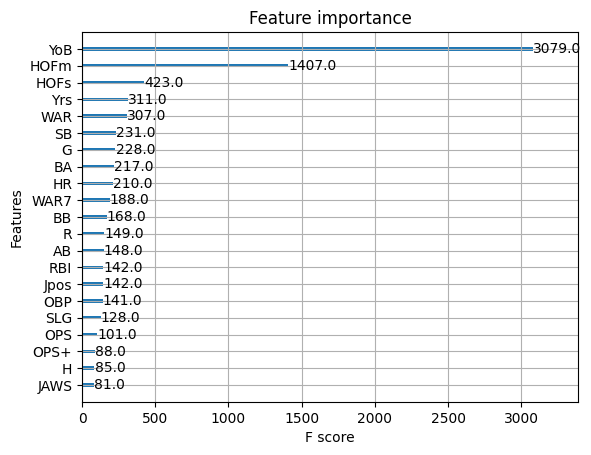

In [31]:
xgb.plot_importance(best)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# 2024 Predictions

In [ ]:
best.predict()